In [1]:
import os
import sys
import argparse
import glob


import numpy as np
from osgeo import gdal, gdal_array, ogr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'OSM1/01WDP/125725497/'

file = 'S2A_1WDP_20180519_0_L2A.npz'

In [3]:
data = np.load(path+file)

list(data.keys())
list(data.values())
list(data.items())

[('gsd_10',
  array([[[0.0227, 0.0206, 0.0089, 0.0014],
          [0.0198, 0.0179, 0.0095, 0.0023],
          [0.0192, 0.0207, 0.0096, 0.0034],
          ...,
          [0.736 , 0.7072, 0.7572, 0.7076],
          [0.8472, 0.88  , 0.8776, 0.766 ],
          [0.892 , 0.896 , 0.8928, 0.7852]],
  
         [[0.0196, 0.0216, 0.0079, 0.0016],
          [0.0223, 0.021 , 0.0078, 0.0015],
          [0.0209, 0.0208, 0.0083, 0.0024],
          ...,
          [0.8156, 0.8288, 0.8352, 0.7476],
          [0.8944, 0.9032, 0.9096, 0.8   ],
          [0.9176, 0.9232, 0.9328, 0.818 ]],
  
         [[0.0188, 0.0207, 0.0075, 0.0027],
          [0.0229, 0.0203, 0.0087, 0.0025],
          [0.0222, 0.0215, 0.0082, 0.0018],
          ...,
          [0.8872, 0.8864, 0.8984, 0.794 ],
          [0.912 , 0.924 , 0.9304, 0.8156],
          [0.928 , 0.9216, 0.9384, 0.818 ]],
  
         ...,
  
         [[0.0597, 0.0499, 0.0296, 0.0174],
          [0.0619, 0.0502, 0.0284, 0.0149],
          [0.0591, 0.0473, 0.0286,

In [4]:
b10m = data.get('gsd_10')
b20m = data.get('gsd_20')
b60m = data.get('gsd_60')
bscl = data.get('scl')
bad_perc = data.get('bad_percent')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


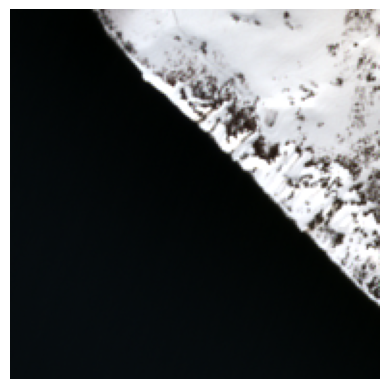

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
# Tu matriz BGR (192, 192, 3)
rgb = b10m[:,:,:3]

# Convertir de BGR a RGB para visualización en Matplotlib
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)

# Representar la imagen con Matplotlib
plt.imshow(rgb)

plt.axis('off')
plt.show()


In [9]:
b10m[:,:,:2+1]

array([[[0.0227, 0.0206, 0.0089],
        [0.0198, 0.0179, 0.0095],
        [0.0192, 0.0207, 0.0096],
        ...,
        [0.736 , 0.7072, 0.7572],
        [0.8472, 0.88  , 0.8776],
        [0.892 , 0.896 , 0.8928]],

       [[0.0196, 0.0216, 0.0079],
        [0.0223, 0.021 , 0.0078],
        [0.0209, 0.0208, 0.0083],
        ...,
        [0.8156, 0.8288, 0.8352],
        [0.8944, 0.9032, 0.9096],
        [0.9176, 0.9232, 0.9328]],

       [[0.0188, 0.0207, 0.0075],
        [0.0229, 0.0203, 0.0087],
        [0.0222, 0.0215, 0.0082],
        ...,
        [0.8872, 0.8864, 0.8984],
        [0.912 , 0.924 , 0.9304],
        [0.928 , 0.9216, 0.9384]],

       ...,

       [[0.0597, 0.0499, 0.0296],
        [0.0619, 0.0502, 0.0284],
        [0.0591, 0.0473, 0.0286],
        ...,
        [0.0212, 0.0208, 0.0114],
        [0.023 , 0.024 , 0.0082],
        [0.0219, 0.0229, 0.009 ]],

       [[0.0558, 0.0473, 0.0303],
        [0.059 , 0.0487, 0.0286],
        [0.0613, 0.0486, 0.0279],
        .

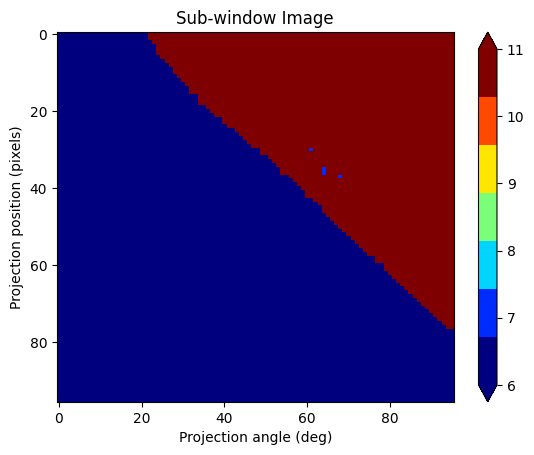

In [5]:

fig = plt.figure()
im2 = plt.title("Sub-window Image")
im2 = plt.xlabel("Projection angle (deg)")
im2 = plt.ylabel("Projection position (pixels)")
#im2 = plt.imshow(np.abs(test), cmap=plt.cm.viridis,
#            aspect='auto')
#im2 = plt.xlim(150, 220)
#im2 = plt.ylim(20, 60)
cmap = plt.get_cmap('jet', 7)
im2 = plt.imshow(bscl , cmap=cmap,  
                             aspect='auto', interpolation='none')
cbar = fig.colorbar(im2, extend='both')

/tmp/ipykernel_59929/3437709843.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(file)


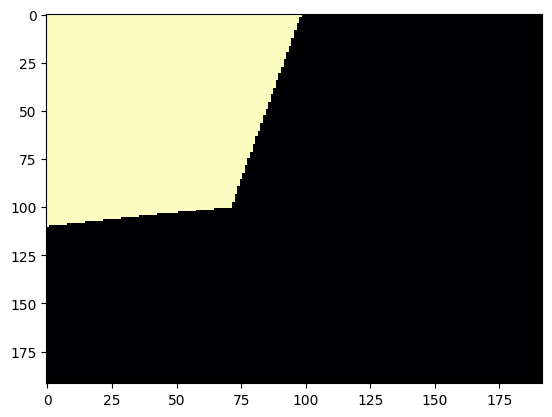

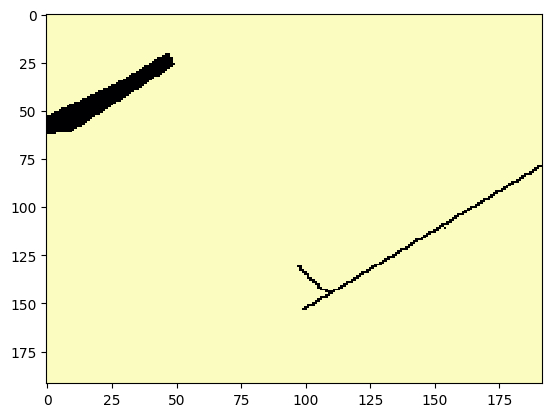

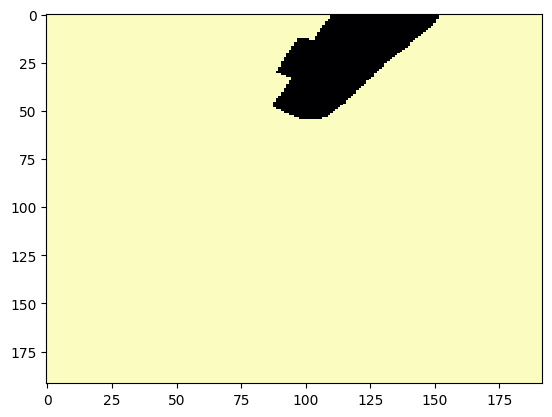

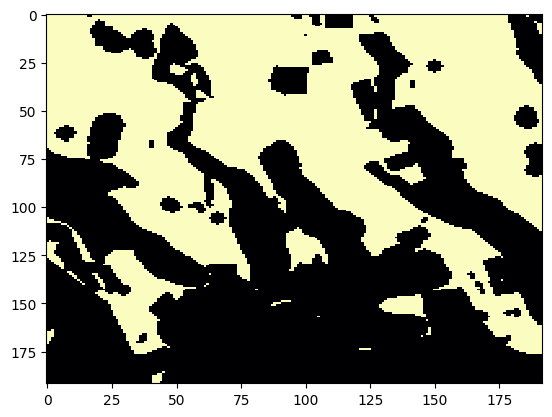

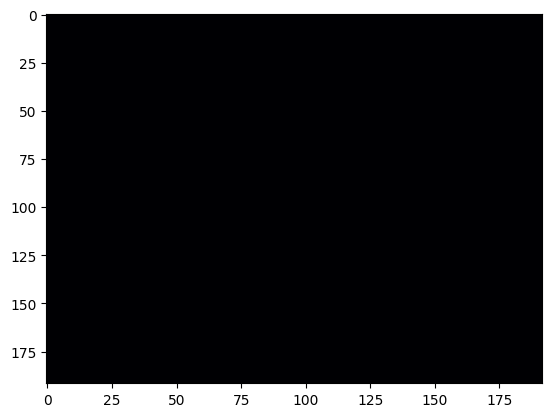

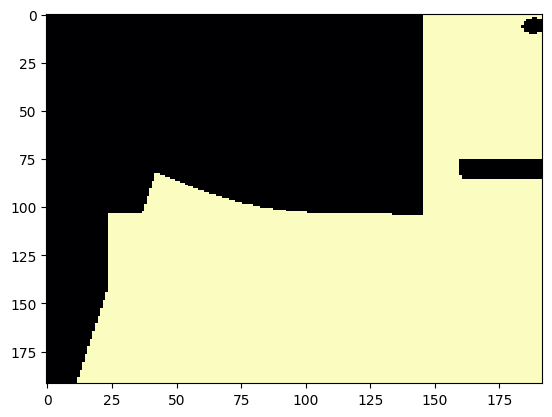

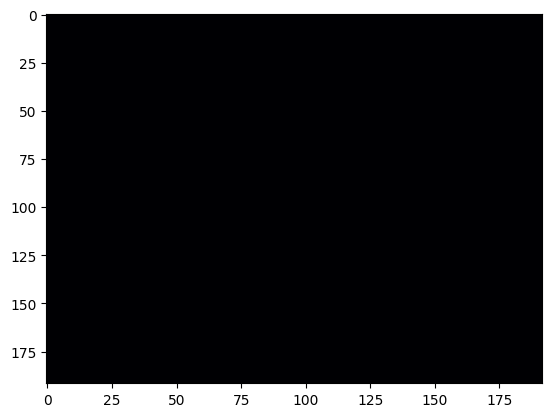

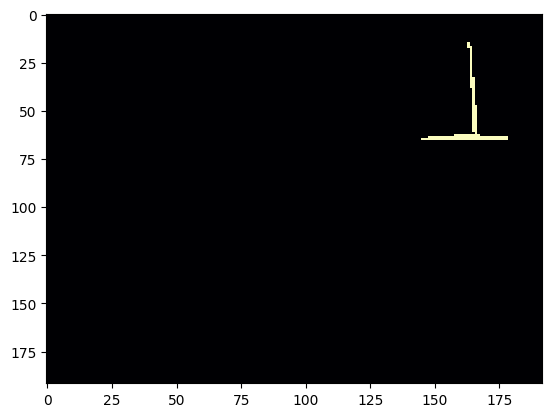

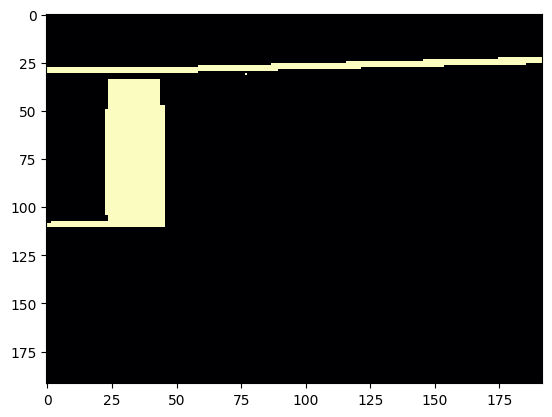

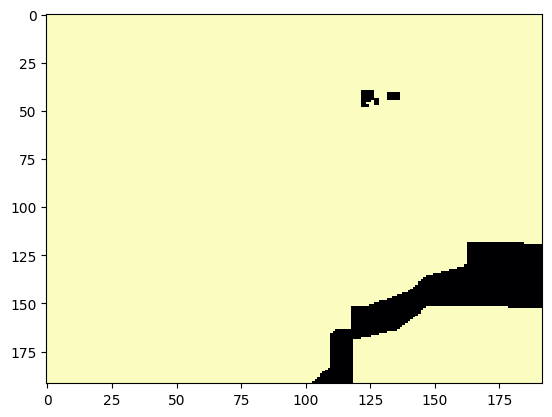

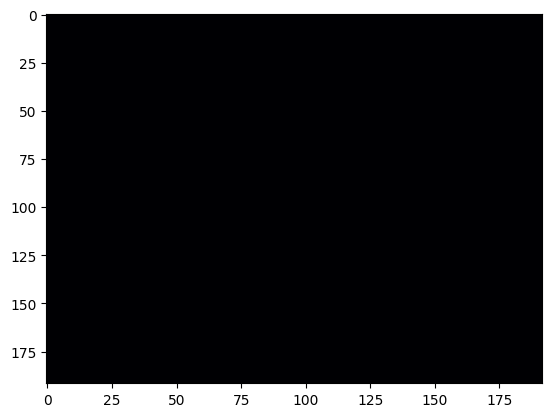

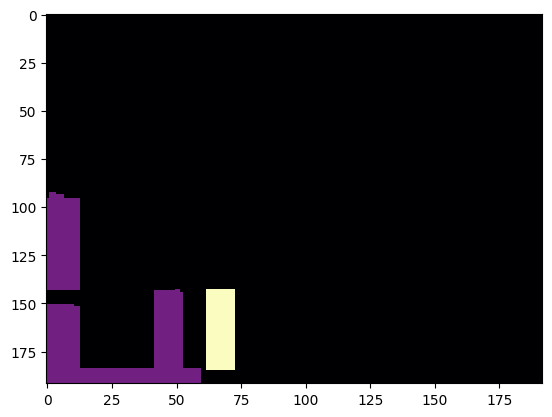

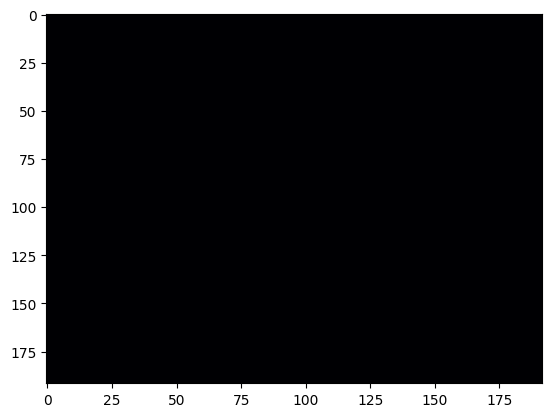

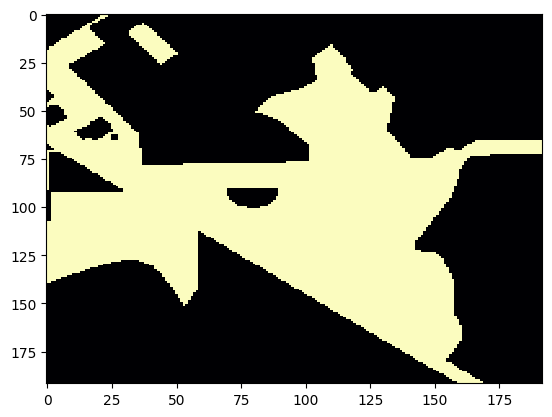

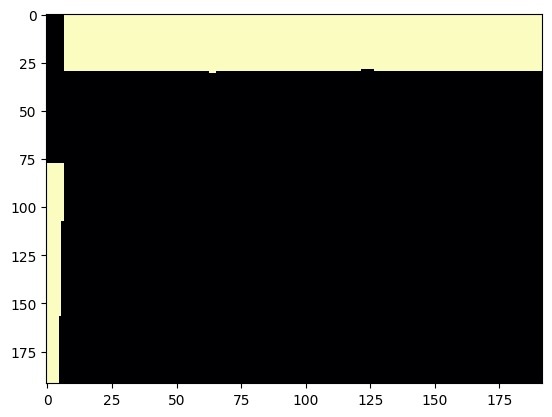

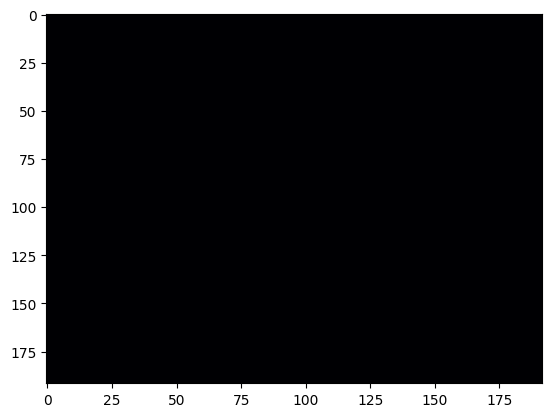

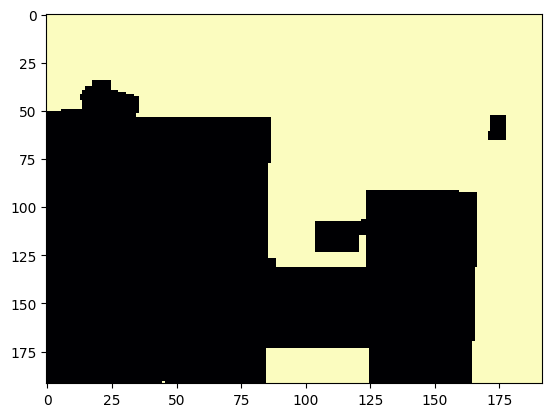

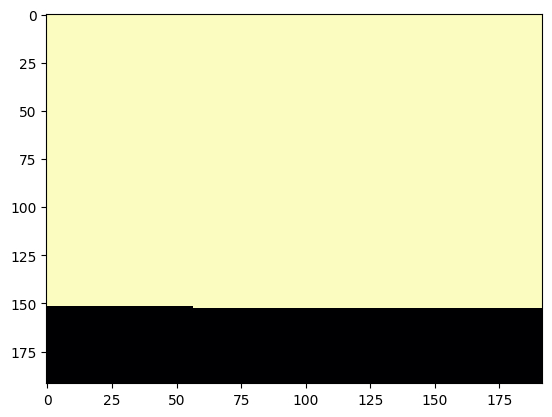

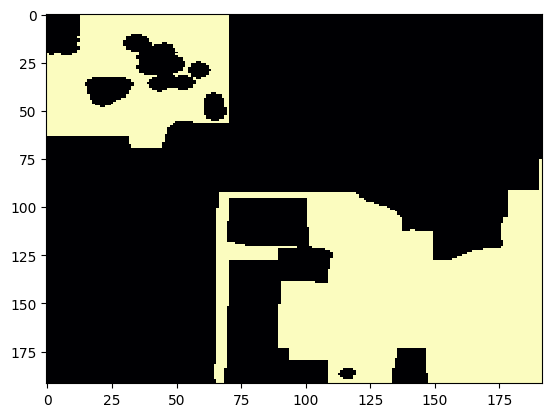

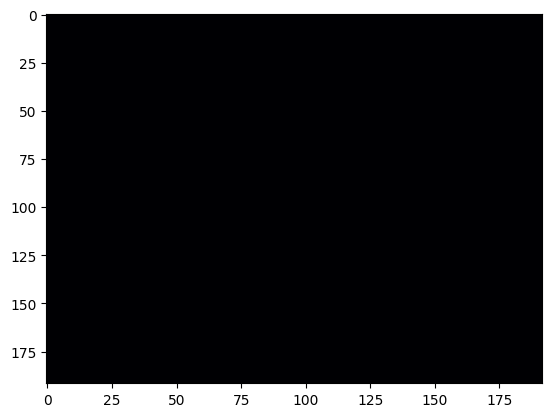

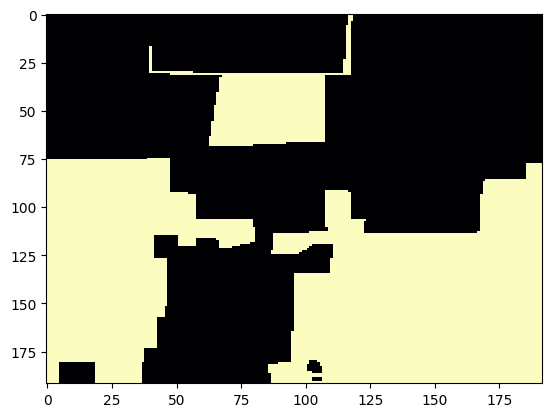

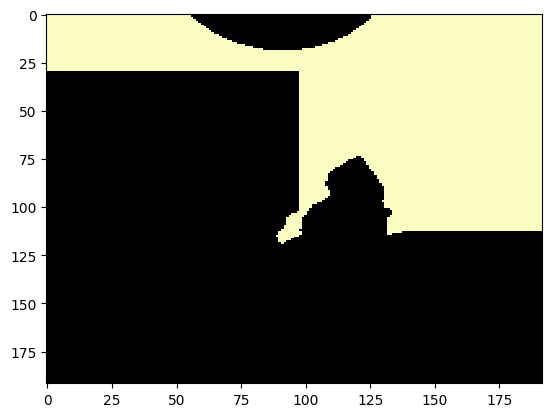

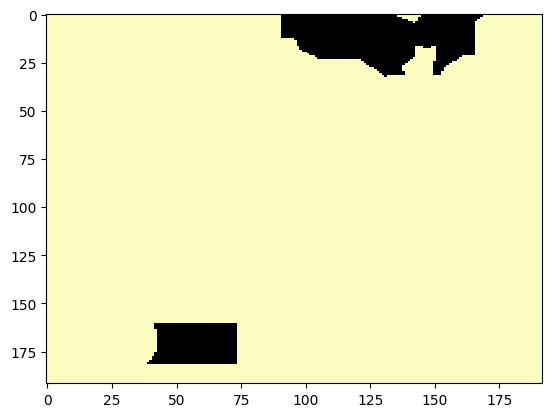

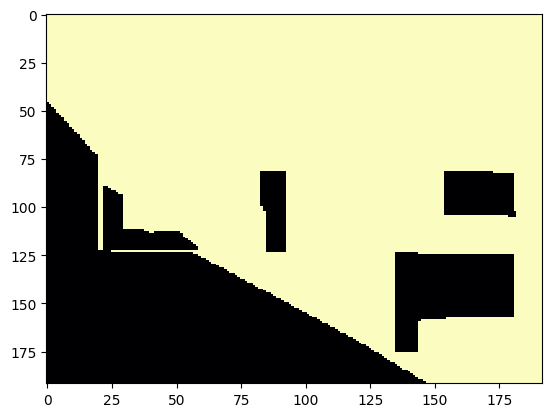

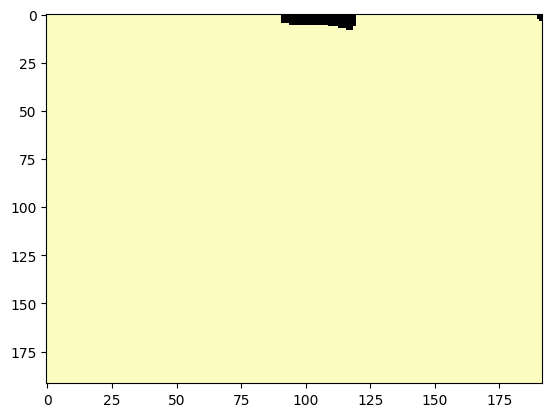

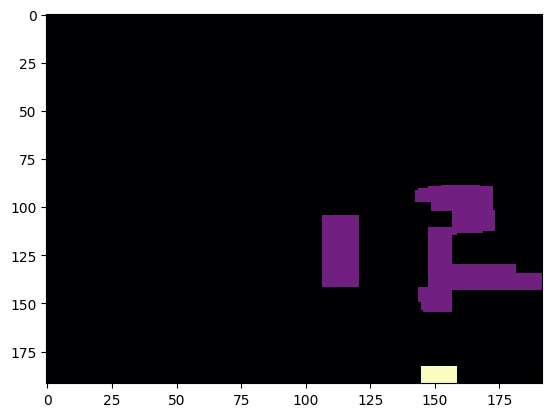

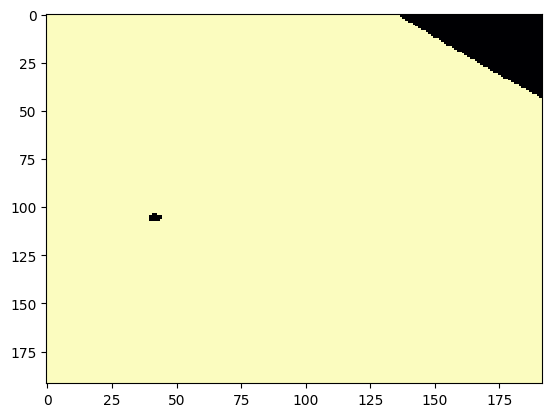

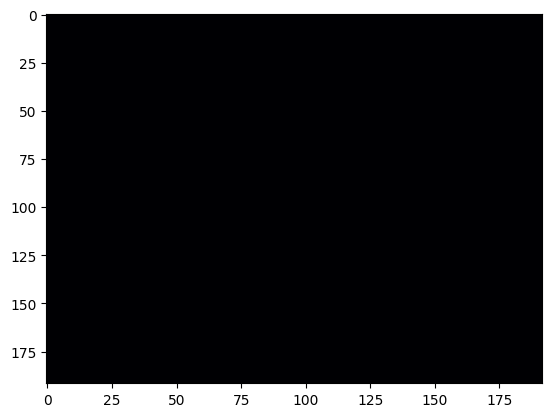

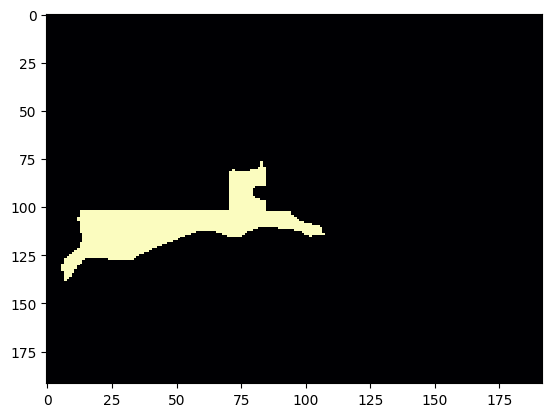

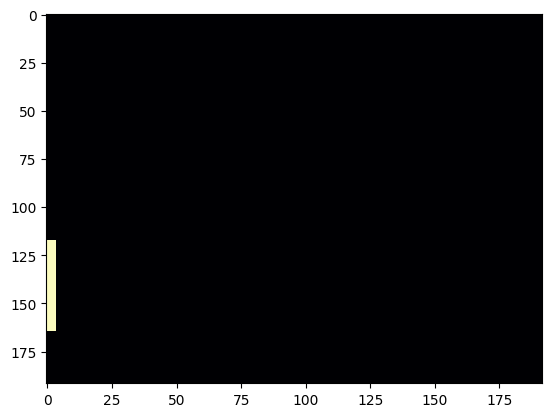

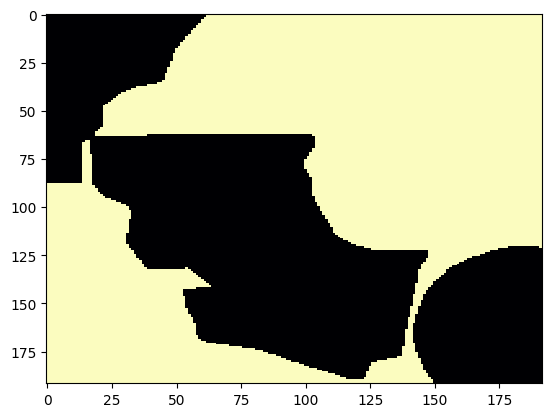

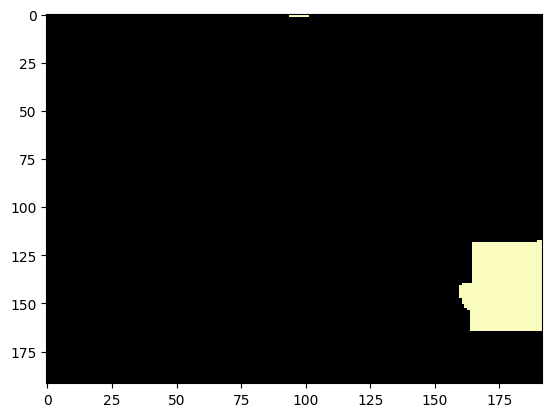

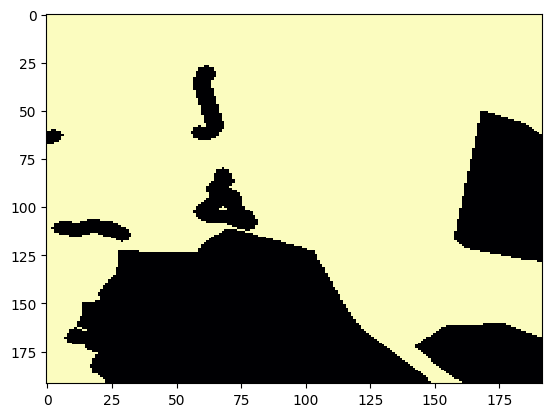

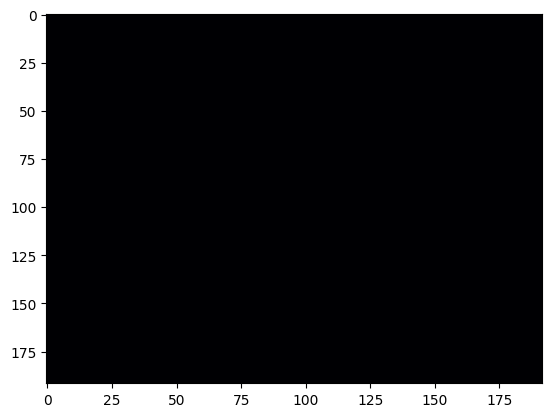

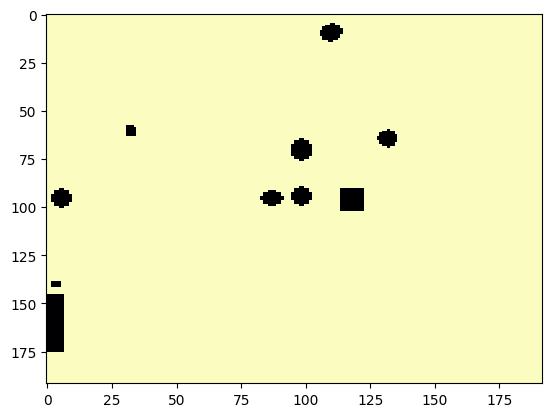

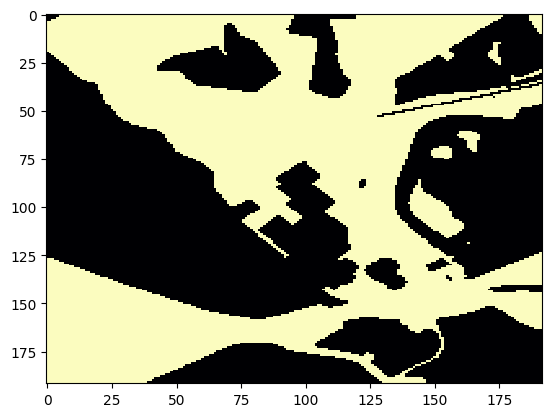

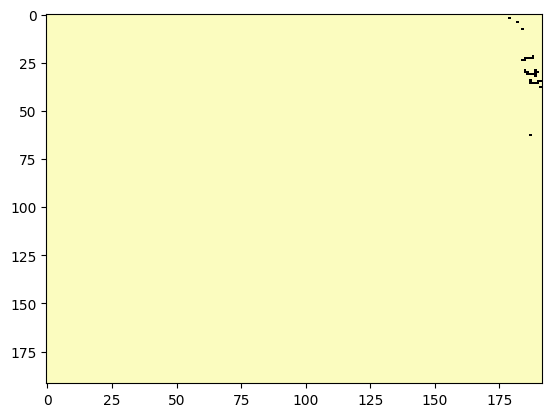

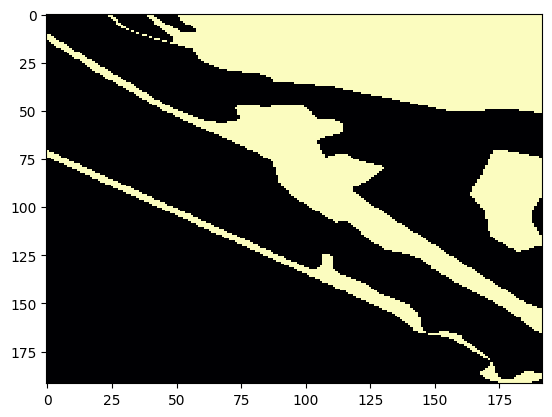

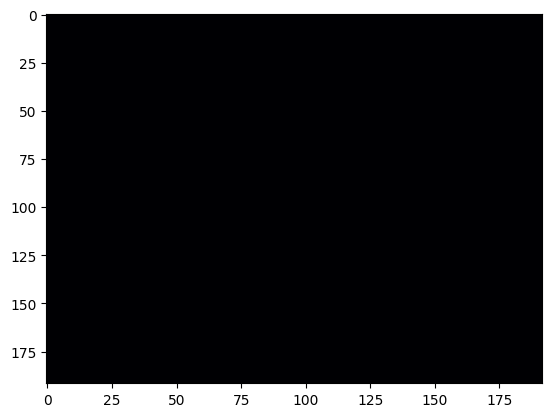

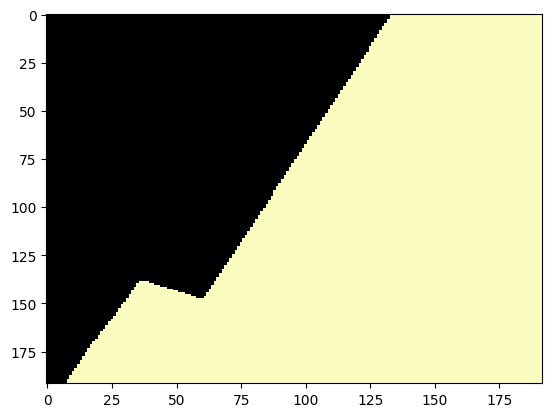

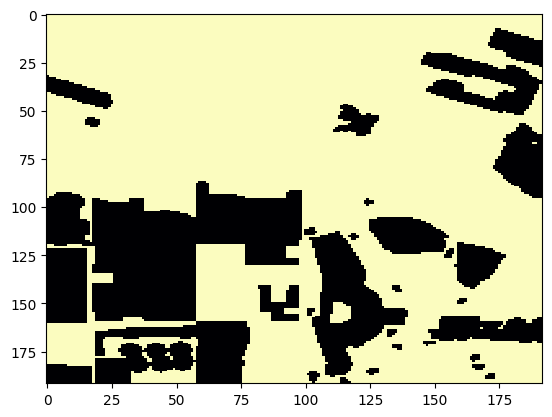

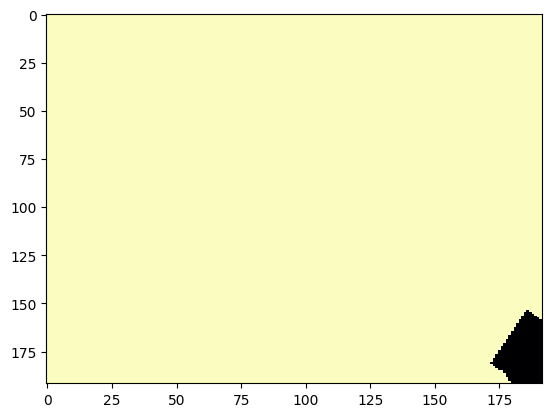

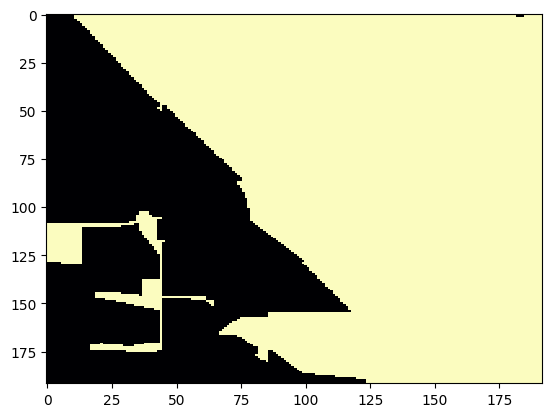

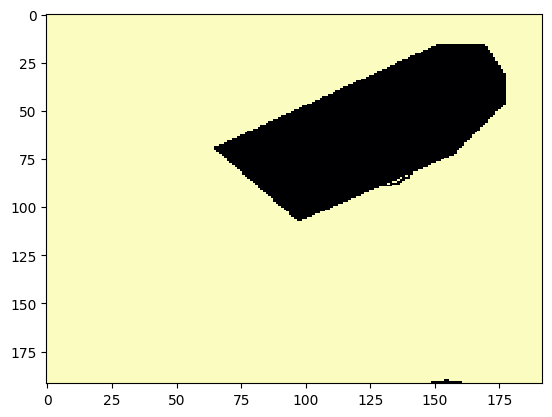

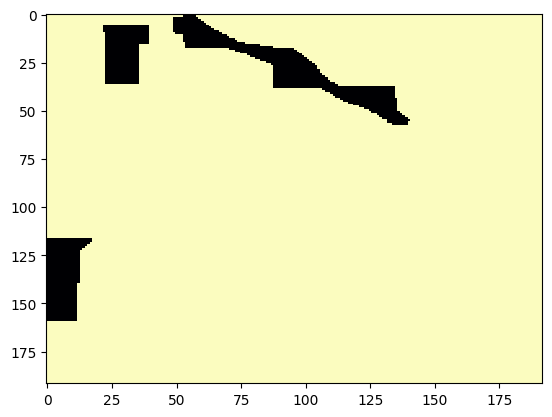

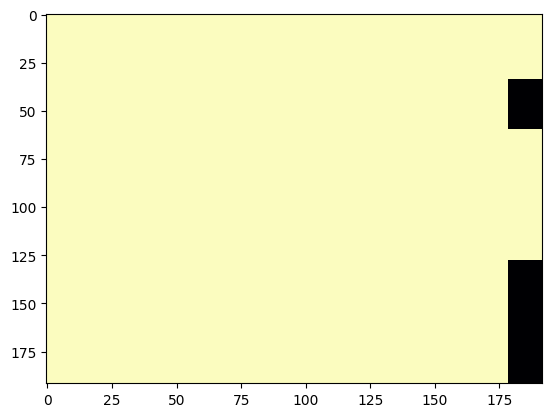

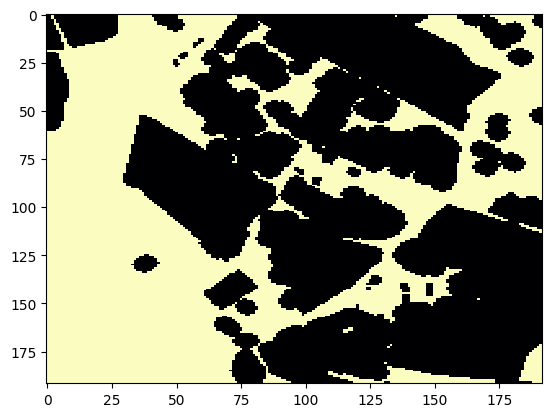

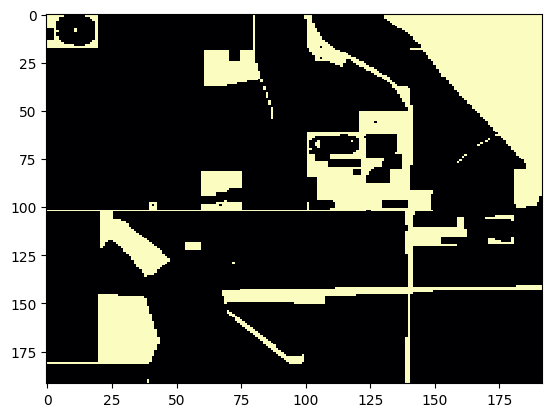

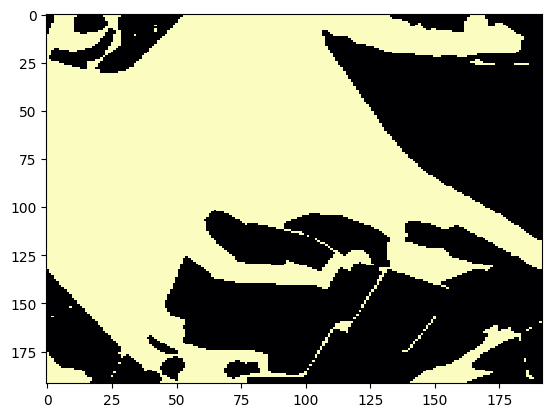

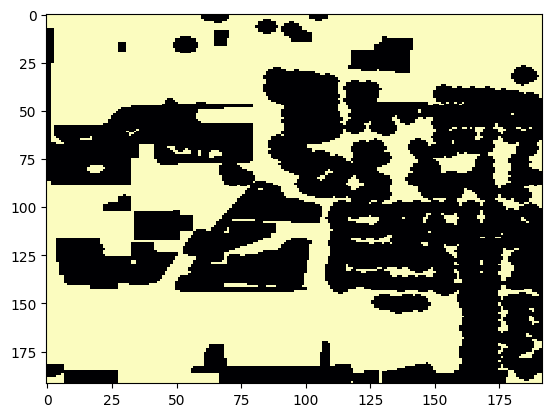

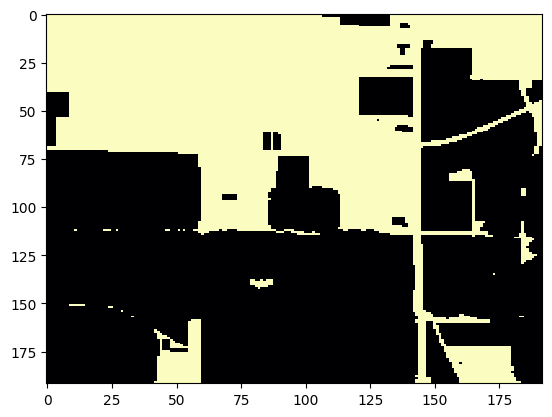

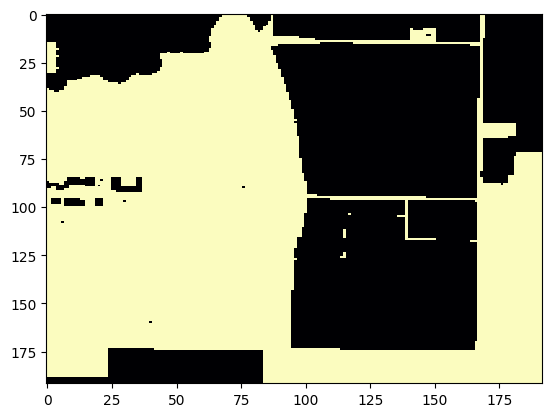

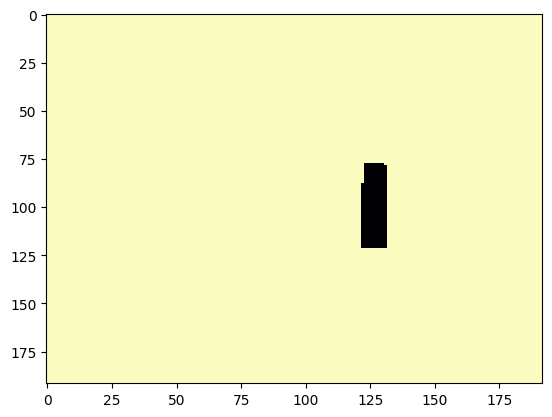

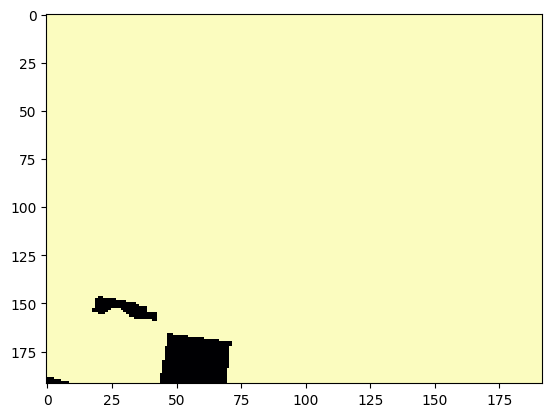

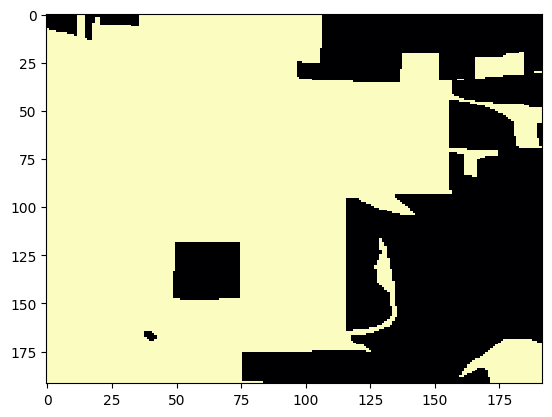

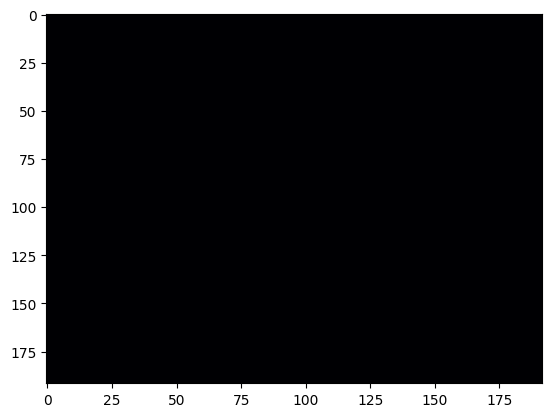

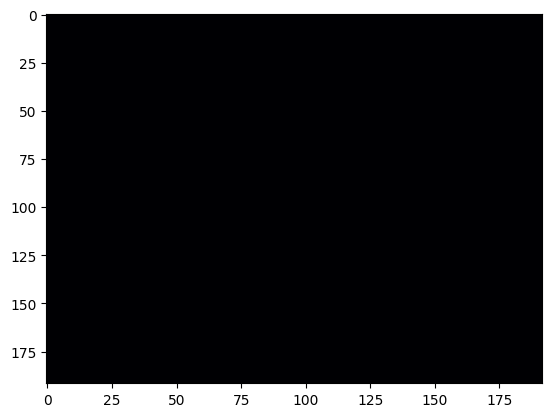

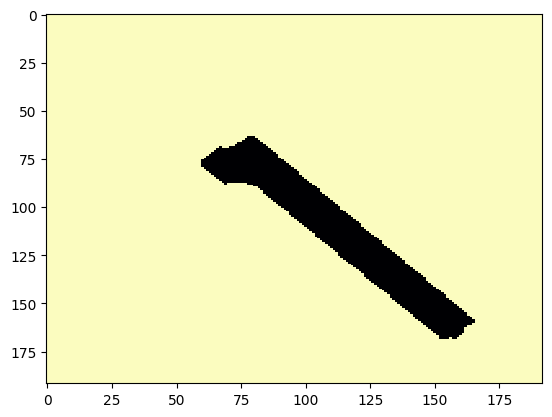

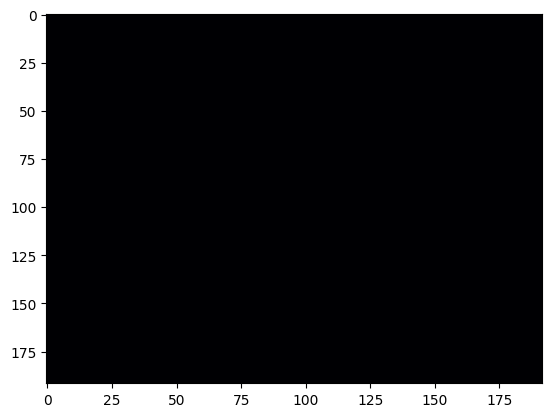

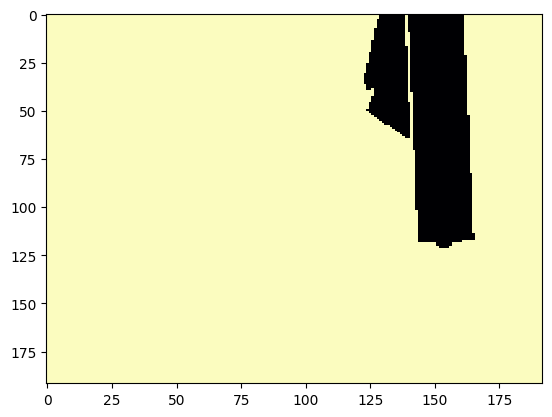

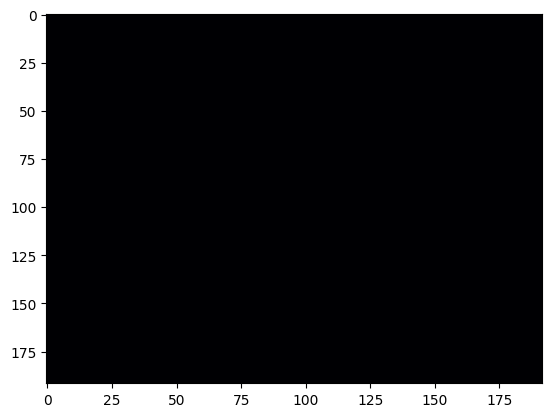

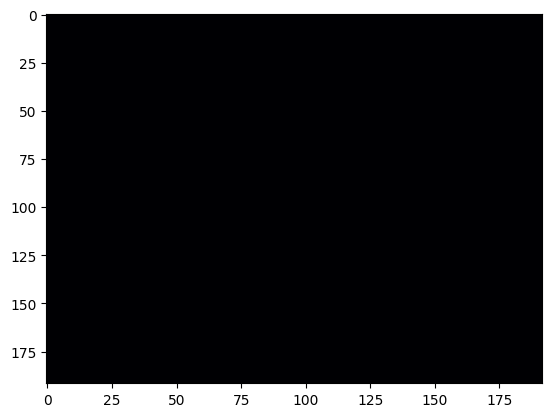

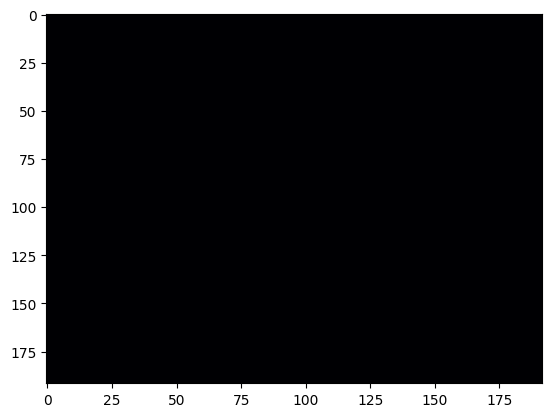

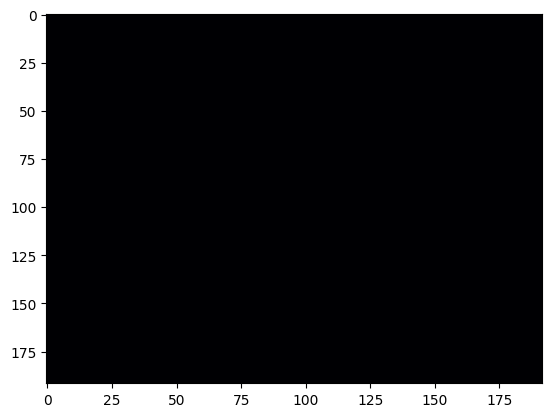

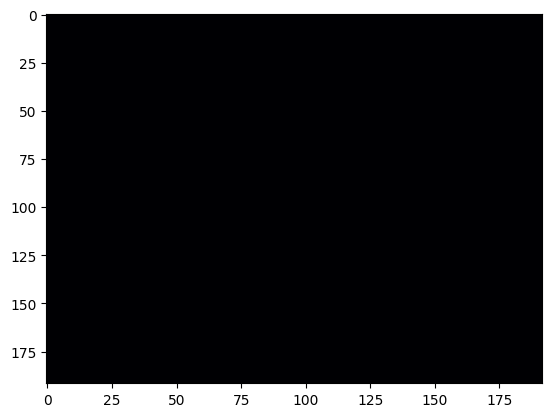

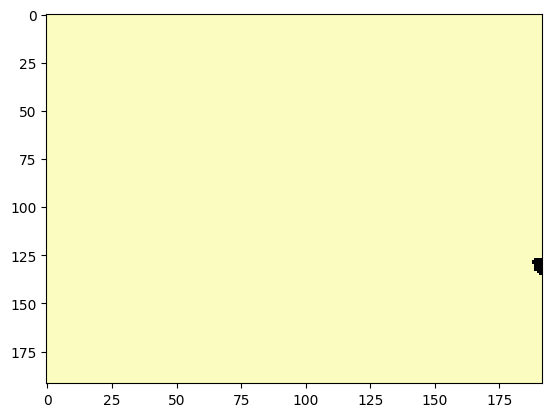

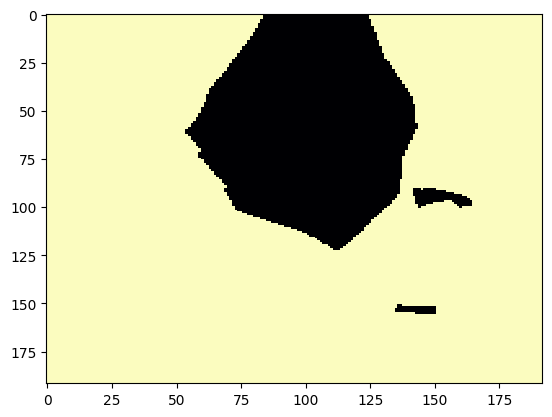

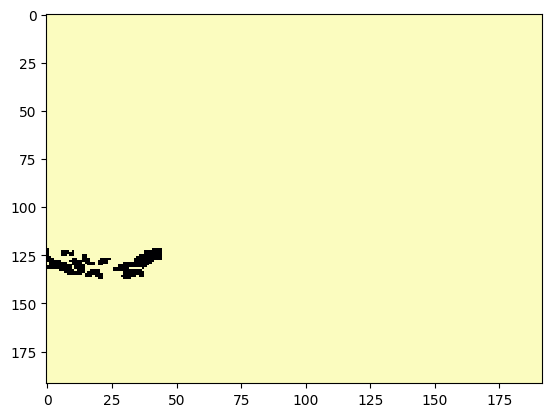

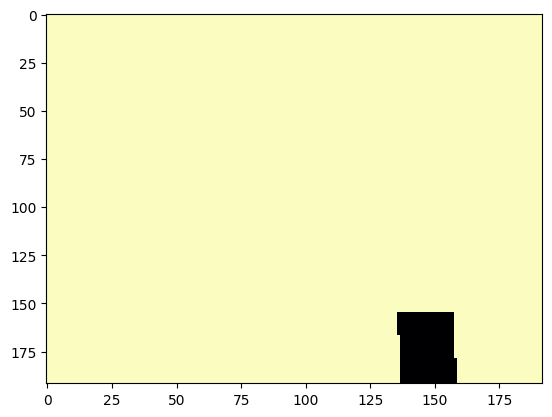

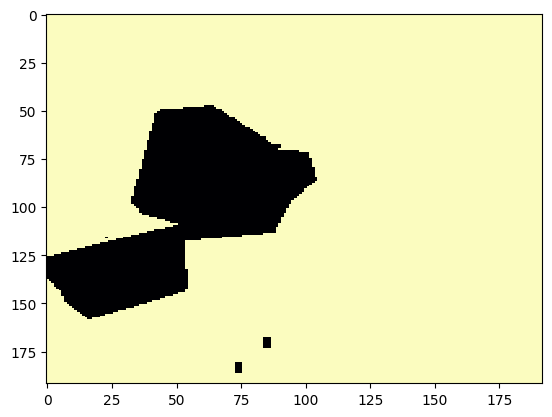

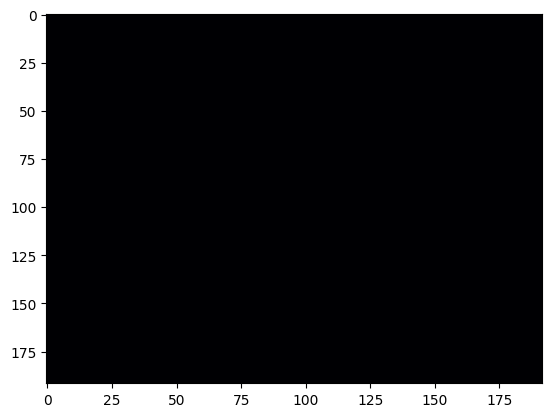

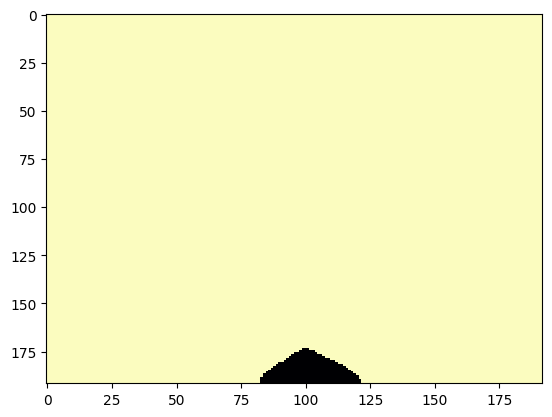

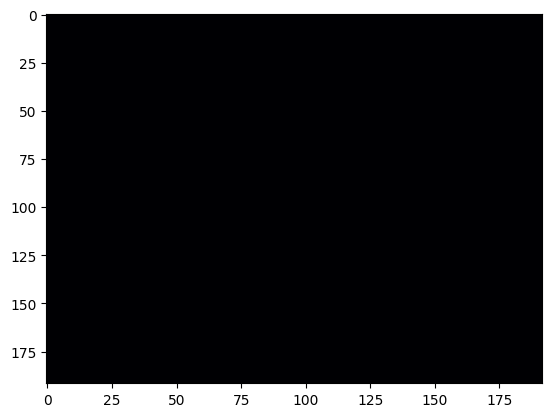

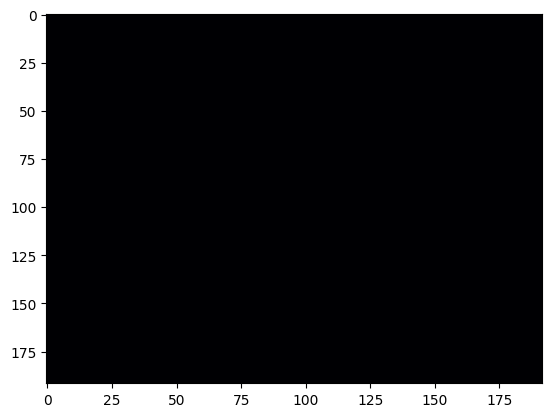

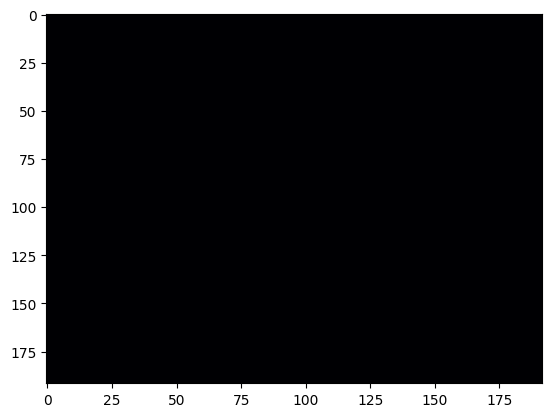

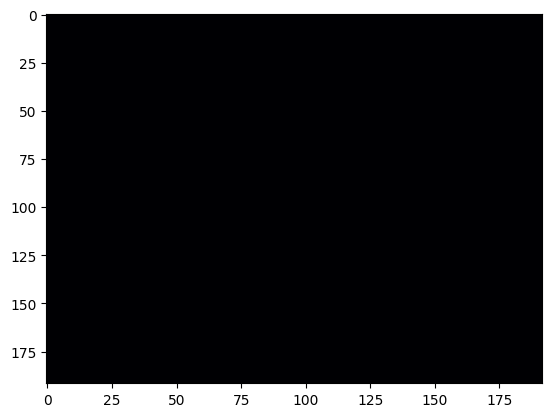

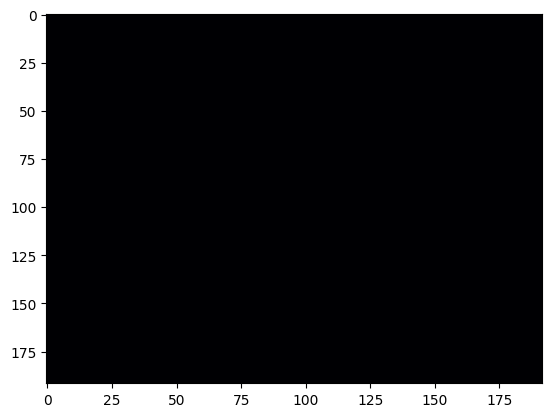

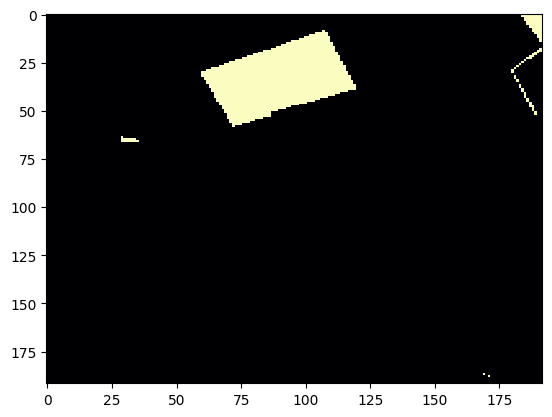

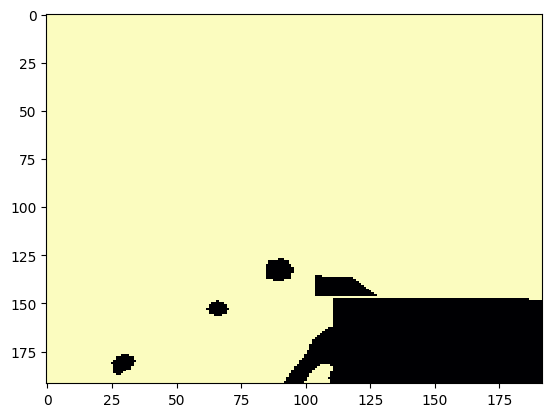

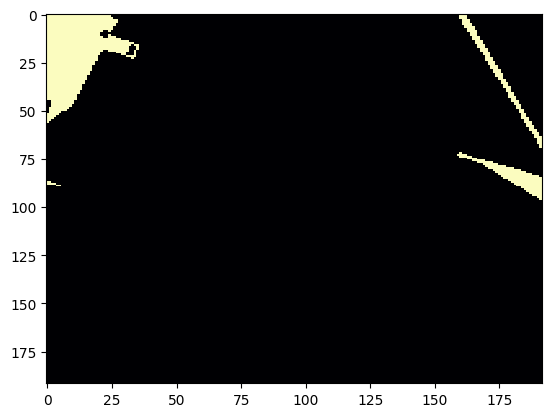

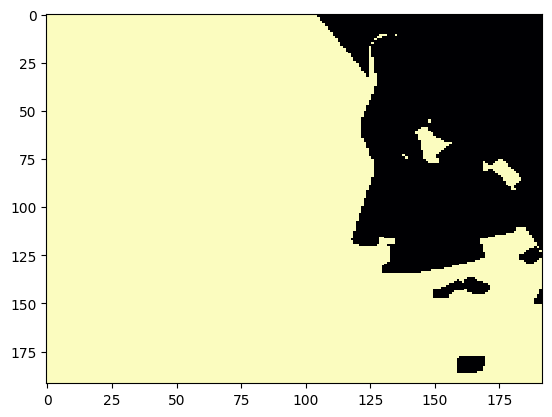

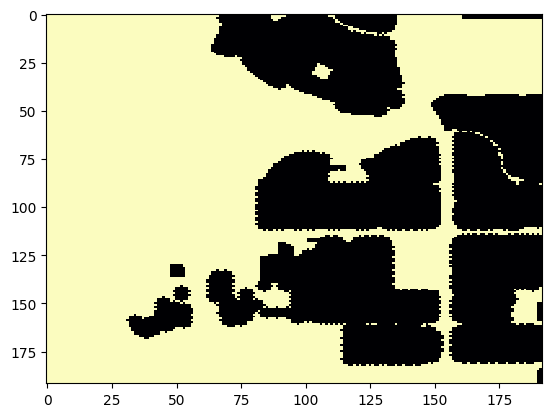

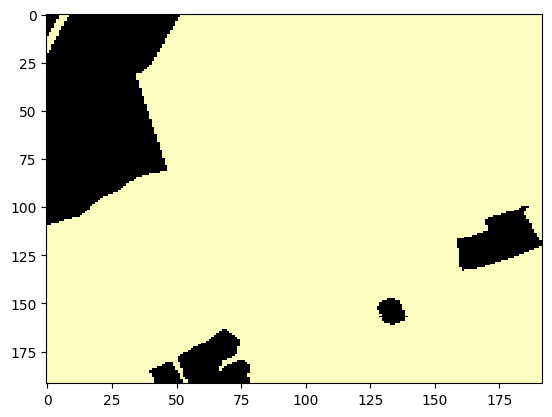

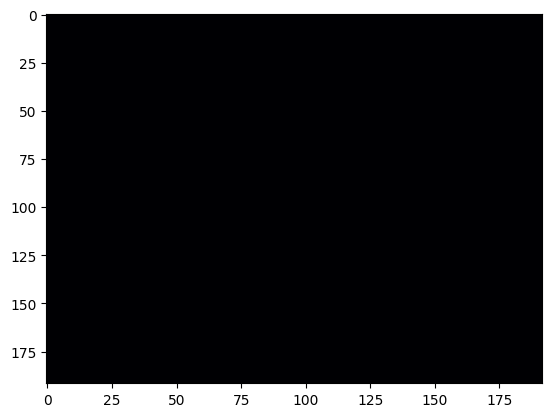

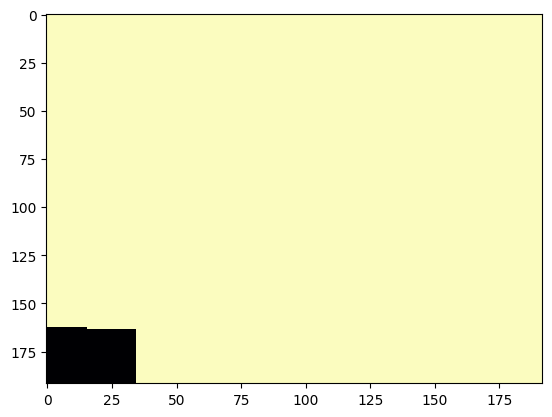

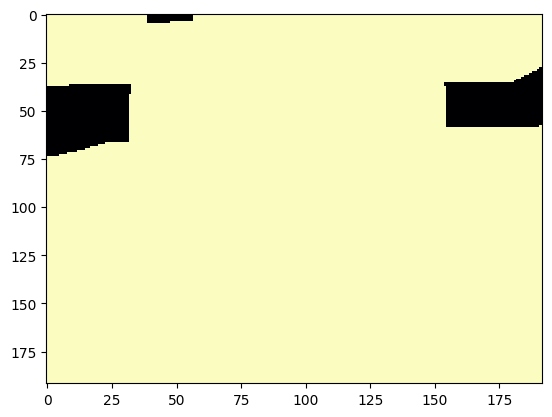

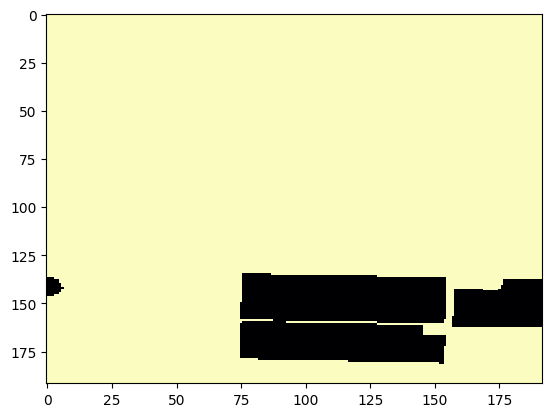

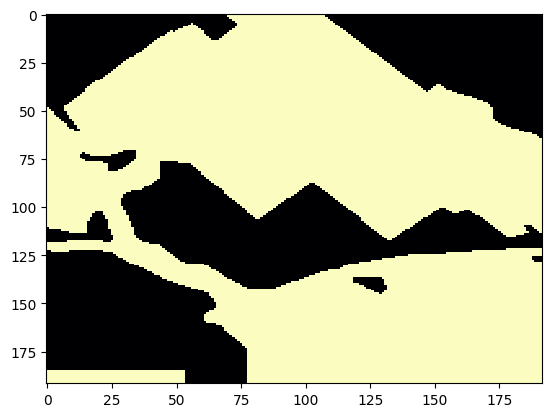

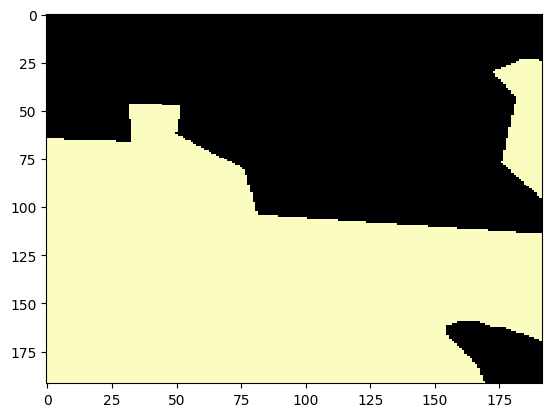

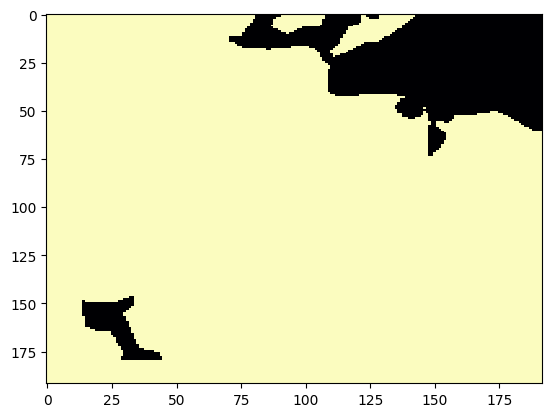

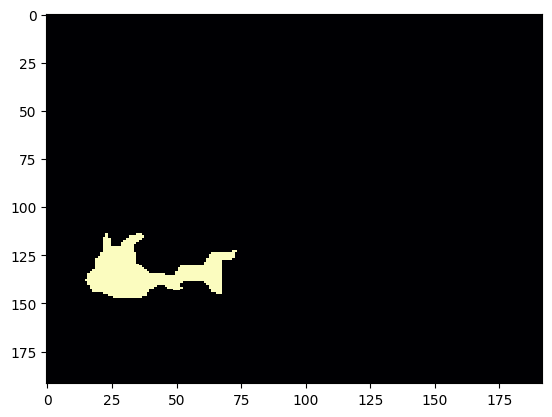

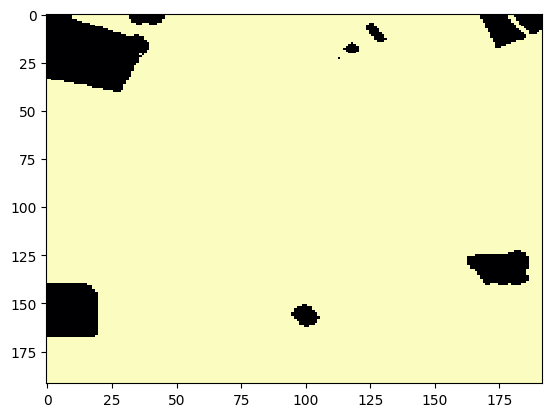

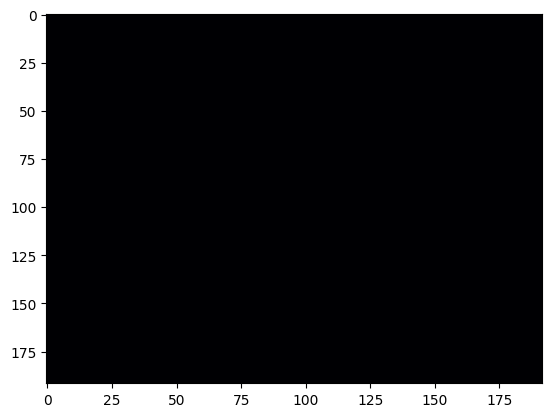

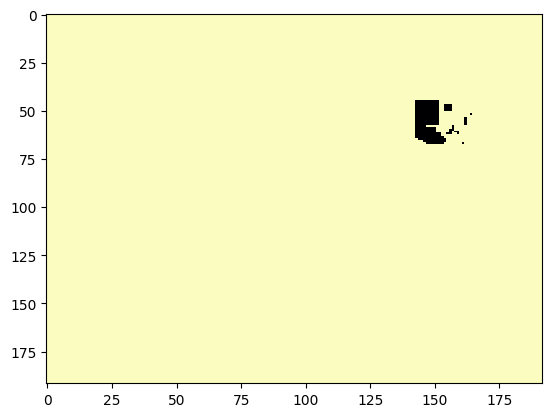

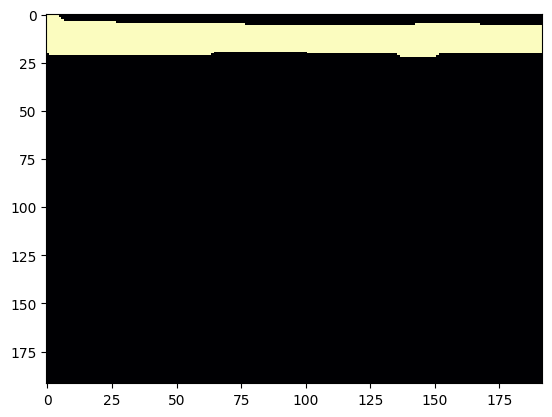

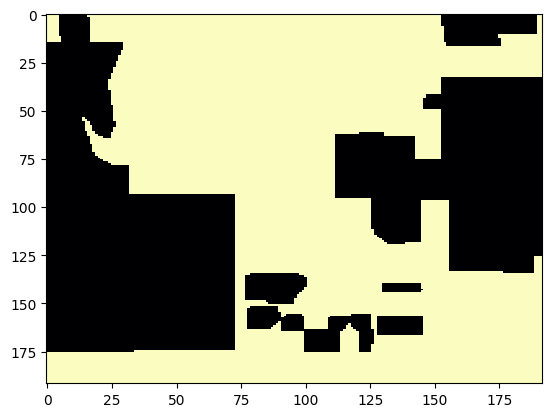

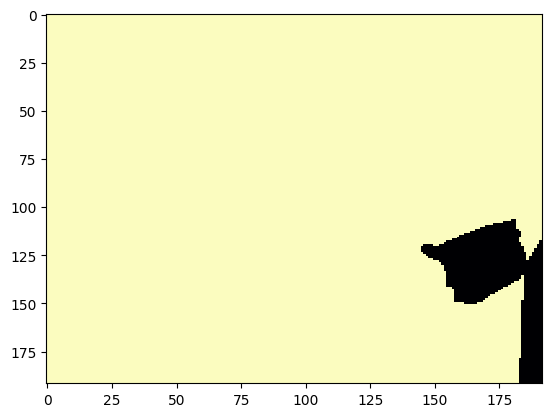

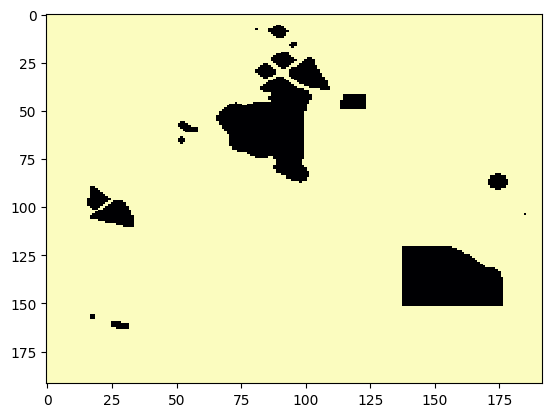

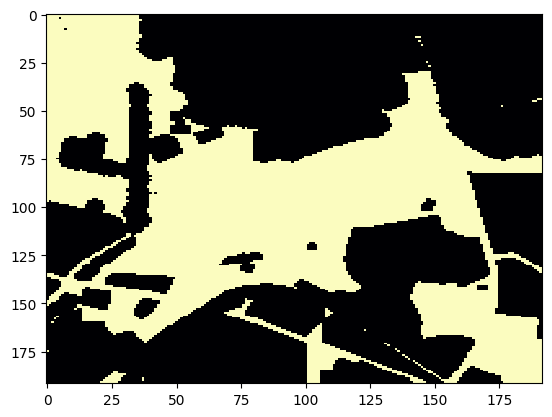

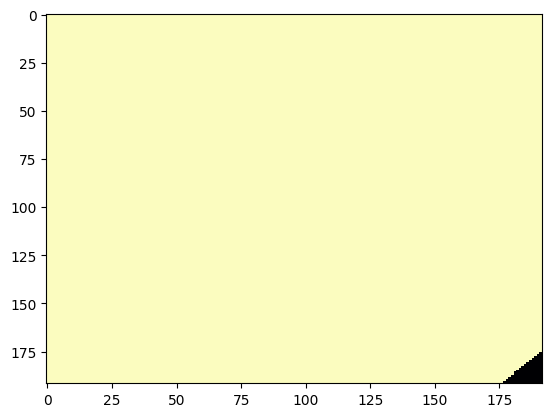

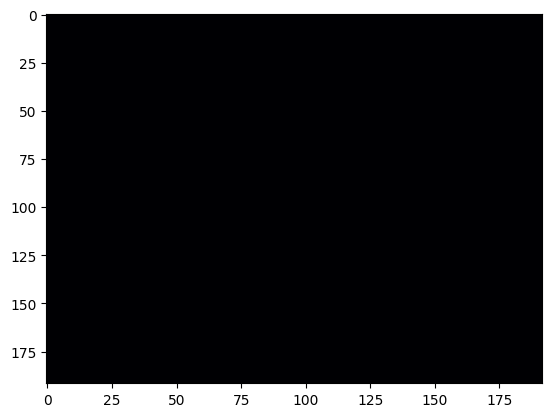

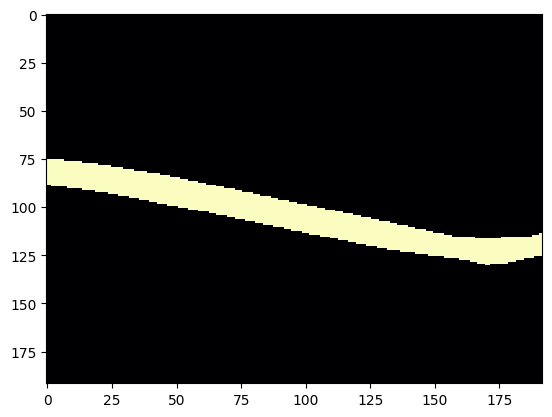

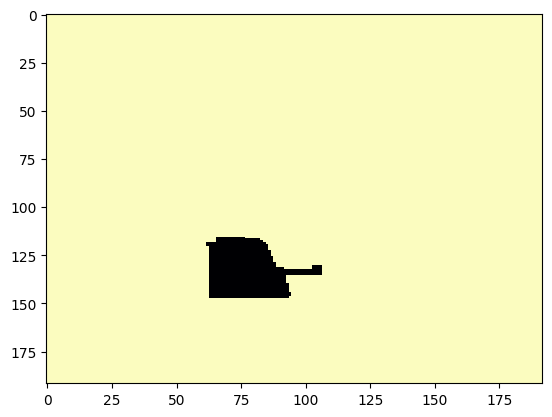

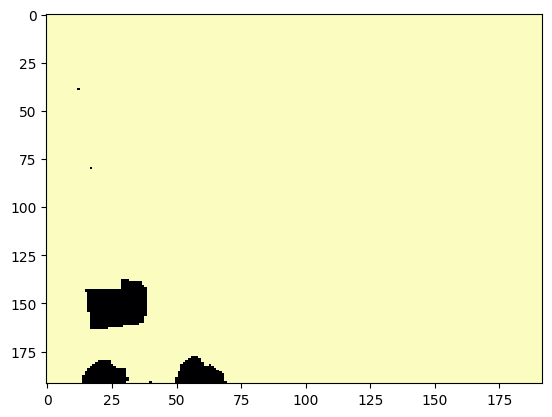

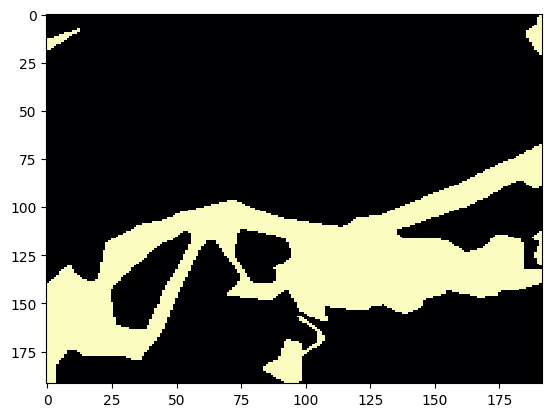

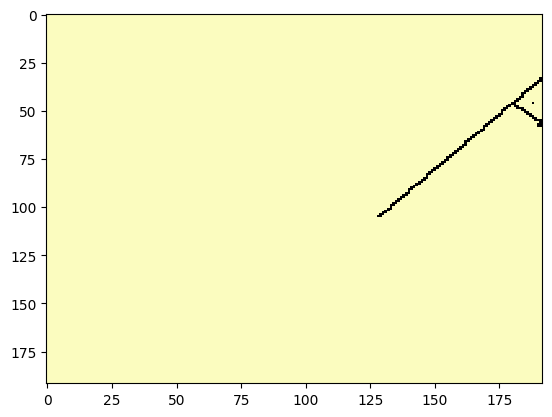

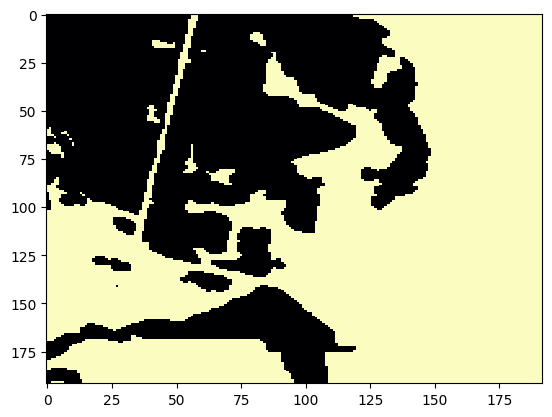

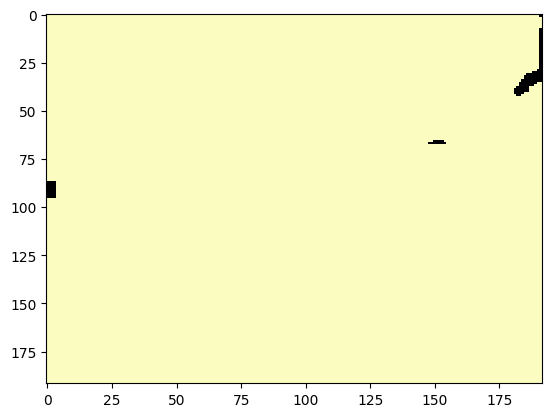

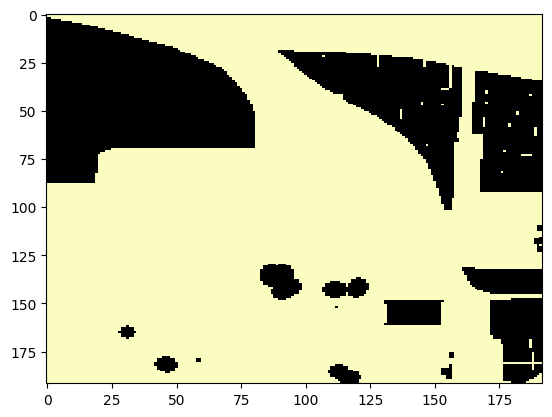

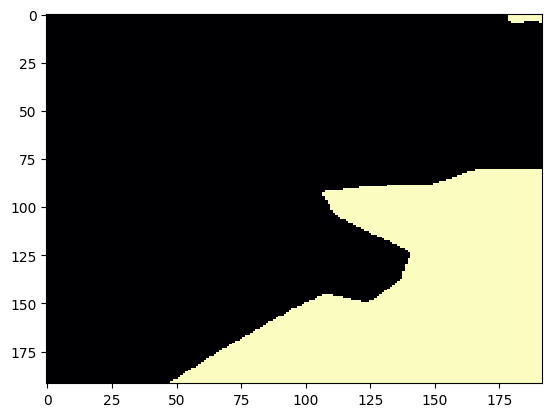

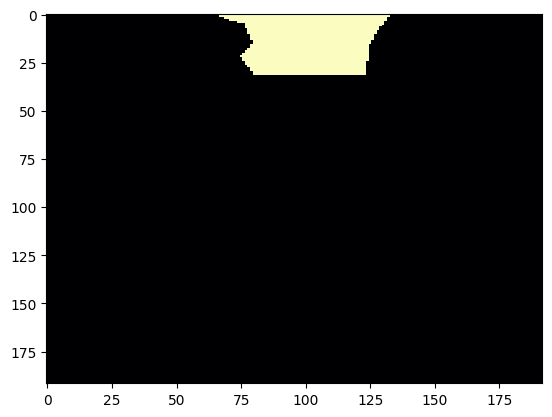

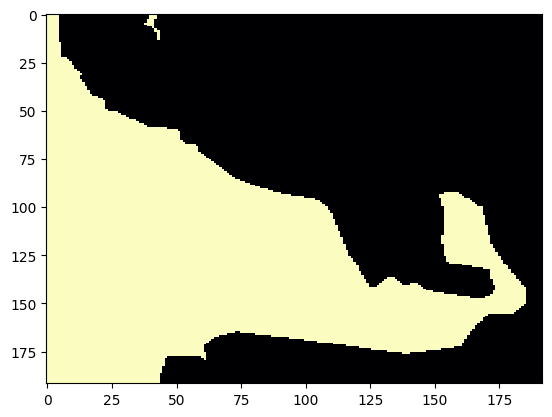

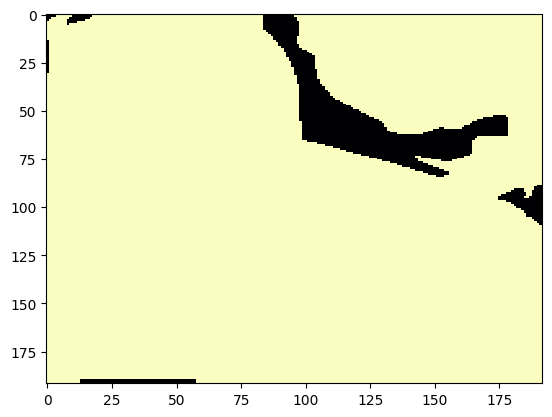

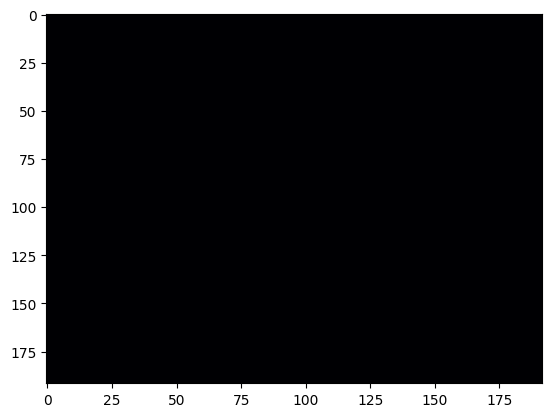

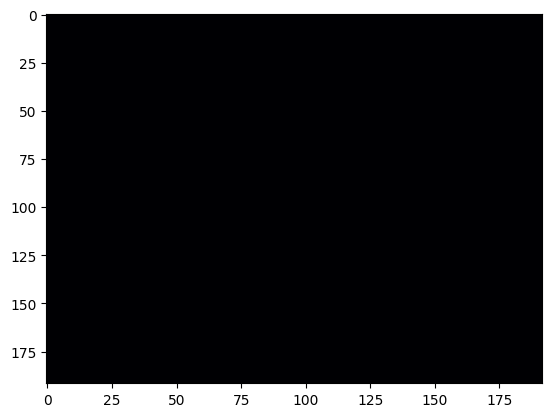

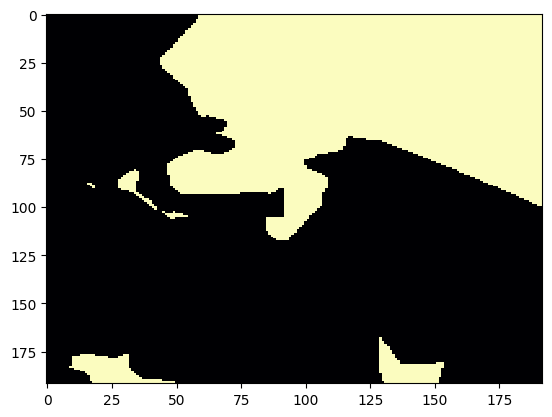

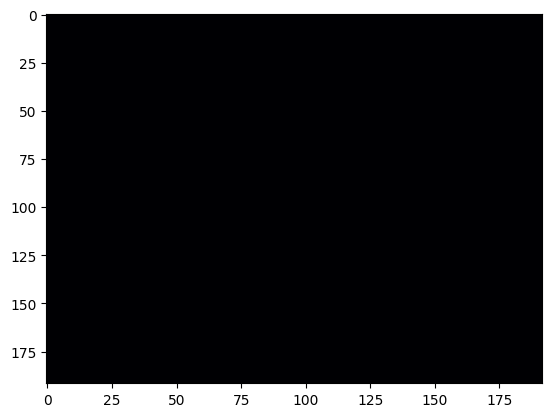

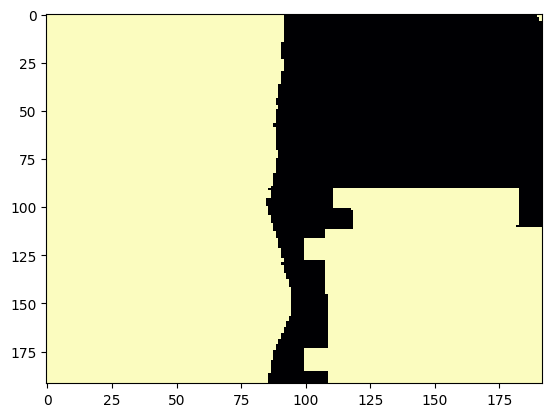

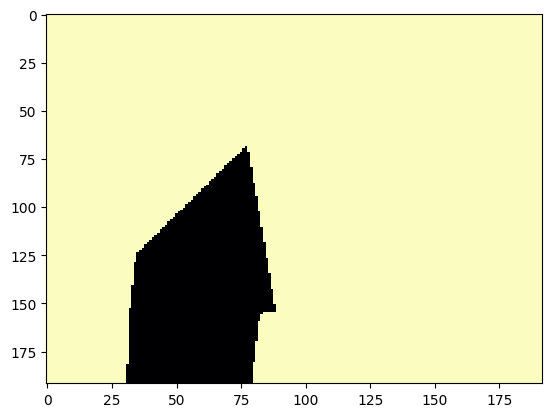

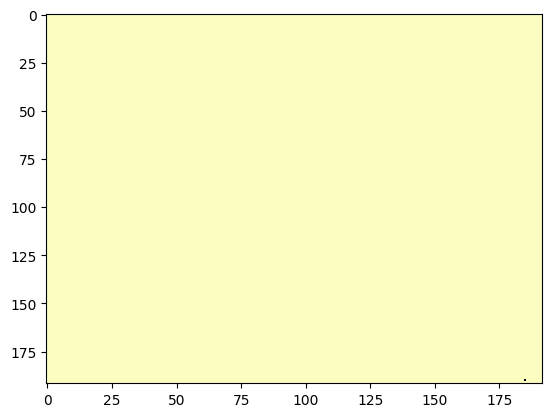

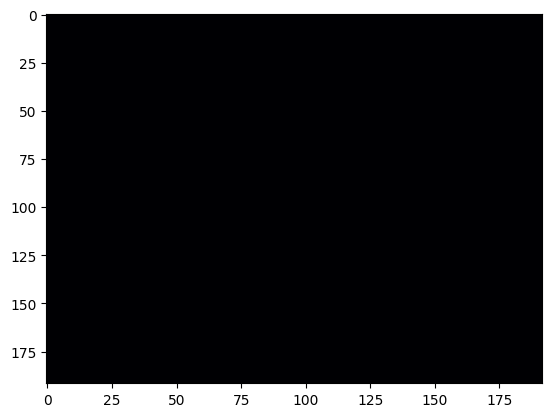

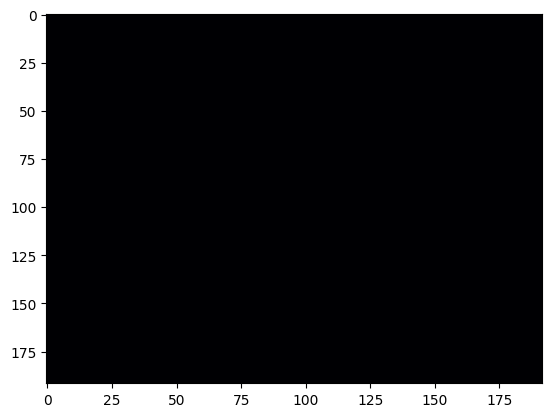

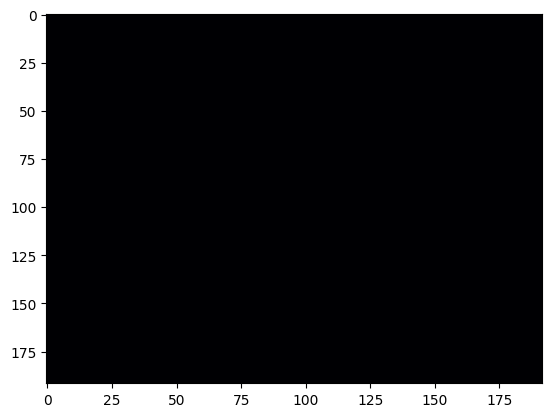

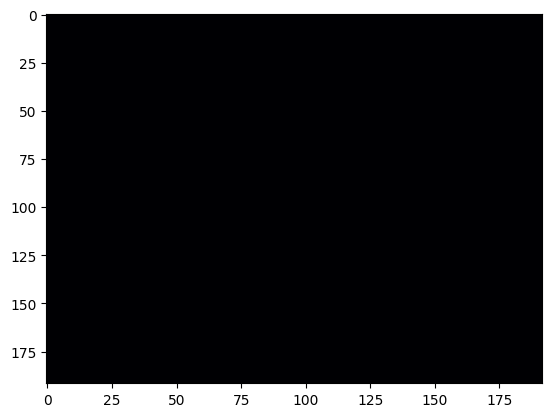

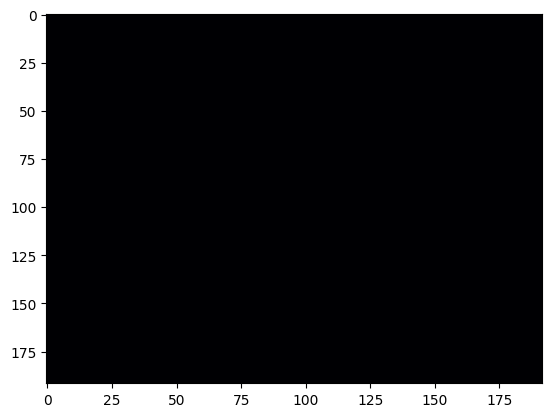

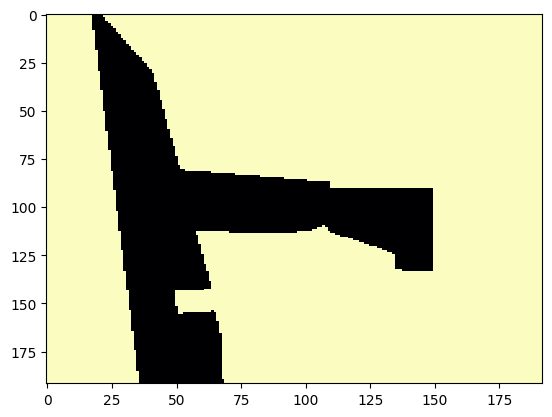

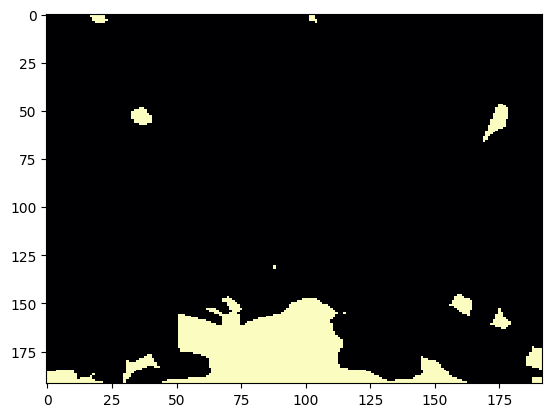

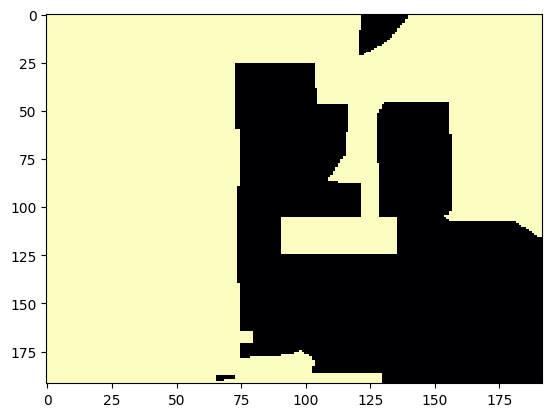

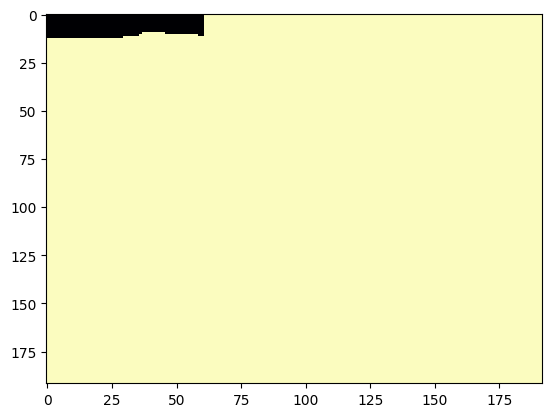

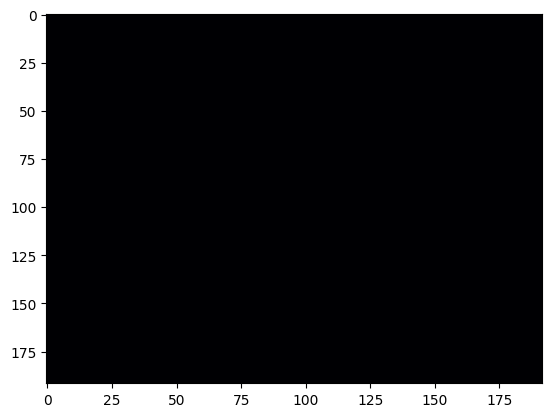

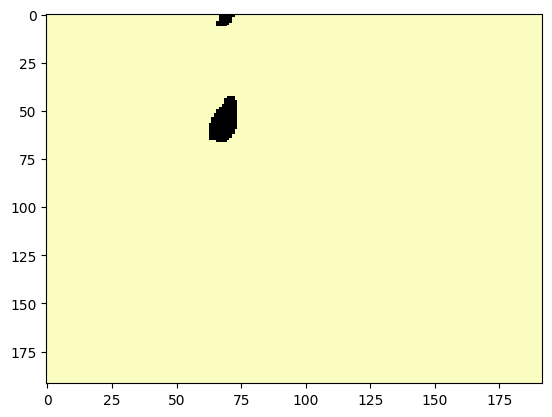

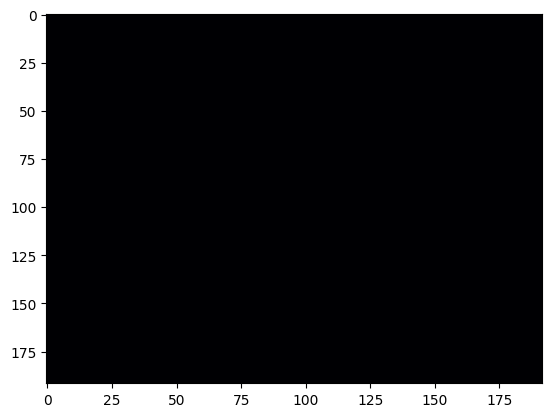

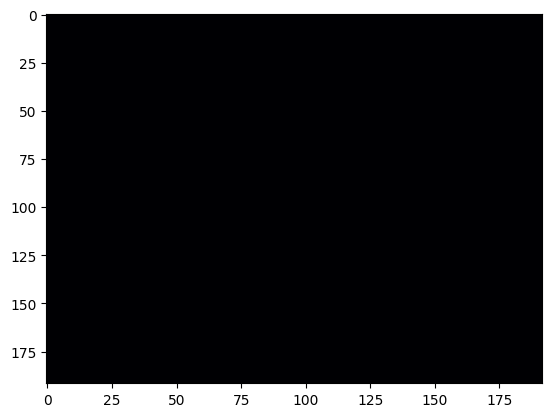

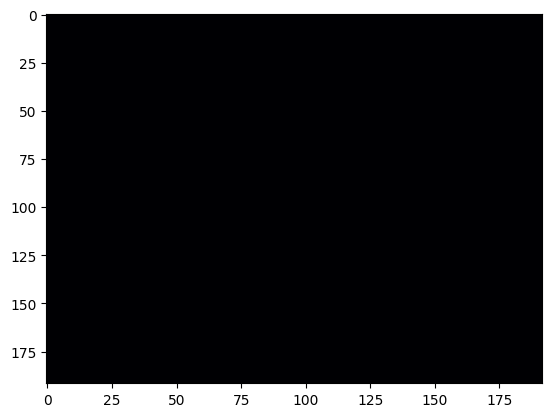

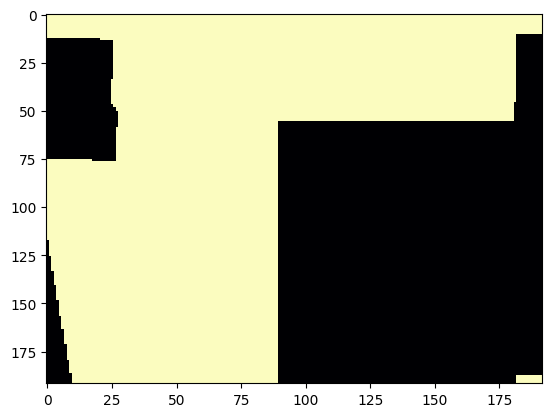

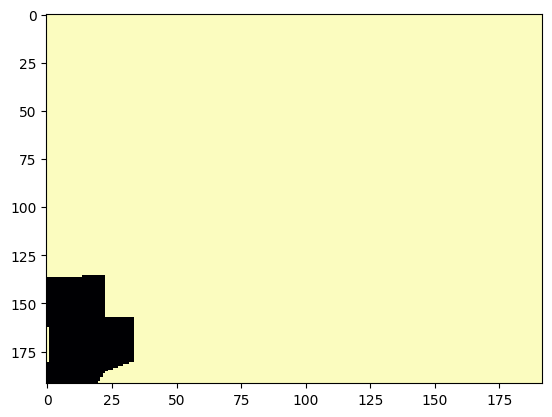

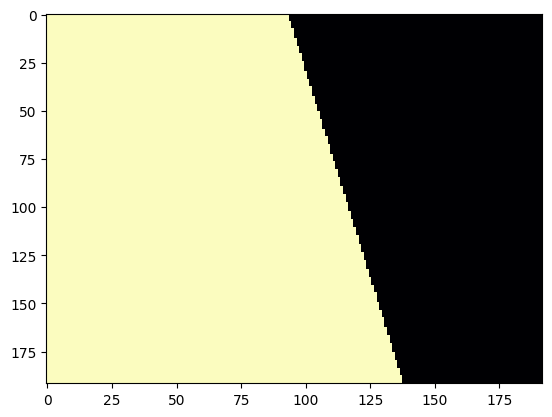

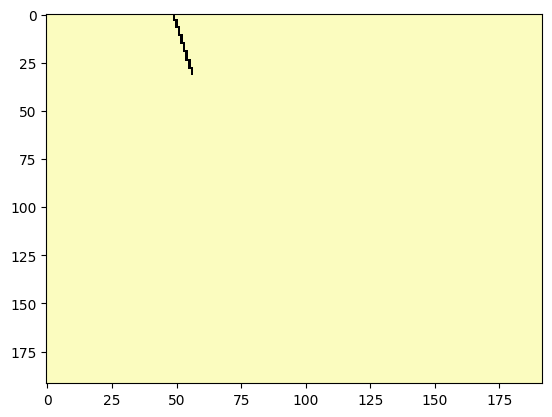

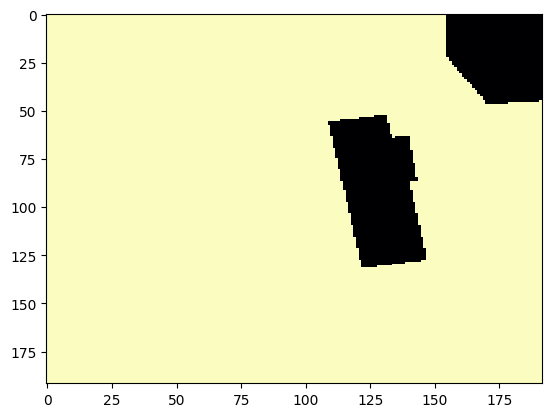

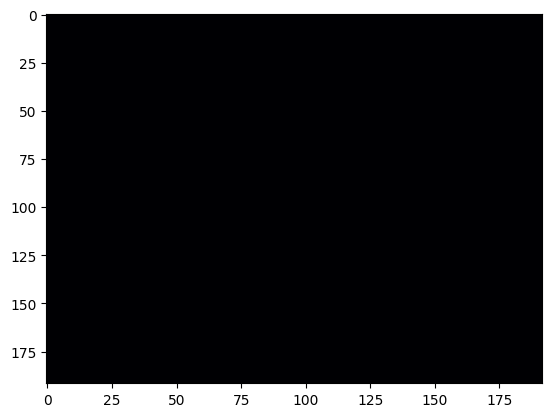

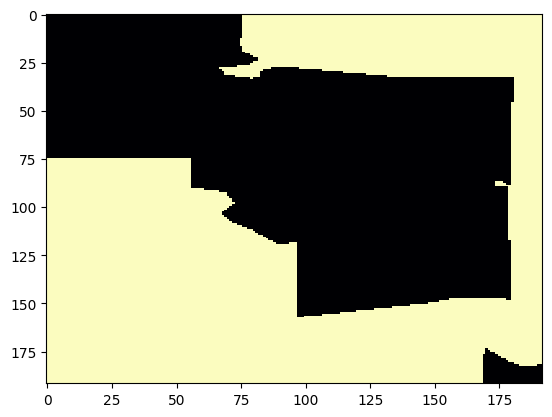

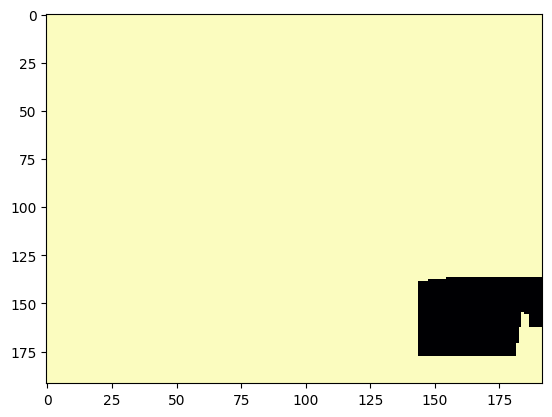

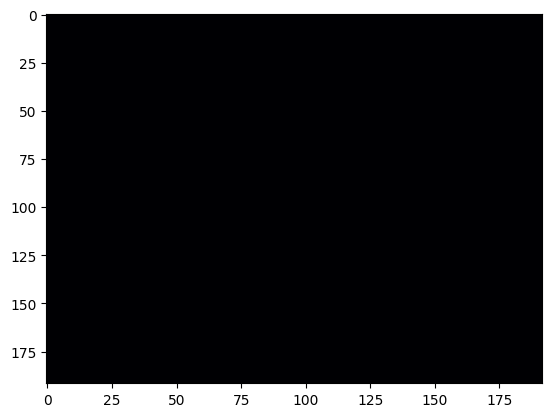

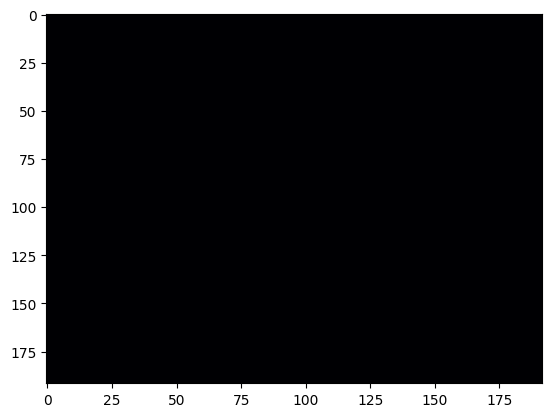

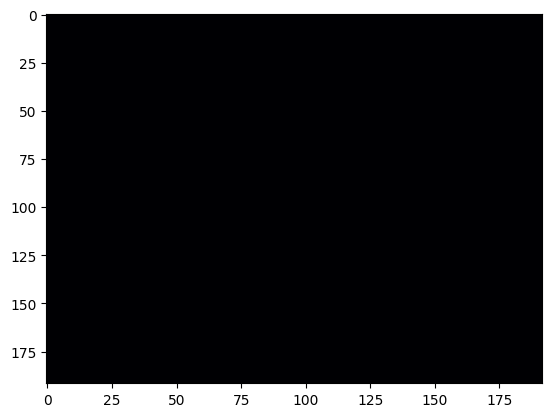

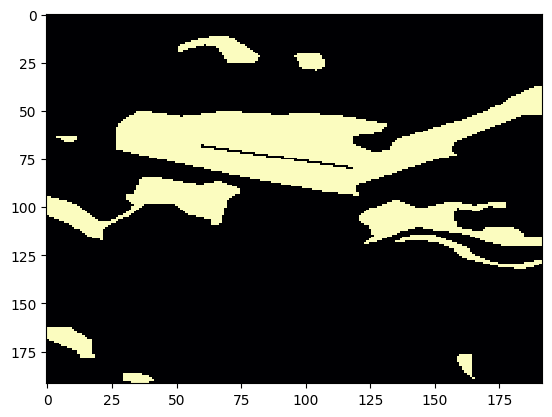

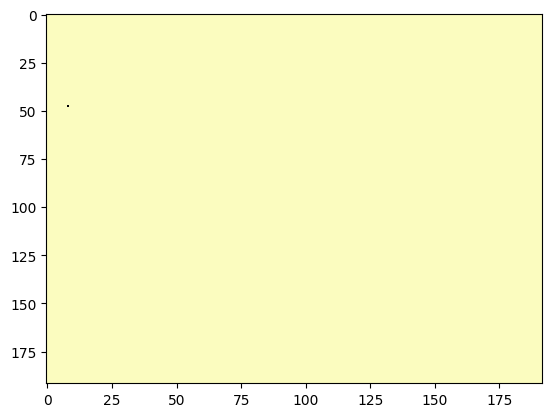

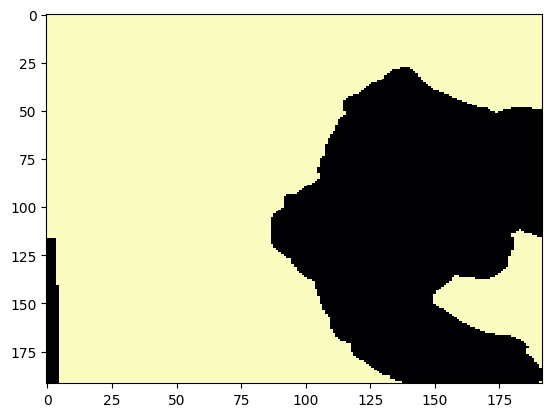

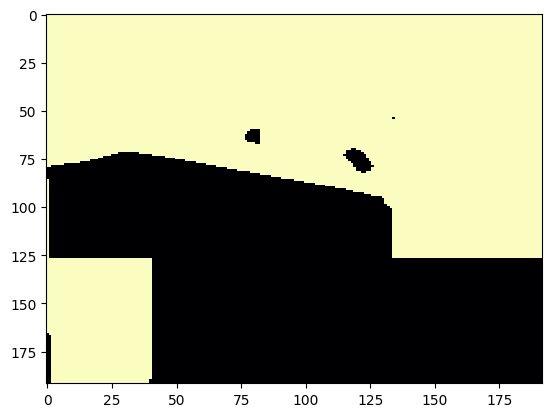

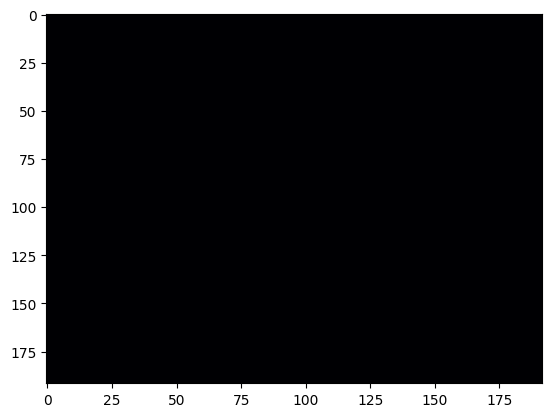

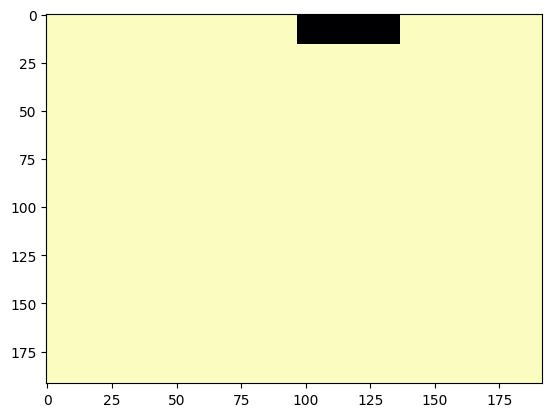

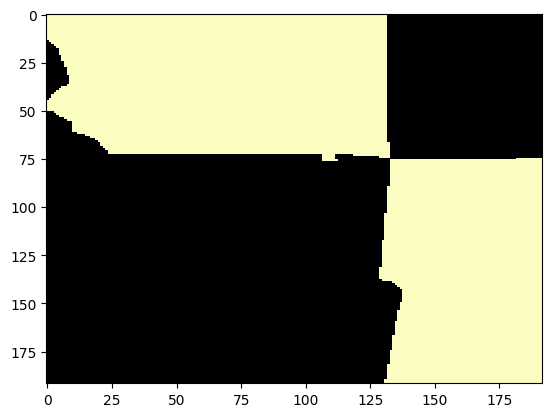

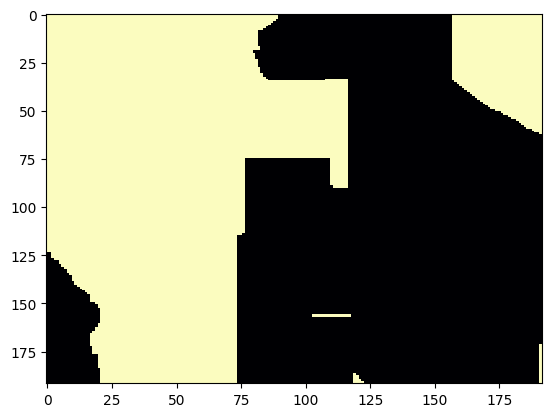

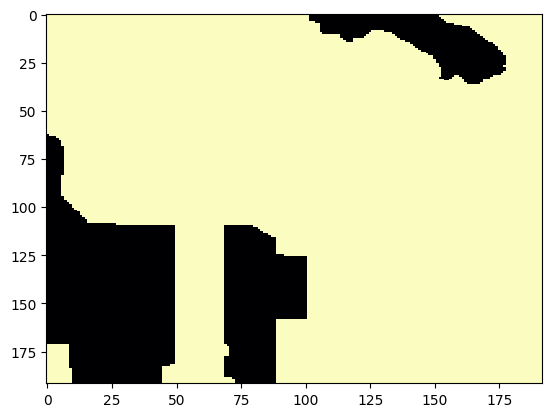

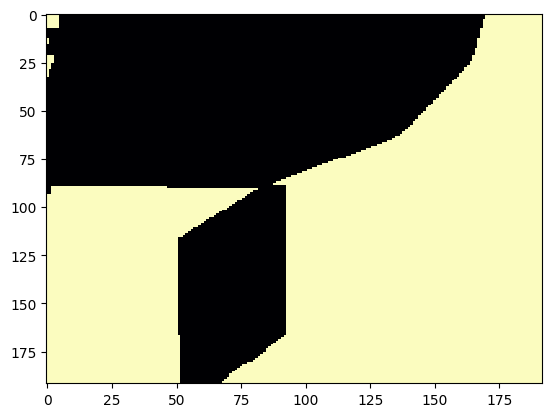

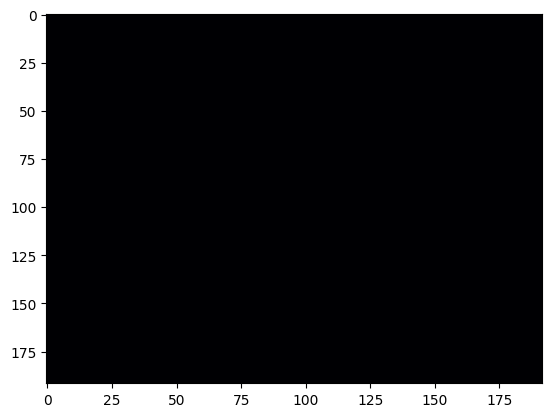

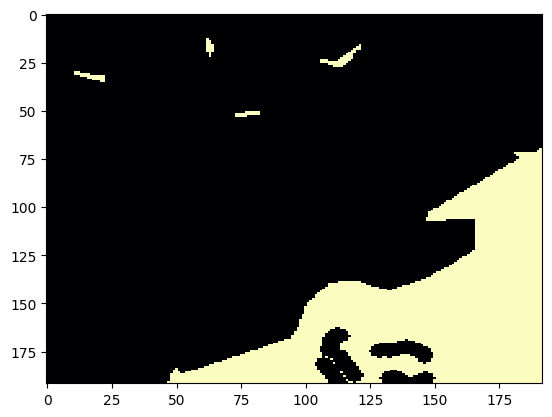

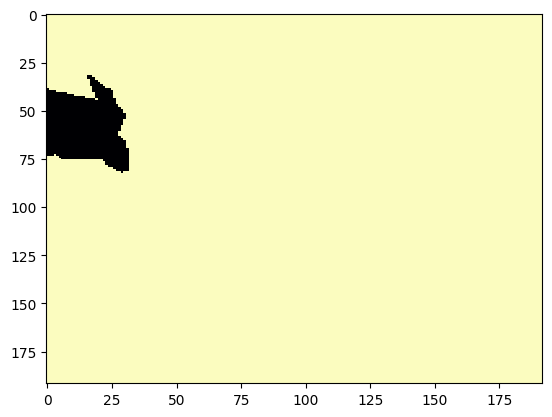

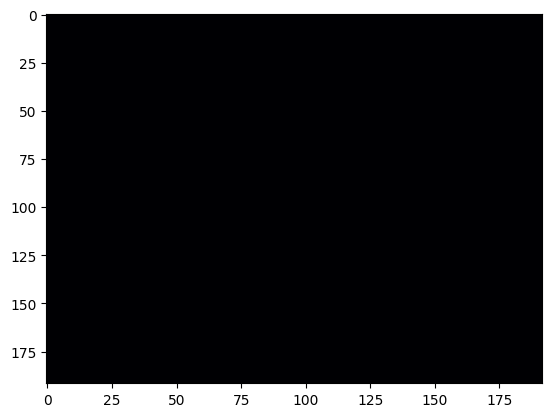

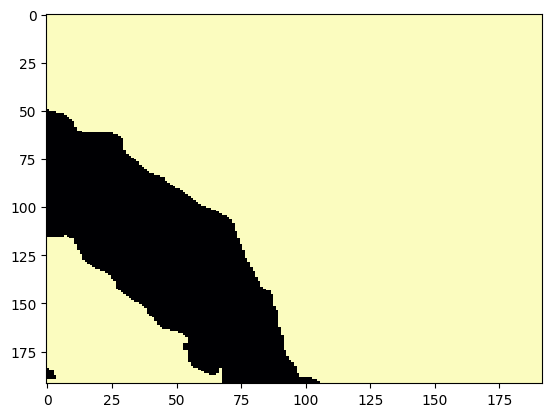

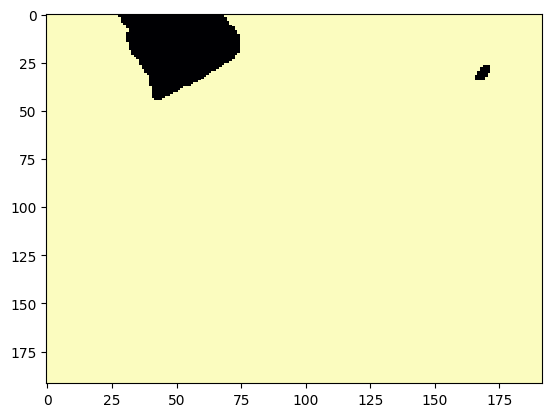

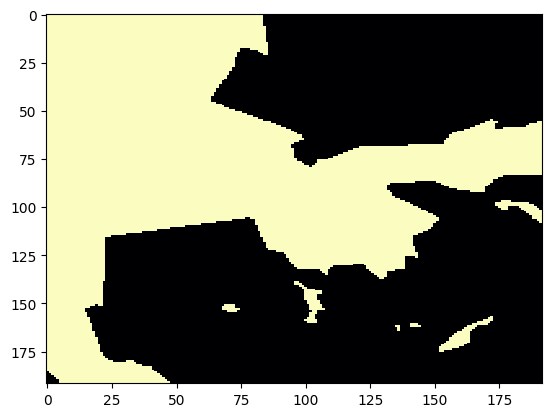

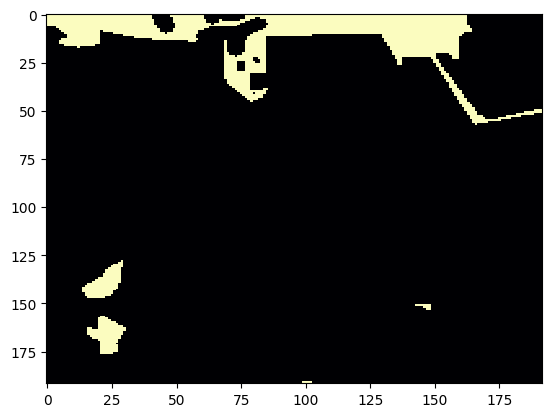

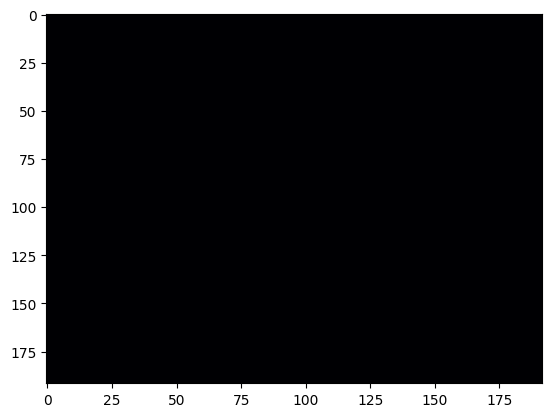

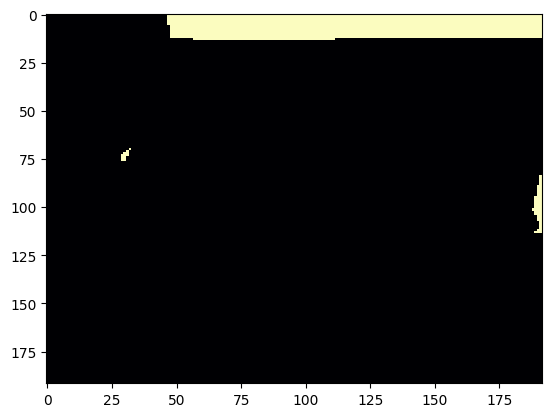

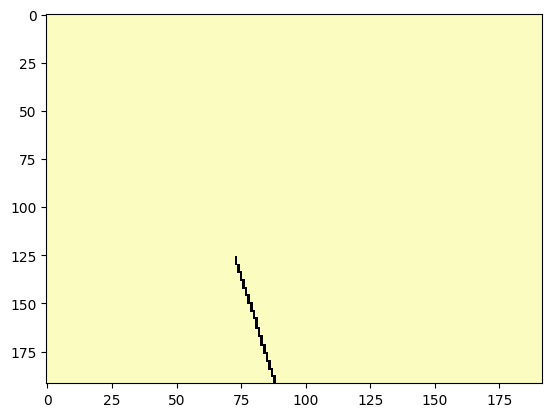

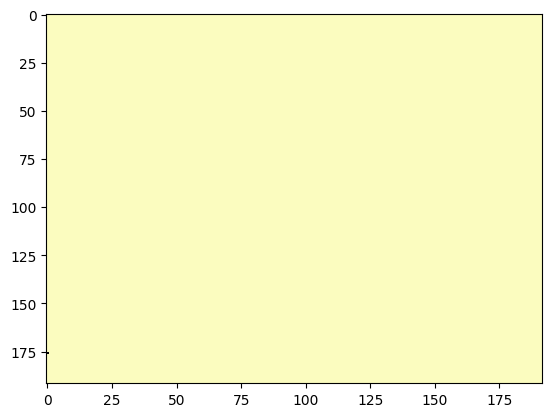

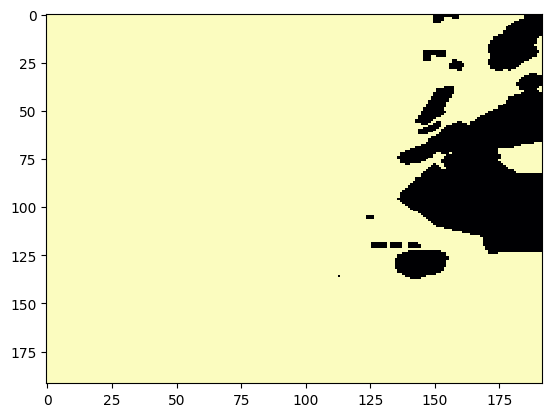

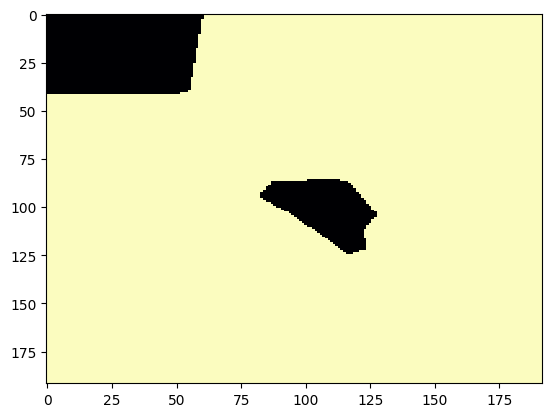

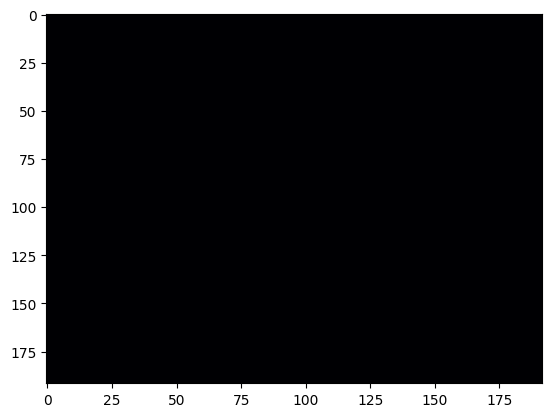

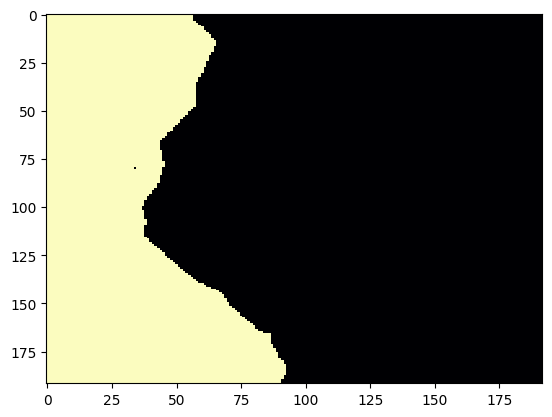

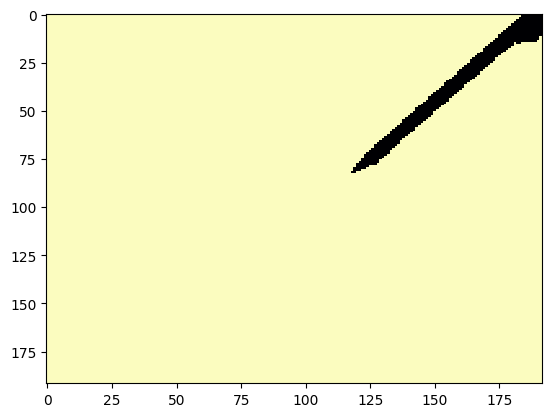

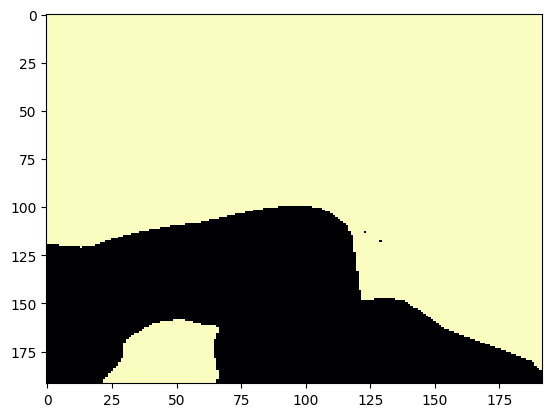

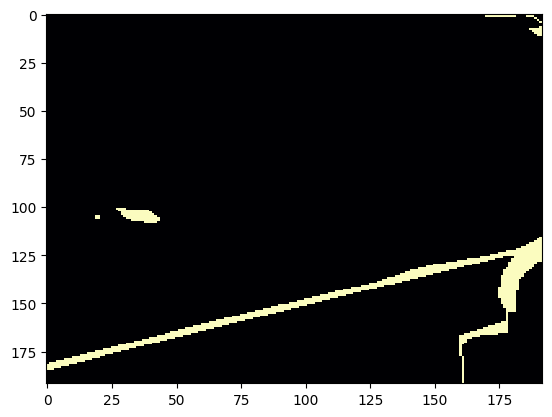

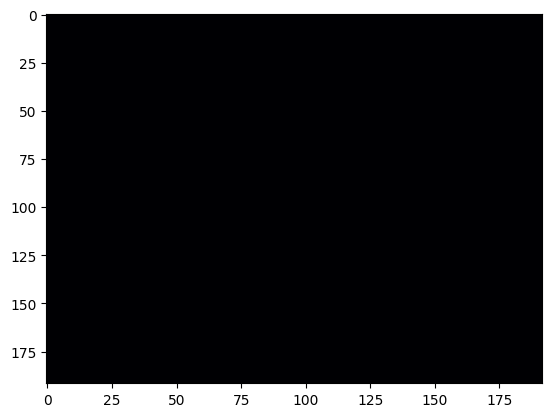

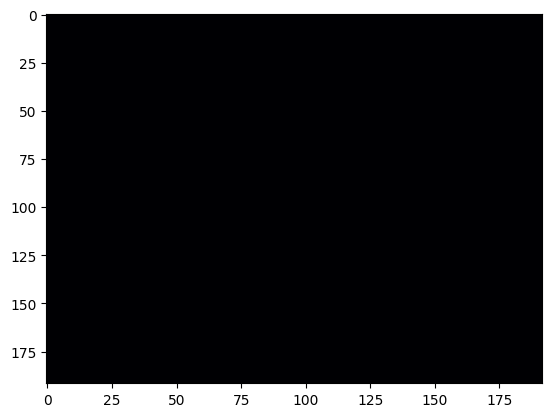

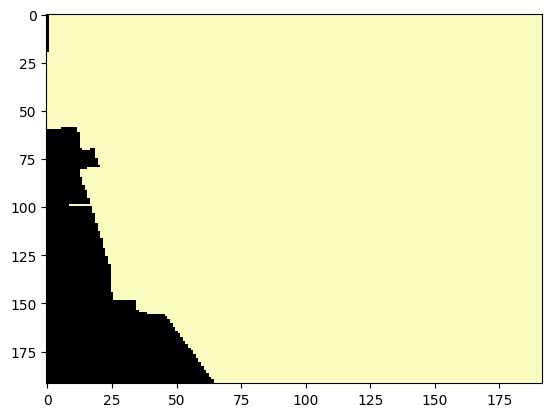

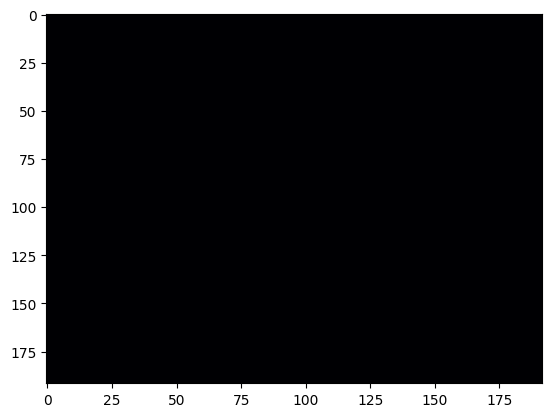

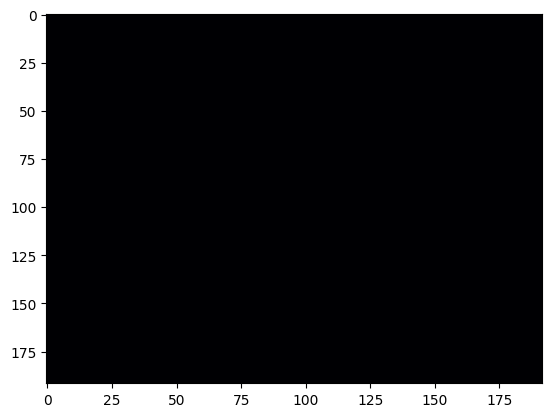

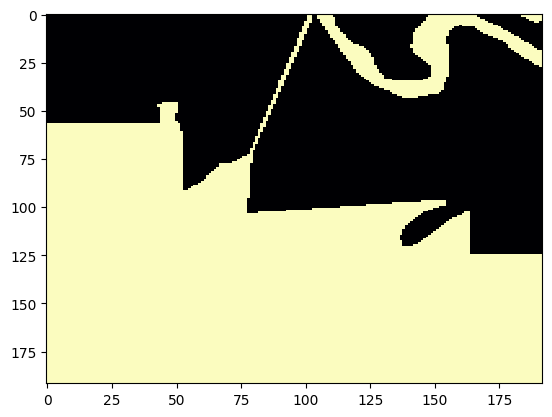

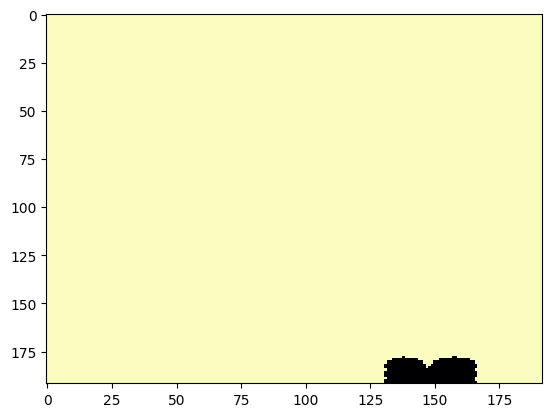

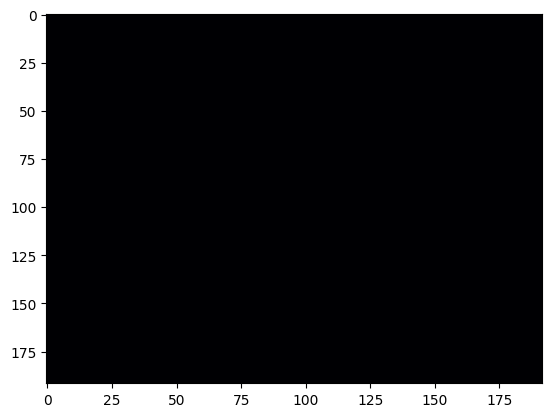

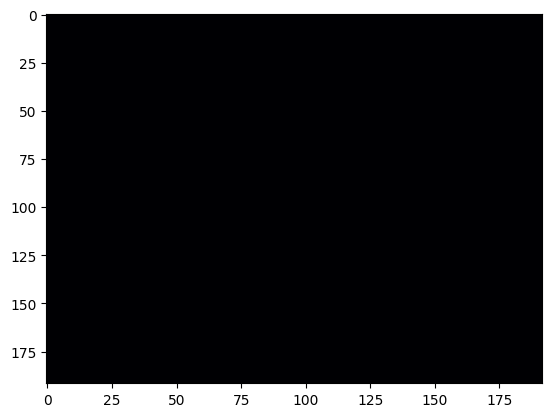

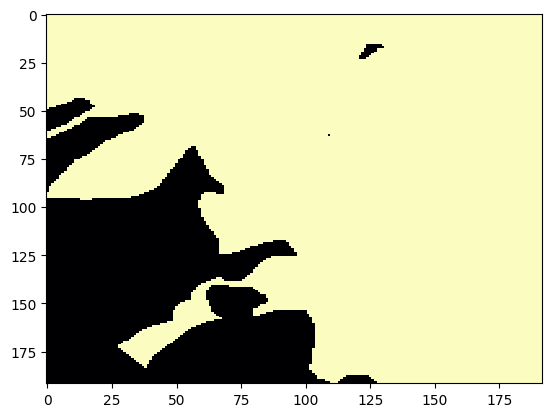

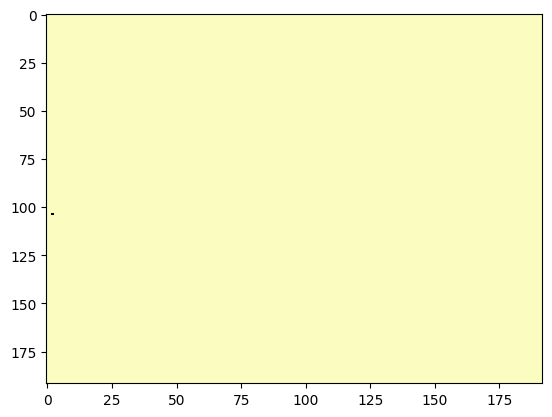

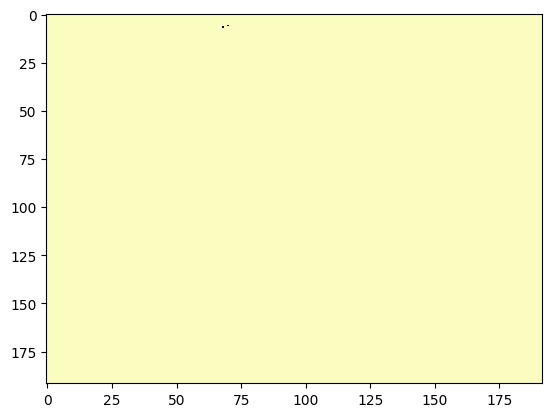

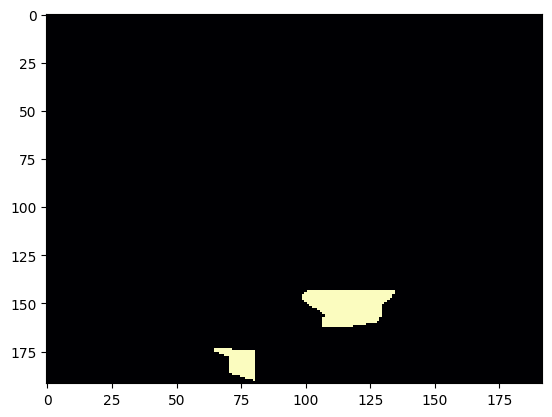

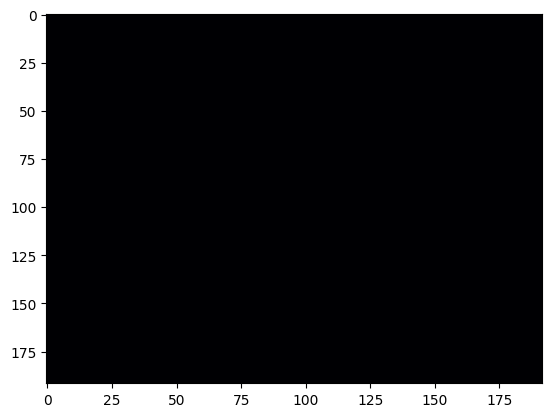

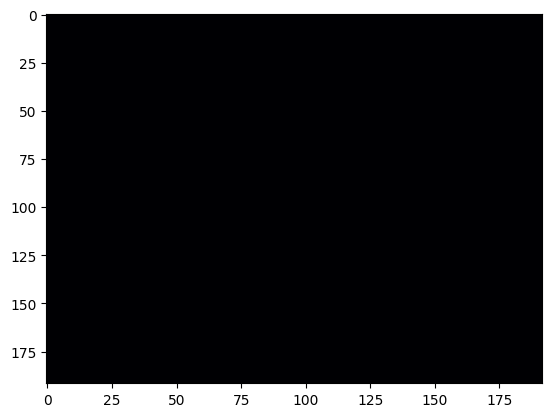

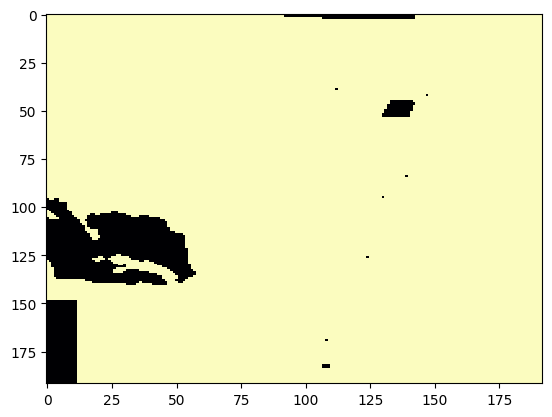

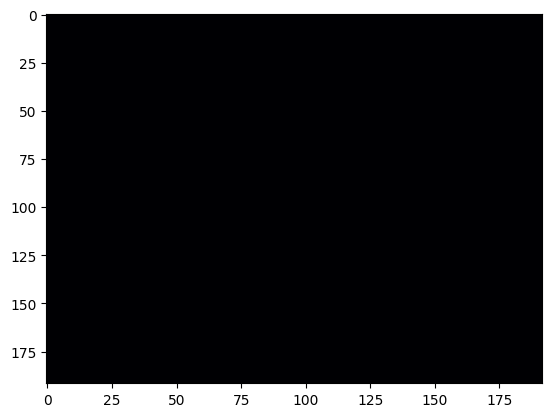

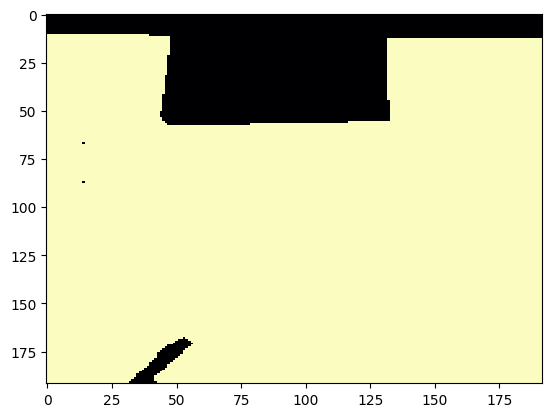

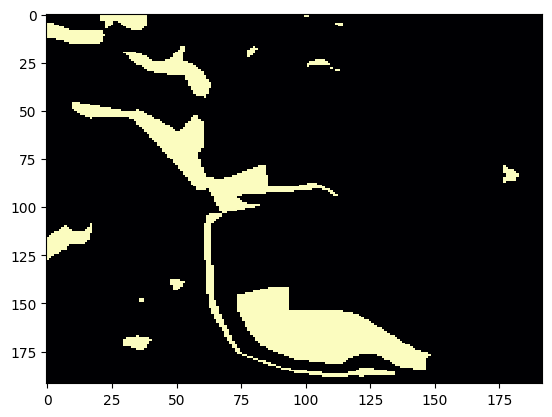

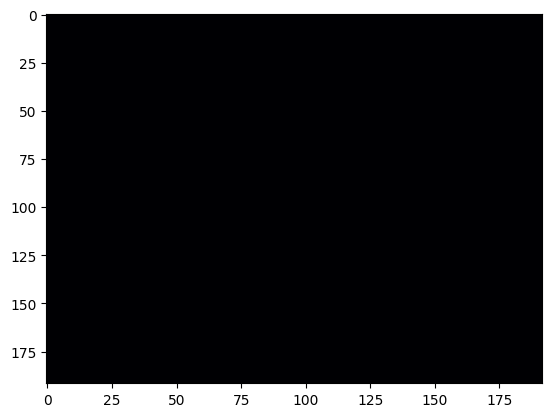

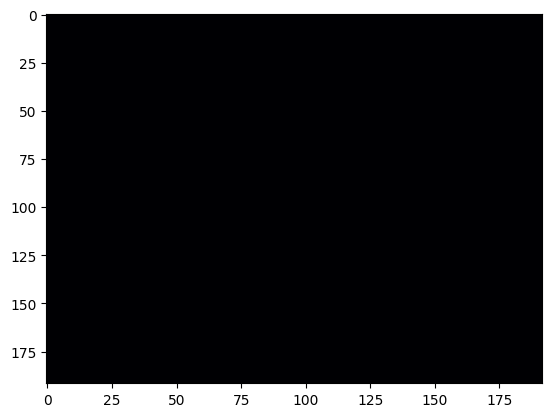

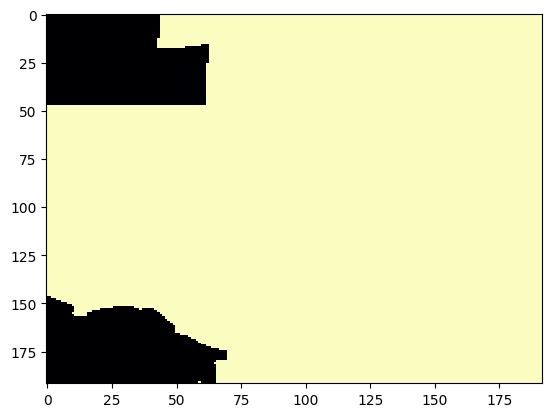

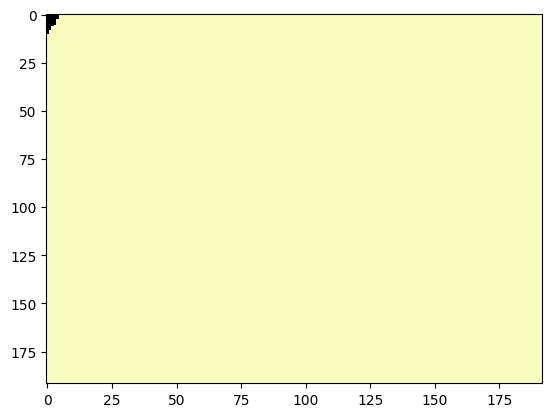

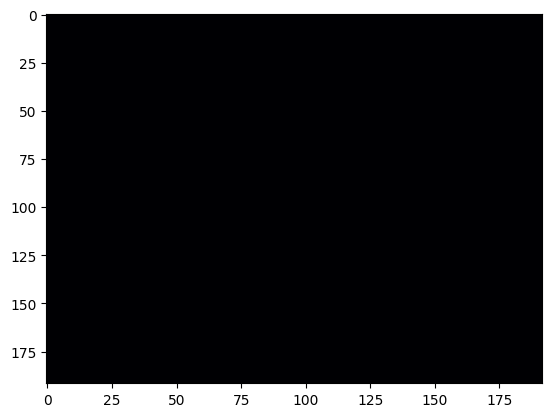

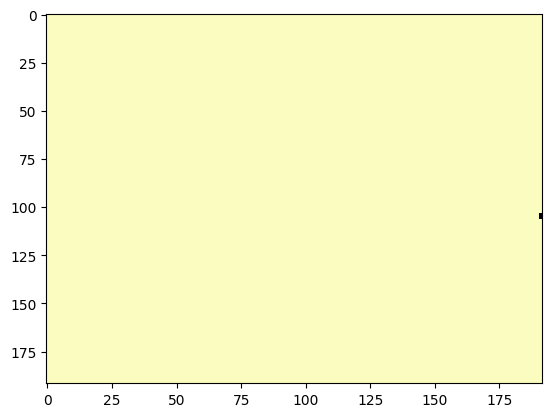

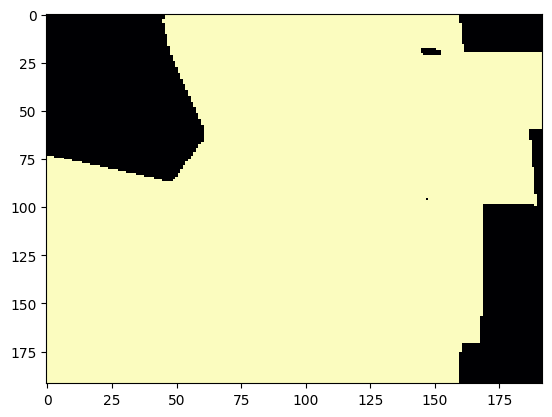

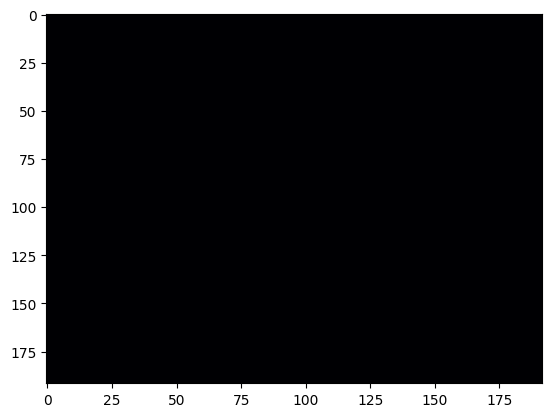

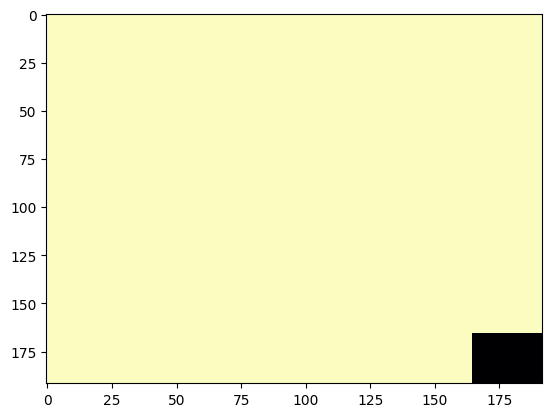

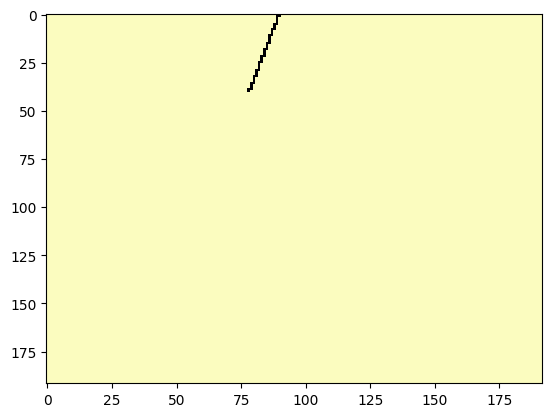

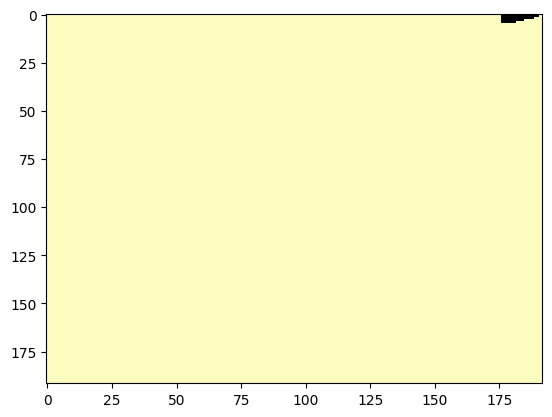

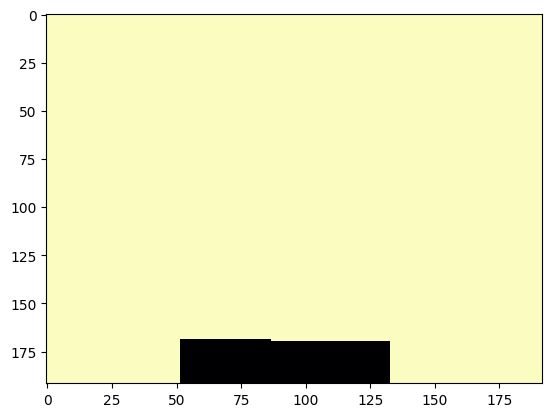

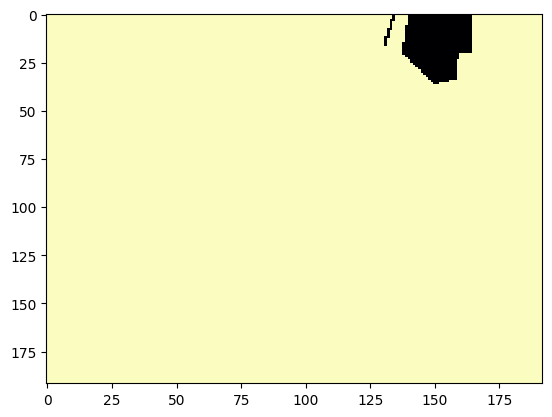

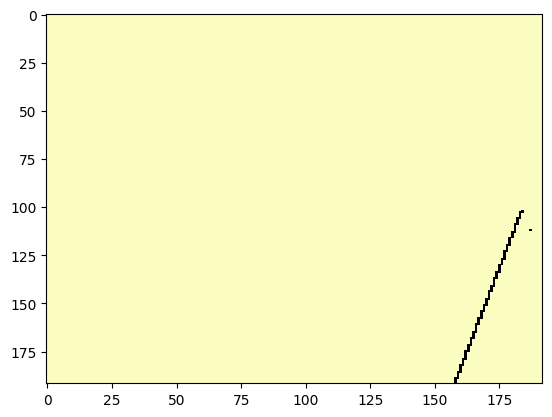

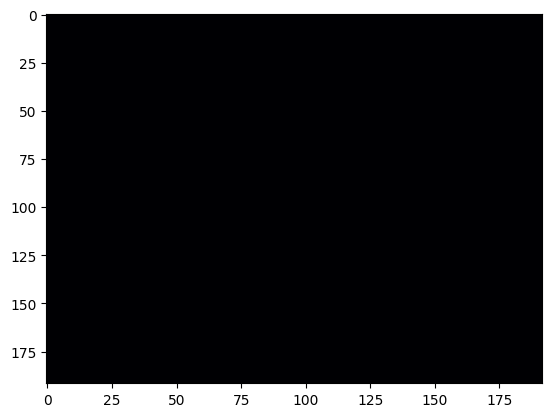

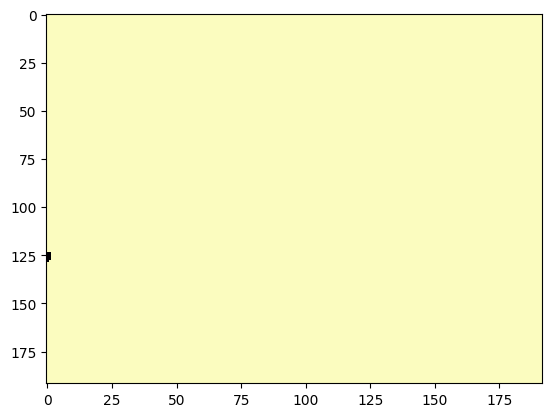

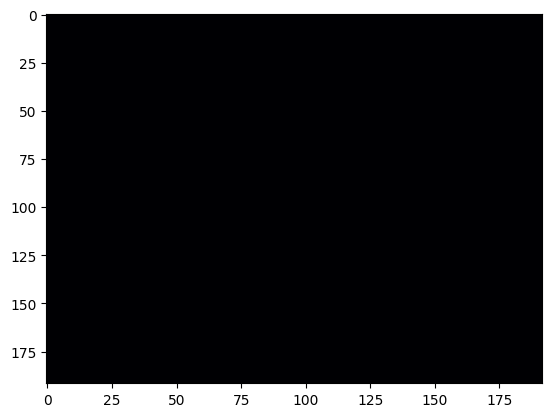

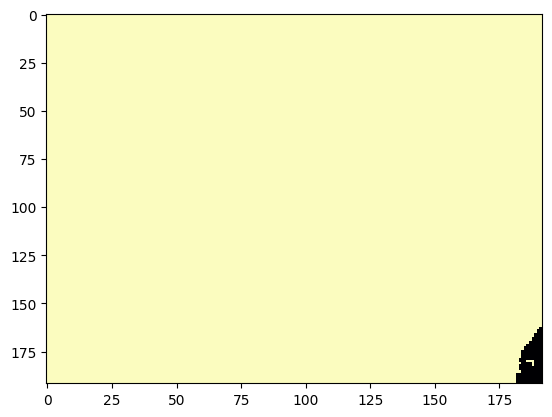

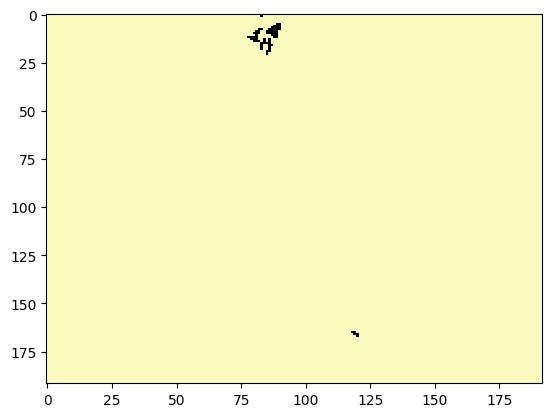

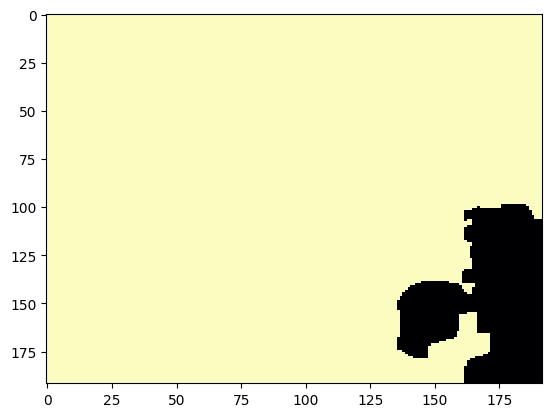

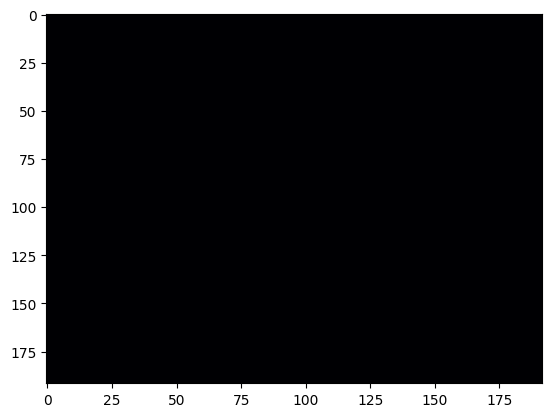

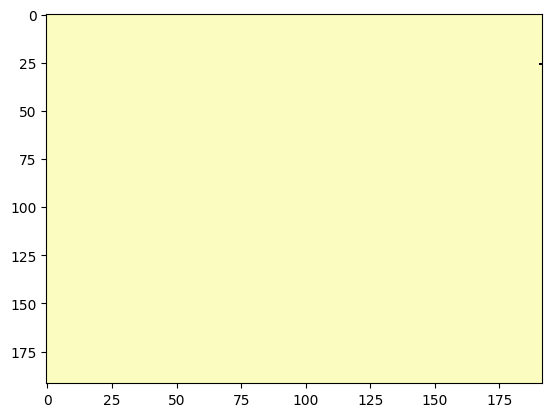

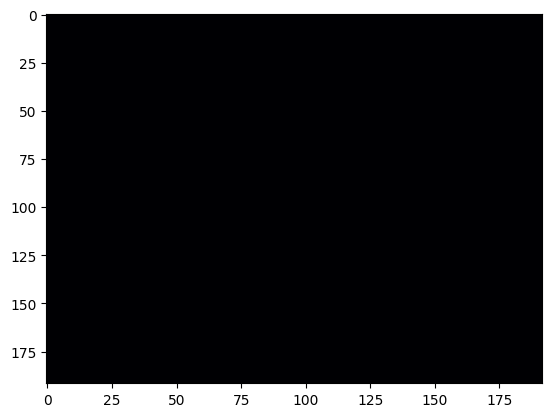

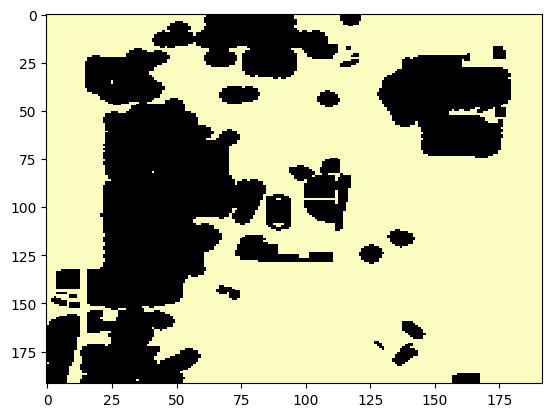

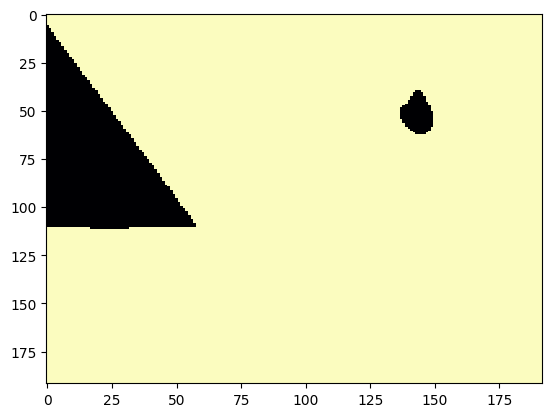

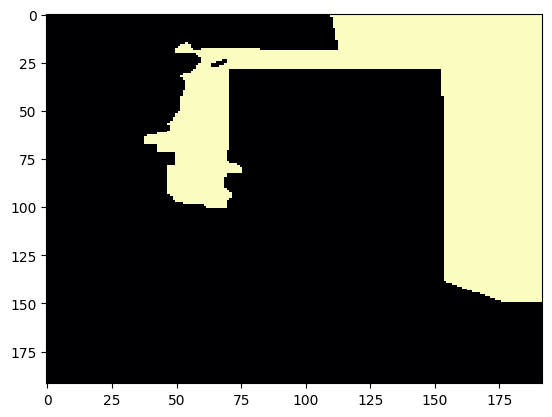

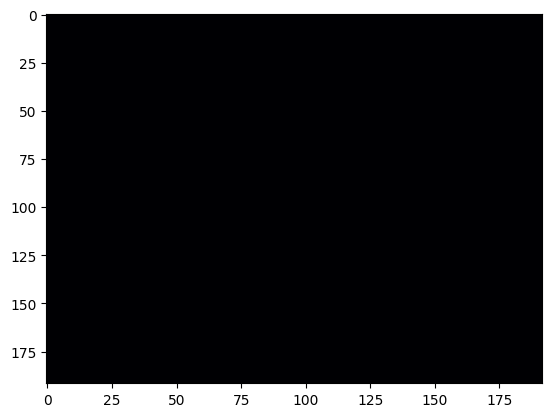

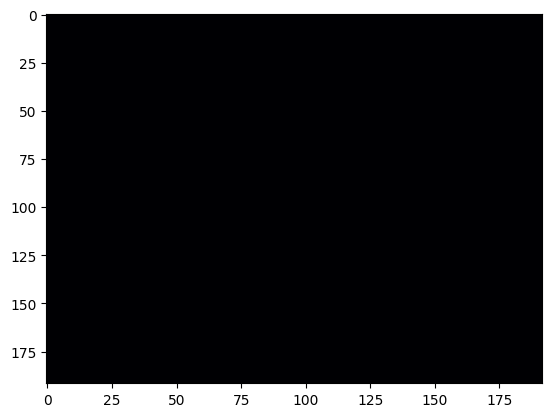

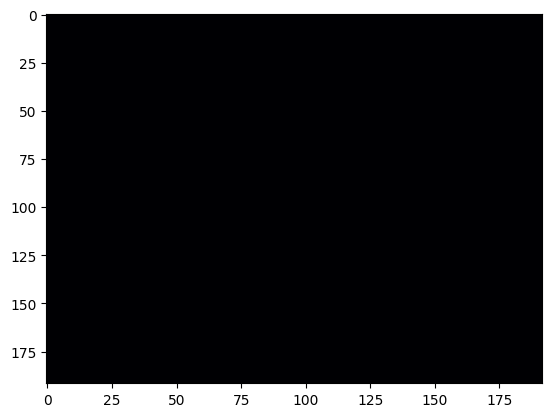

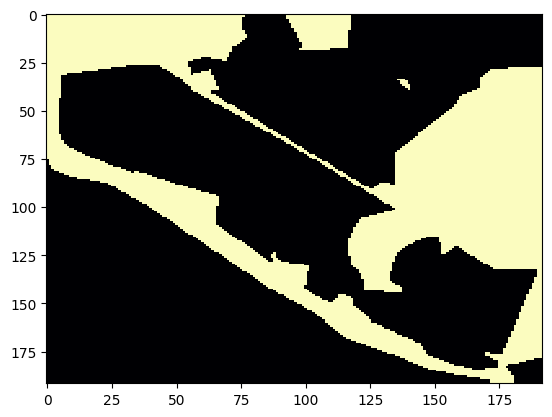

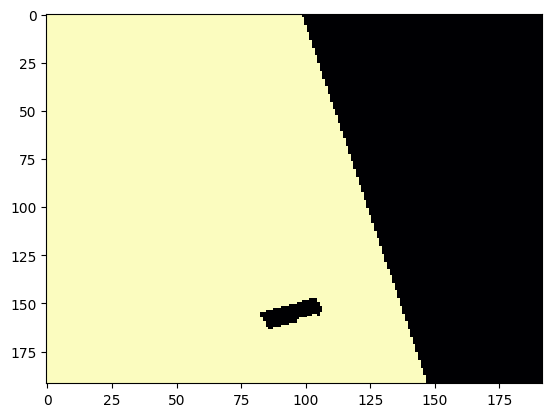

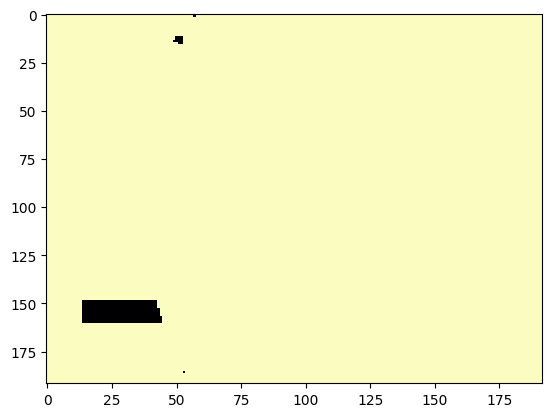

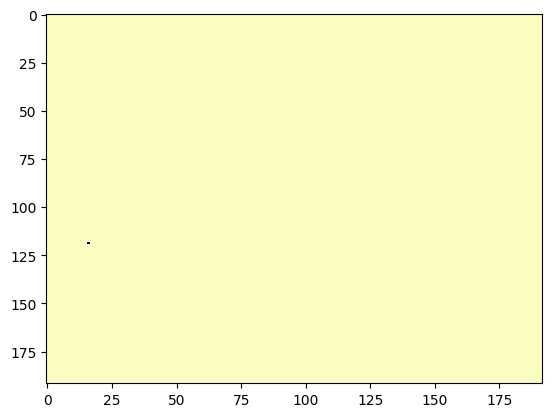

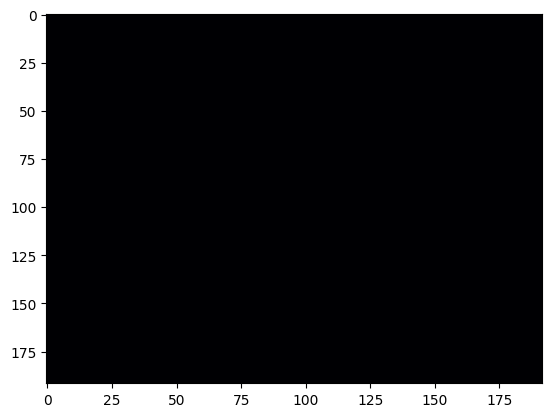

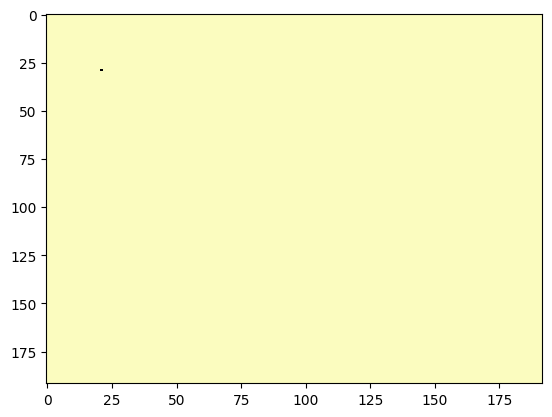

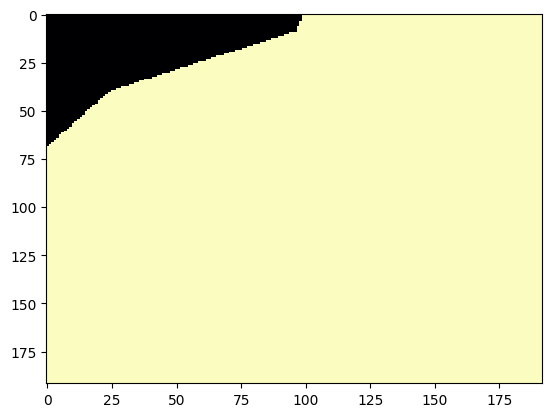

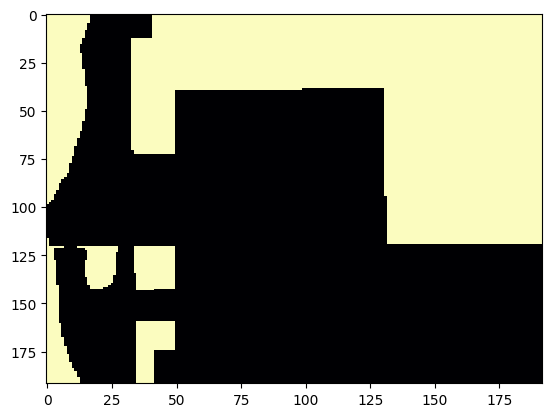

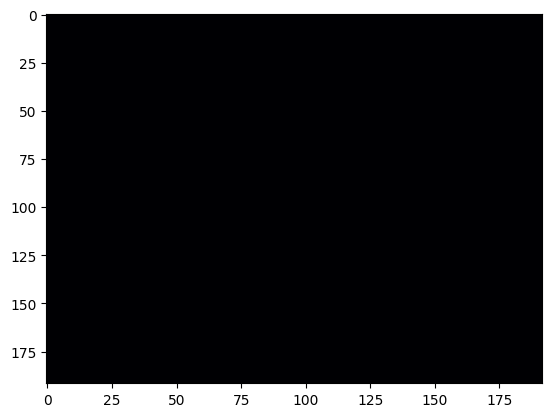

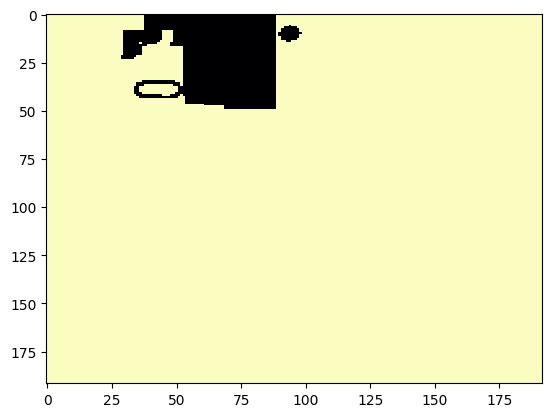

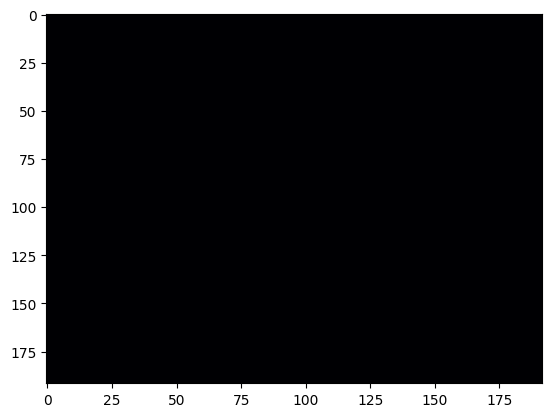

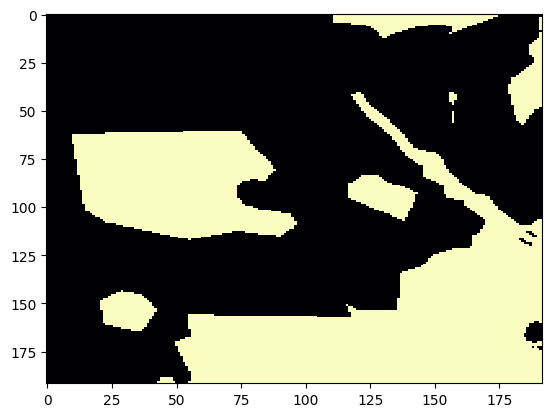

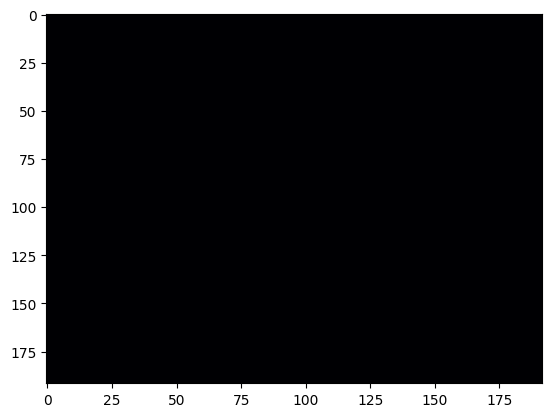

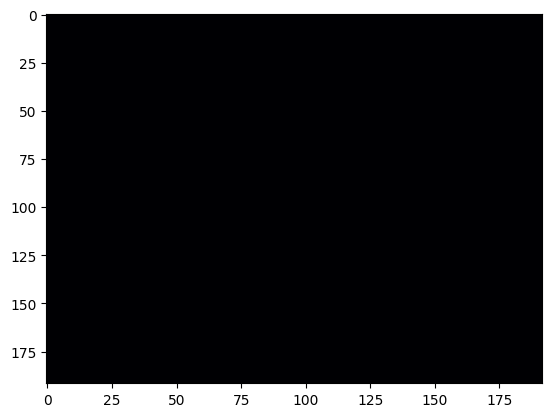

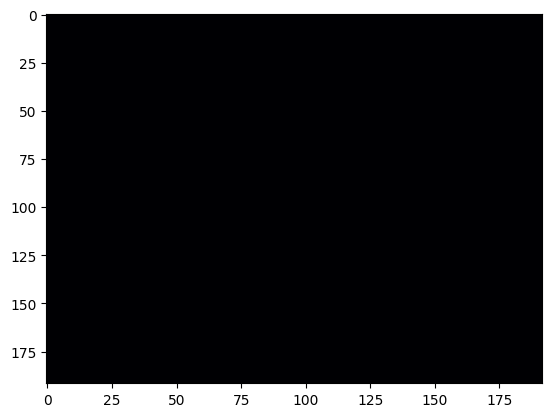

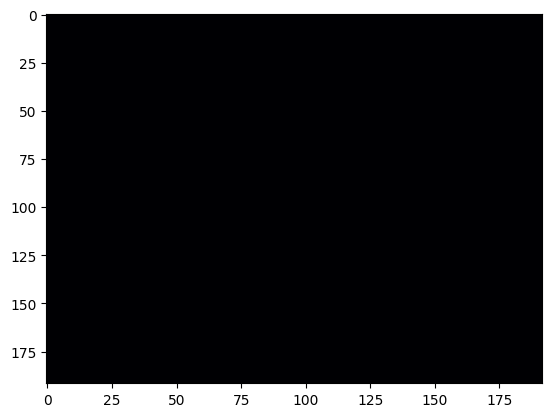

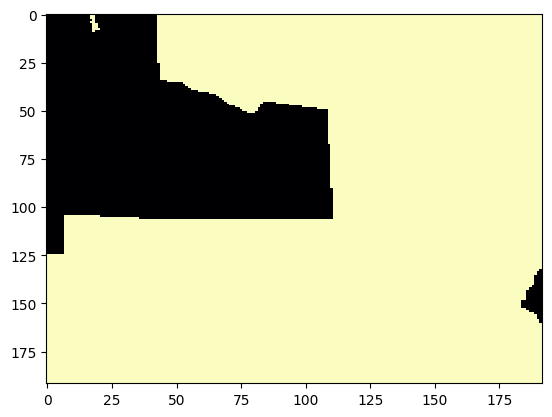

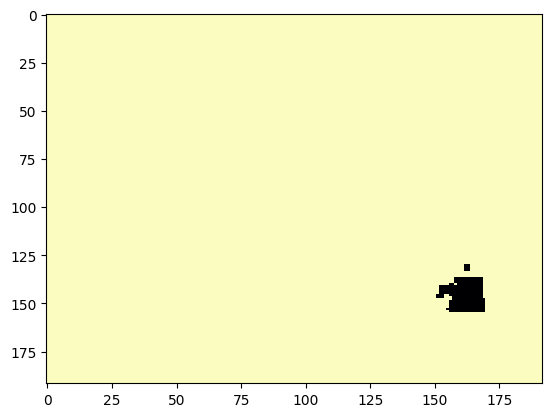

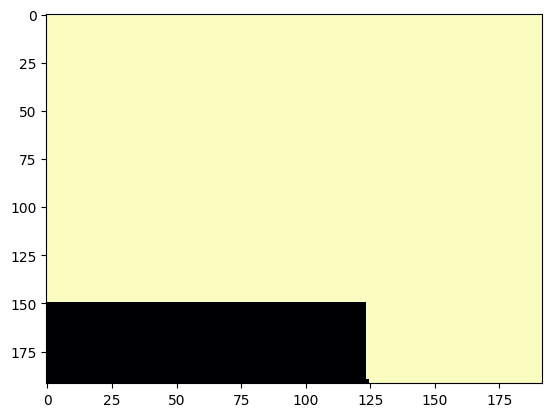

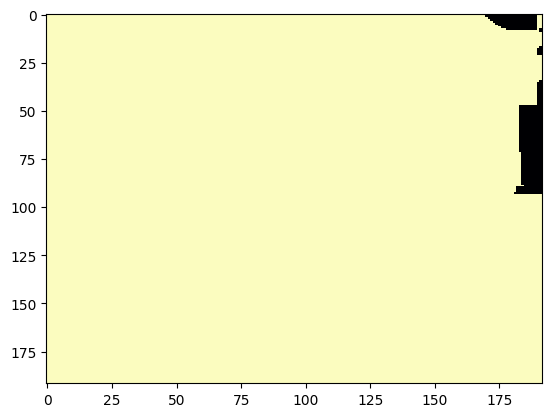

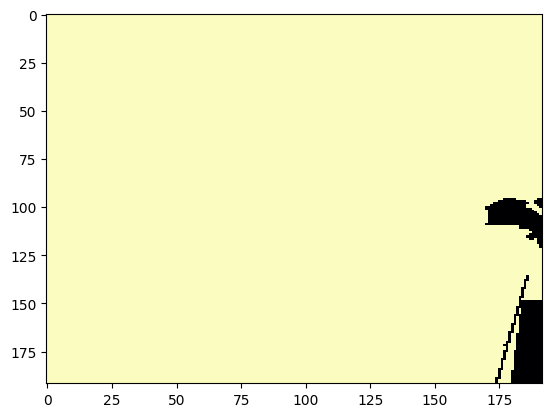

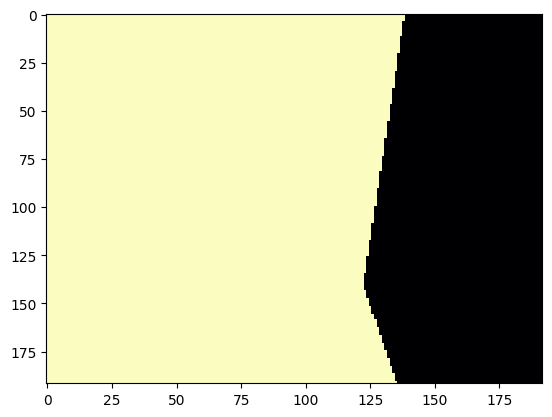

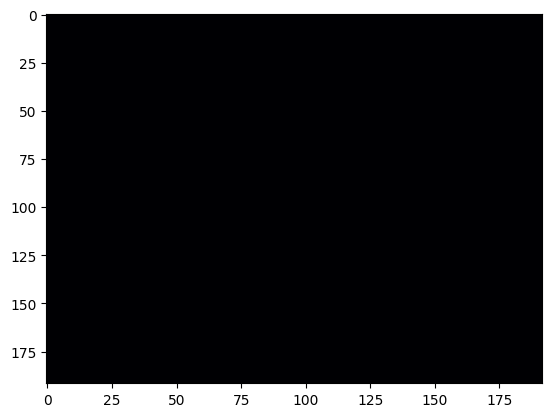

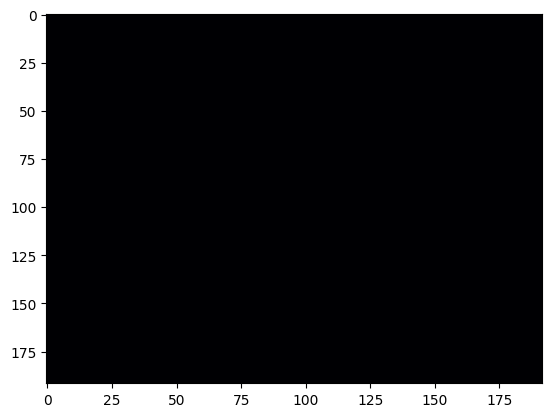

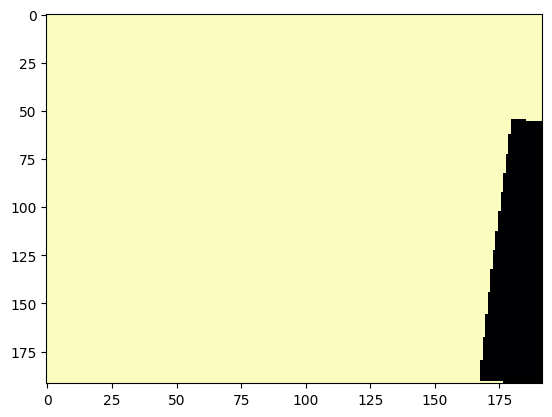

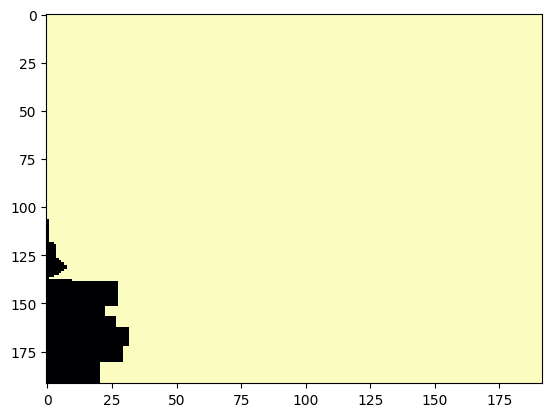

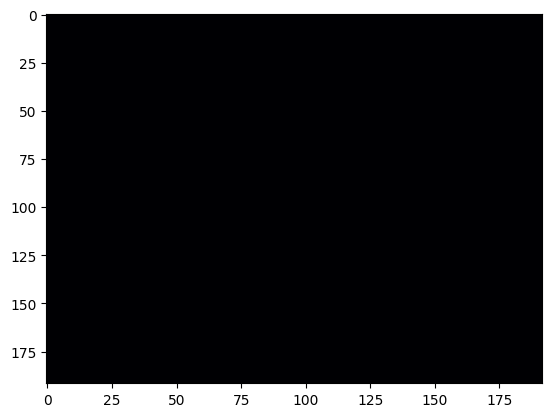

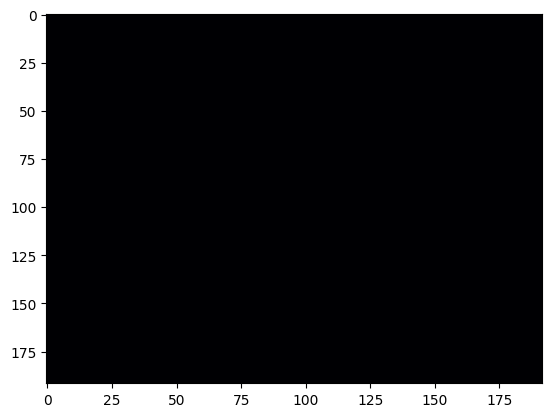

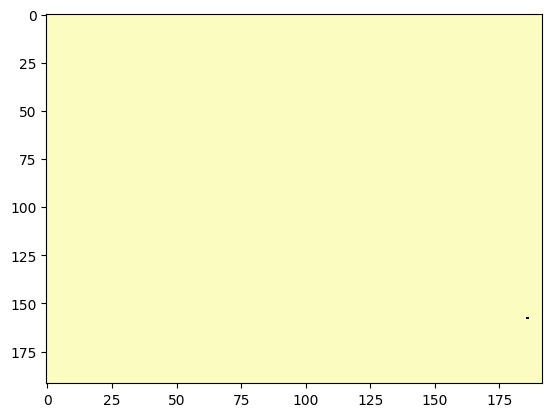

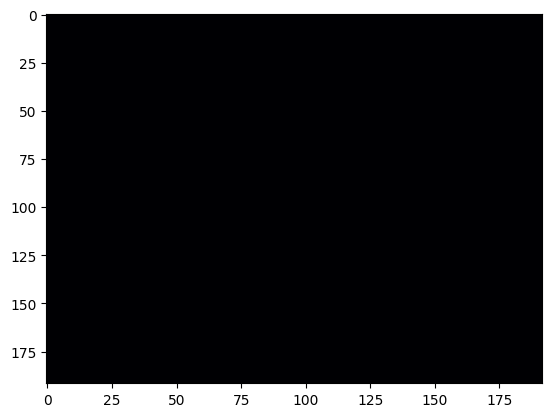

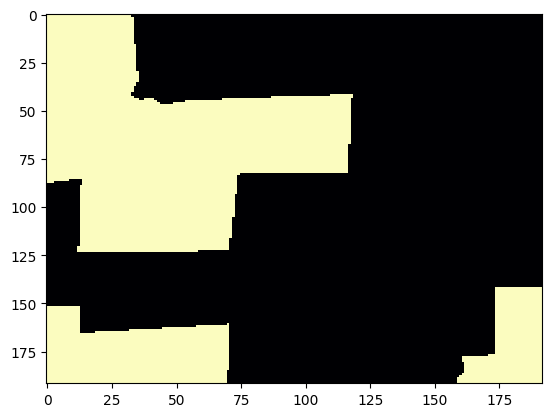

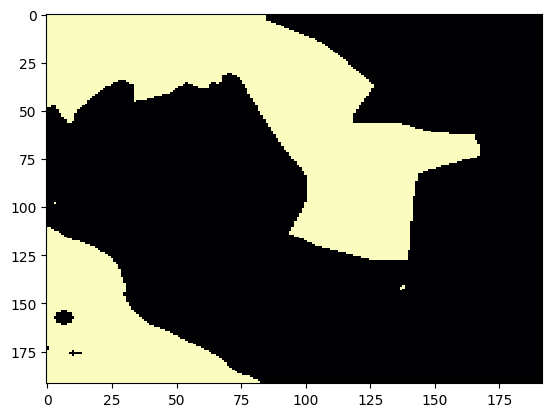

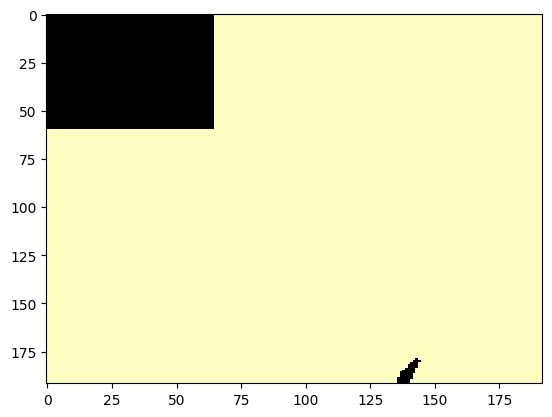

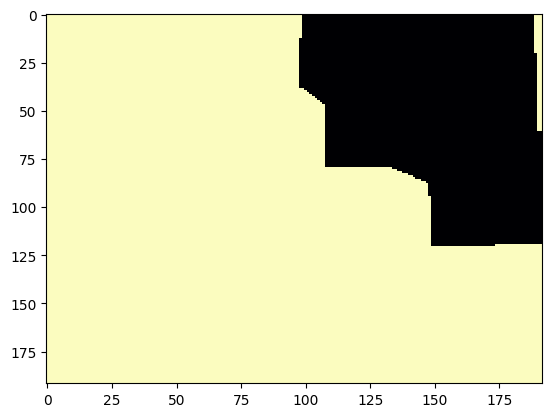

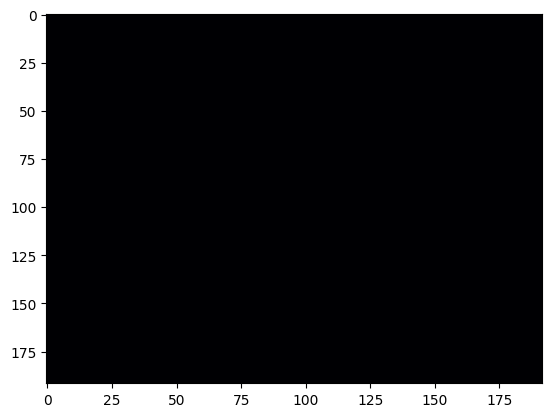

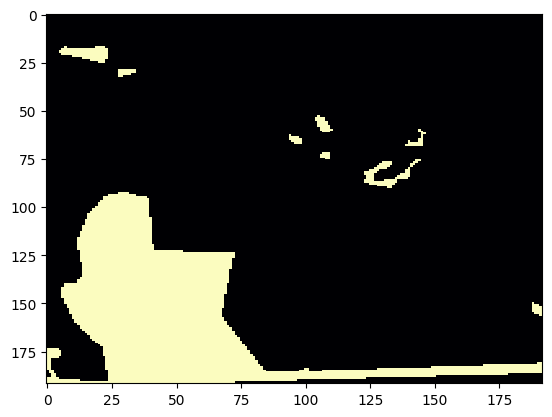

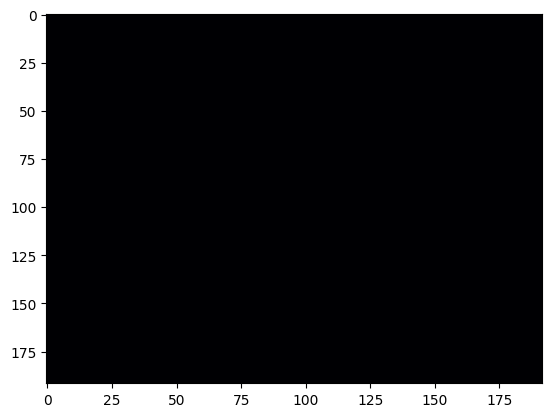

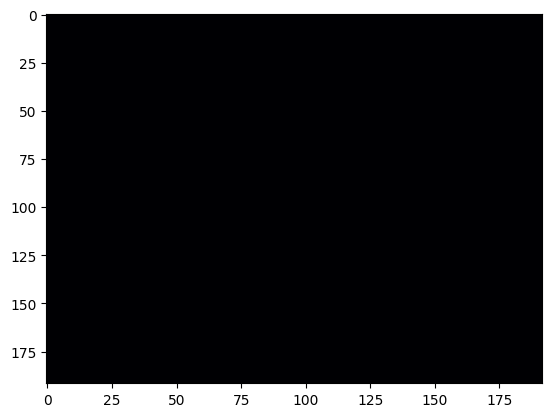

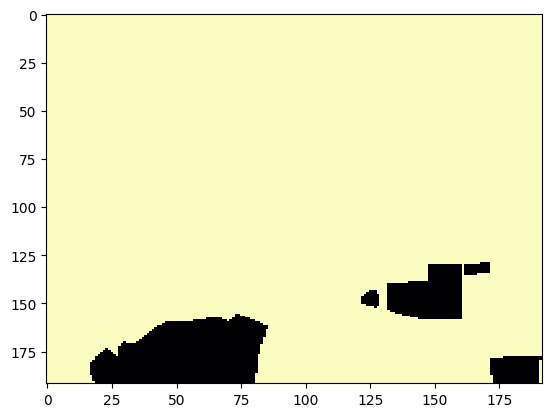

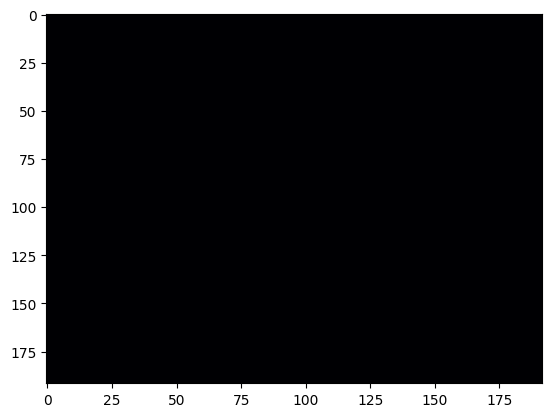

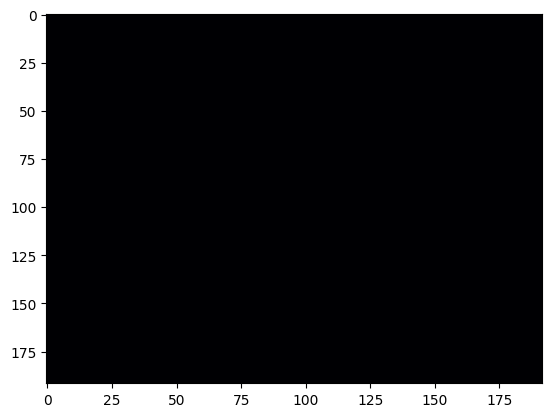

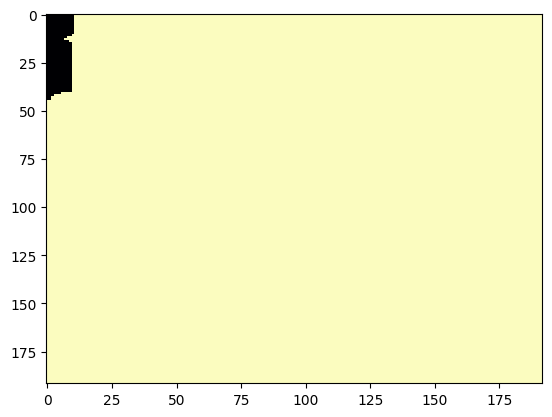

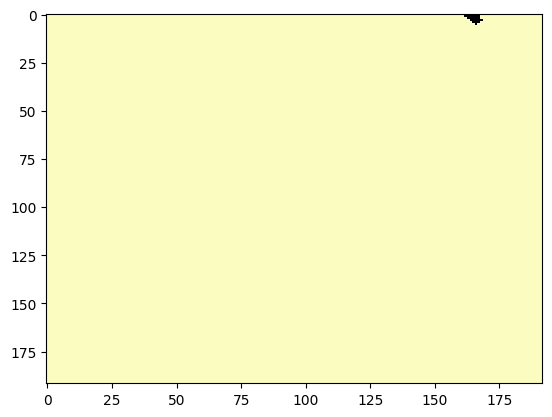

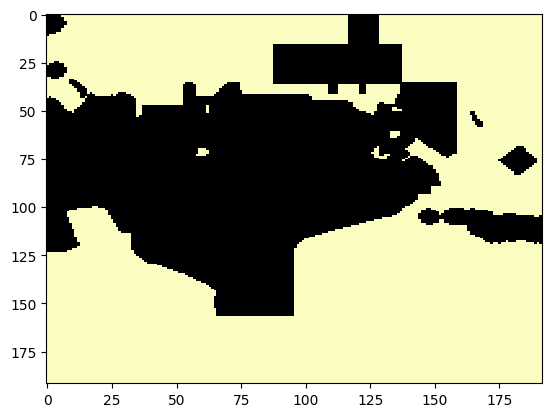

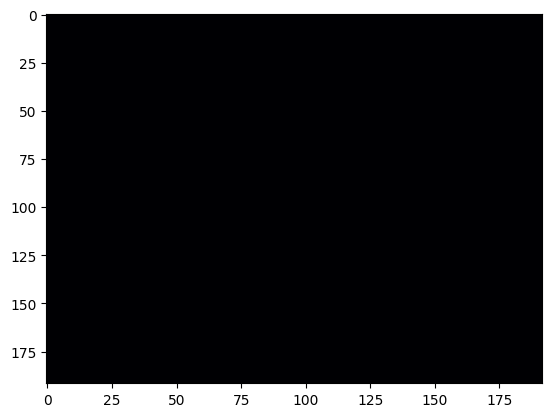

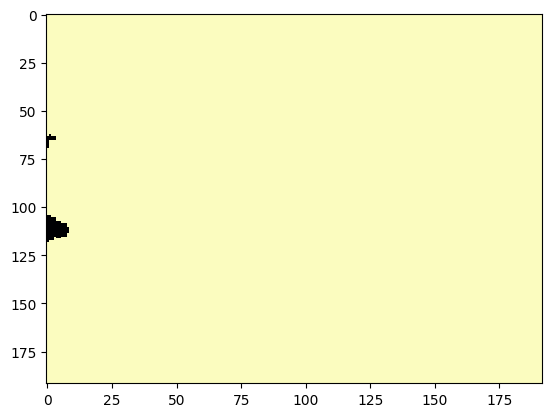

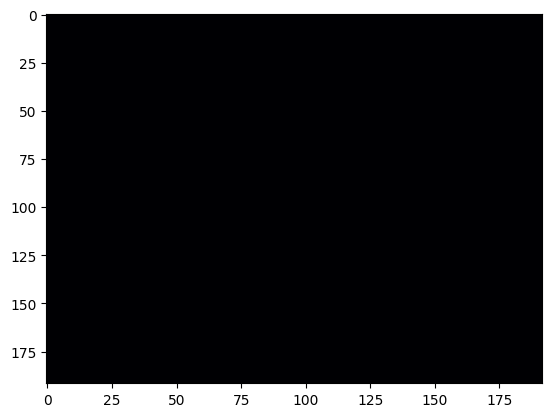

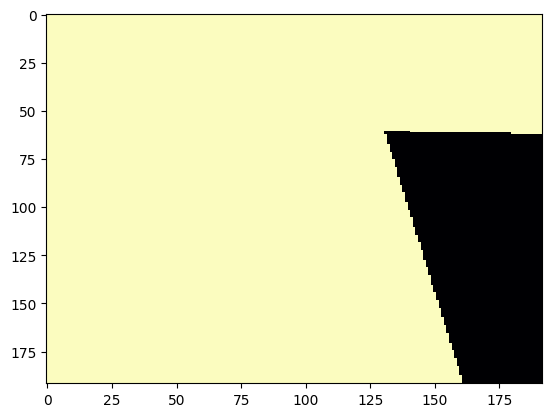

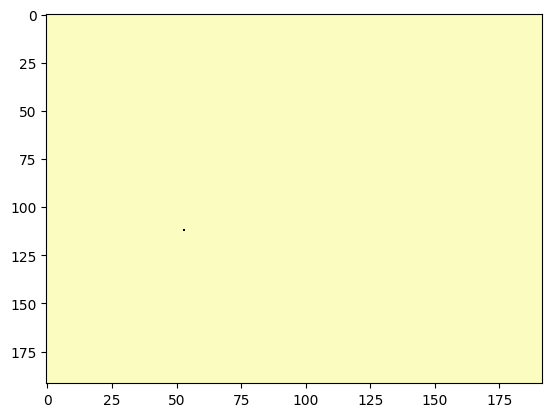

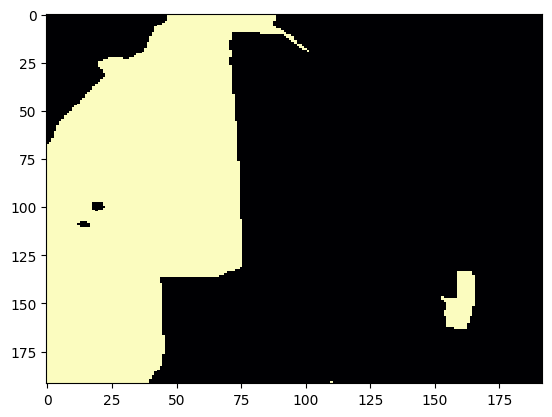

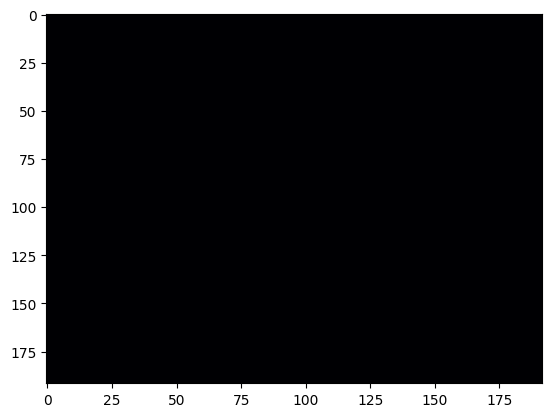

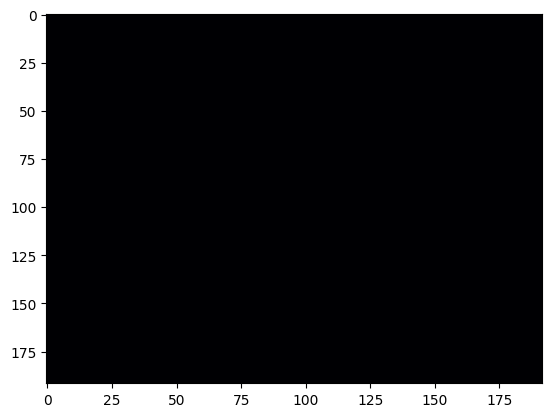

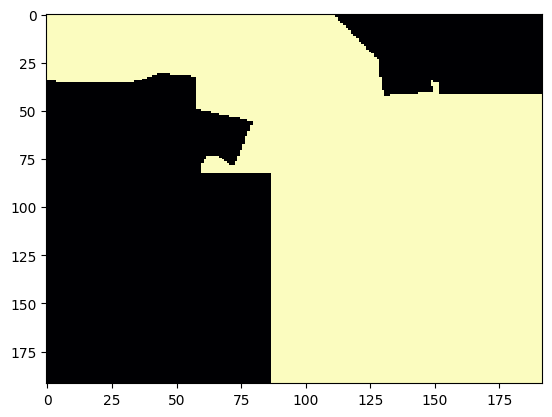

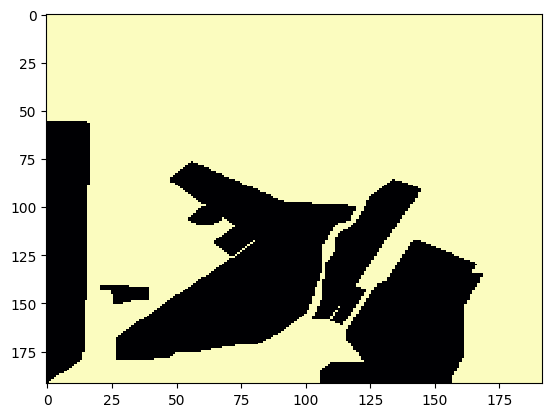

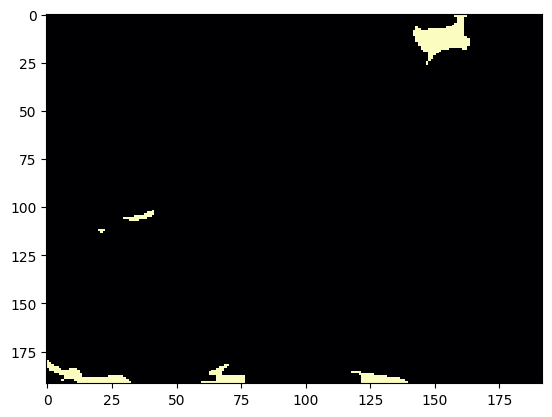

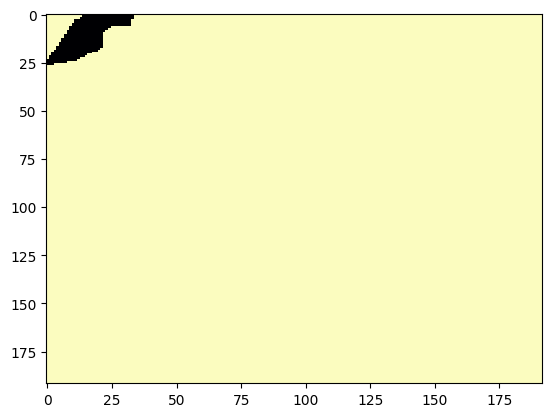

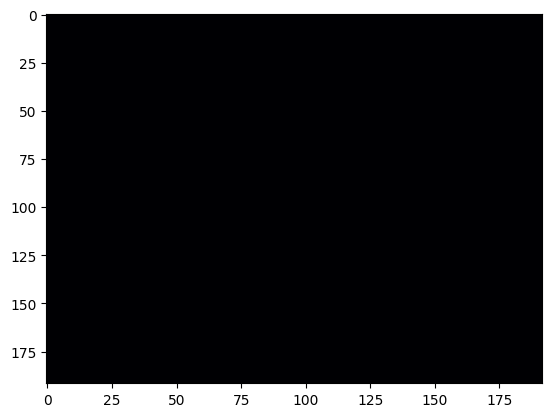

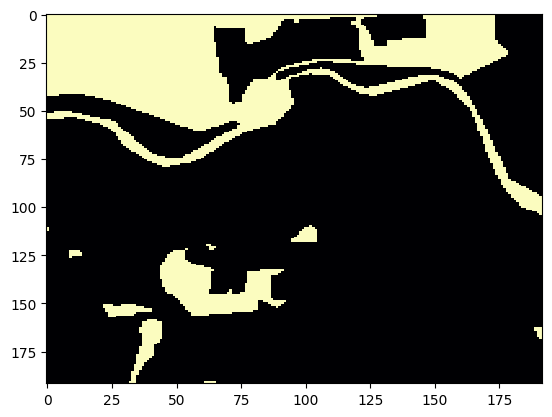

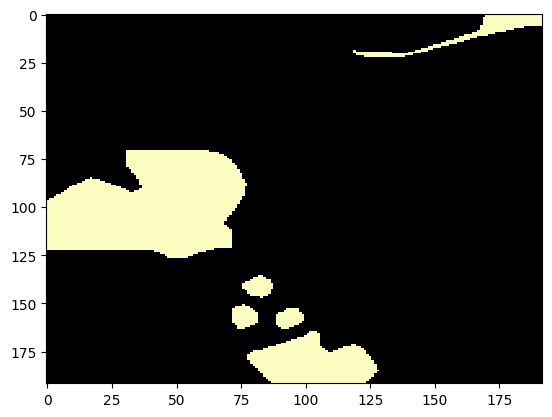

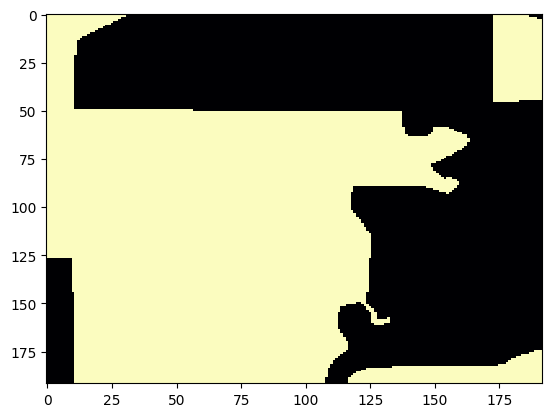

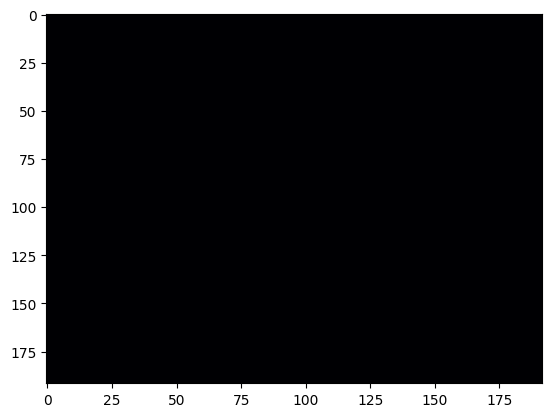

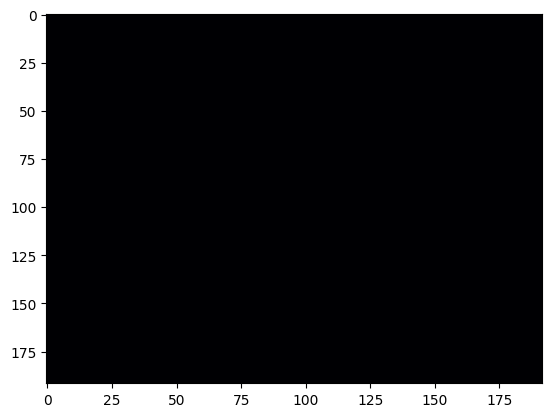

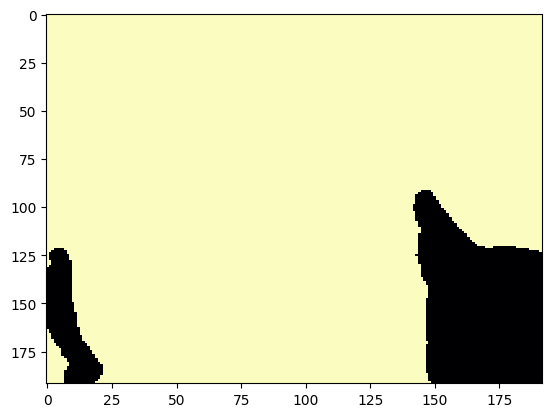

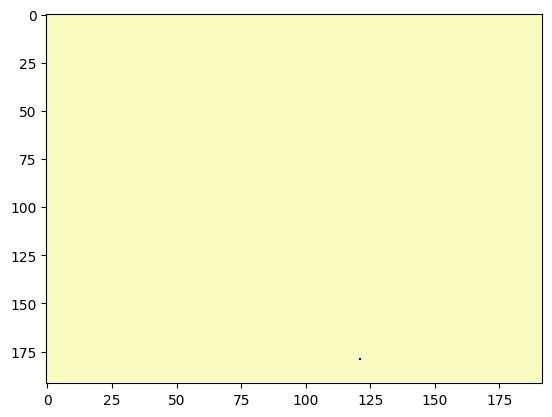

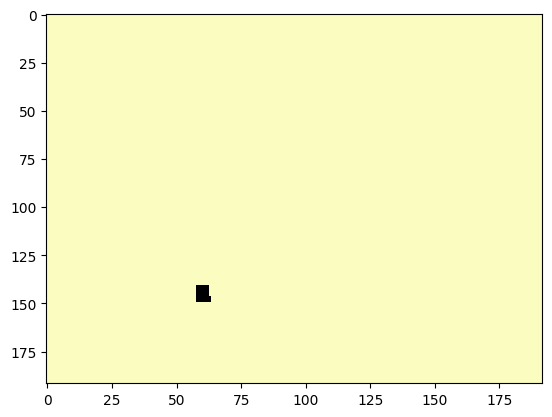

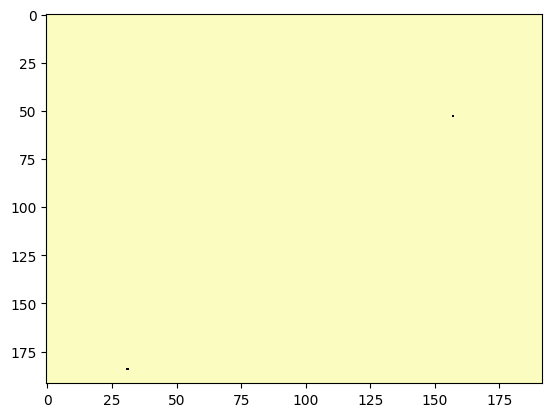

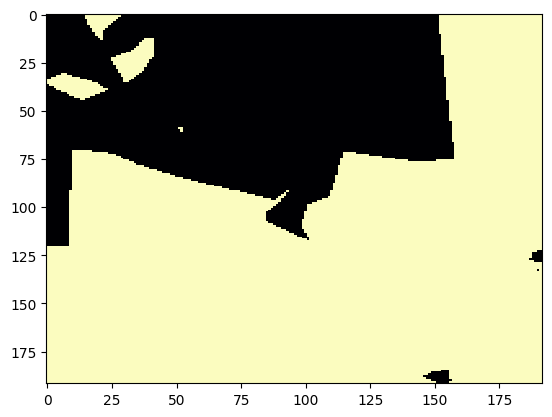

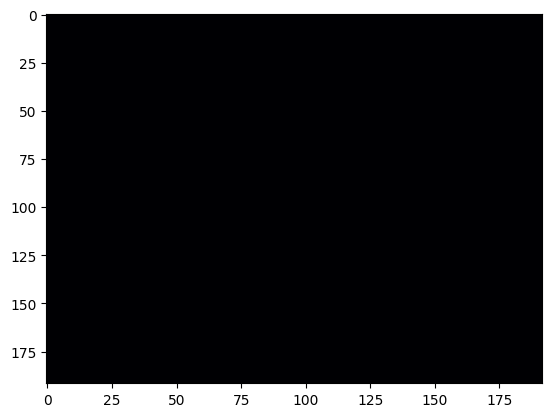

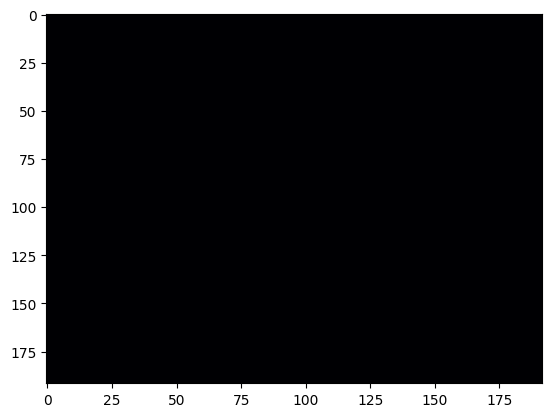

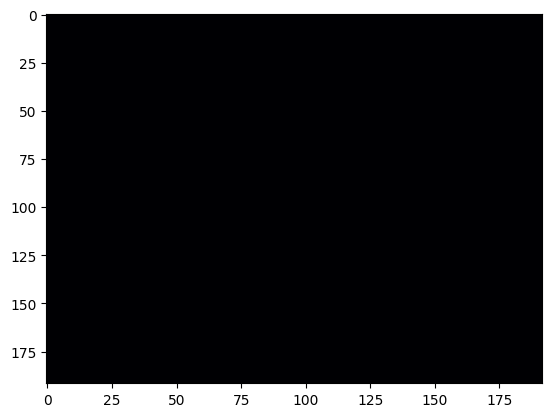

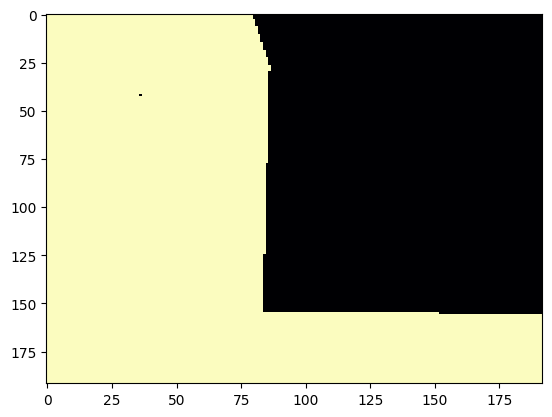

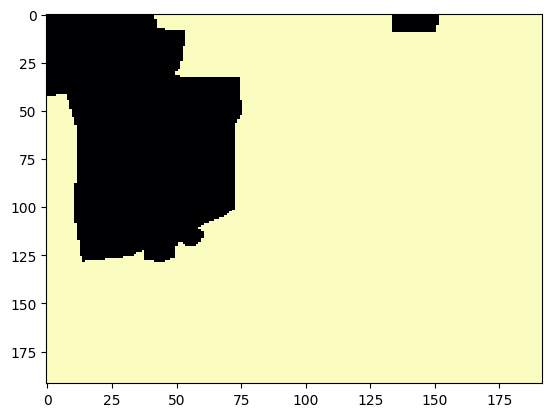

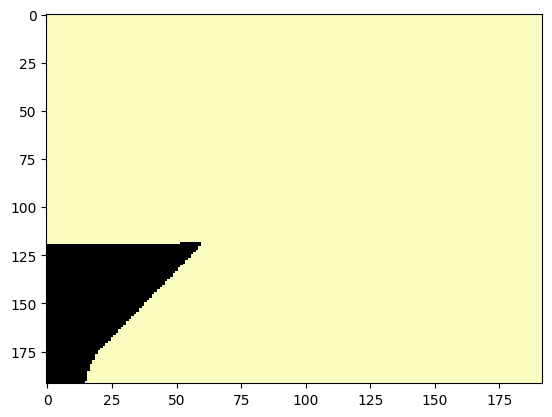

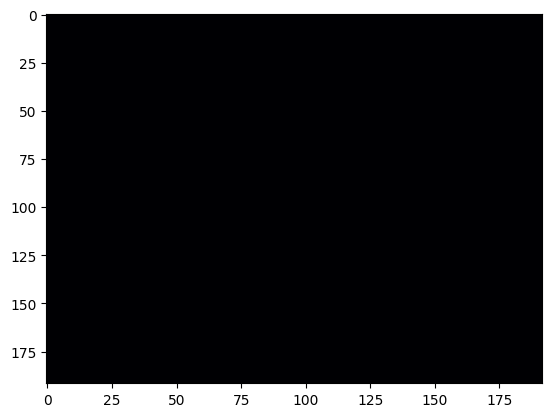

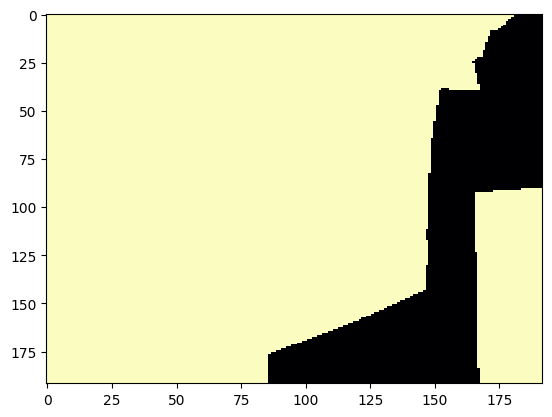

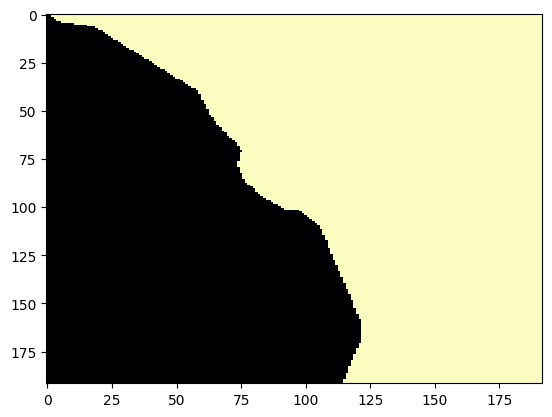

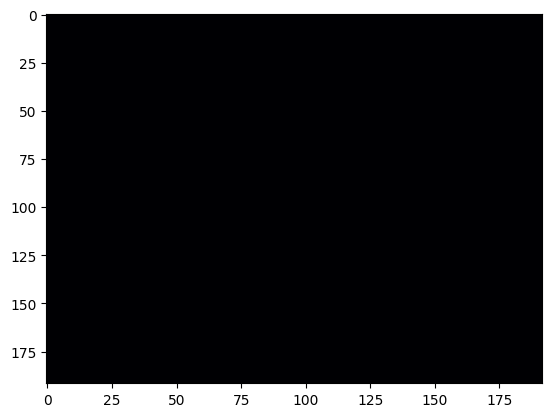

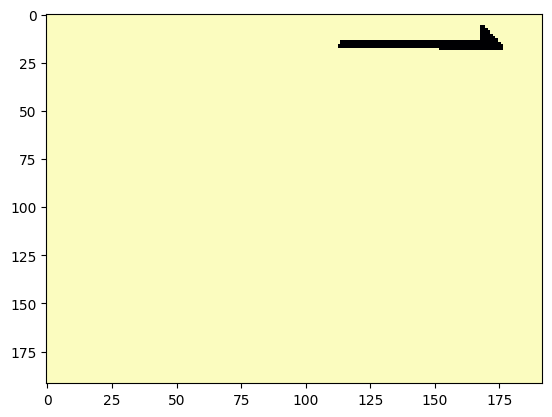

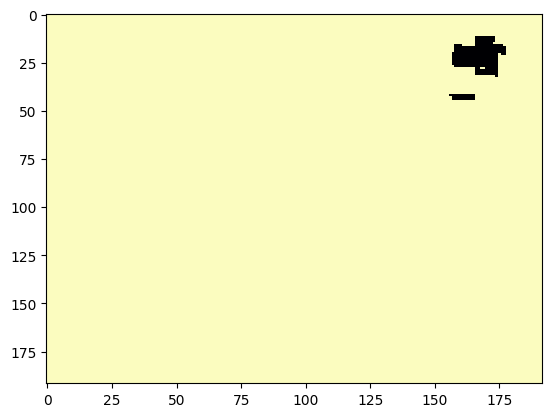

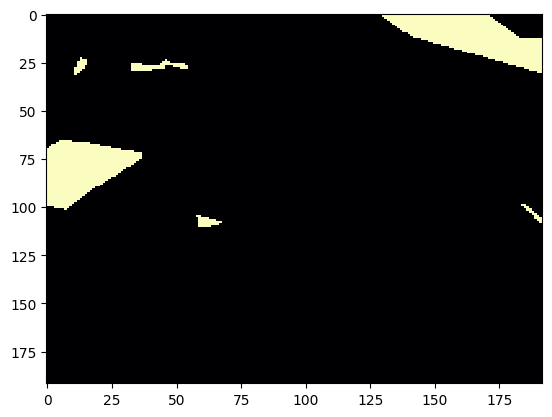

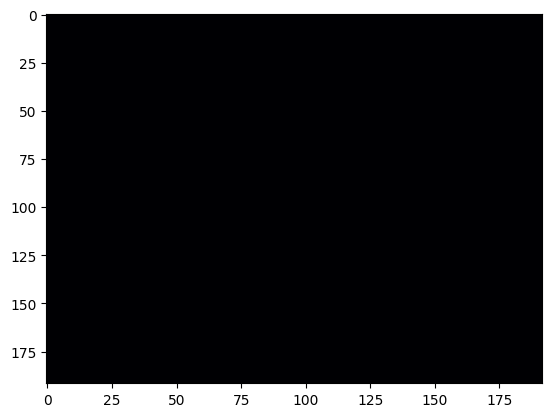

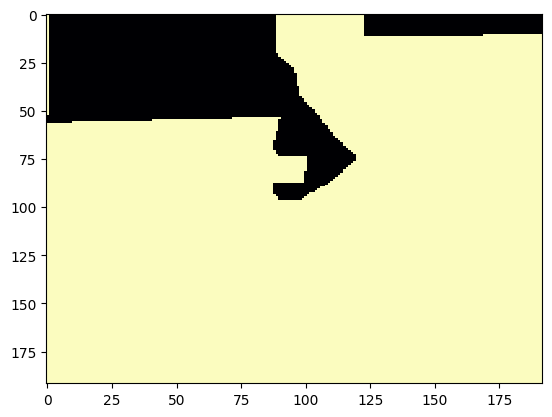

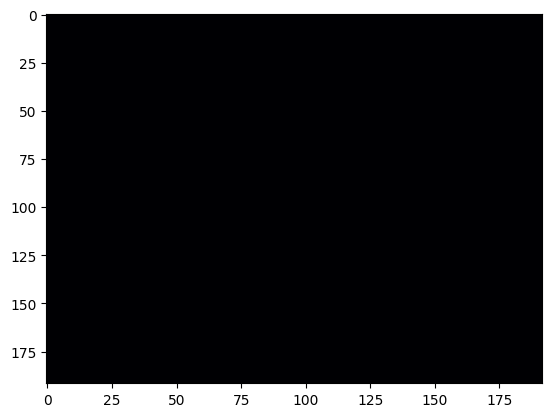

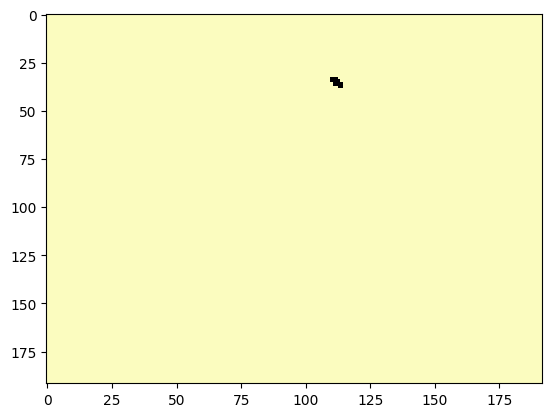

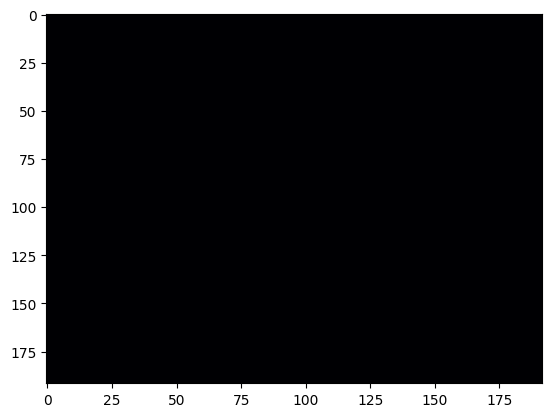

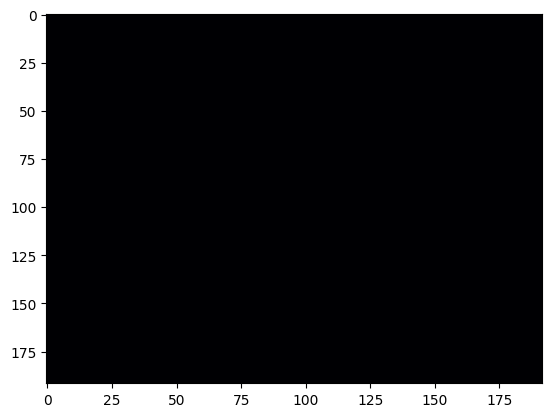

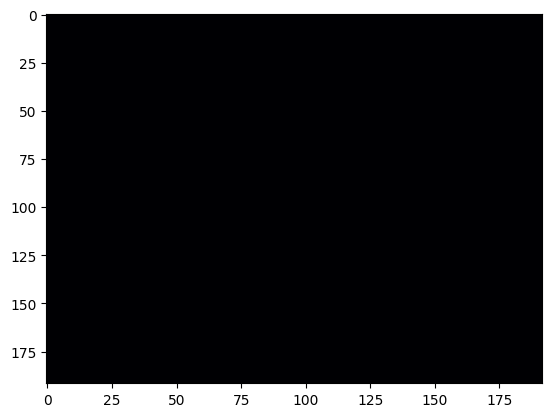

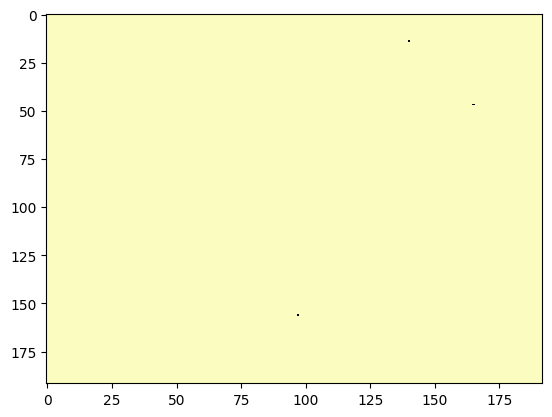

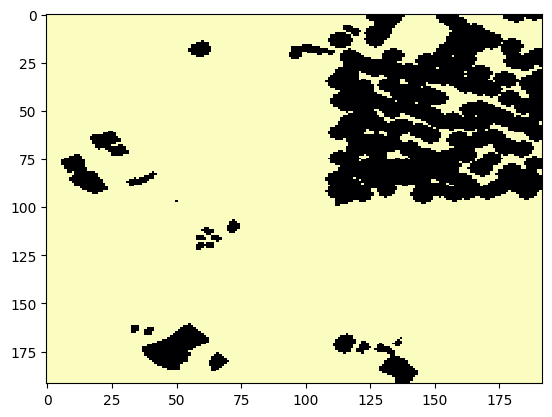

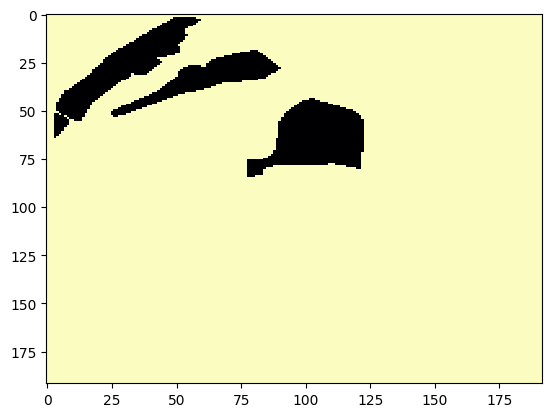

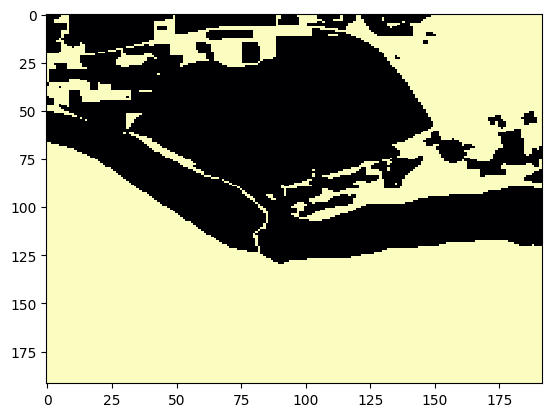

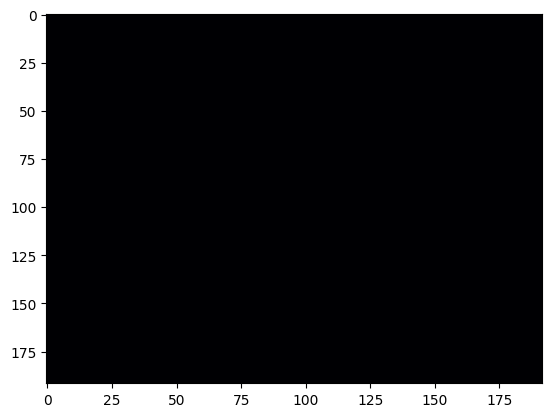

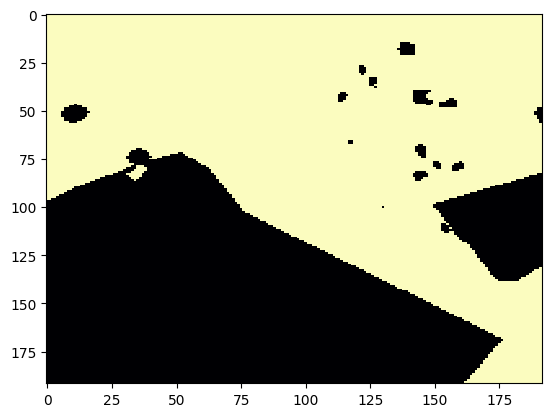

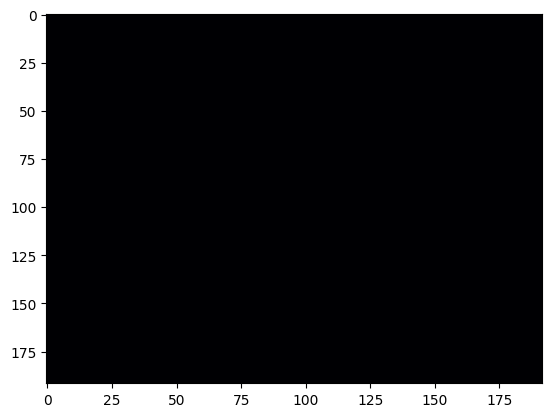

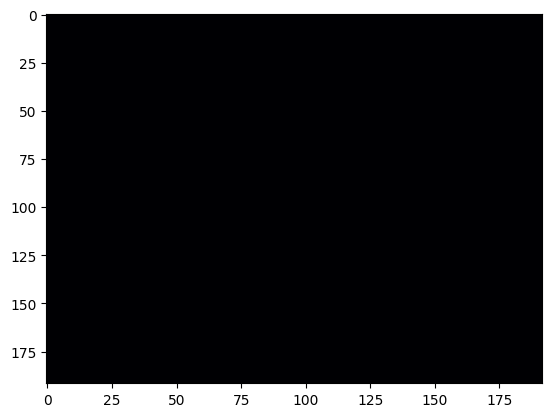

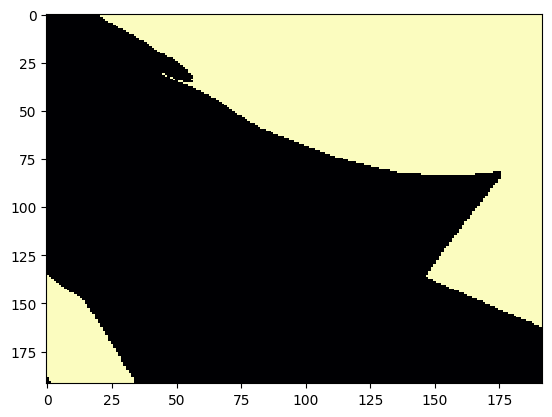

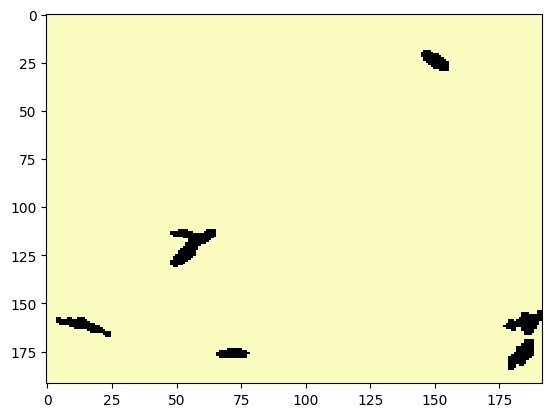

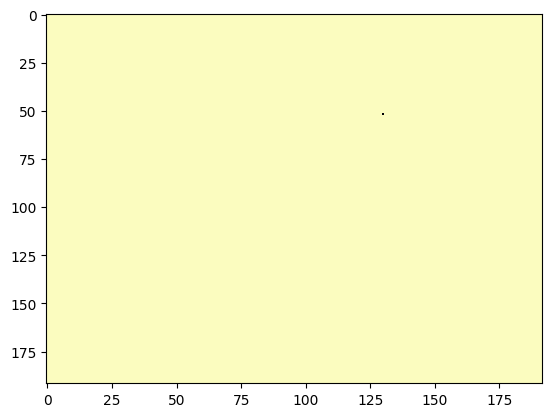

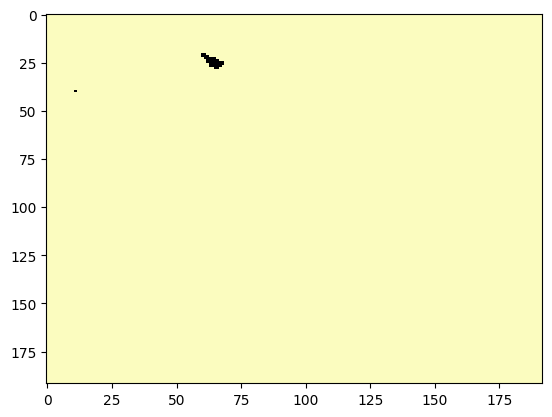

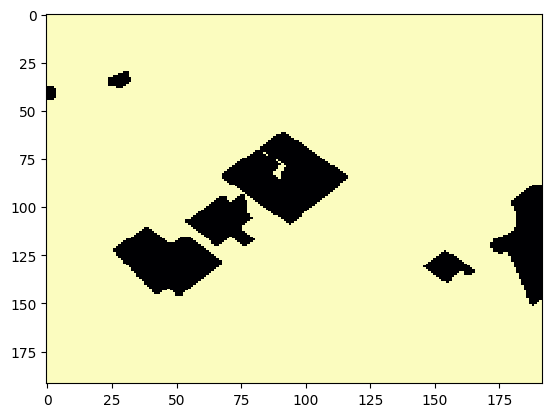

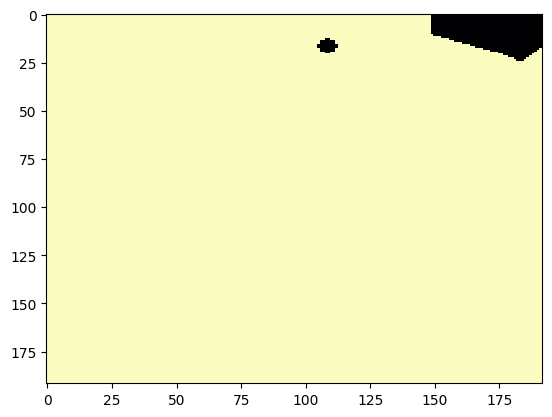

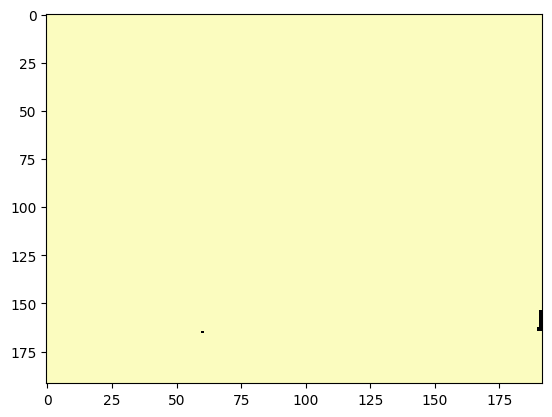

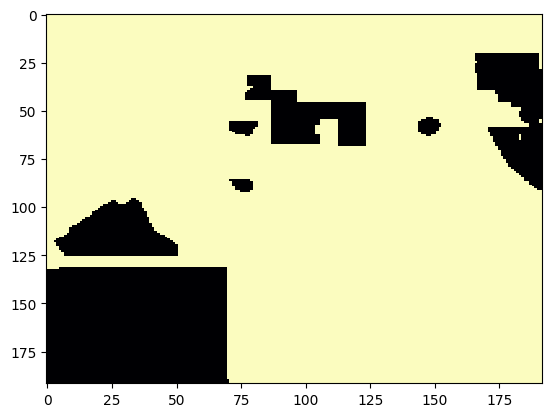

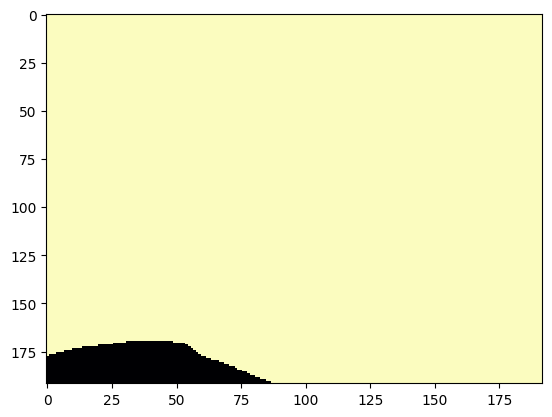

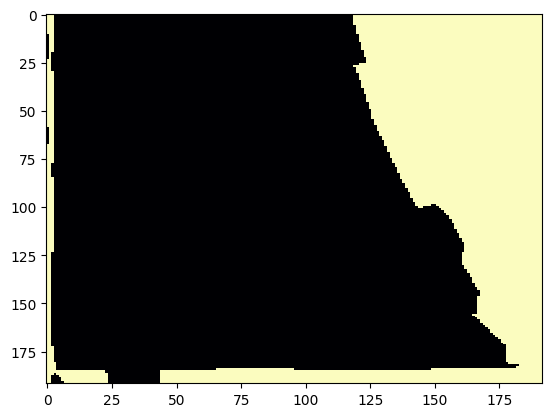

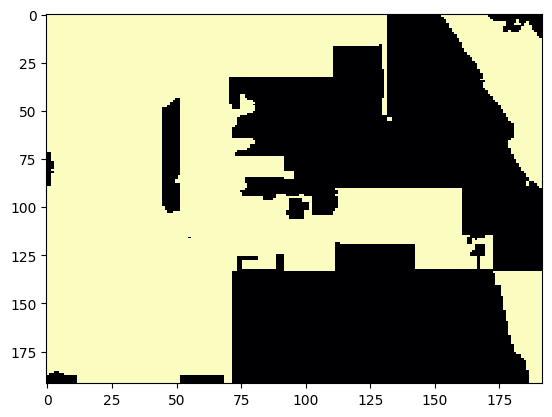

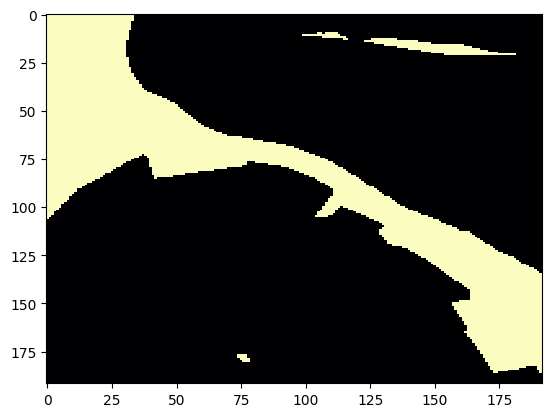

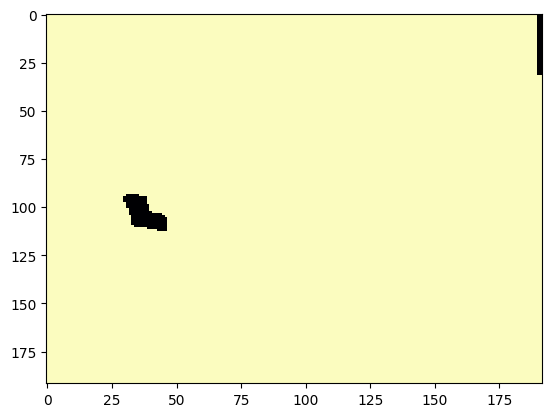

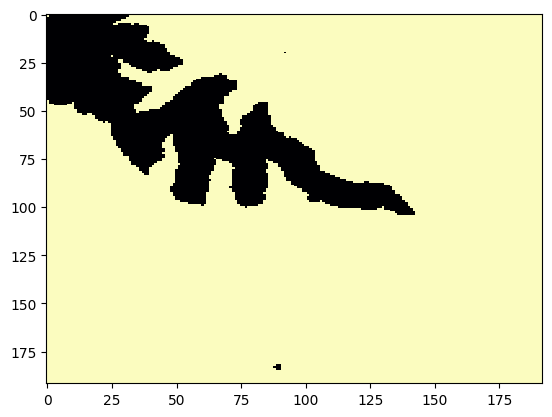

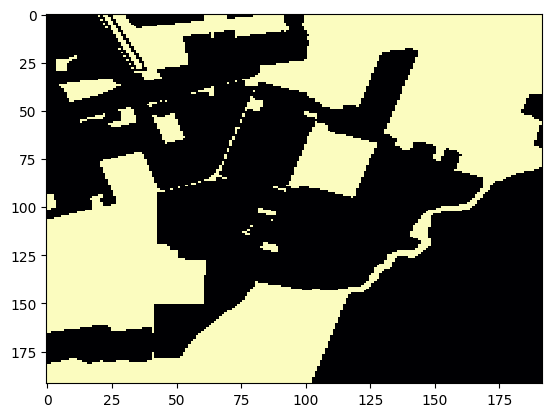

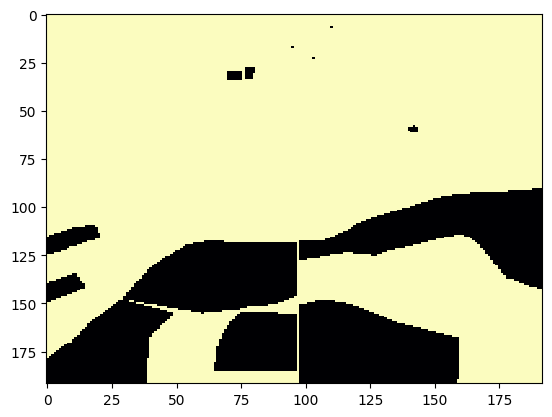

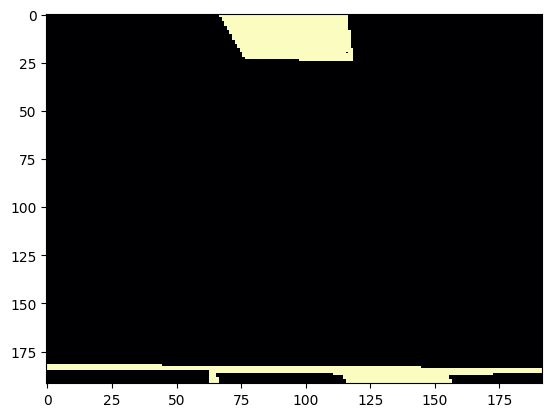

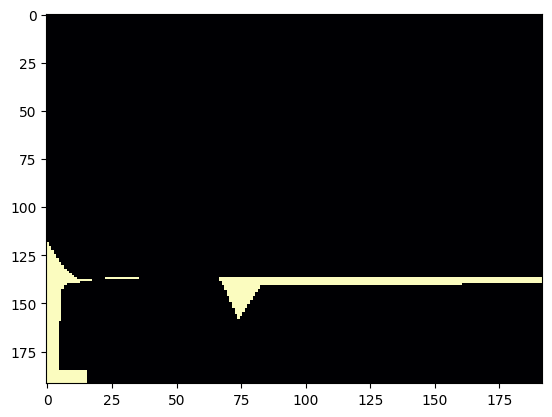

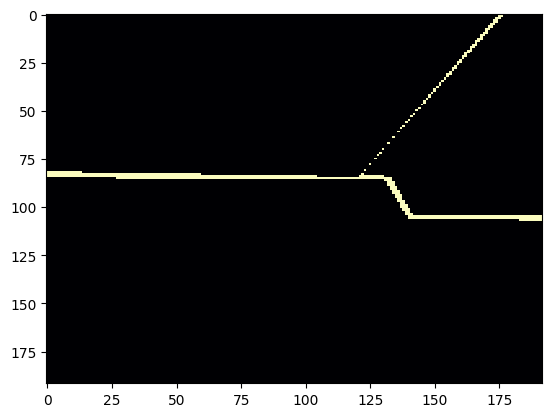

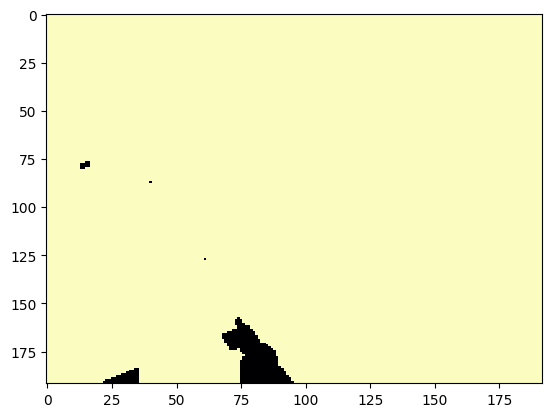

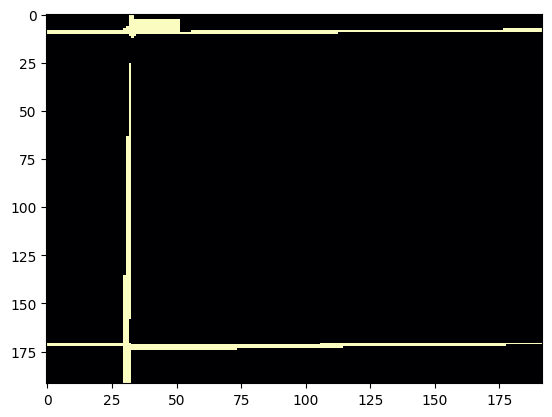

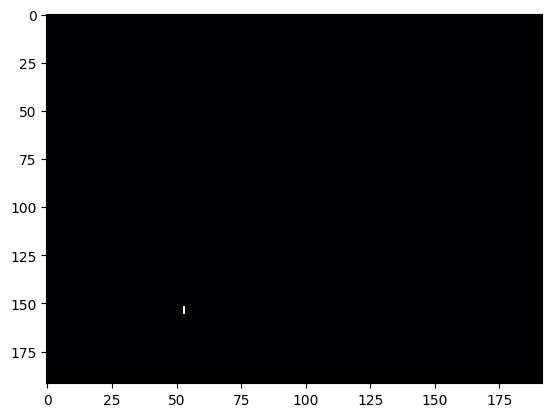

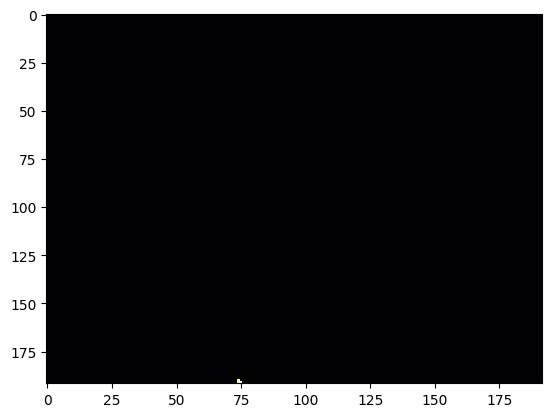

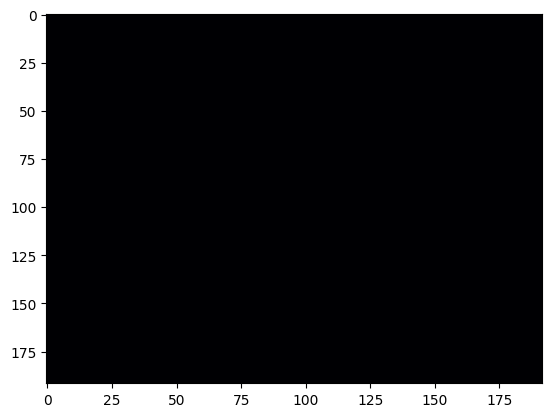

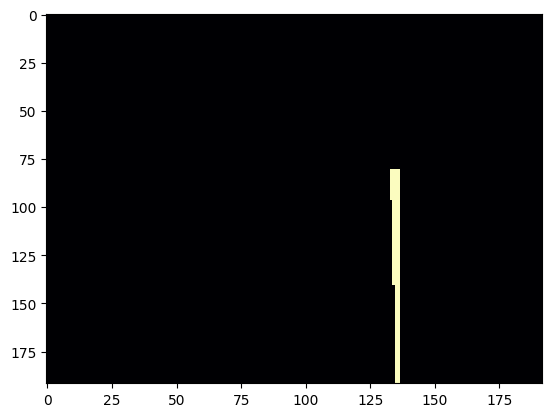

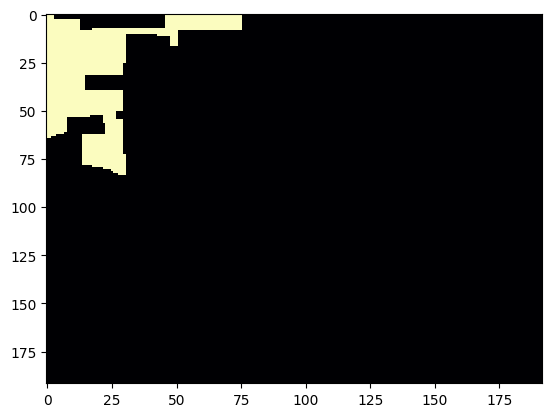

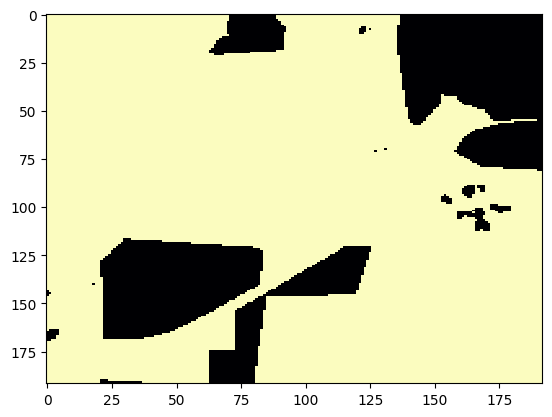

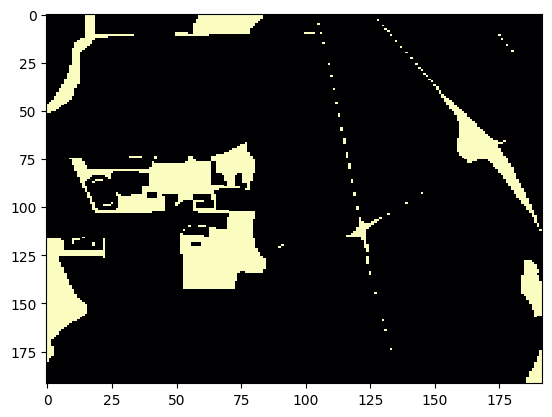

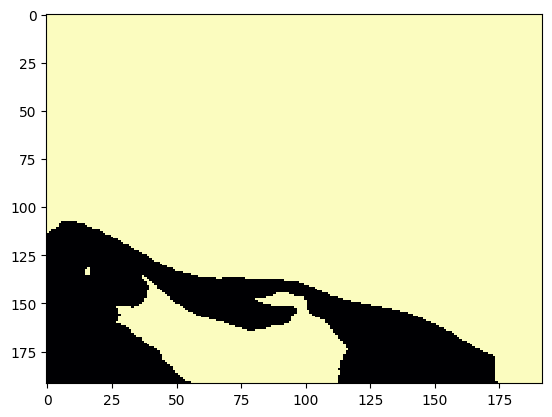

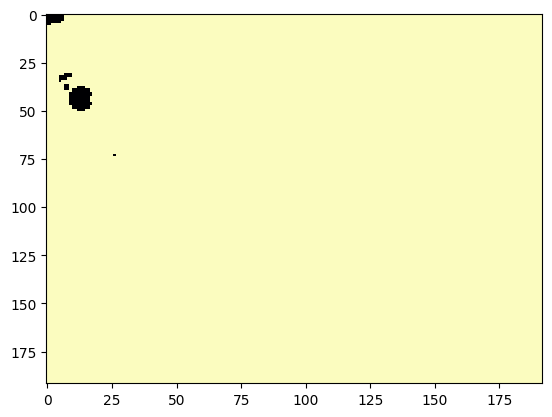

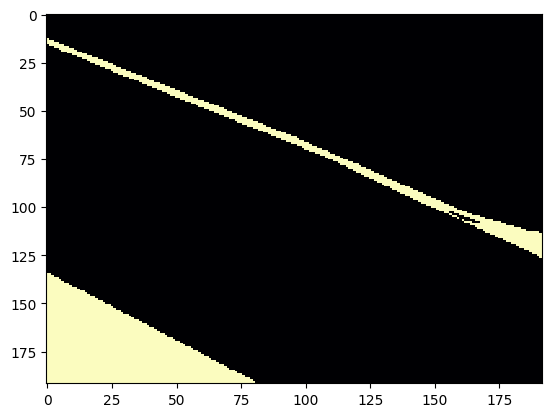

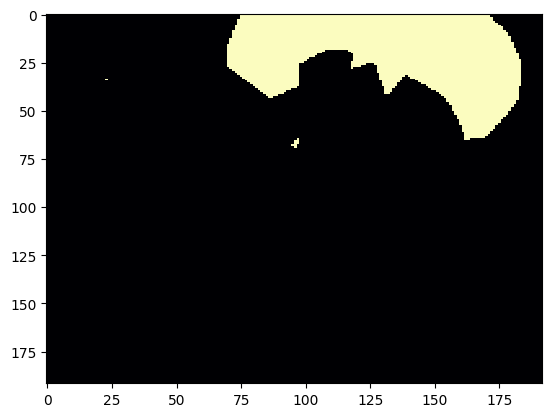

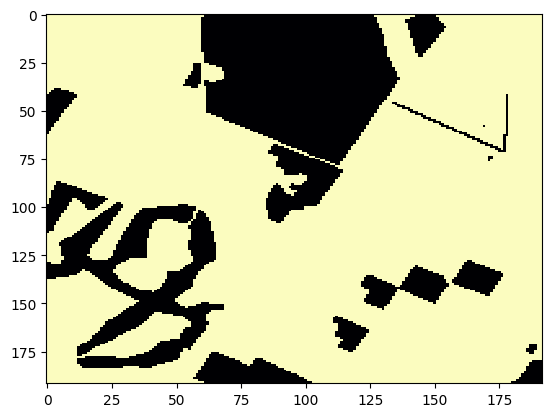

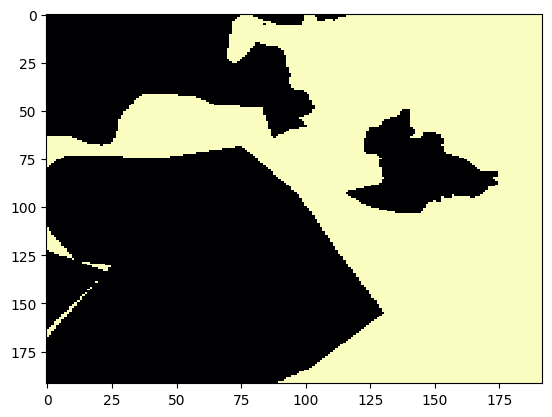

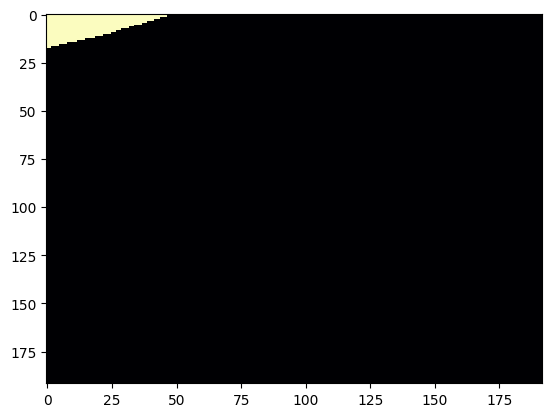

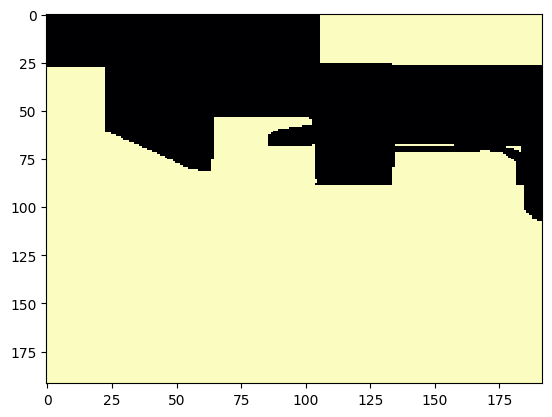

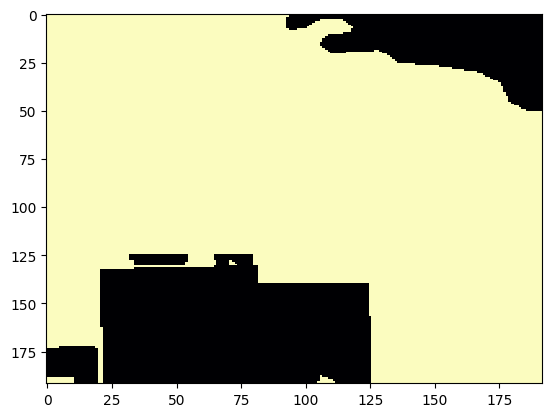

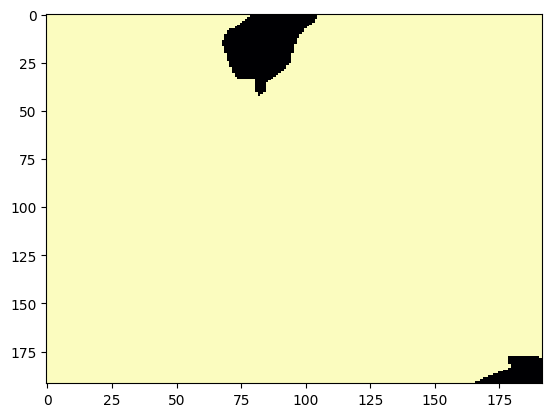

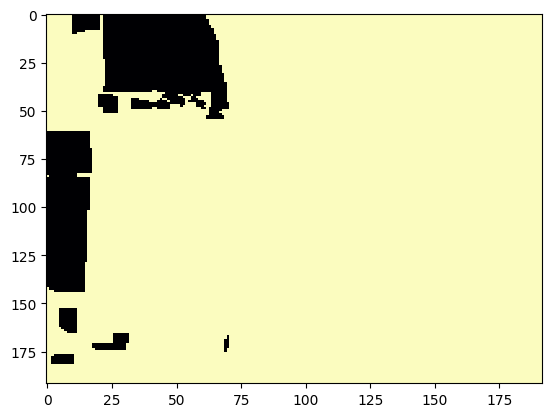

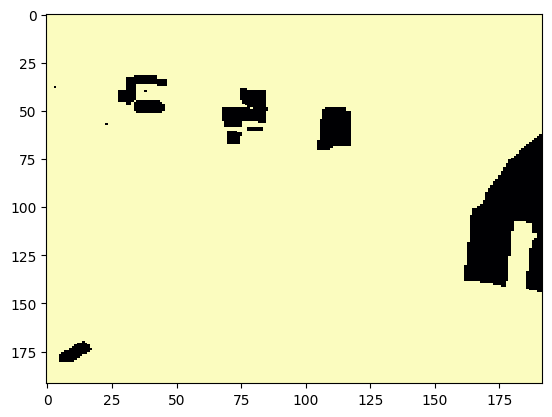

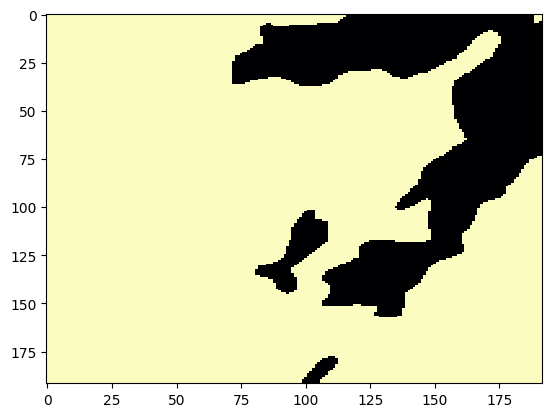

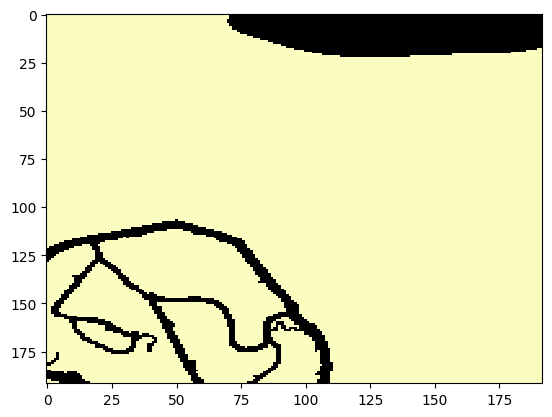

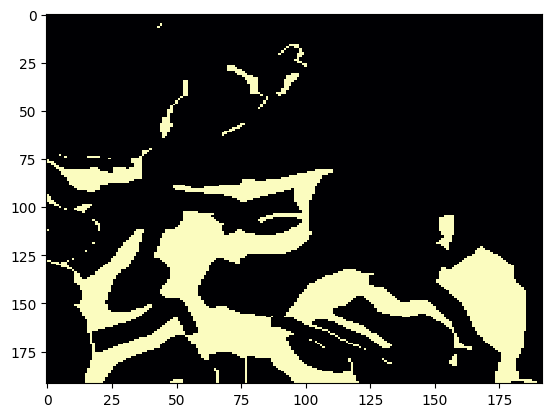

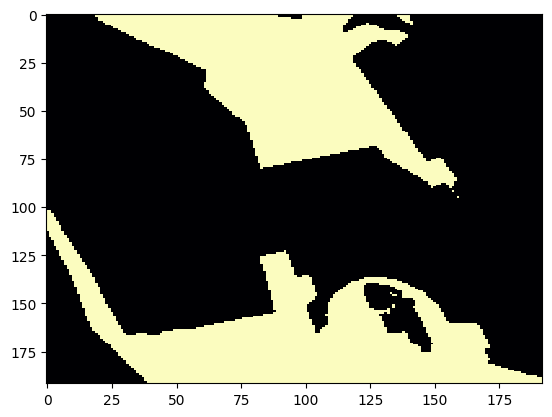

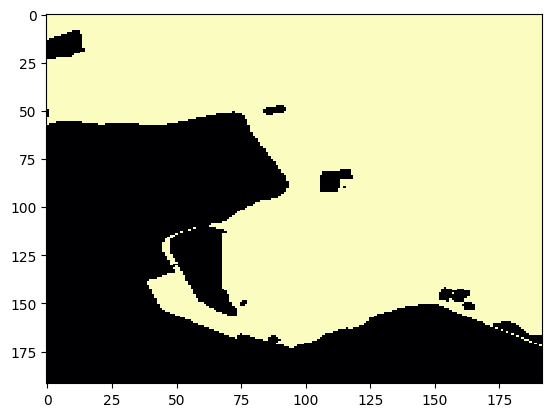

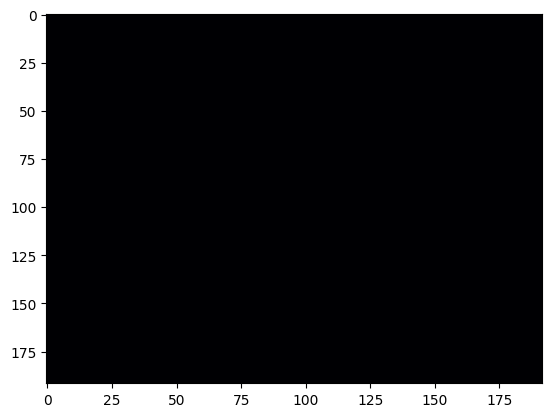

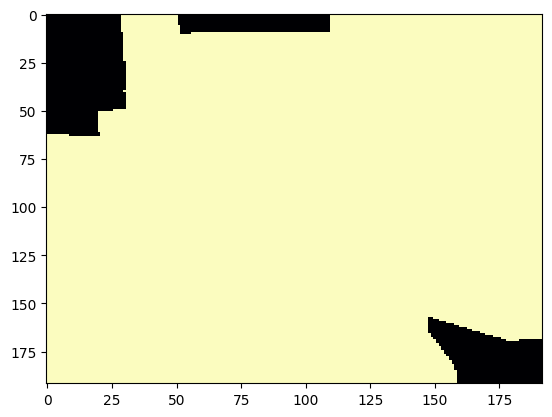

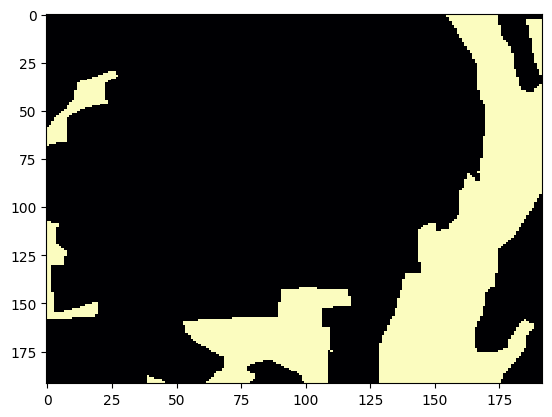

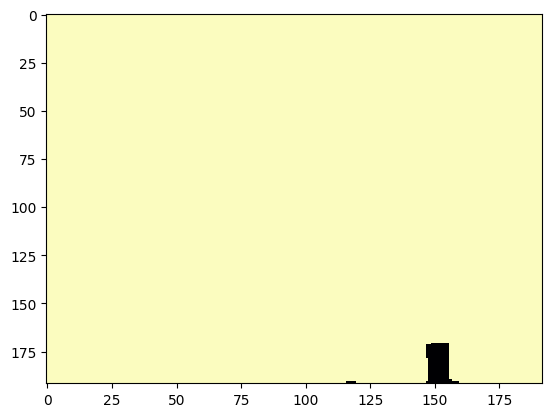

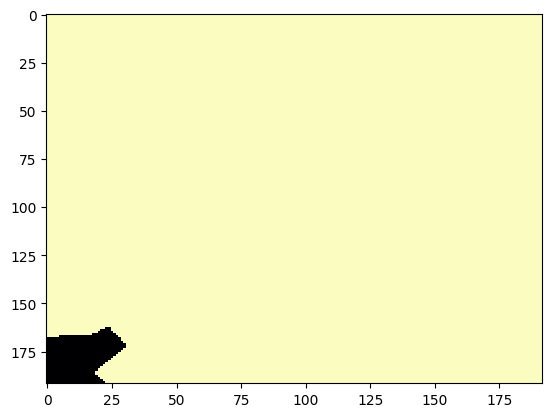

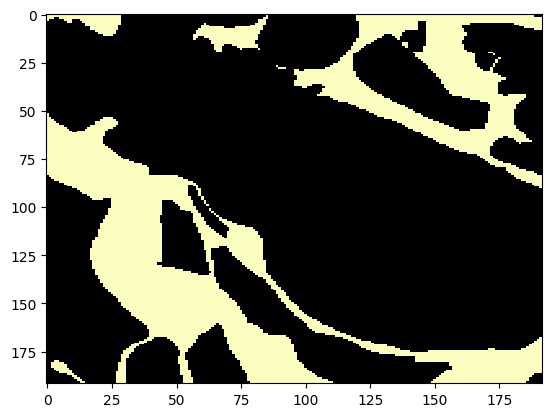

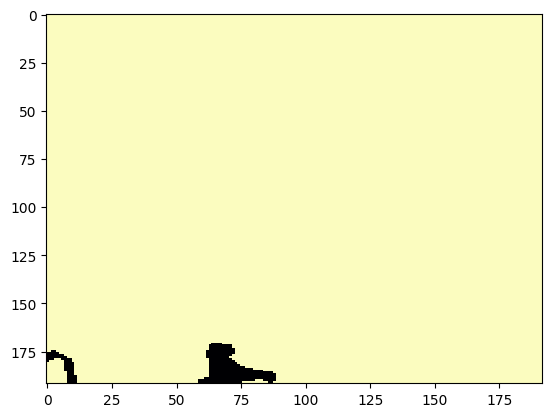

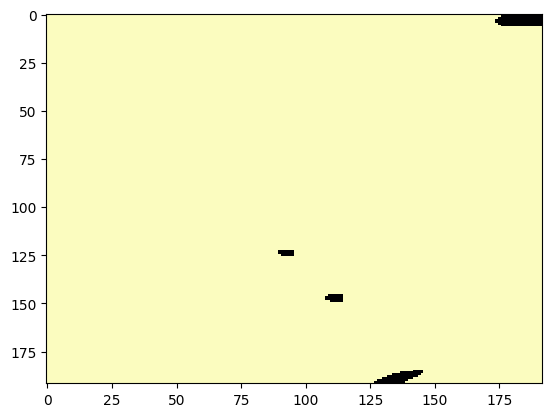

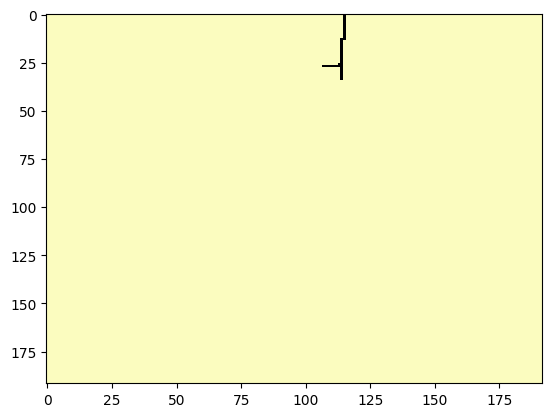

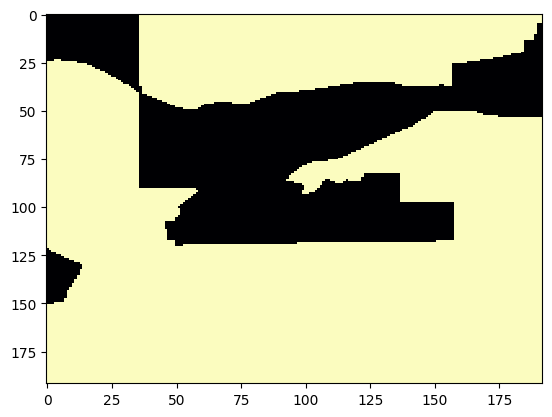

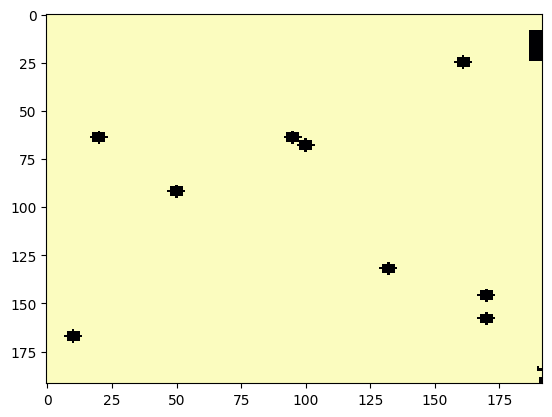

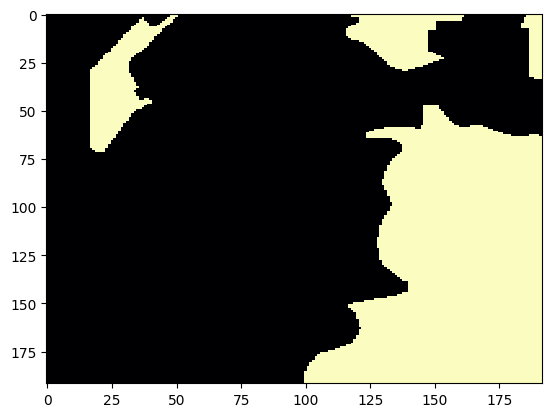

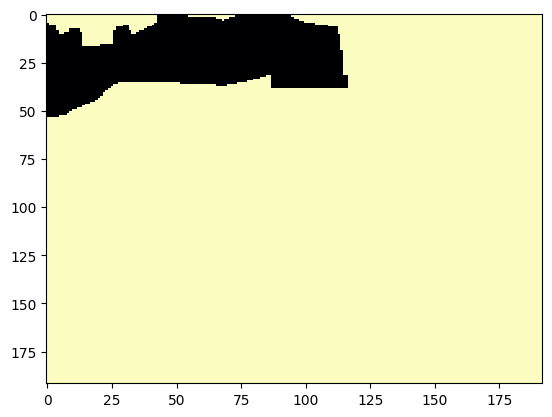

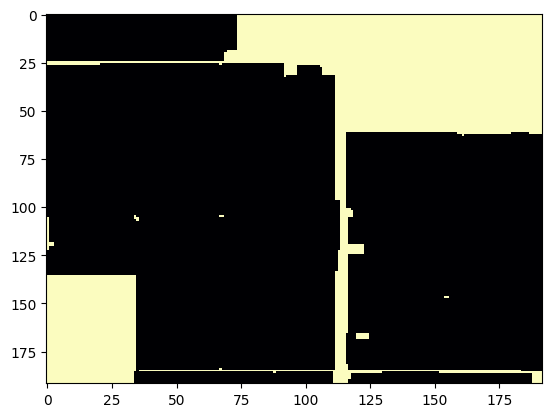

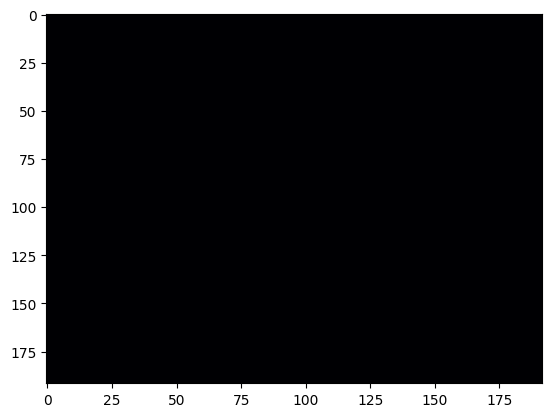

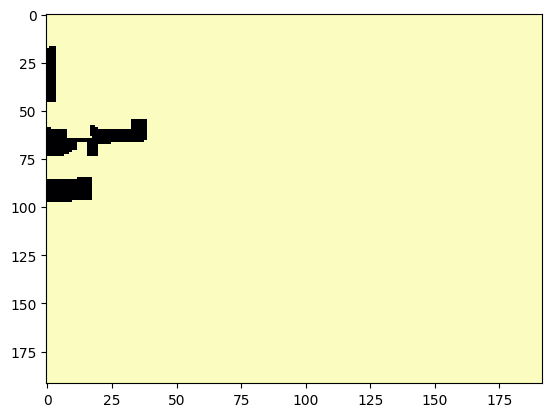

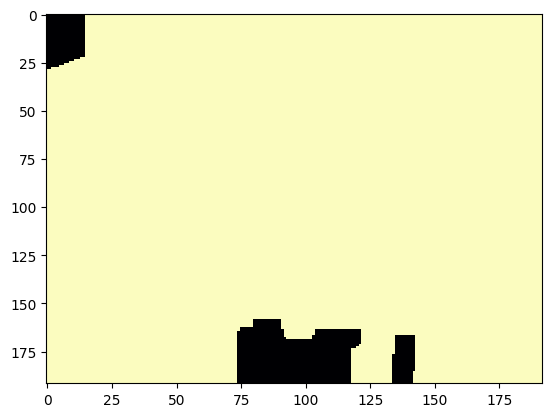

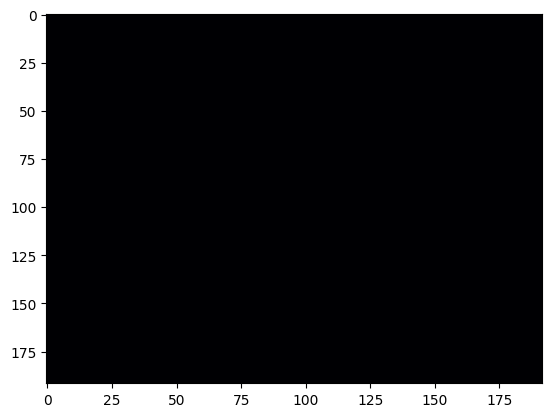

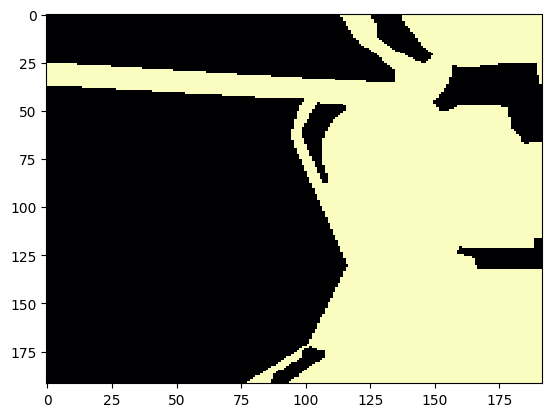

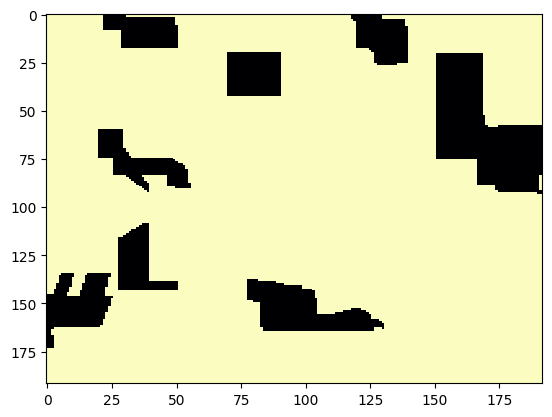

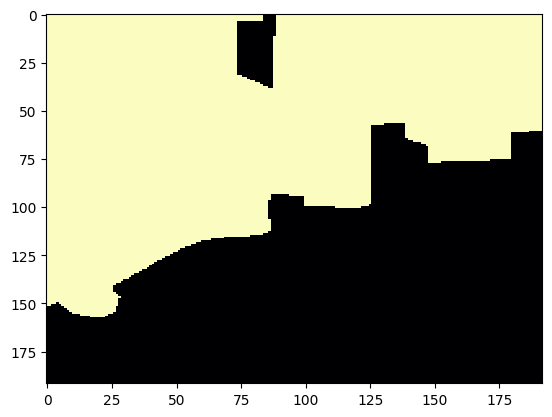

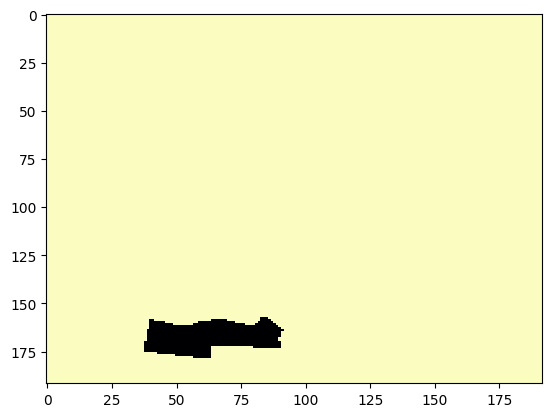

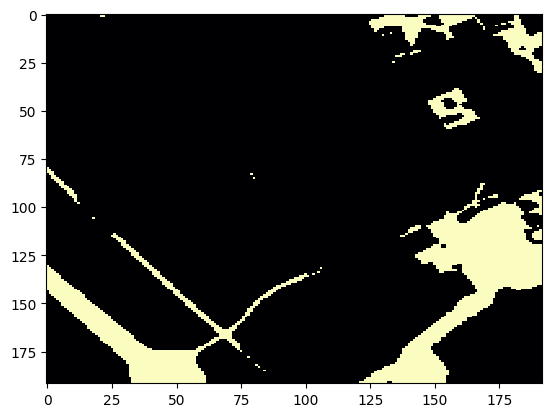

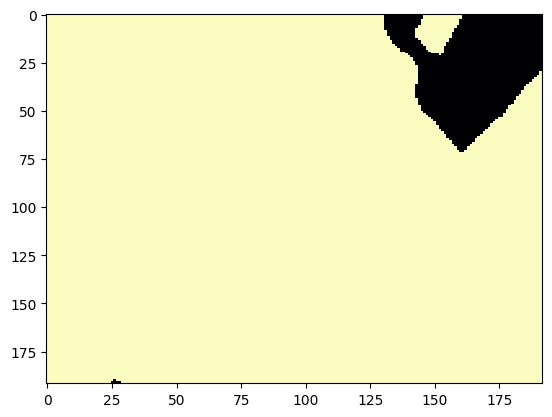

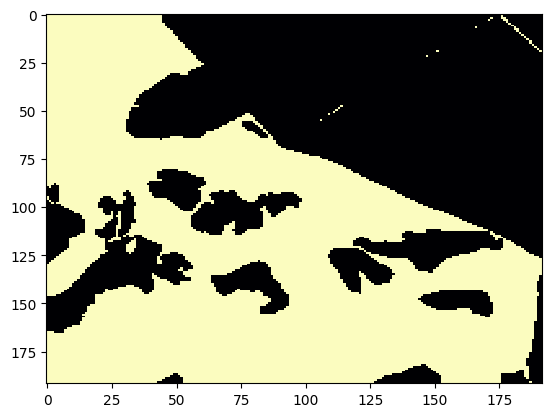

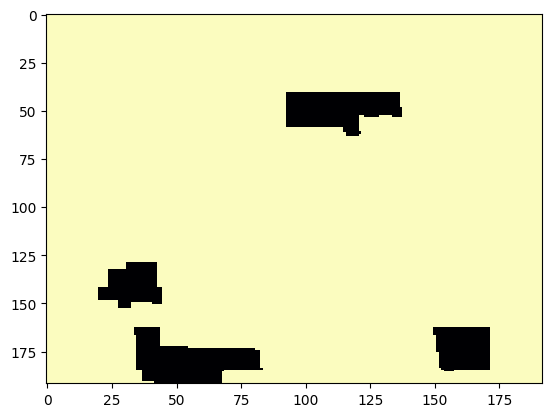

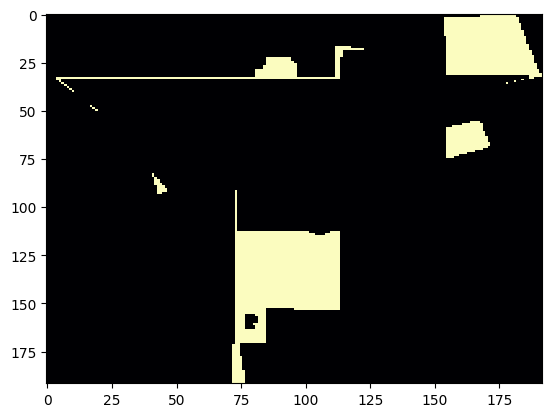

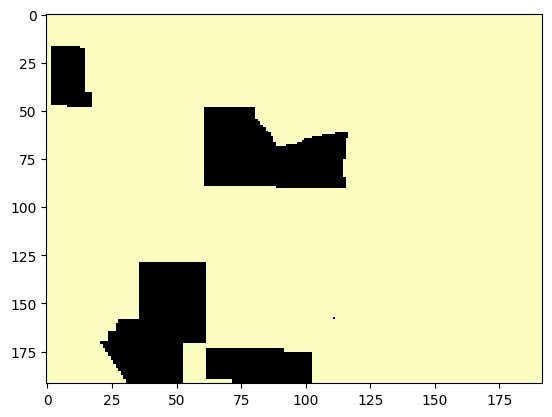

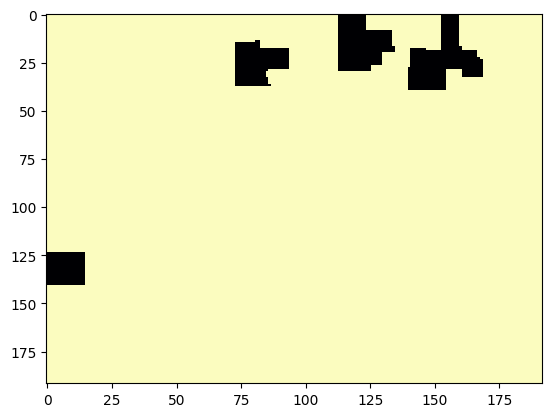

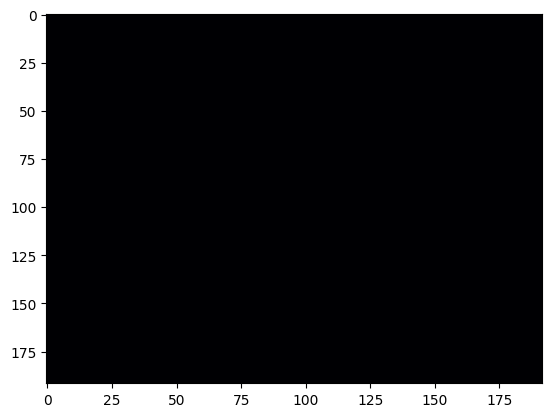

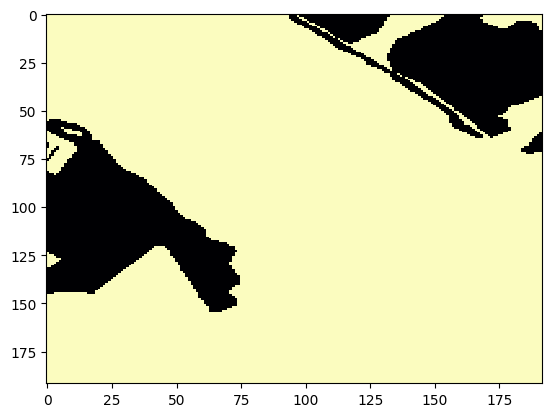

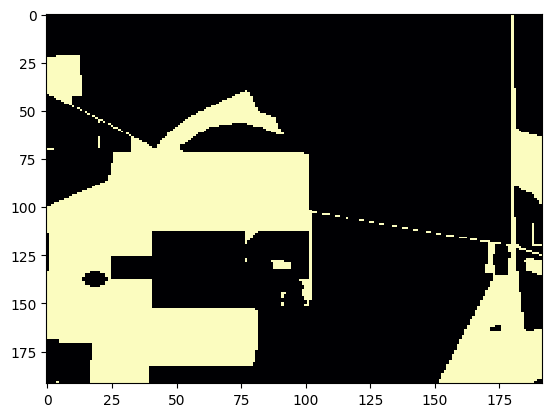

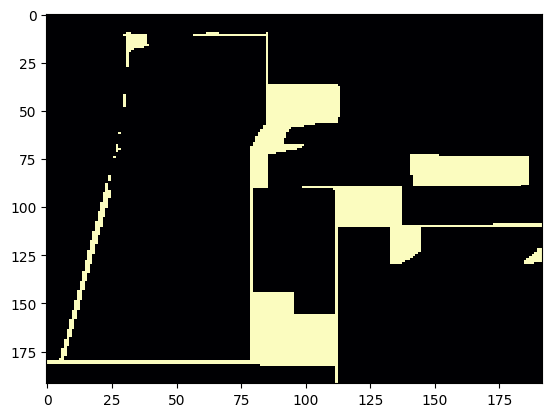

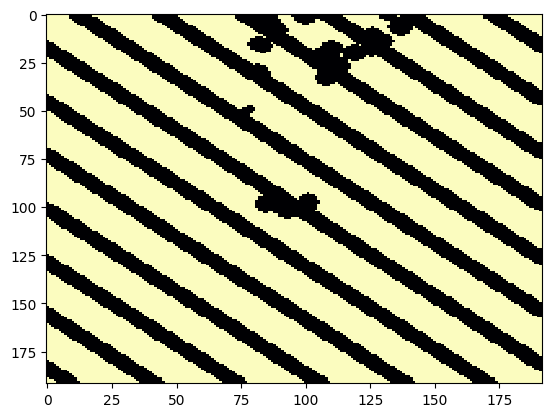

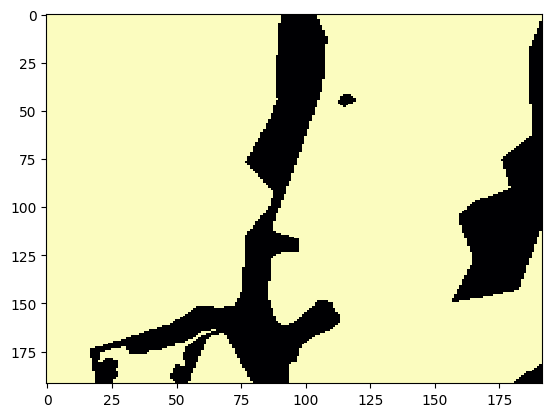

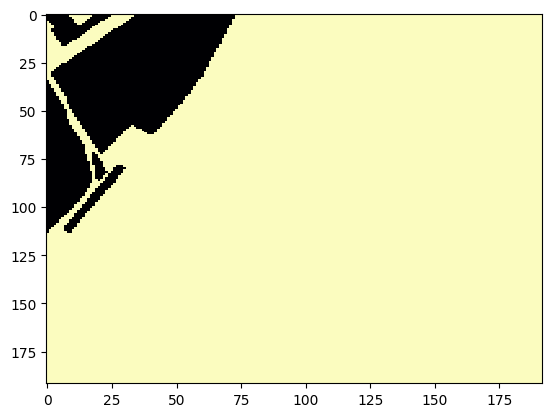

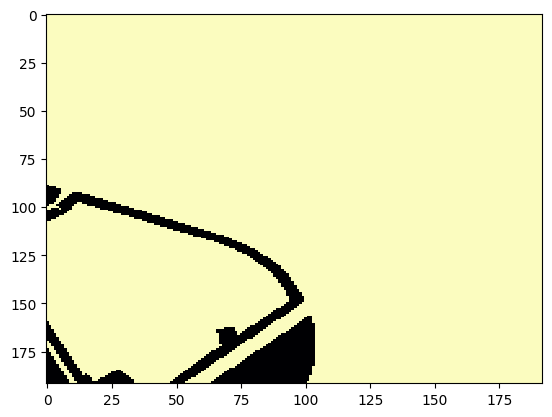

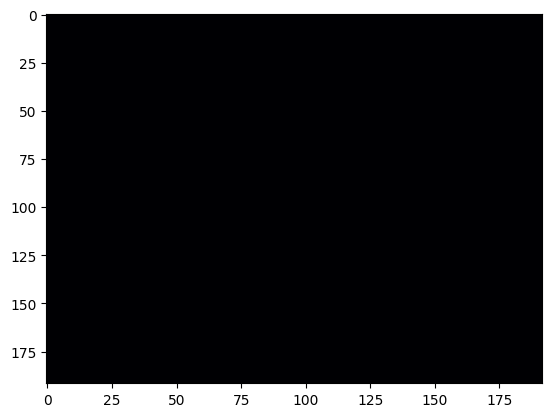

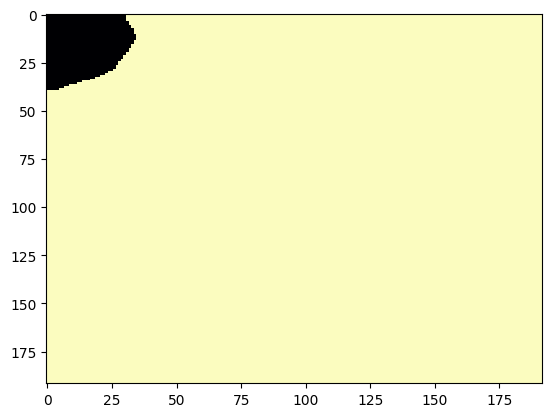

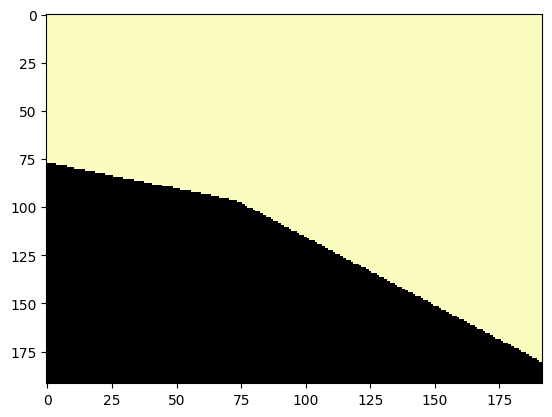

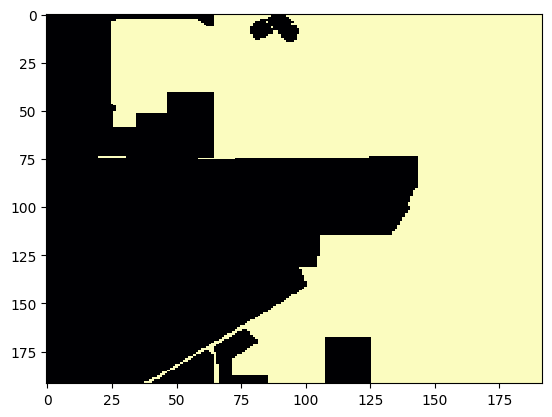

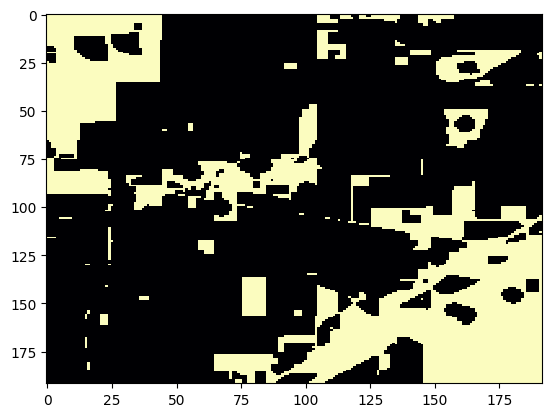

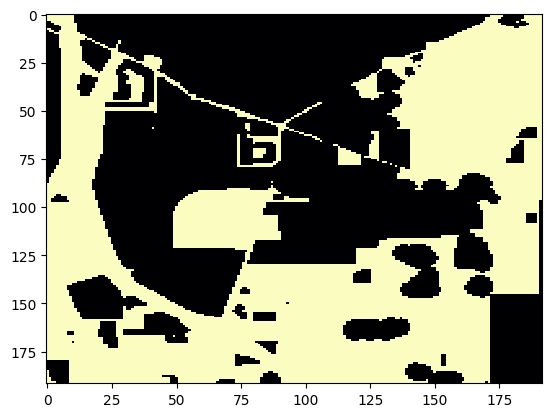

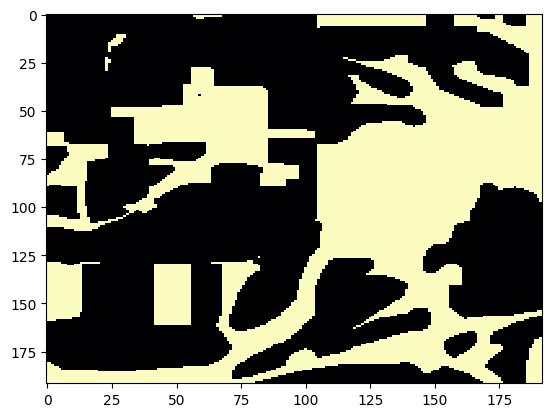

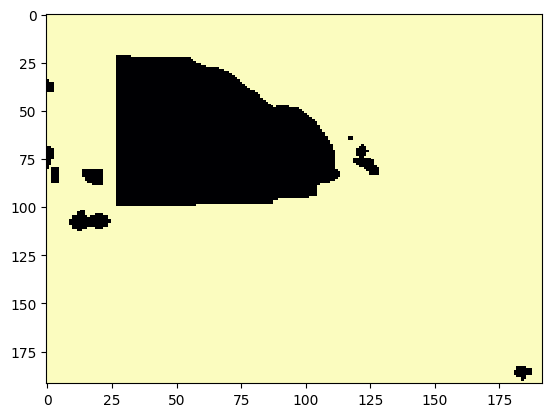

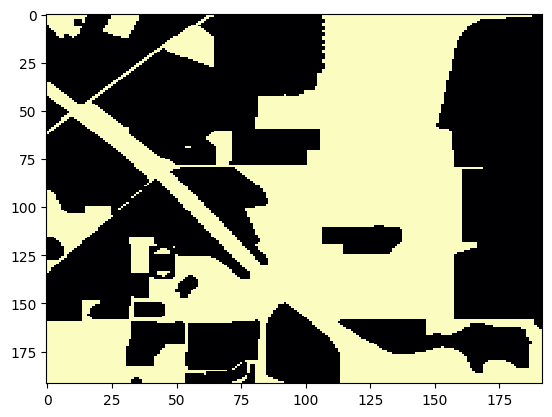

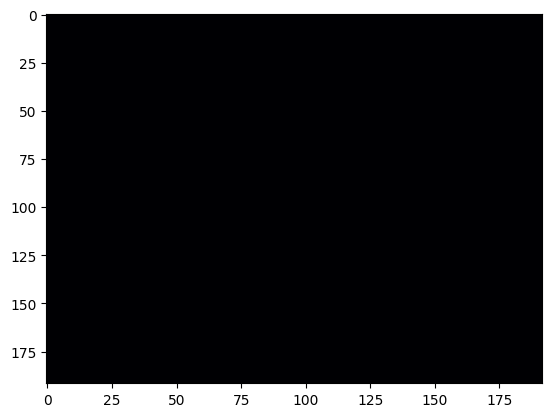

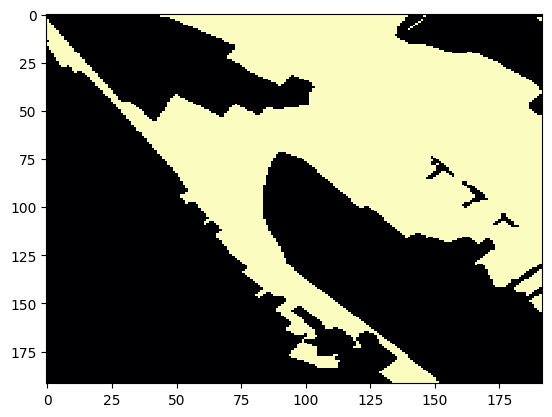

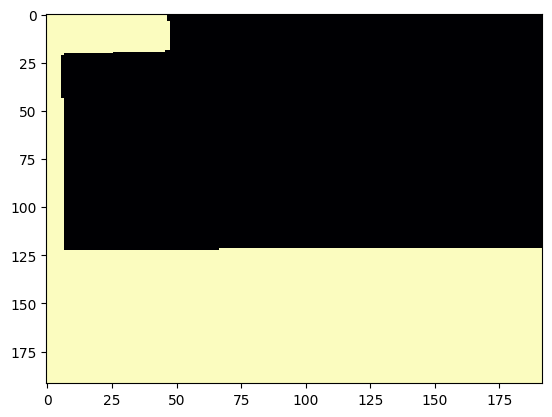

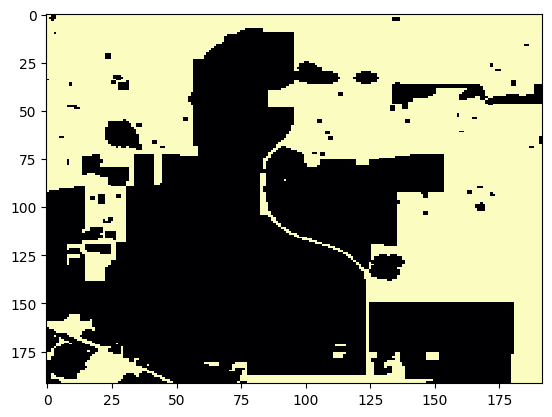

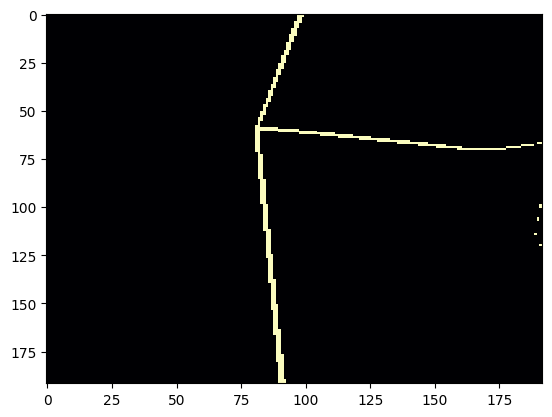

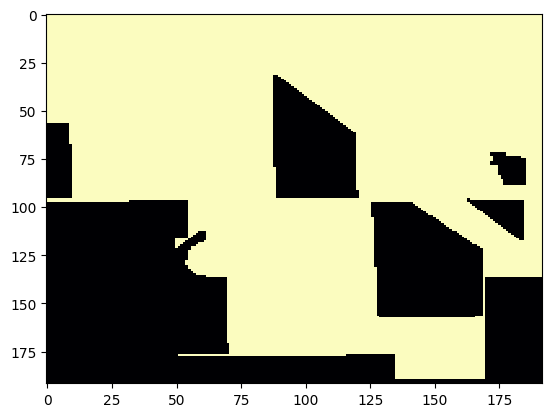

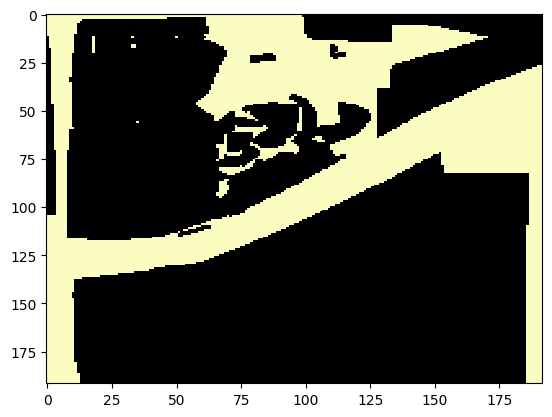

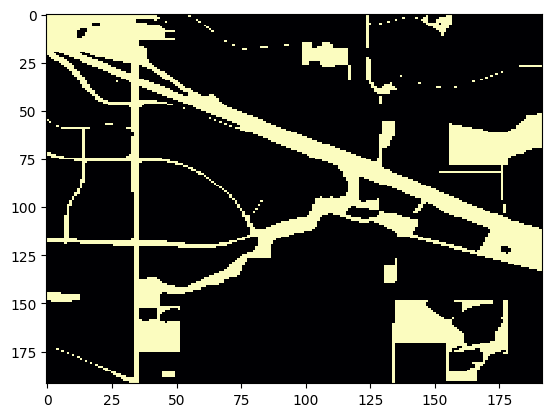

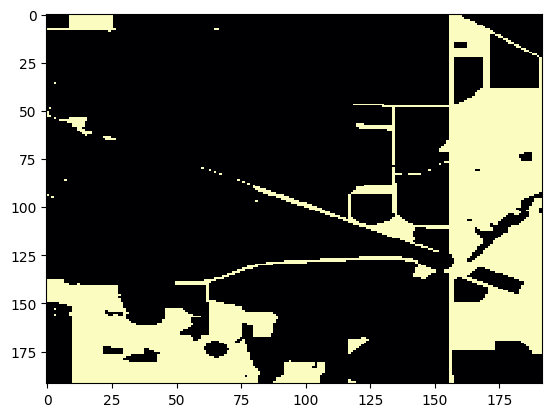

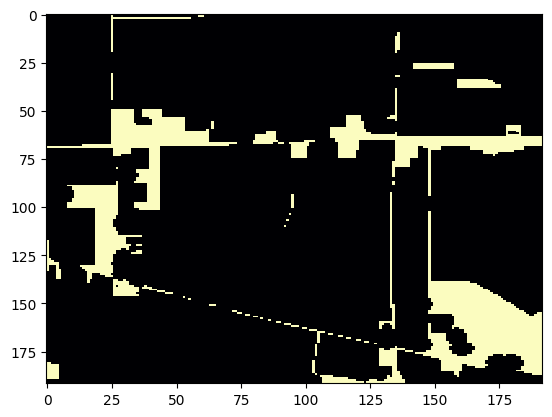

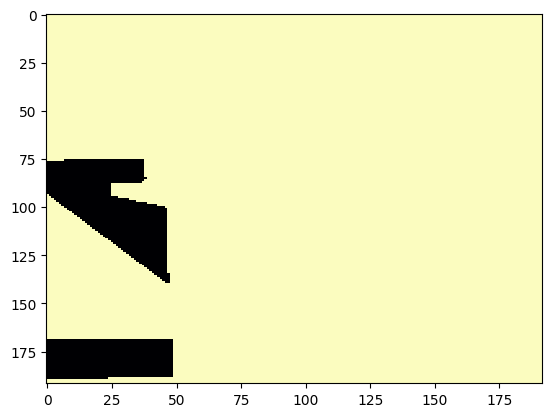

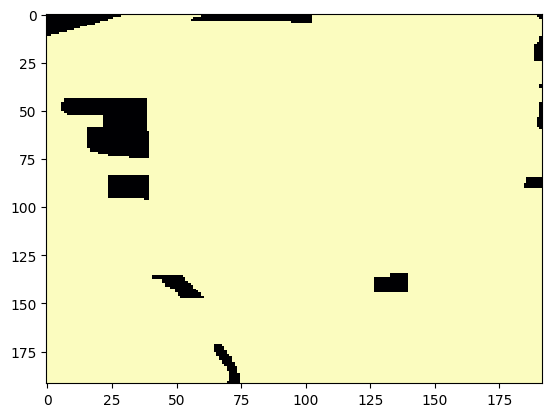

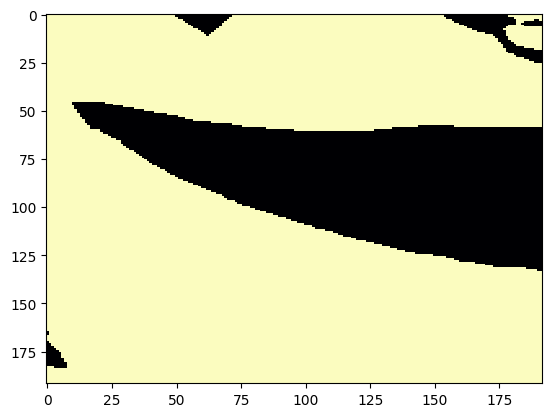

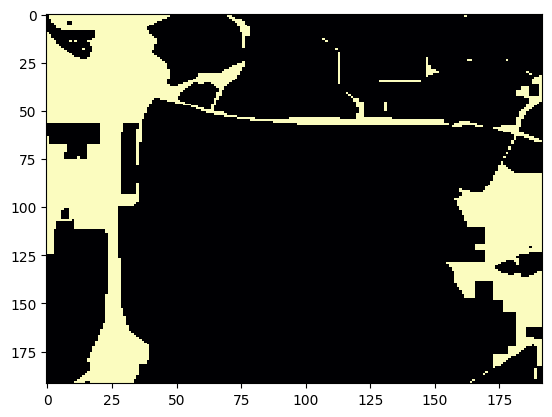

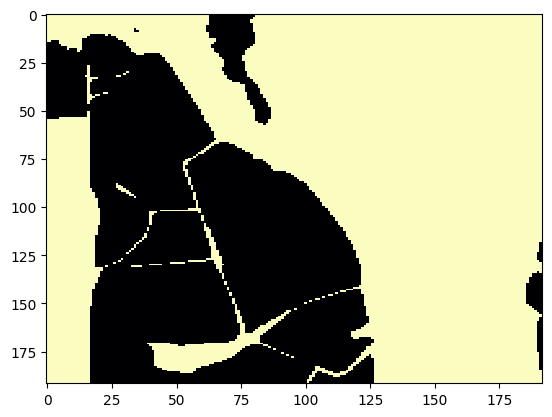

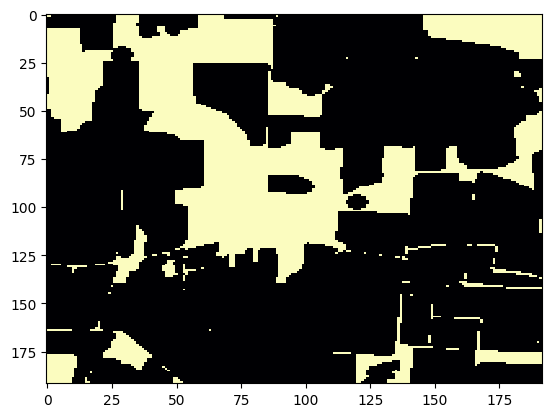

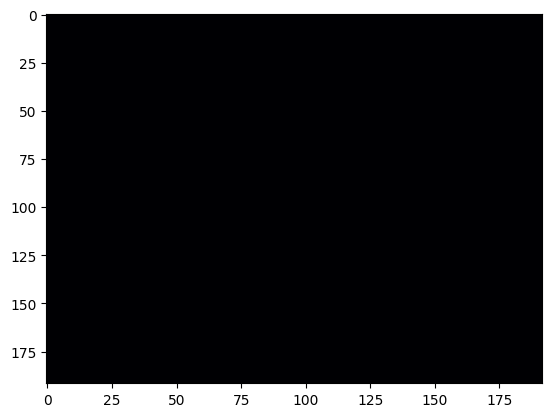

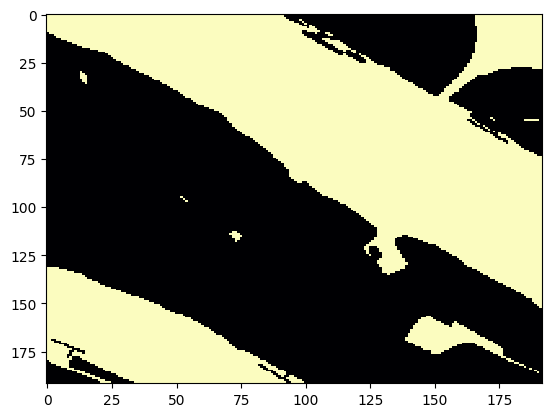

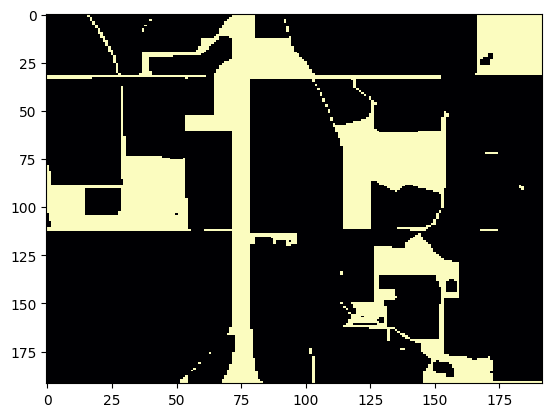

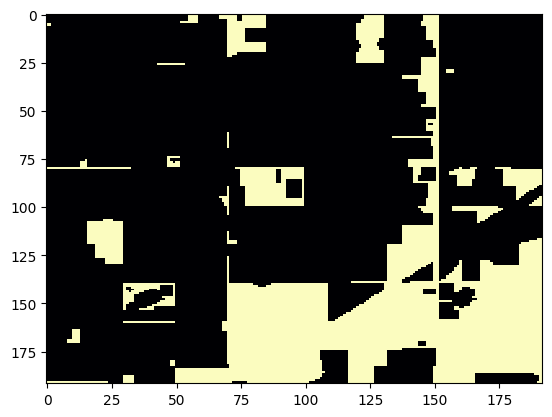

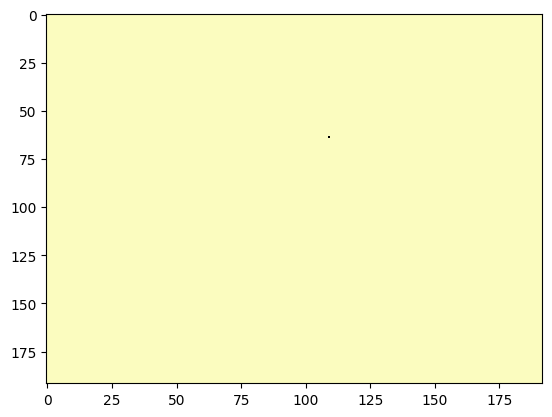

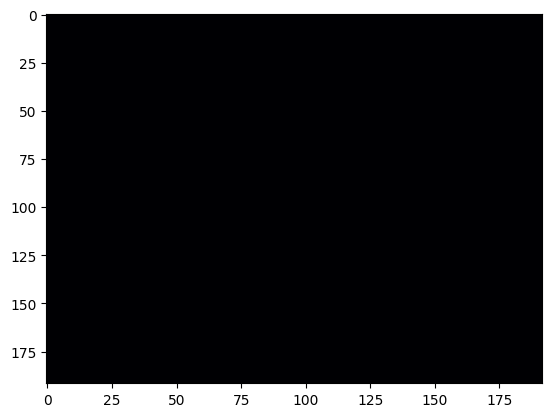

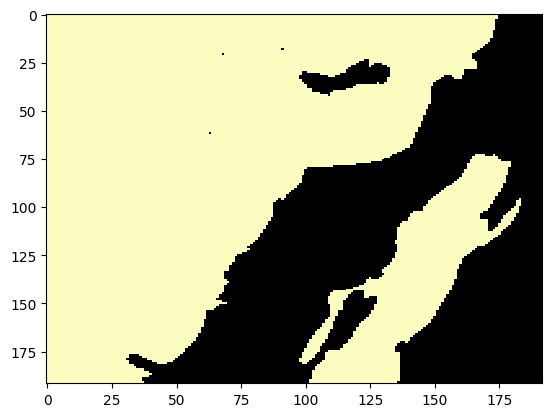

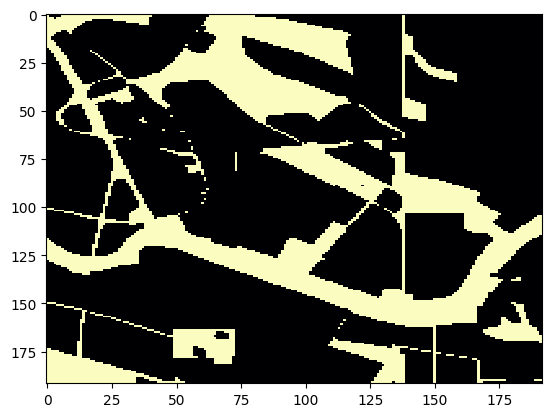

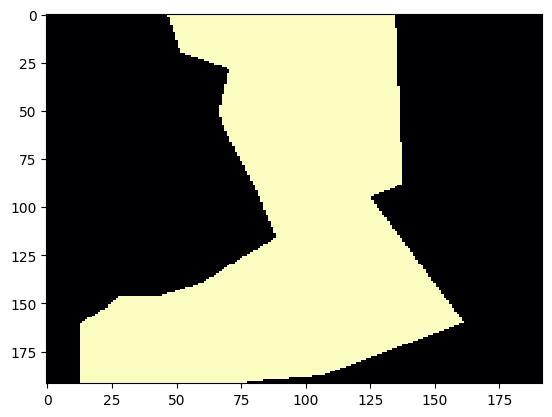

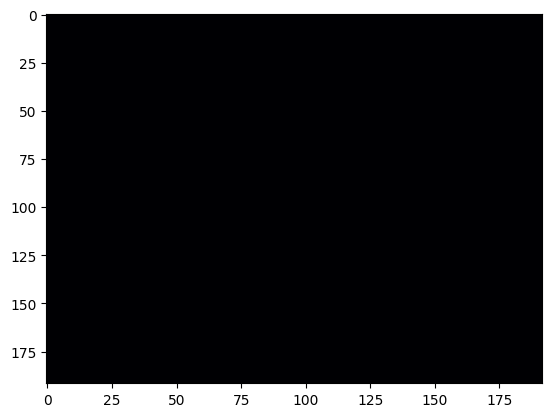

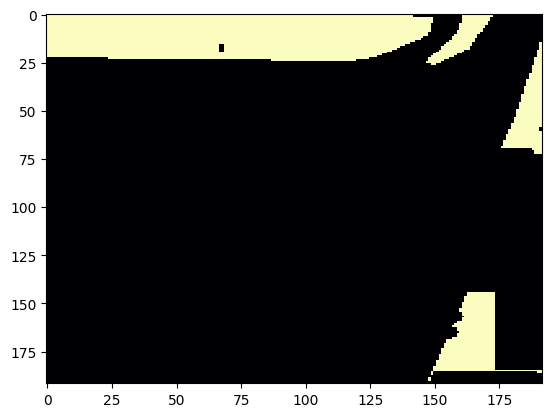

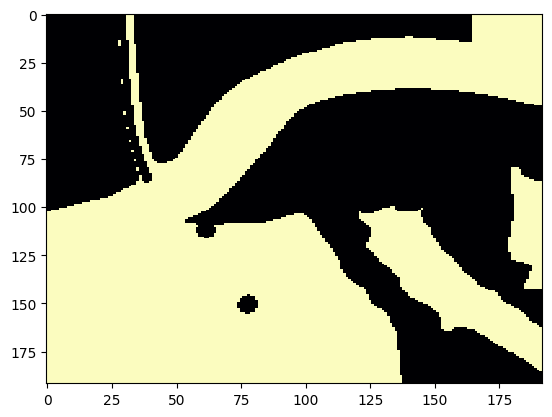

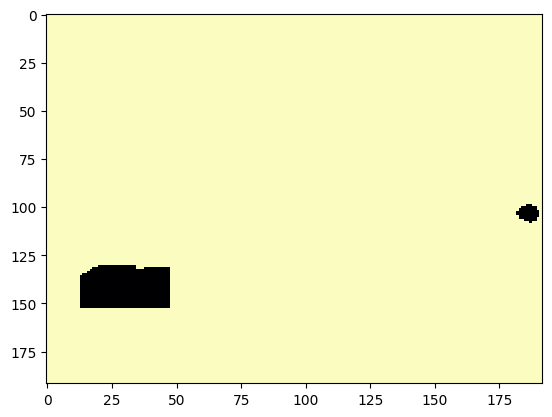

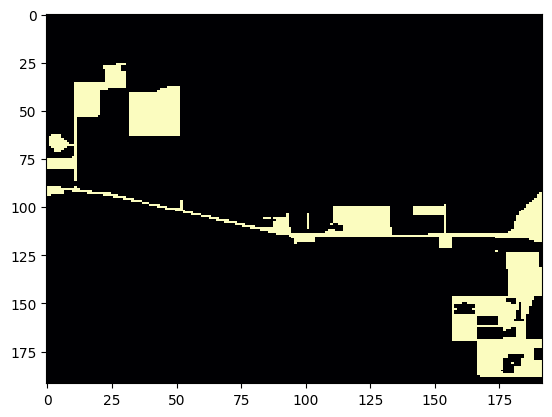

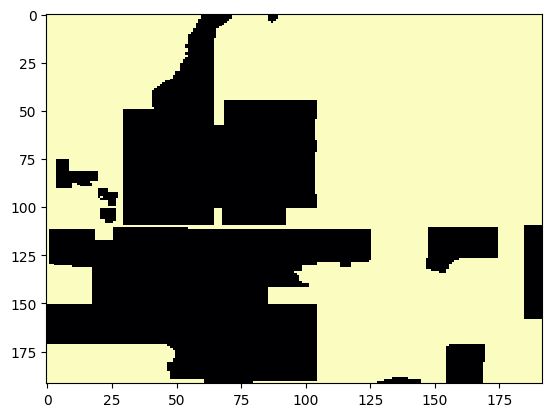

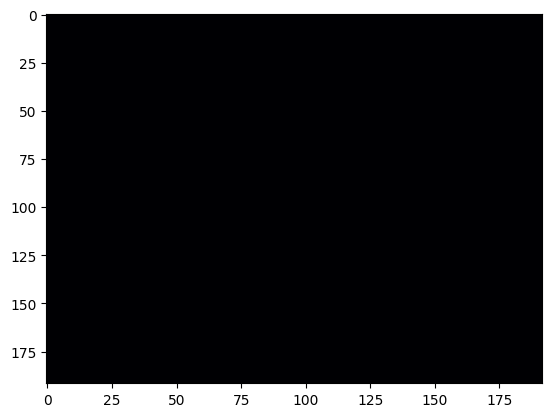

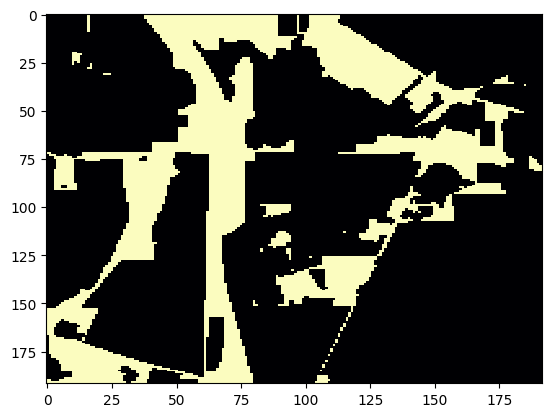

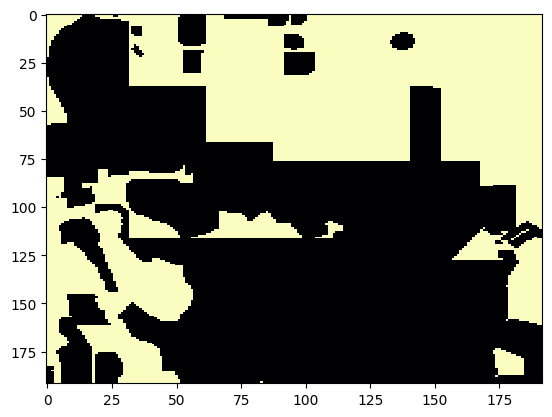

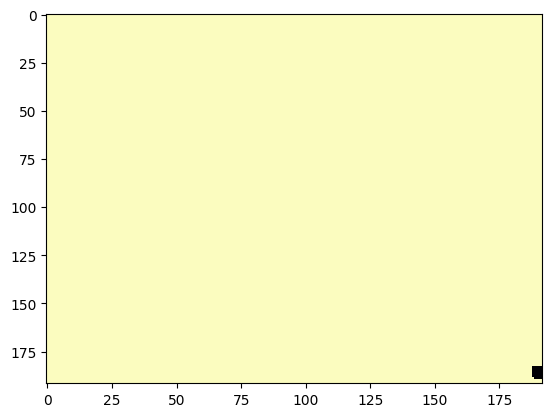

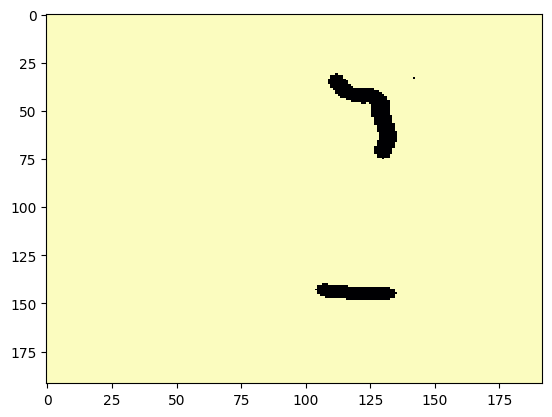

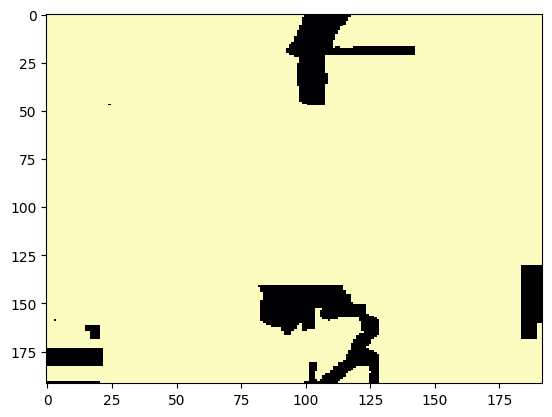

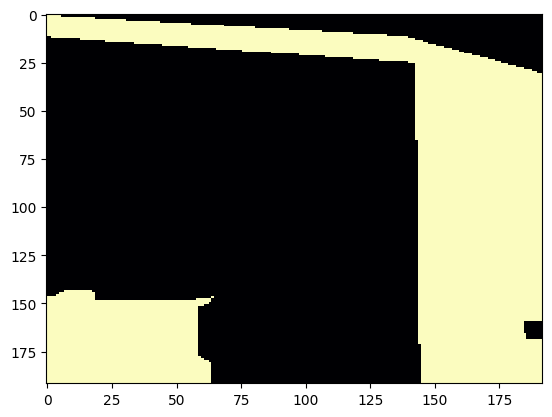

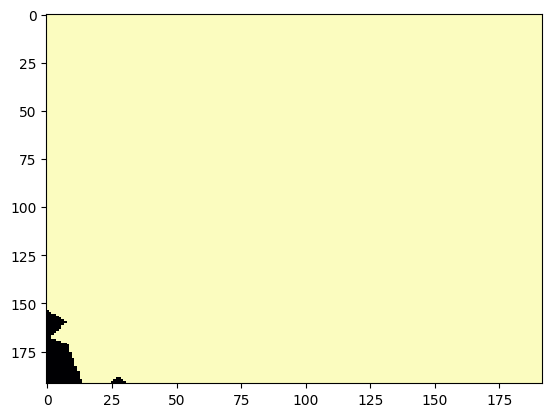

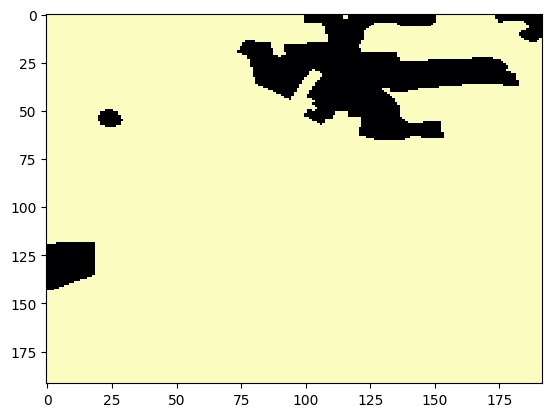

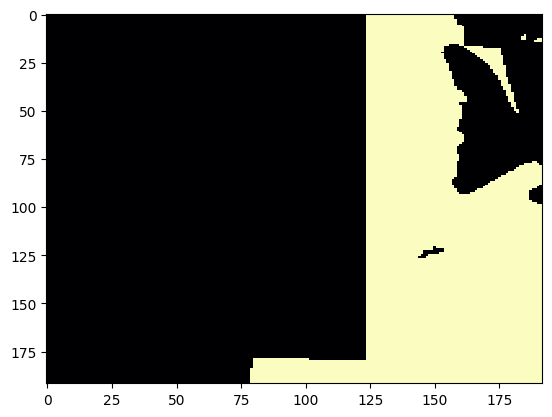

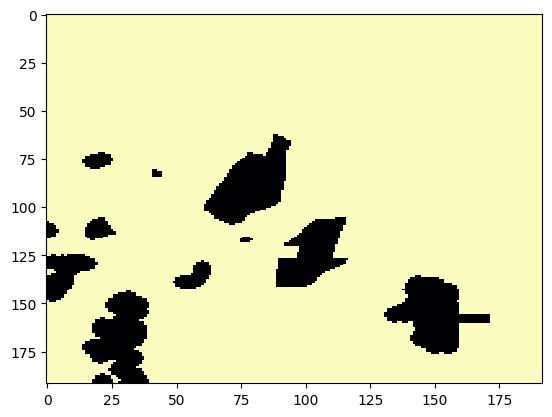

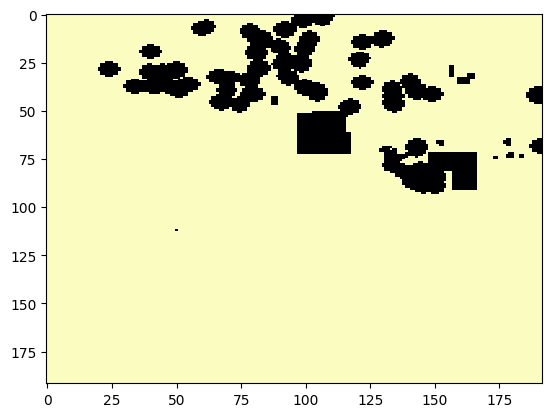

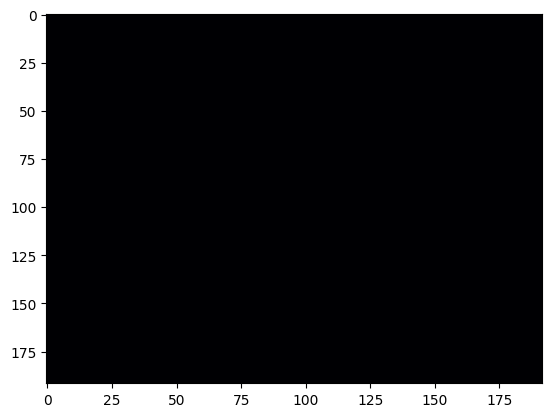

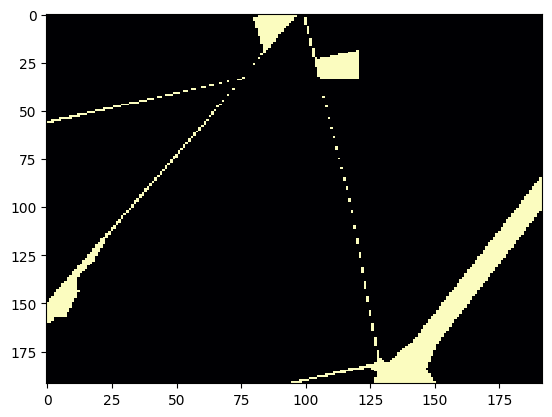

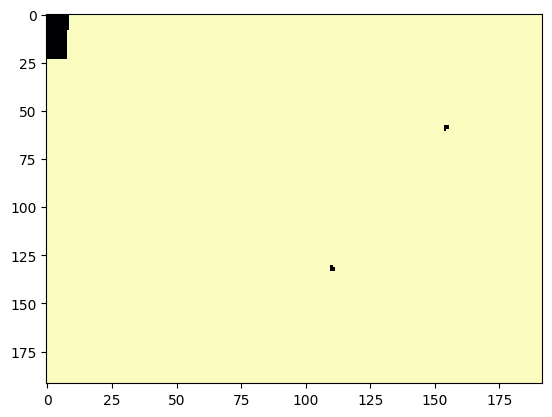

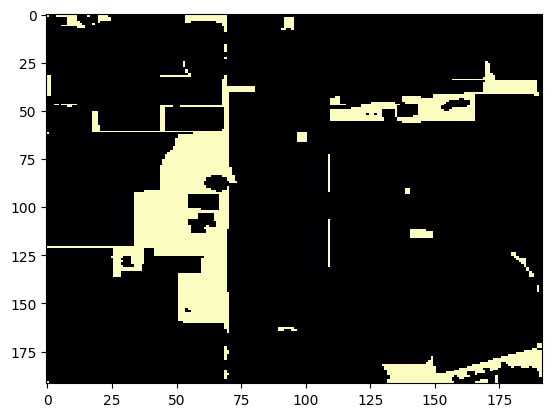

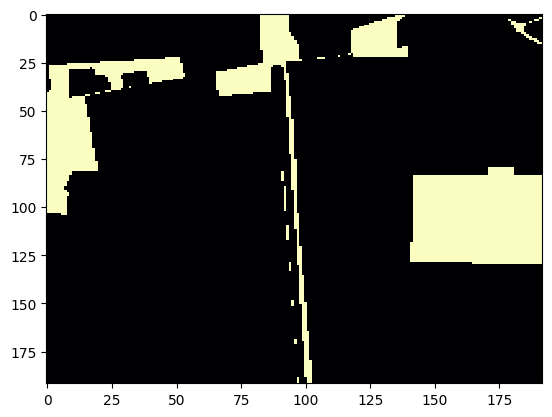

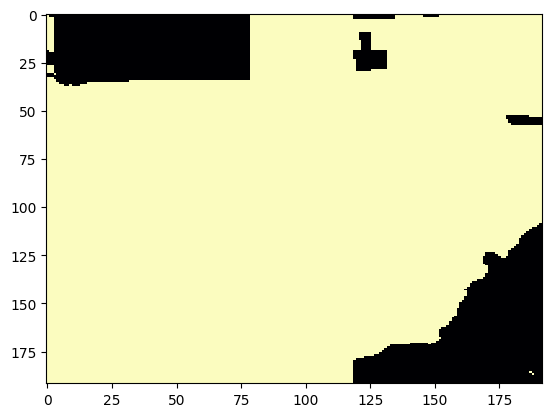

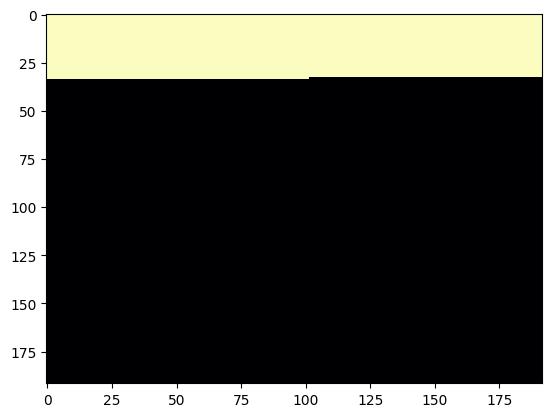

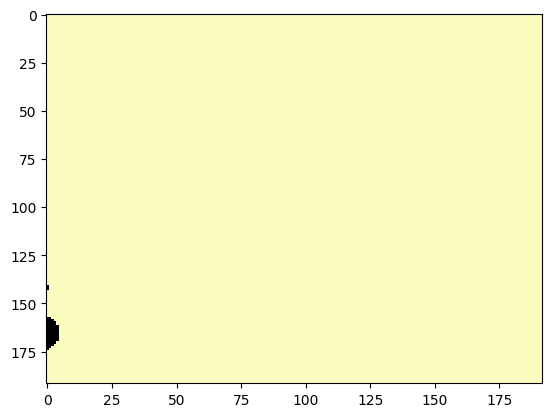

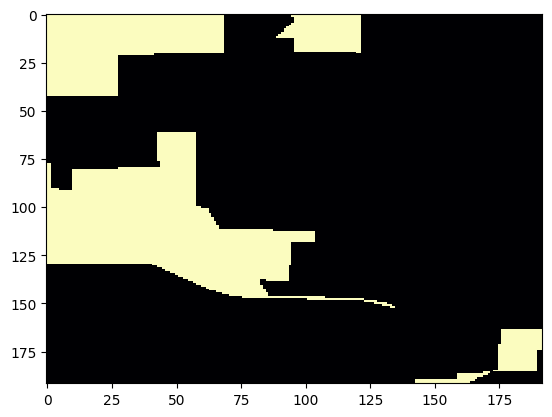

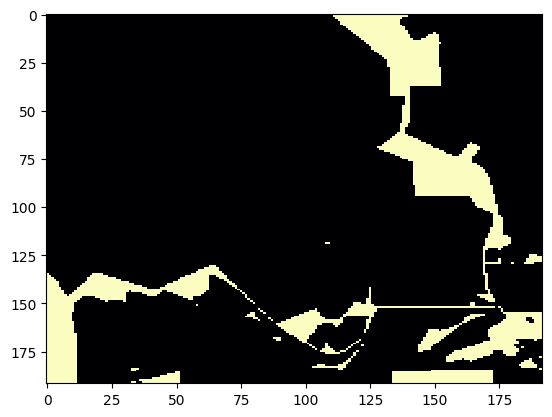

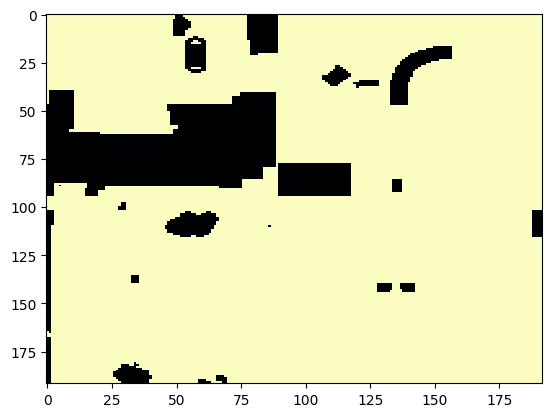

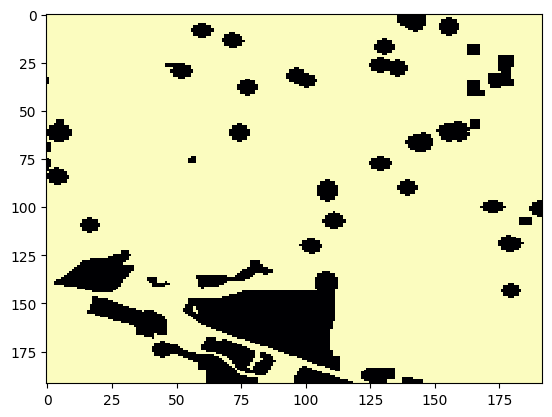

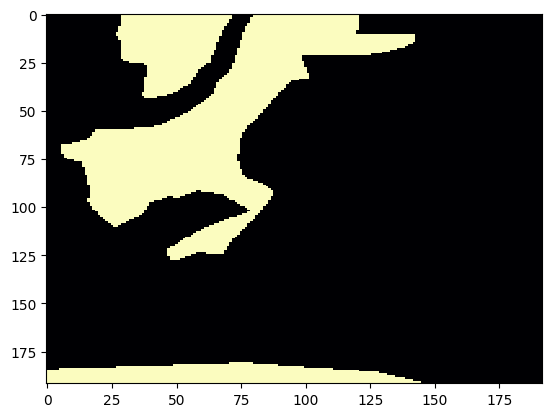

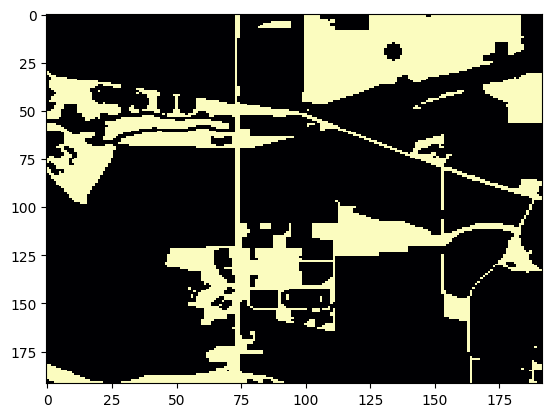

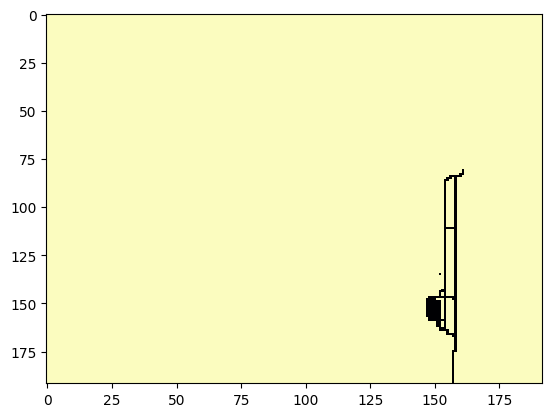

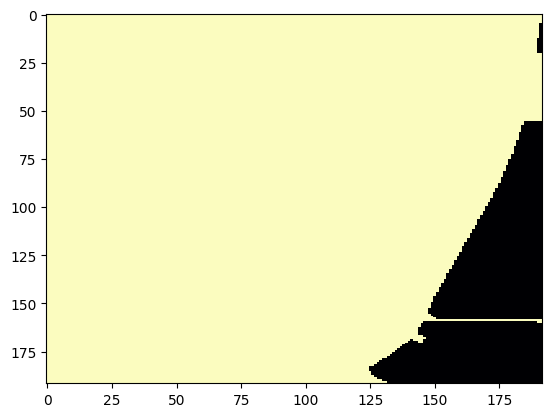

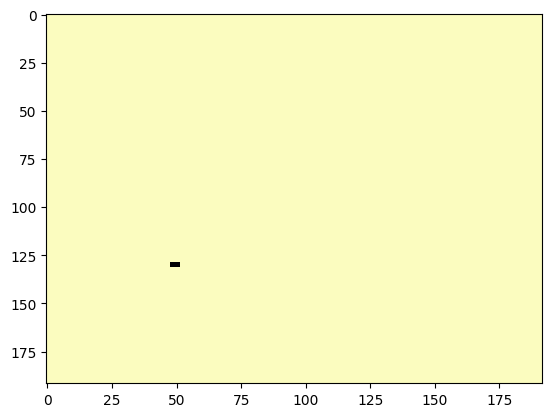

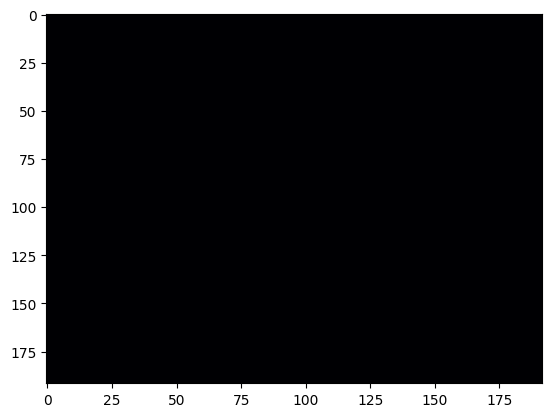

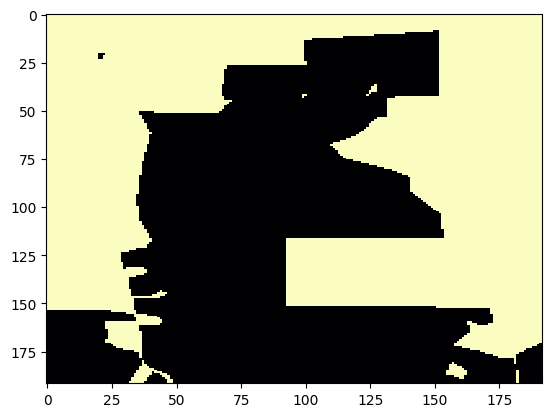

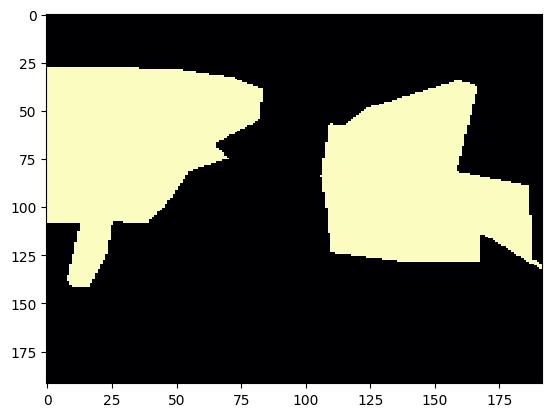

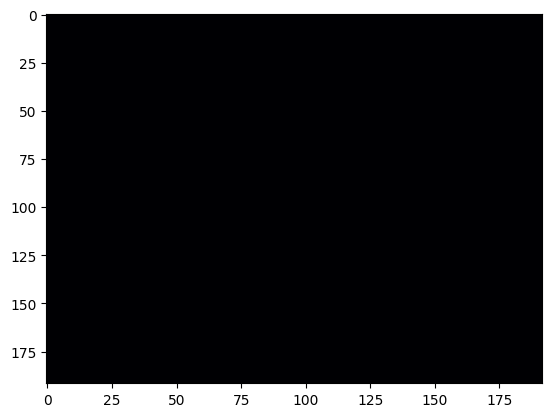

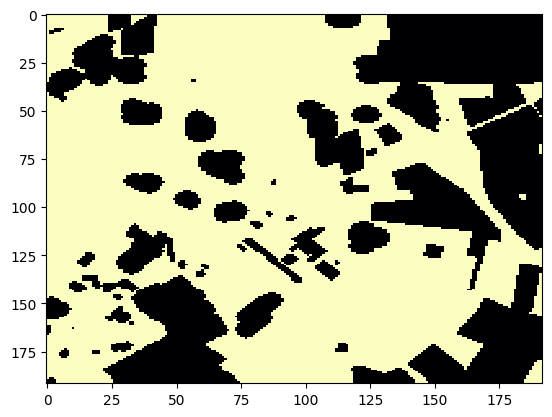

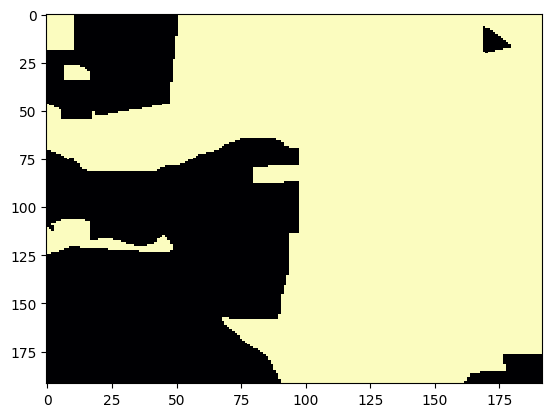

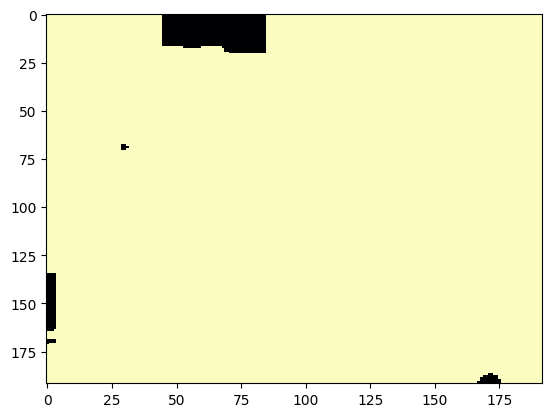

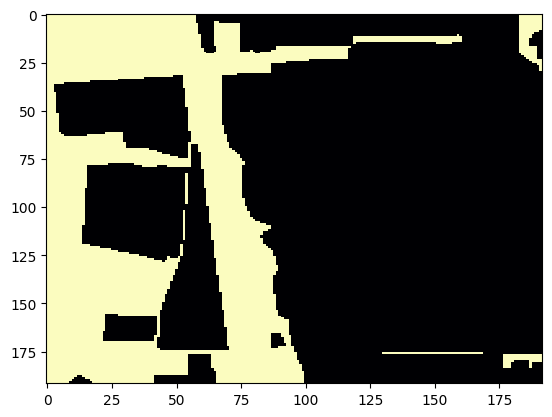

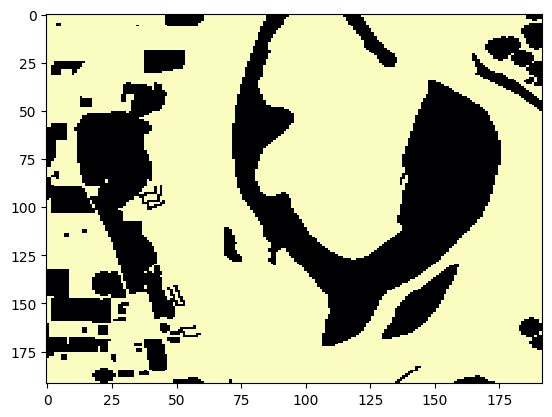

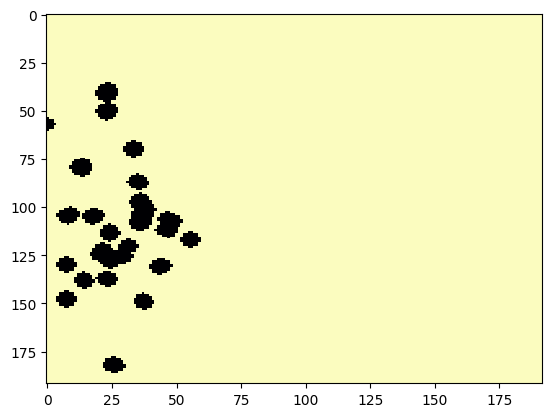

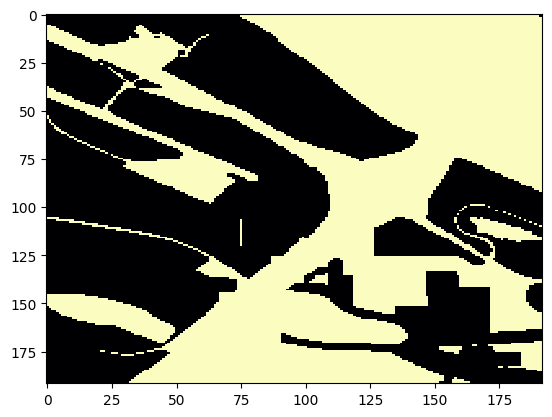

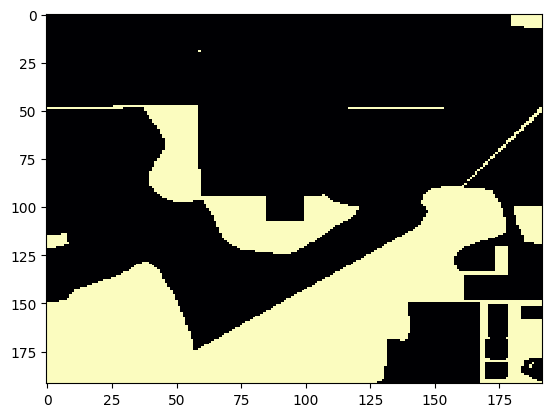

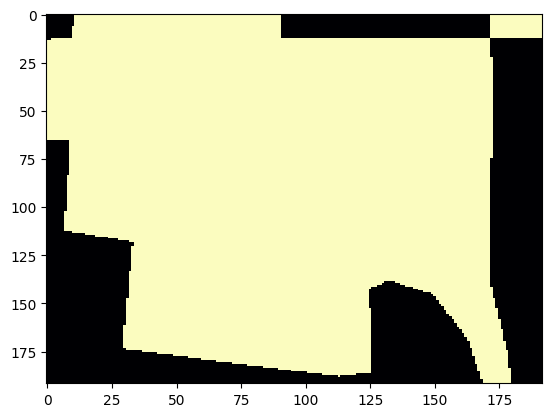

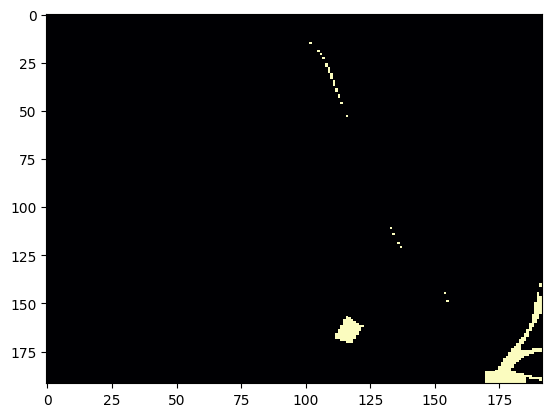

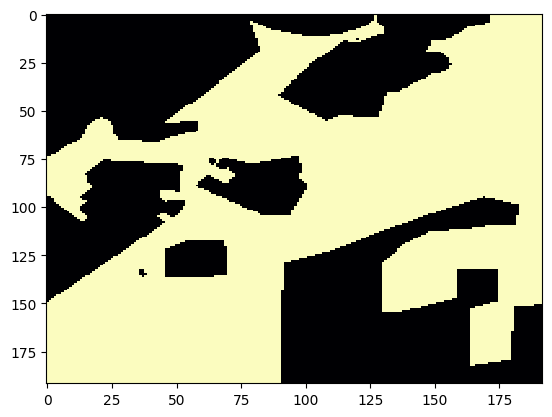

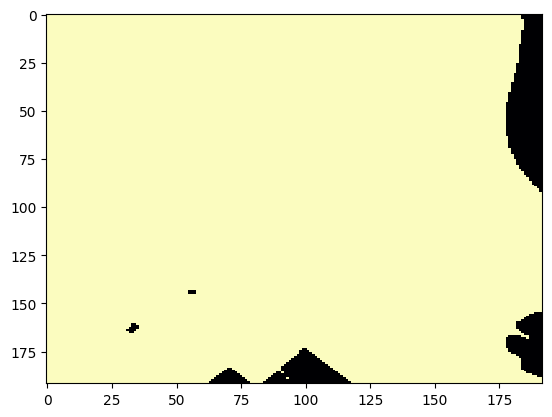

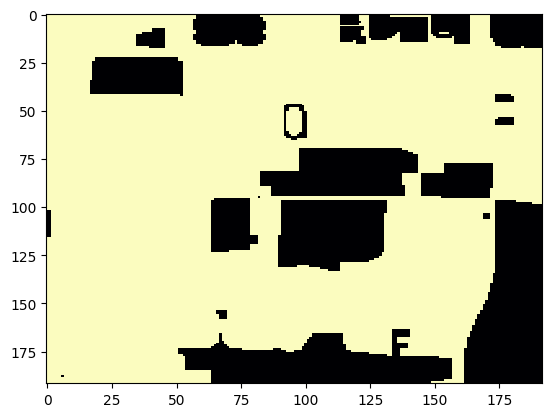

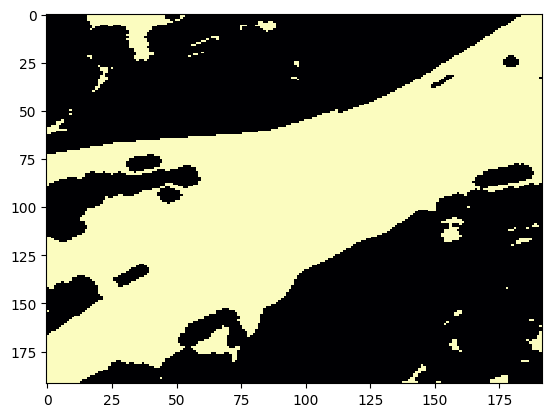

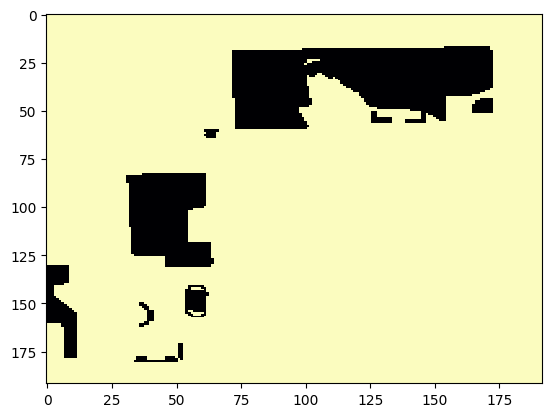

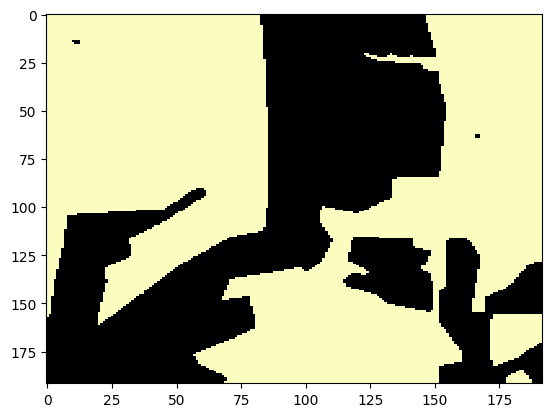

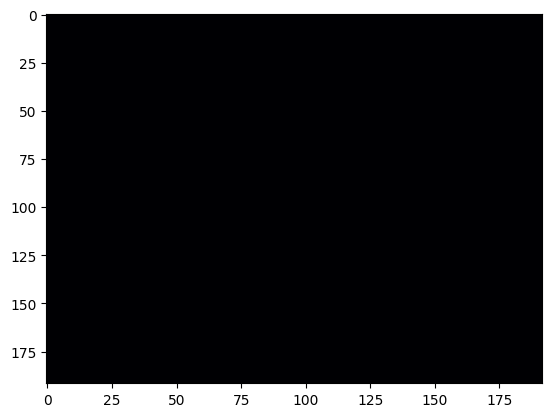

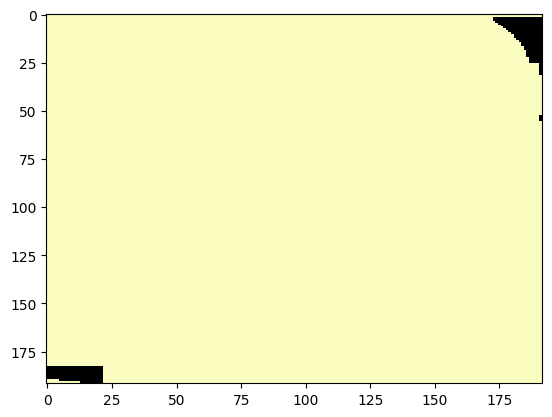

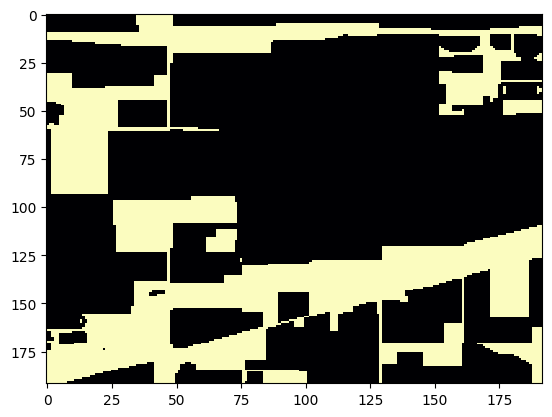

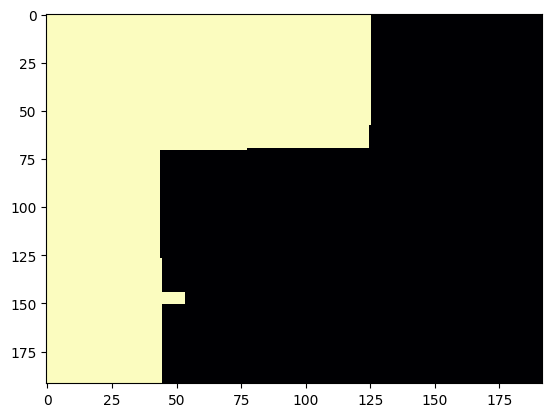

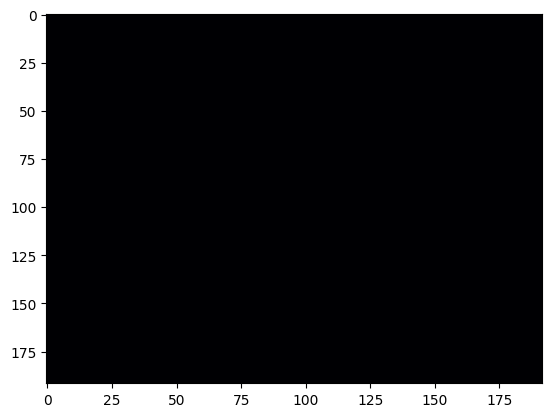

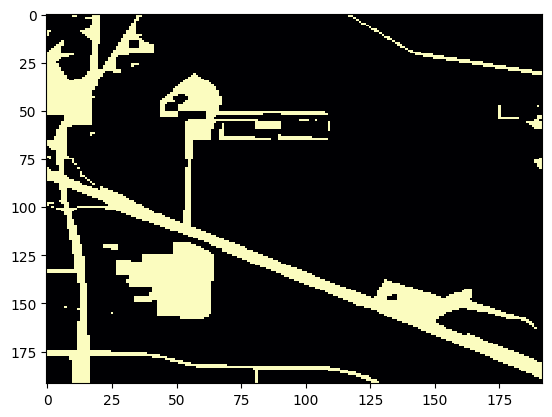

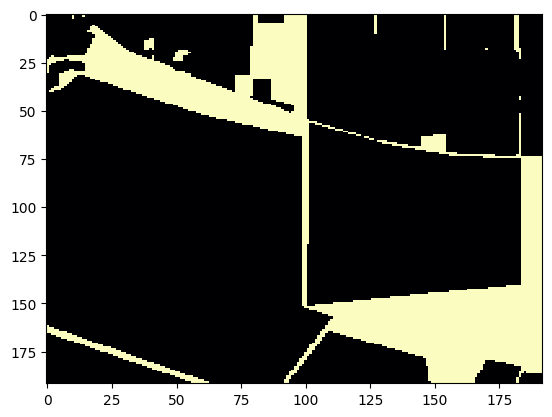

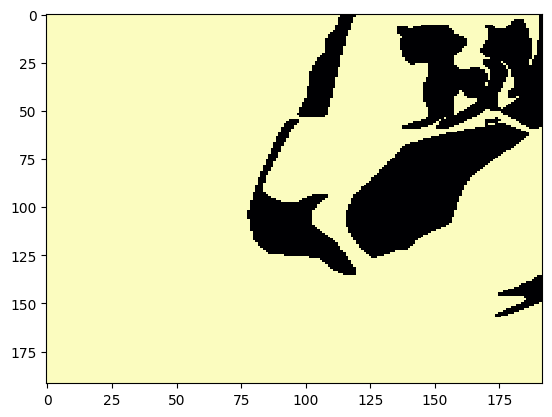

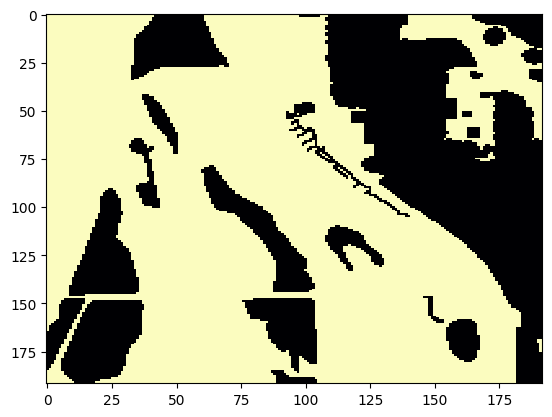

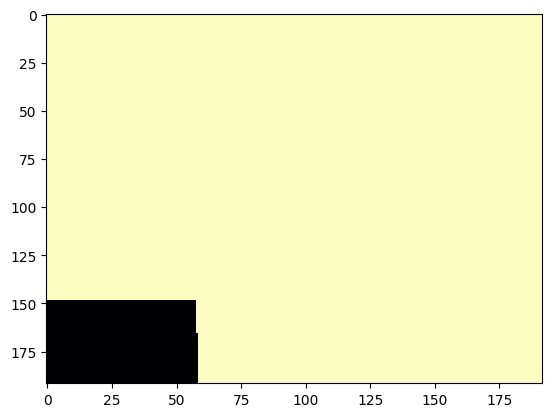

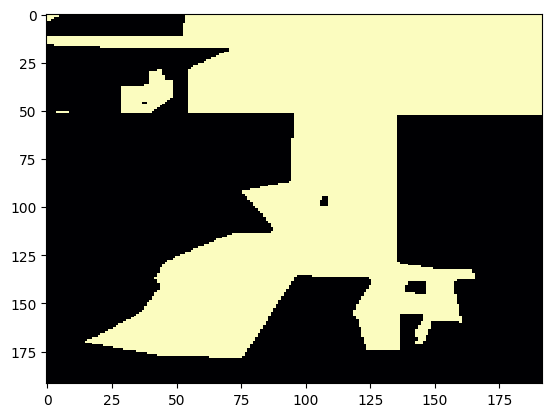

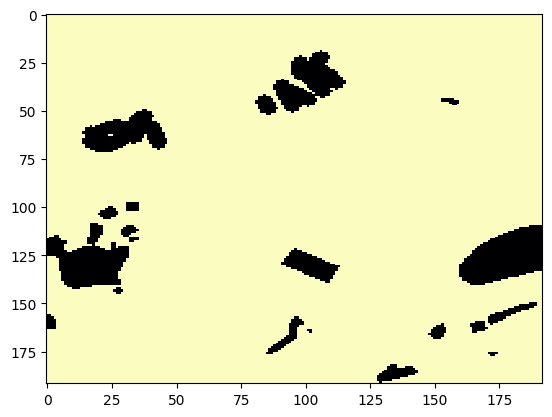

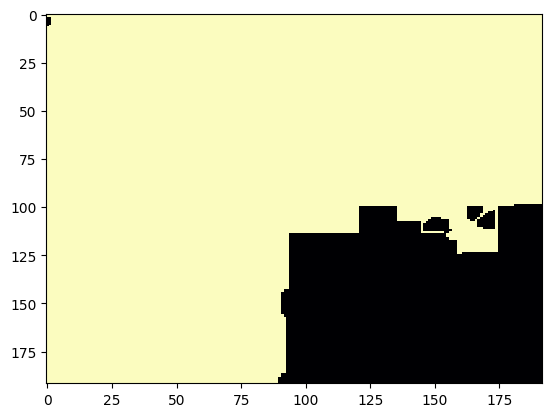

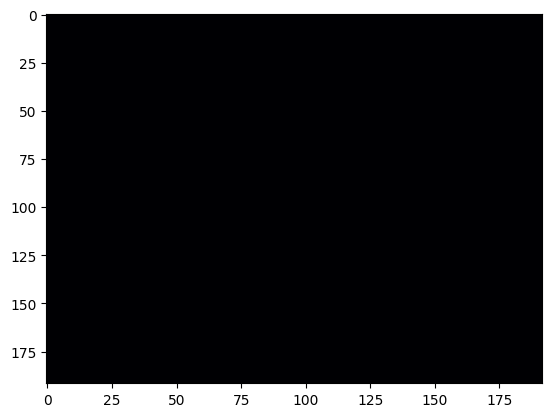

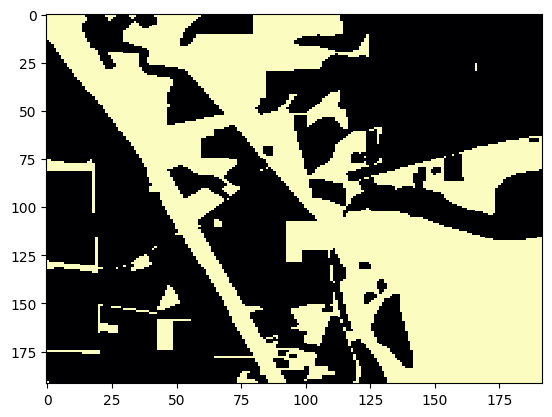

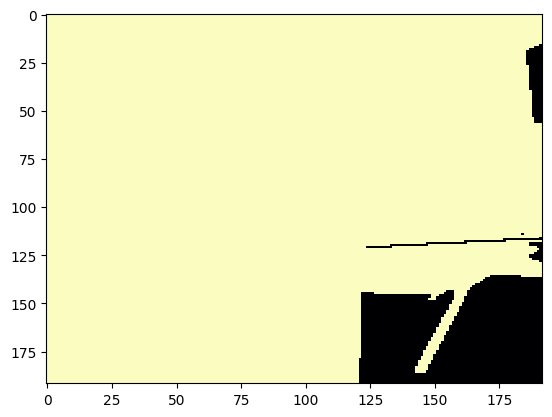

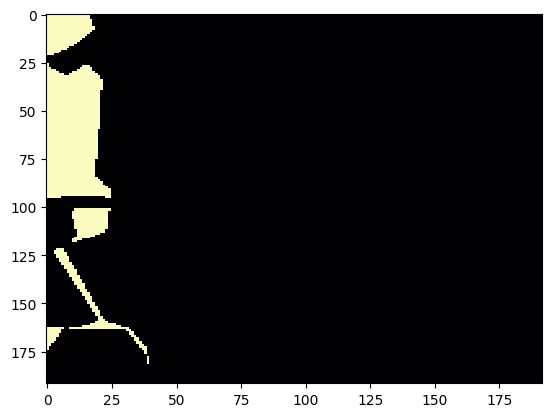

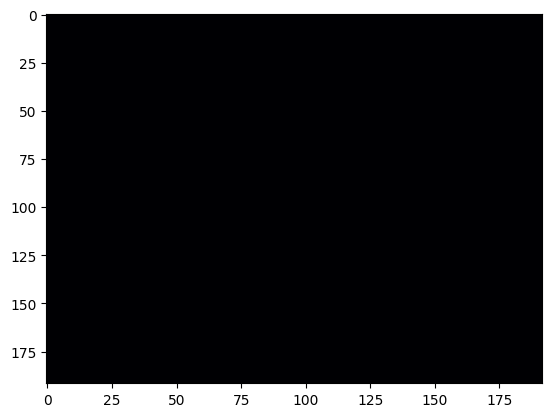

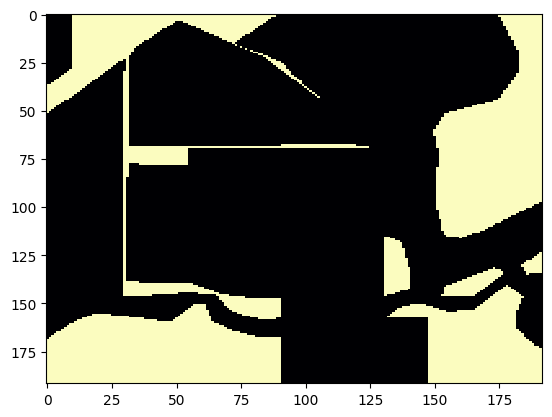

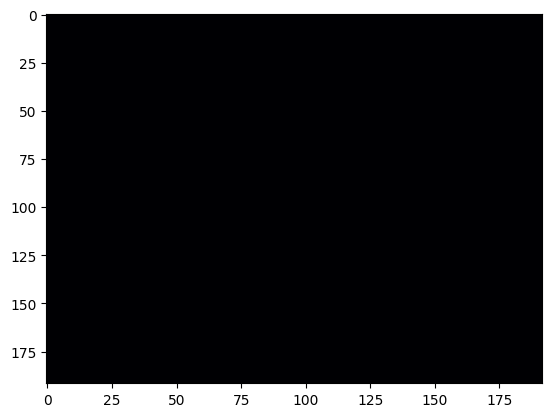

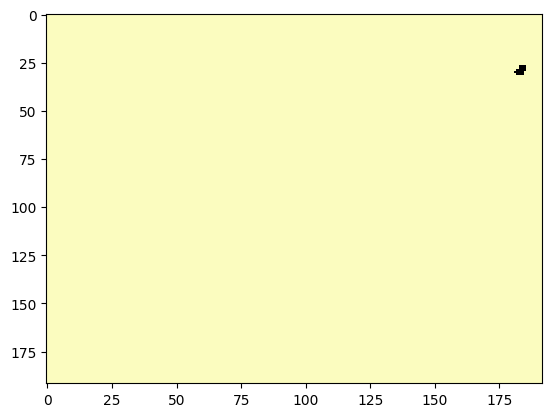

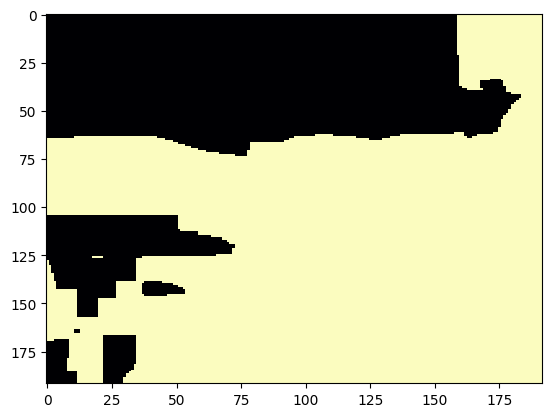

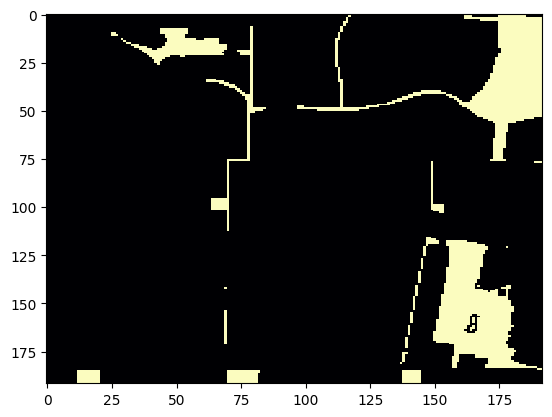

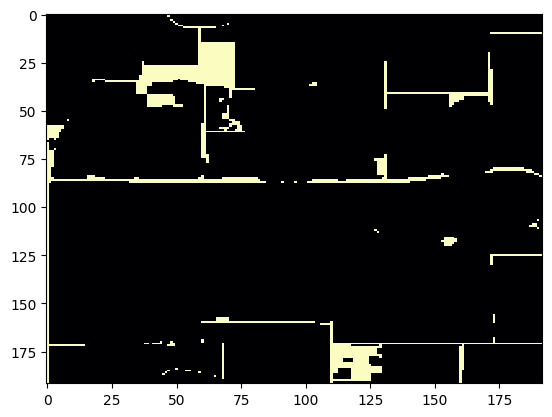

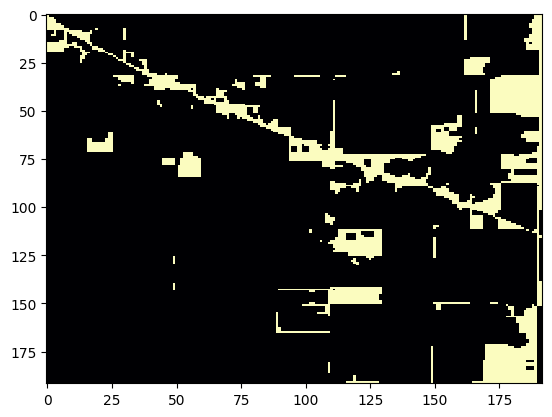

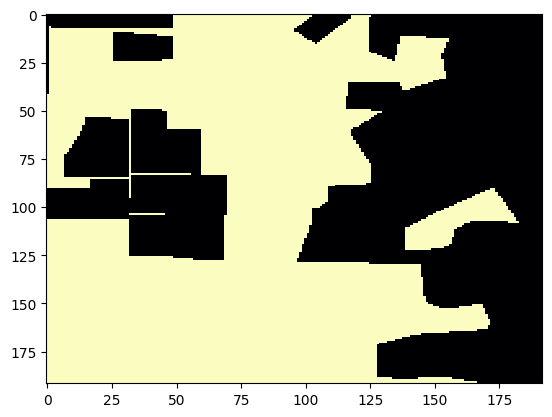

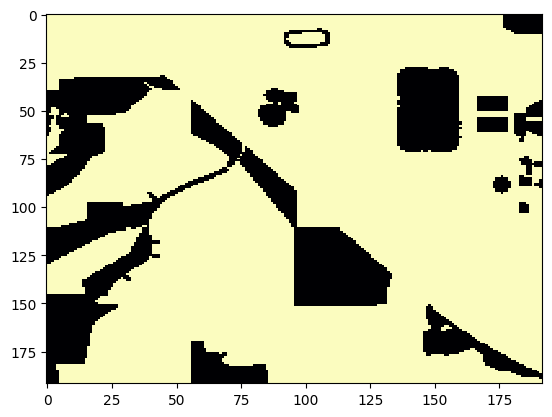

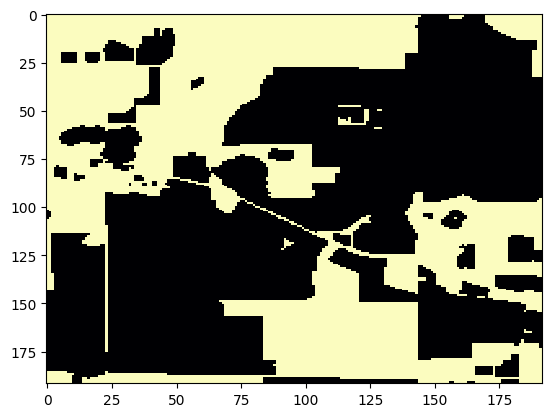

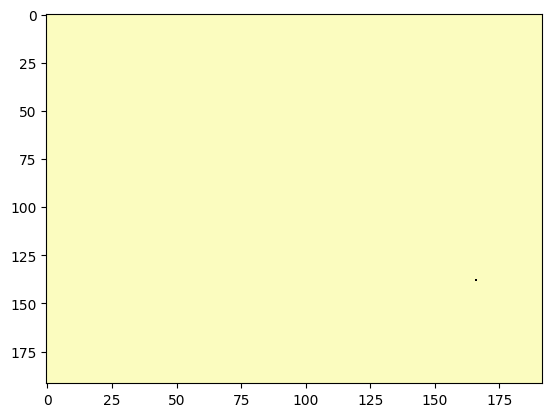

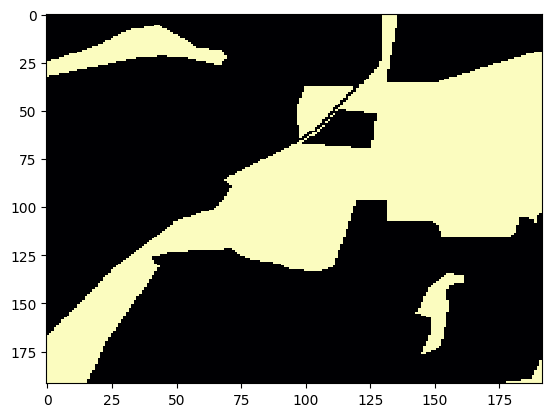

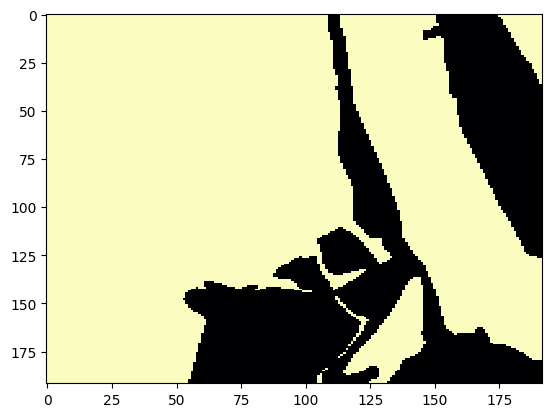

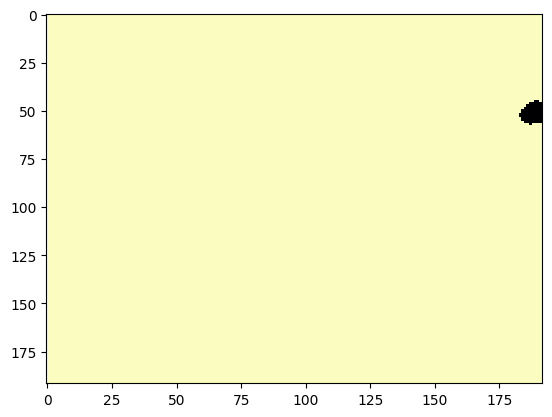

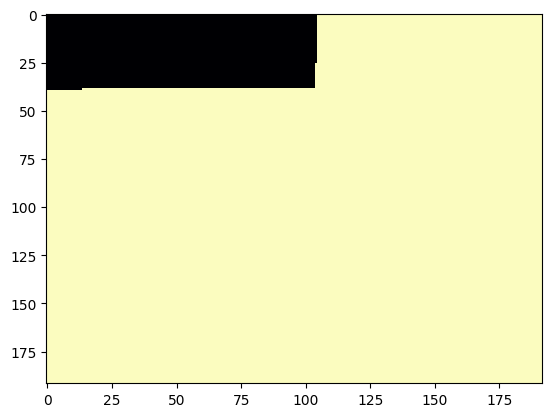

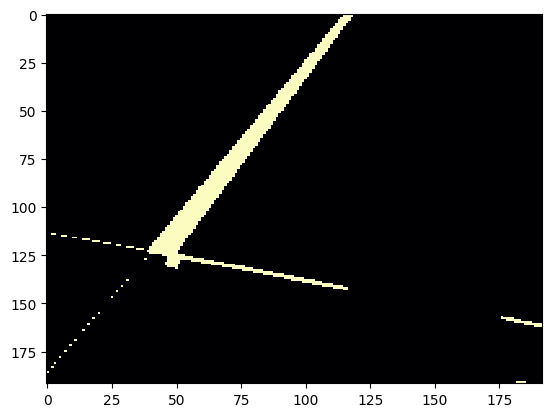

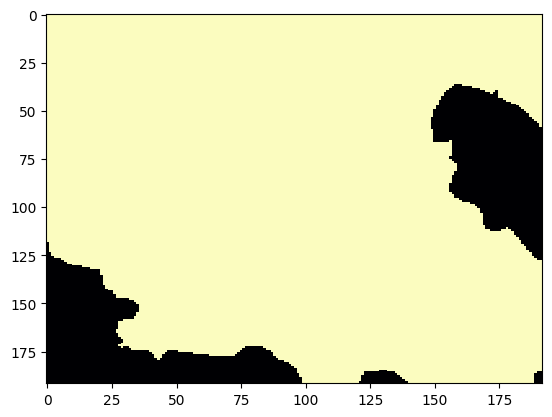

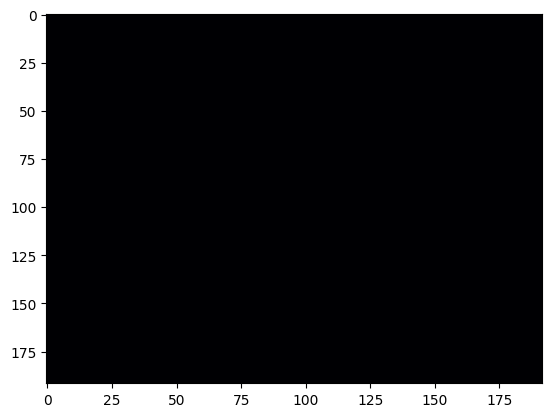

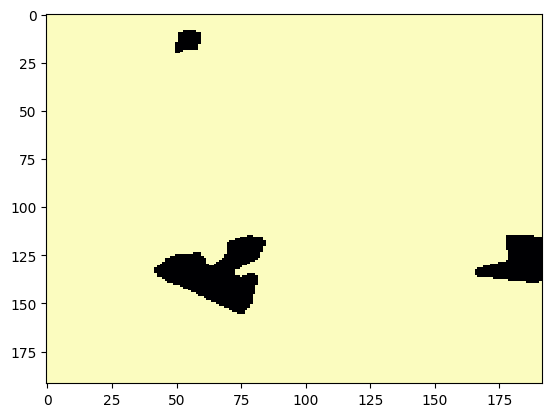

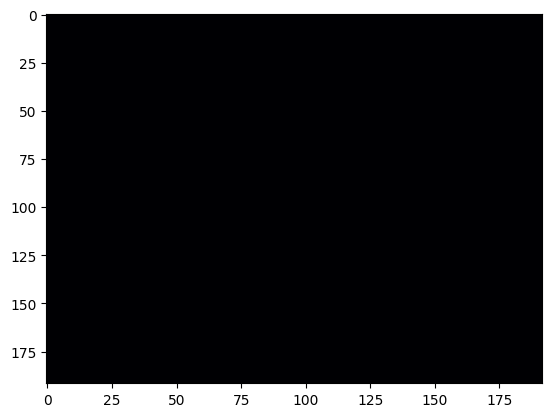

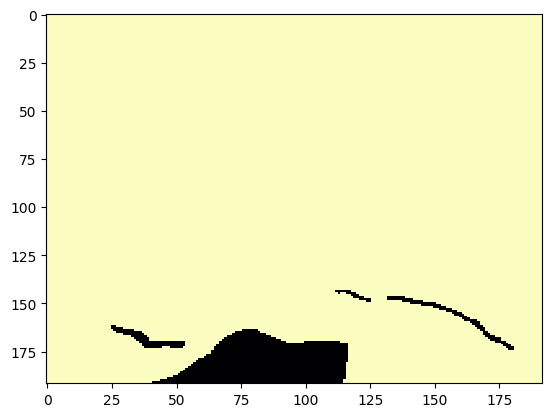

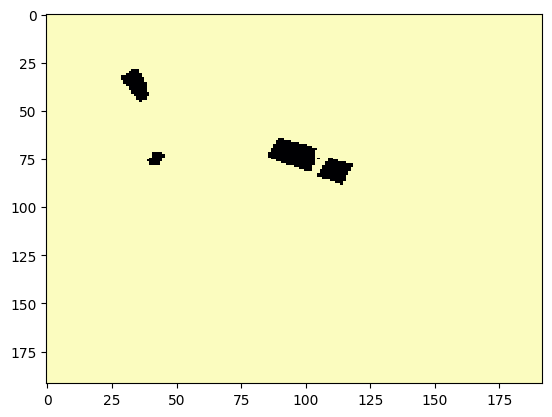

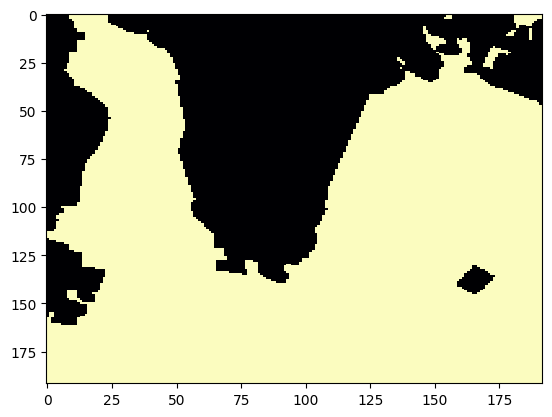

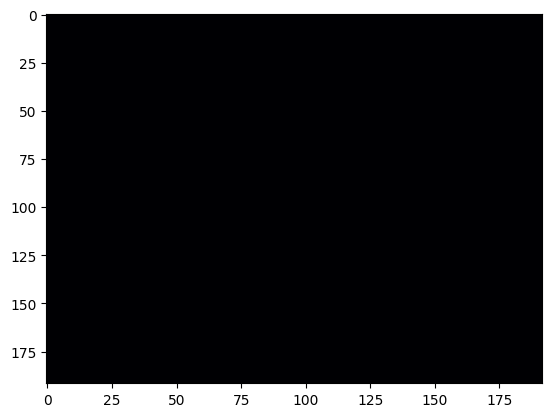

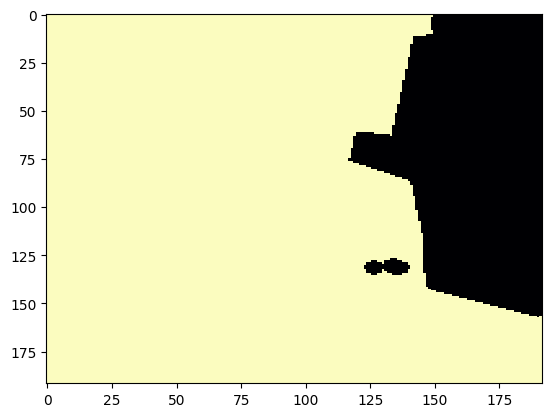

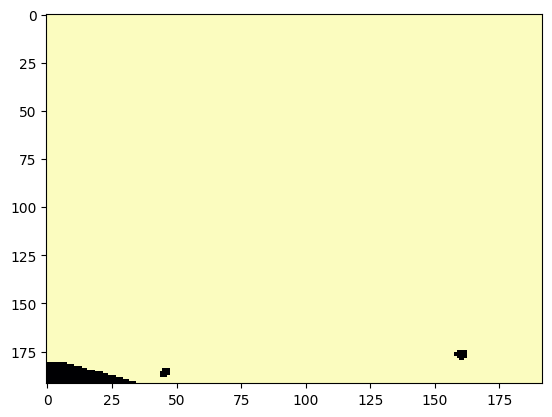

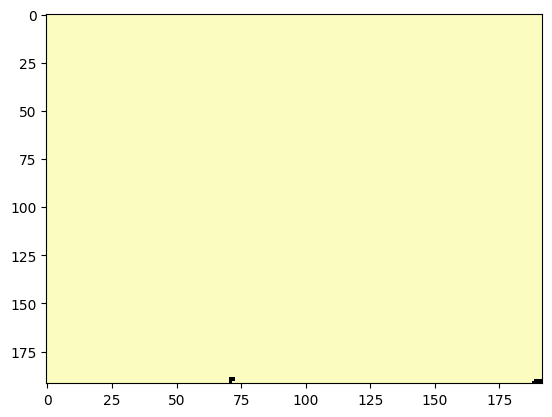

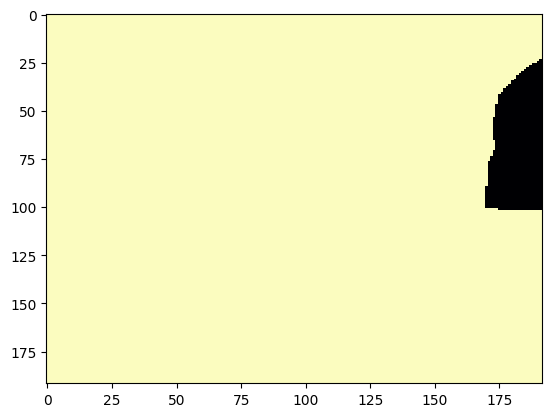

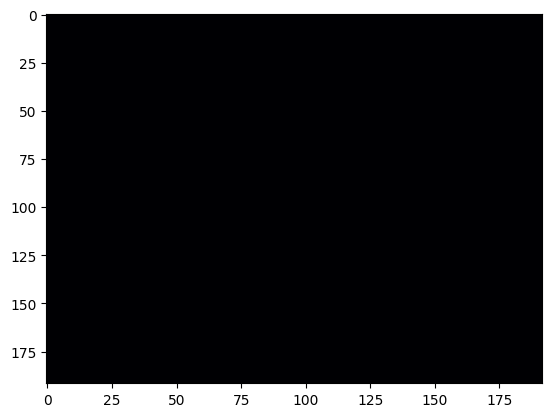

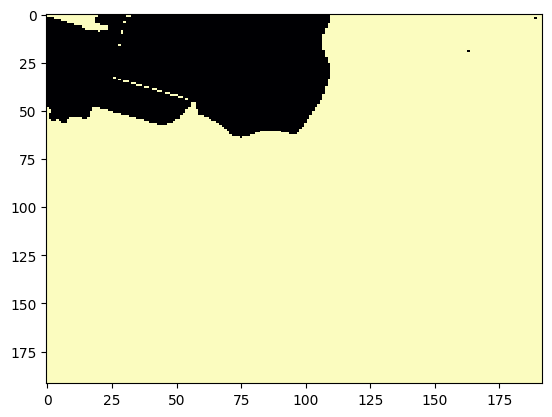

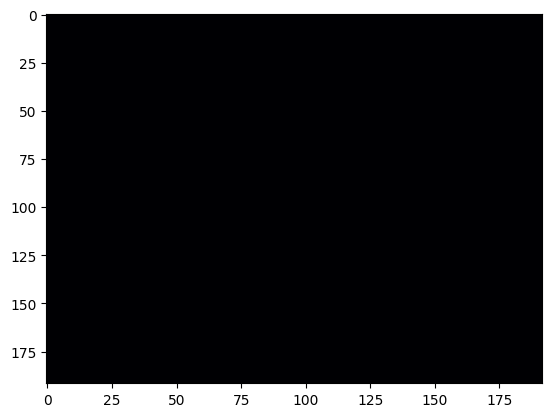

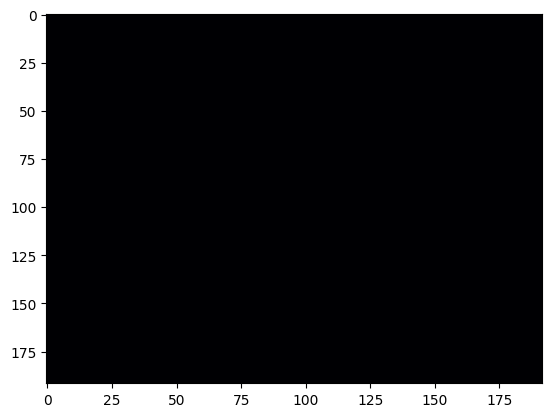

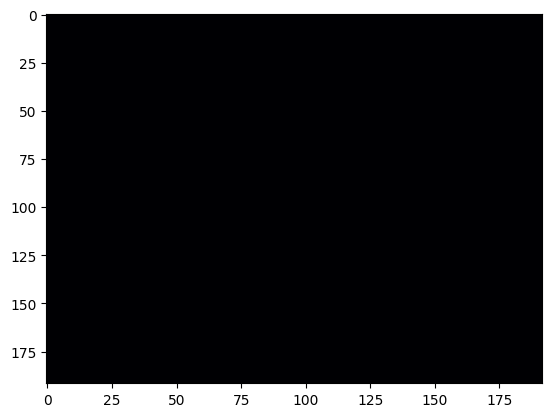

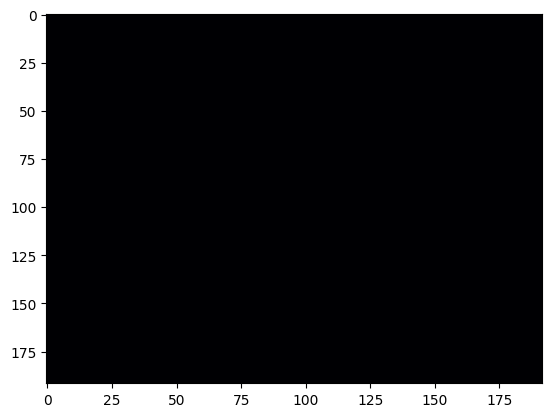

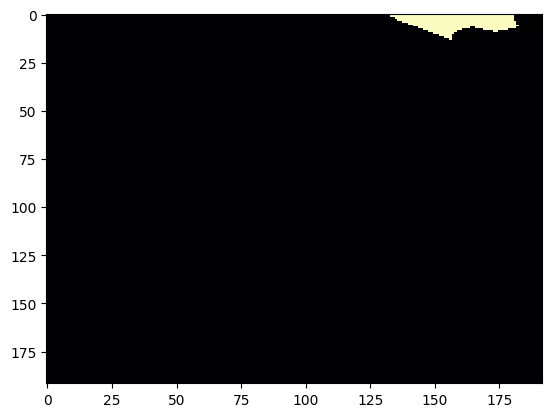

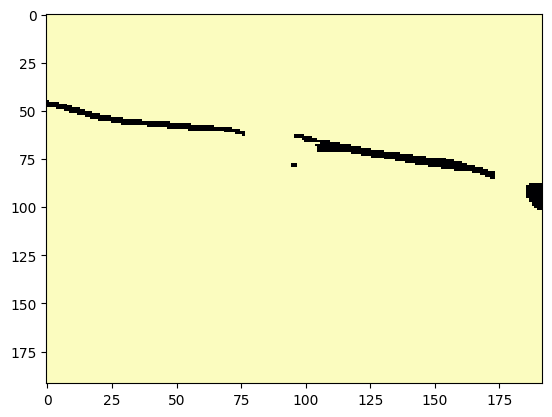

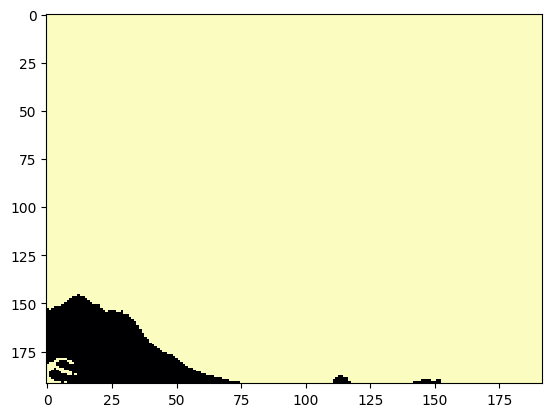

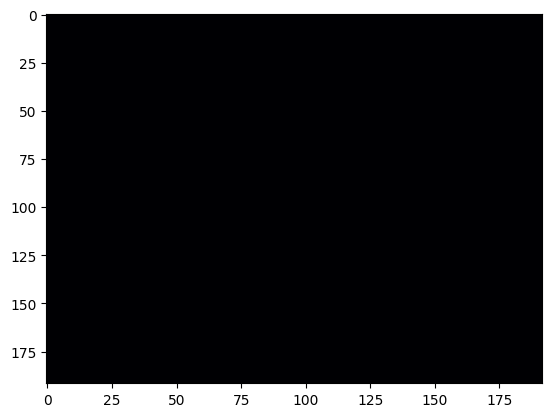

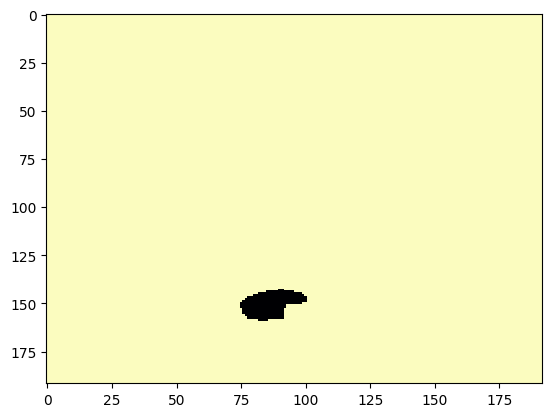

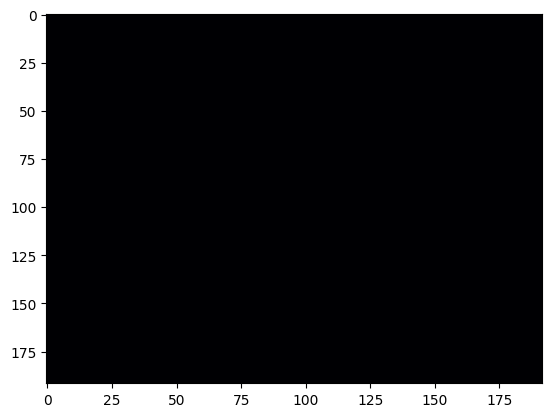

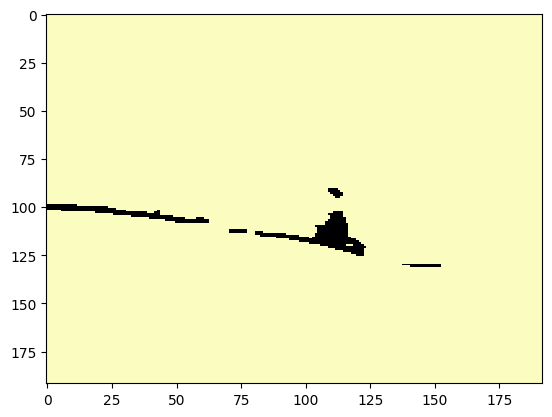

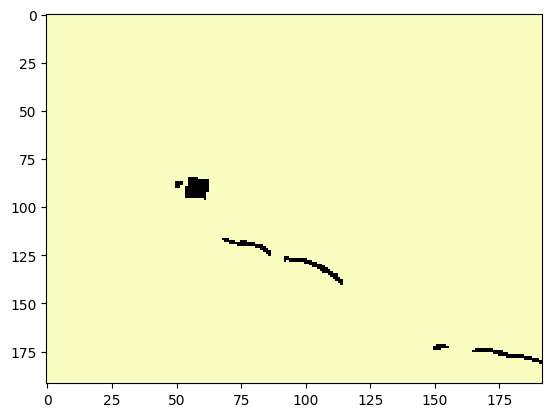

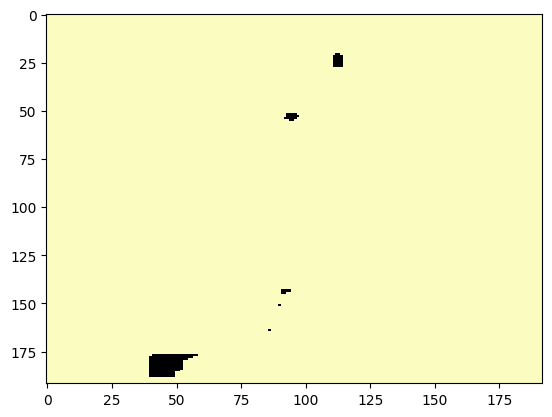

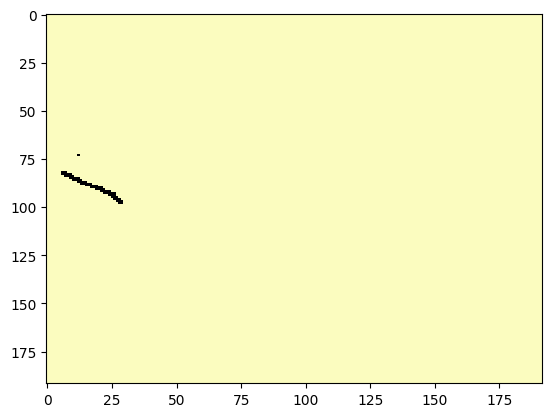

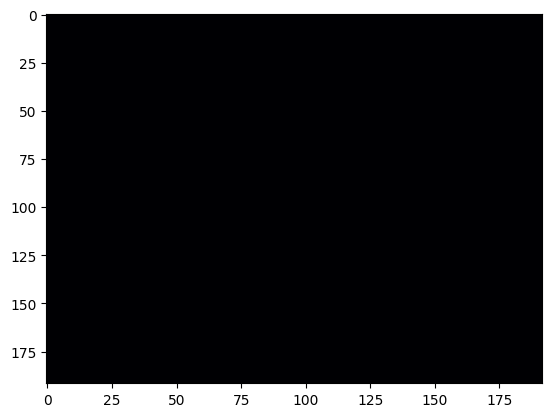

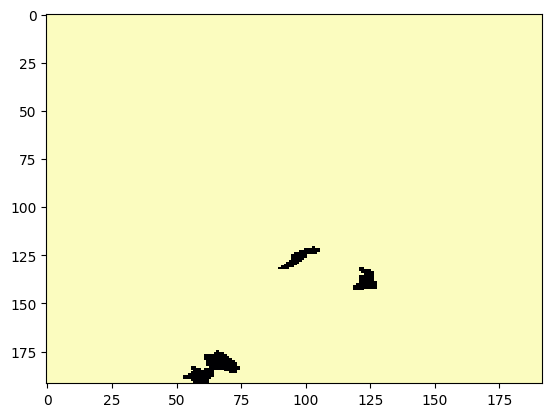

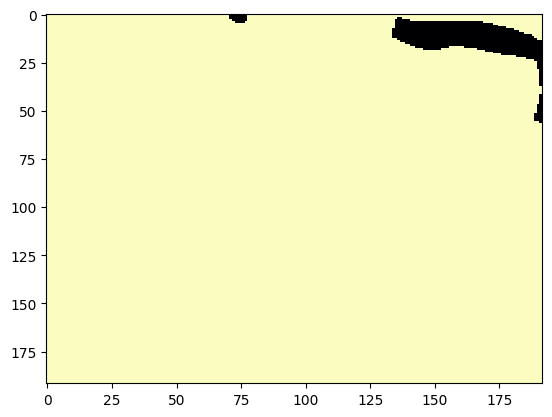

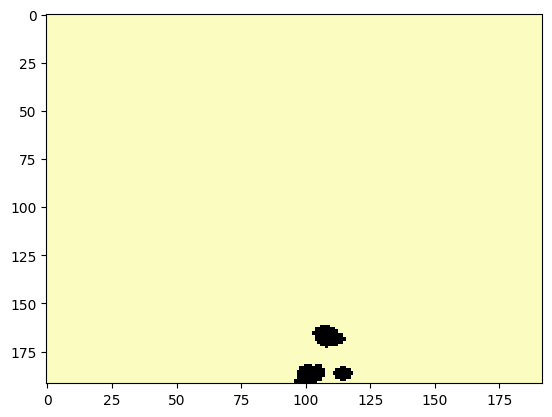

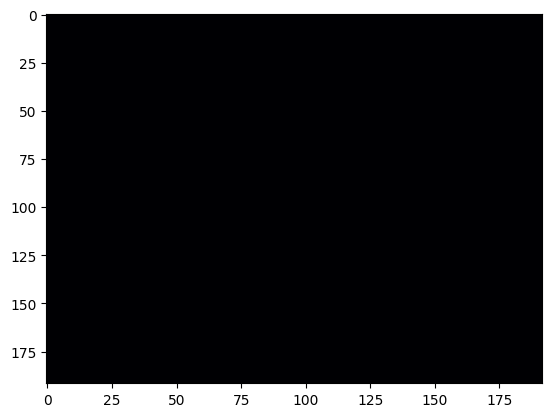

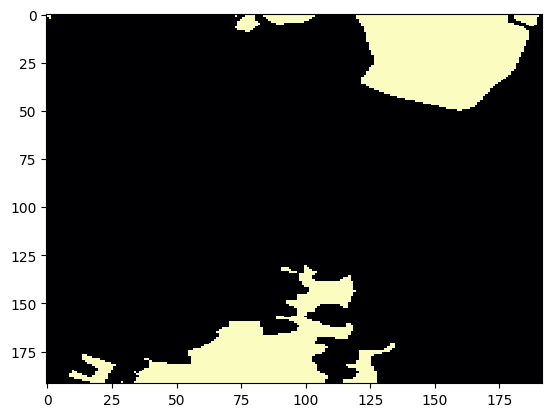

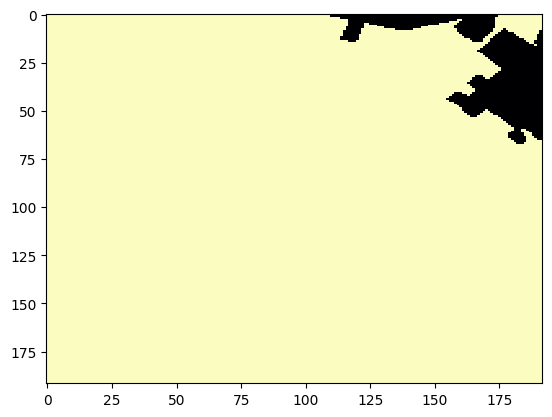

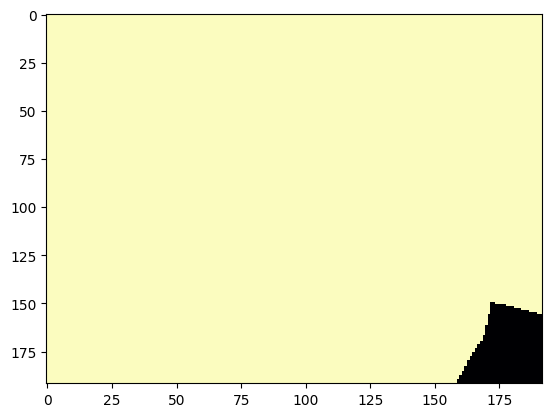

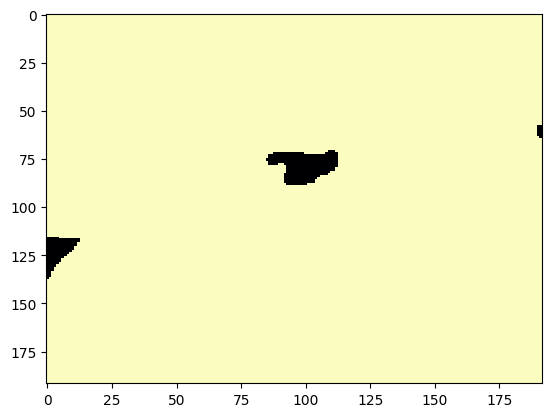

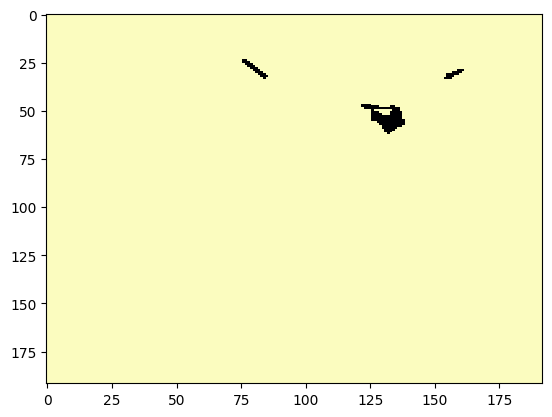

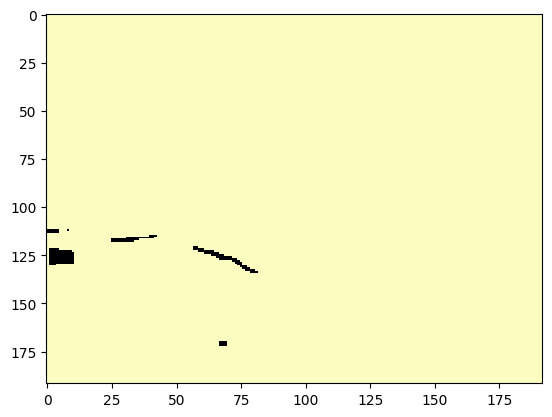

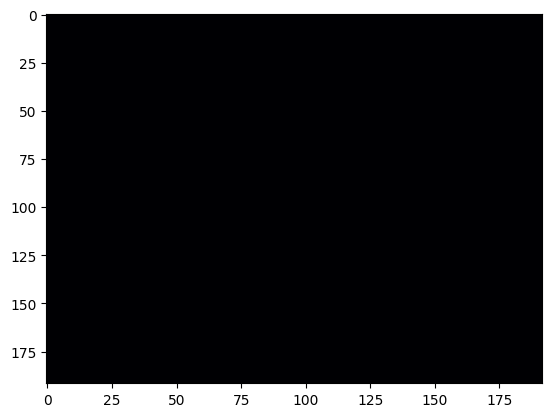

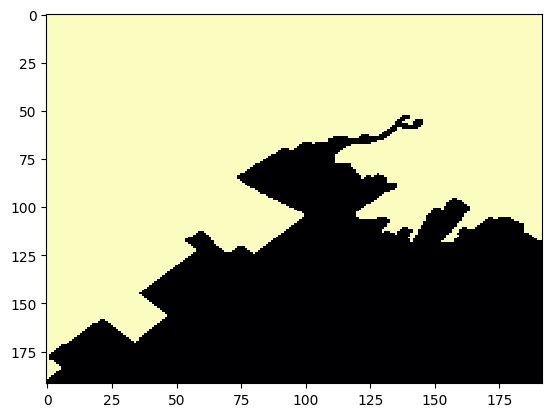

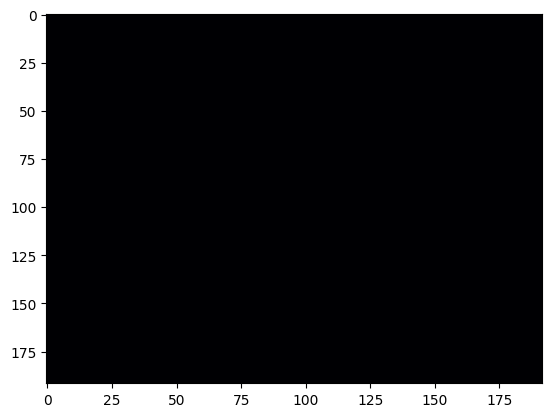

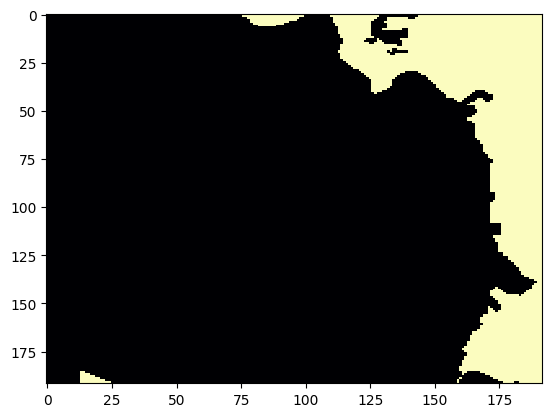

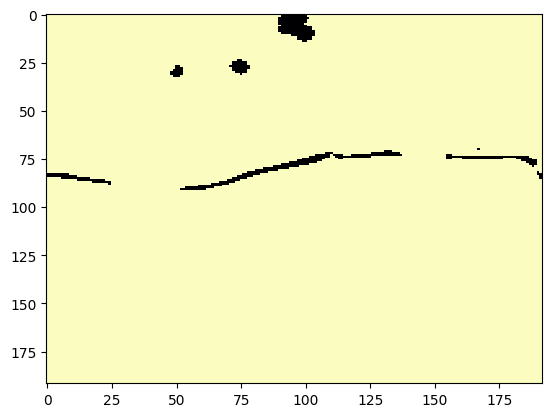

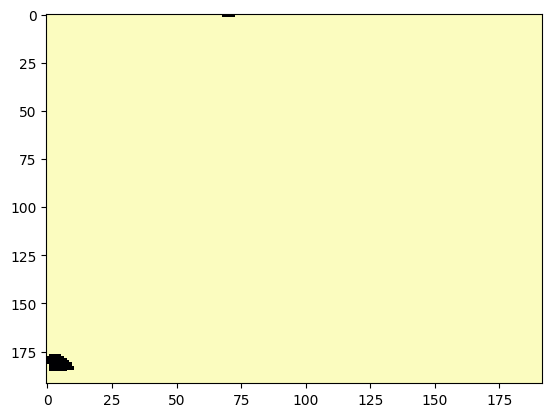

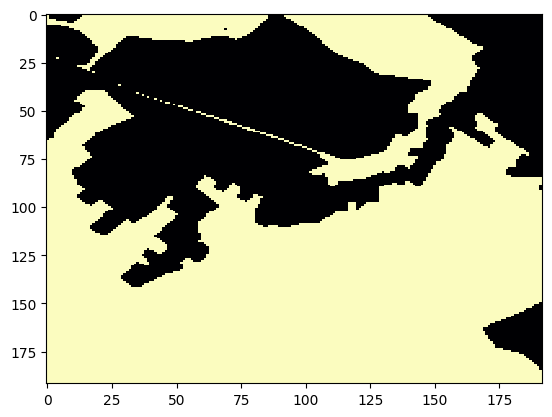

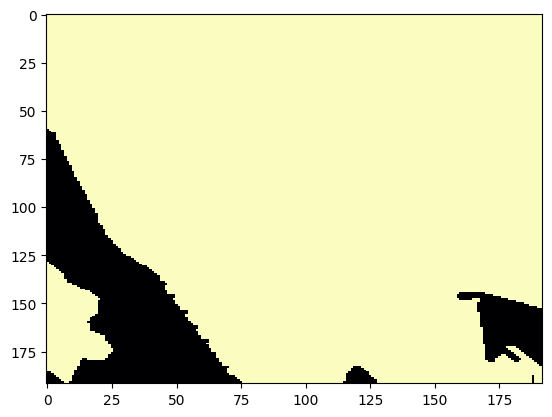

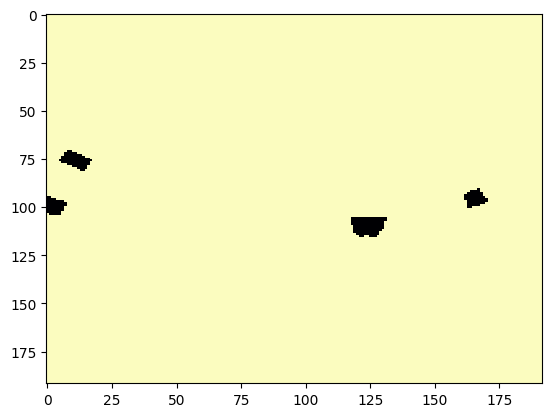

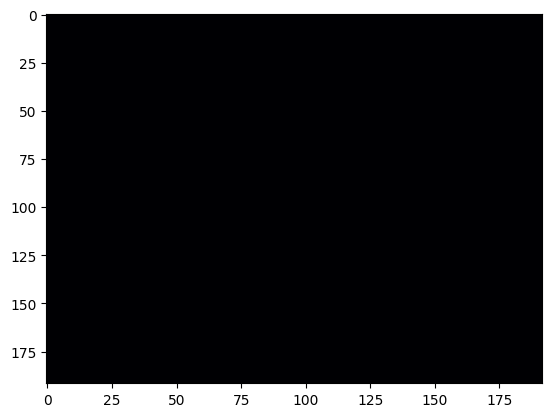

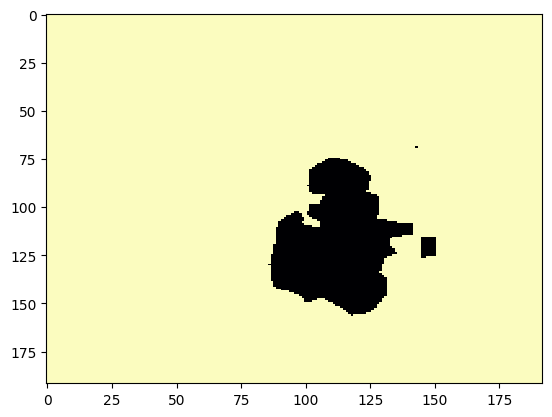

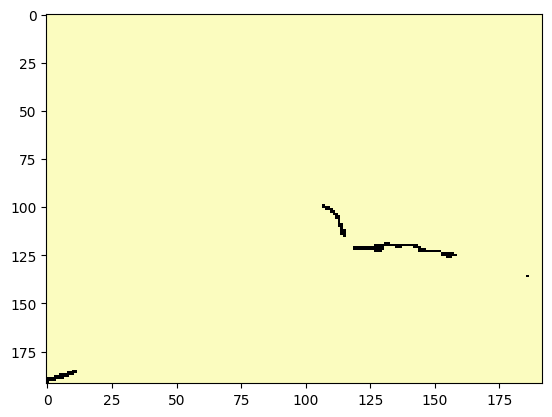

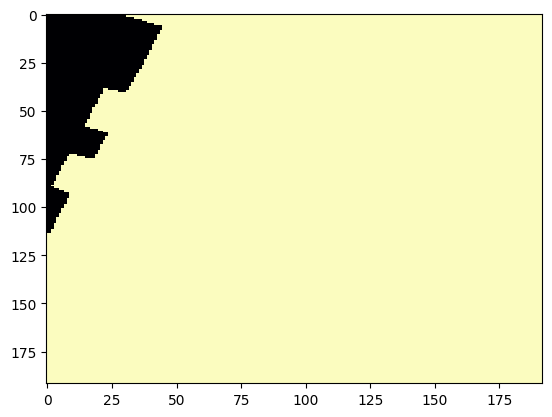

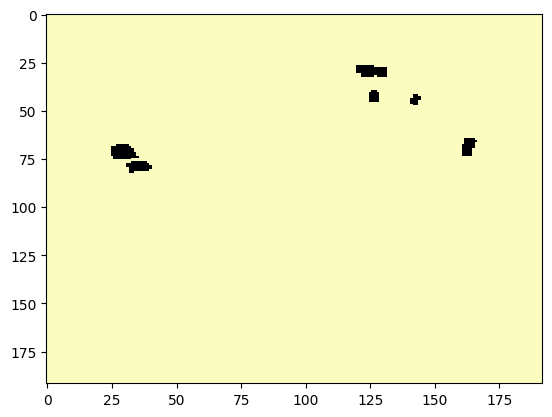

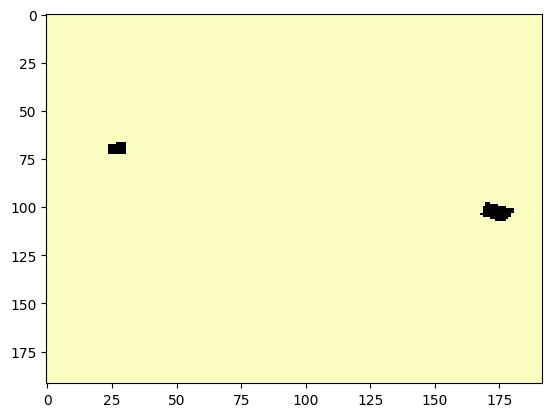

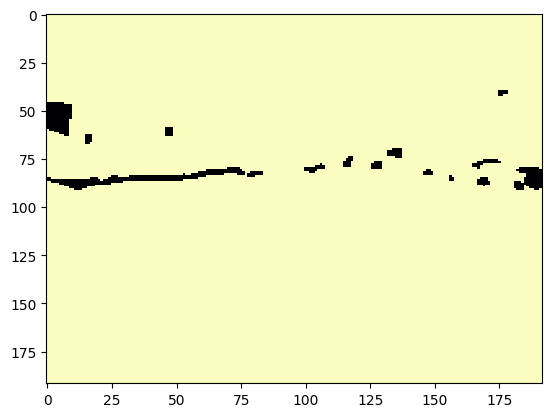

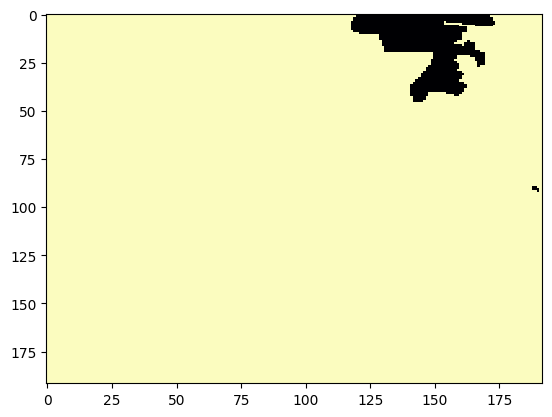

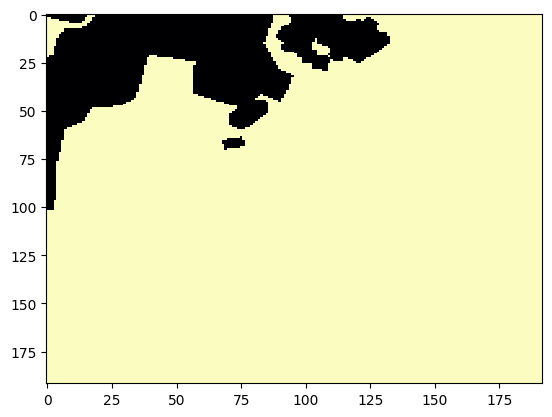

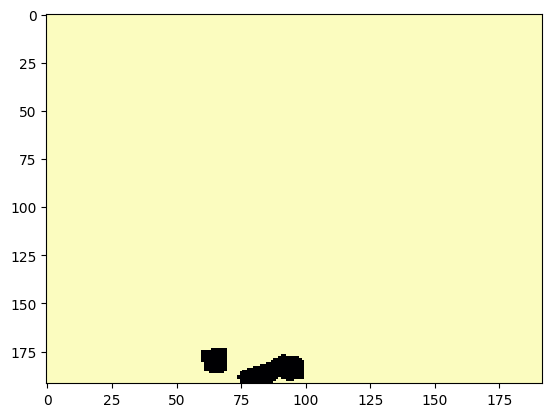

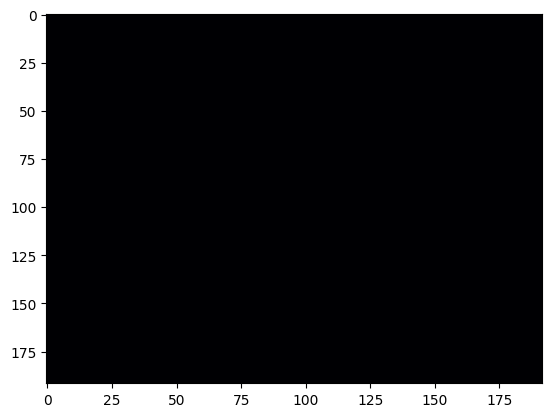

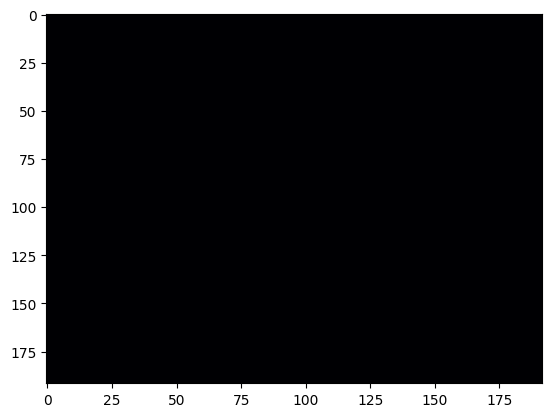

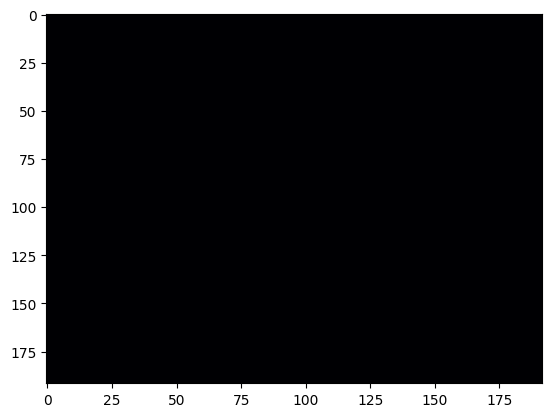

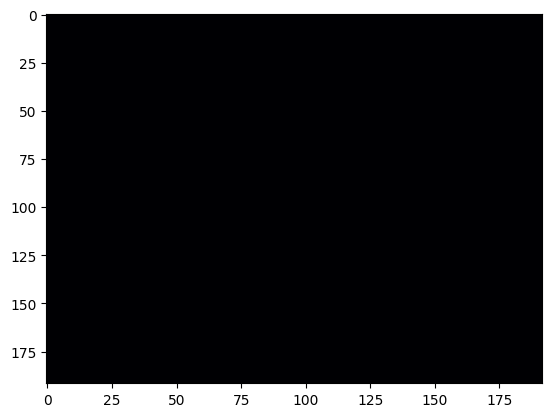

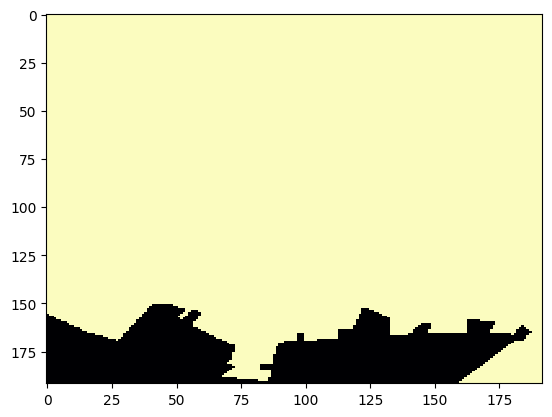

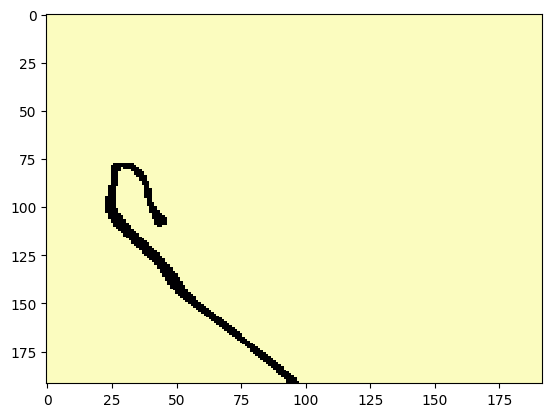

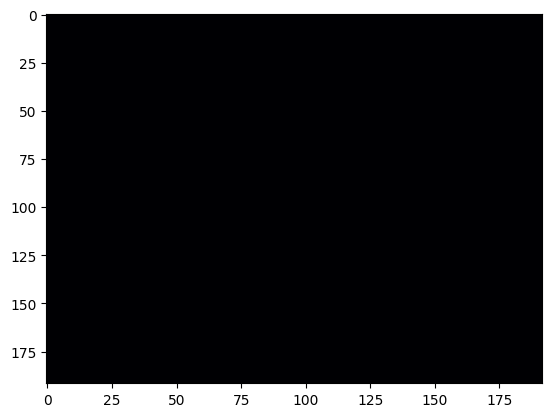

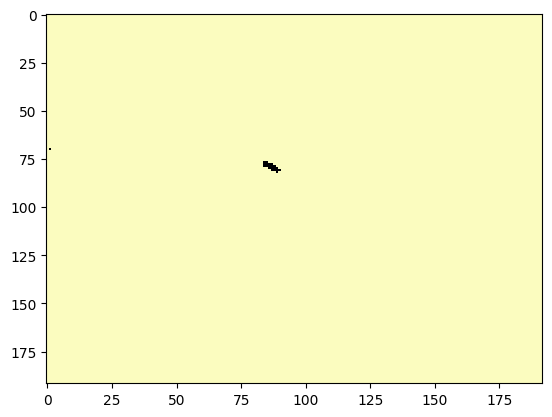

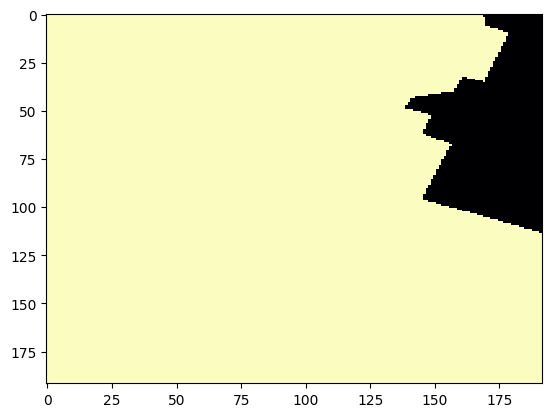

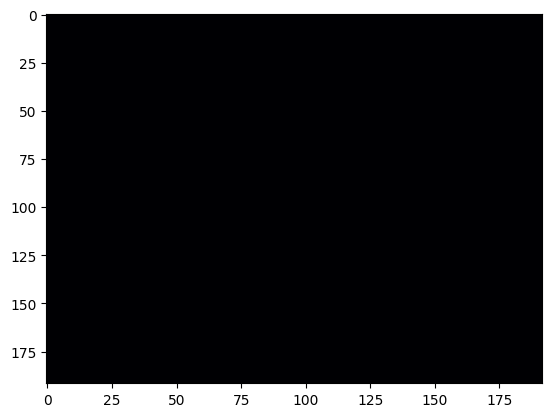

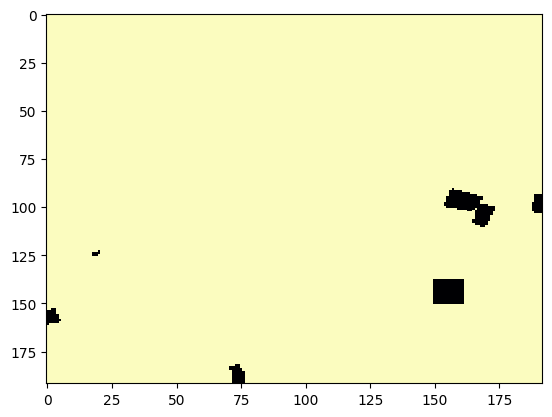

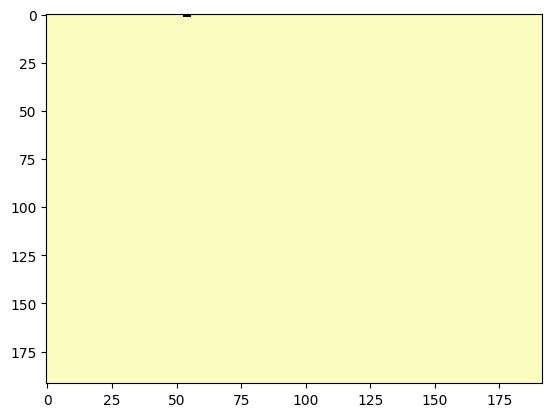

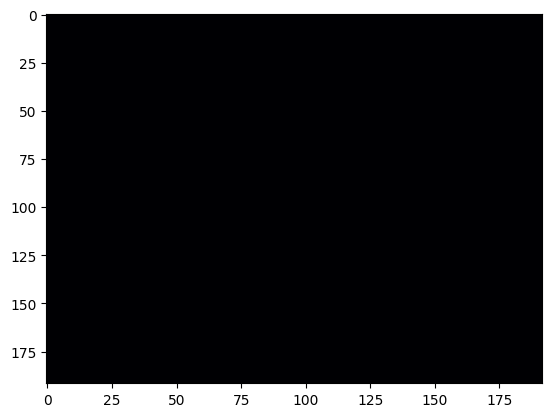

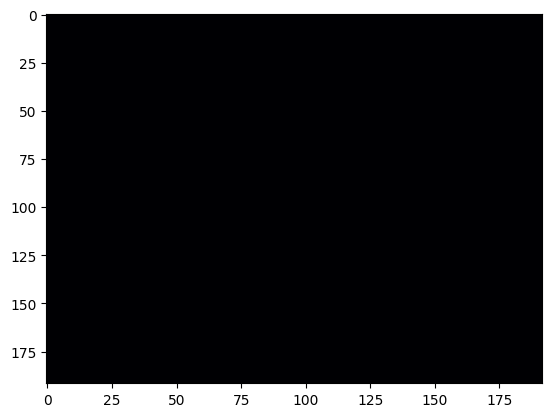

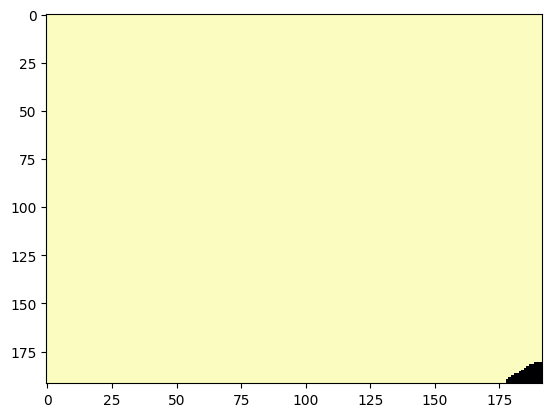

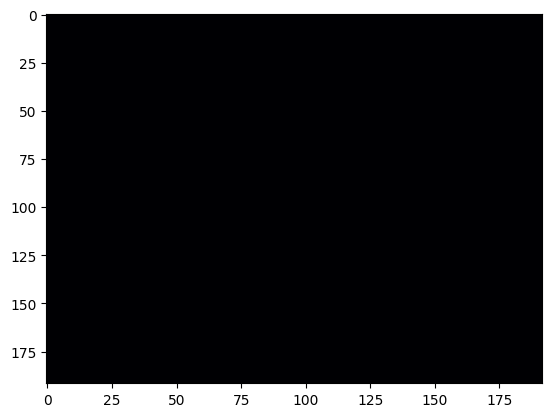

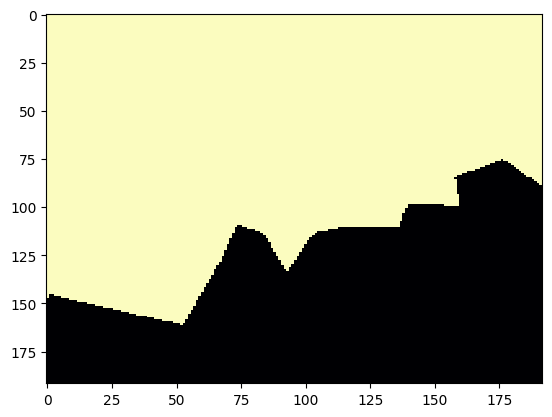

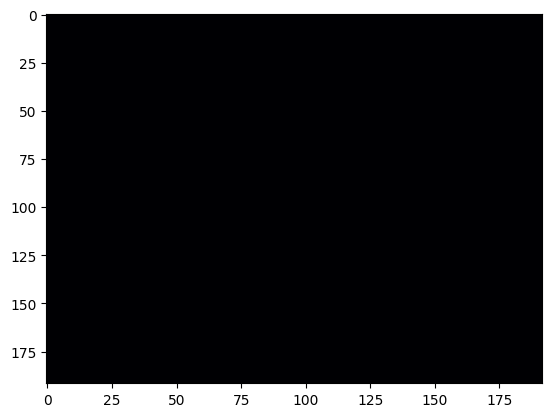

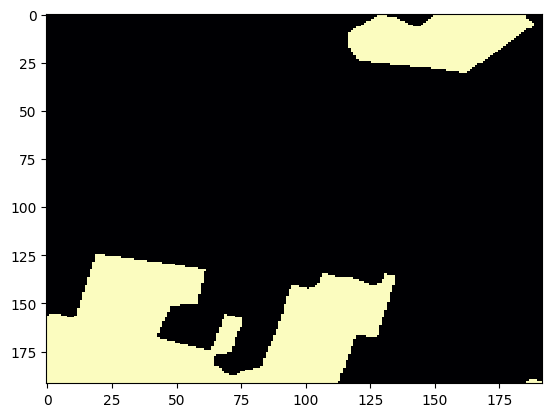

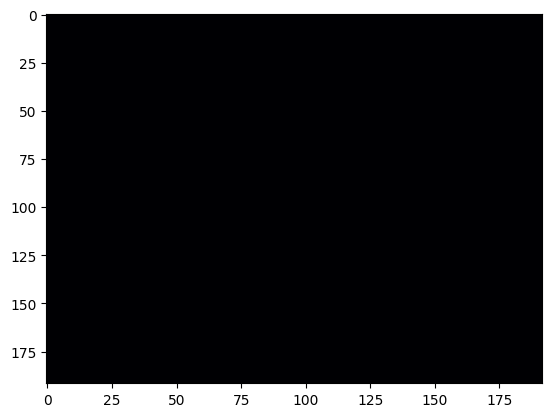

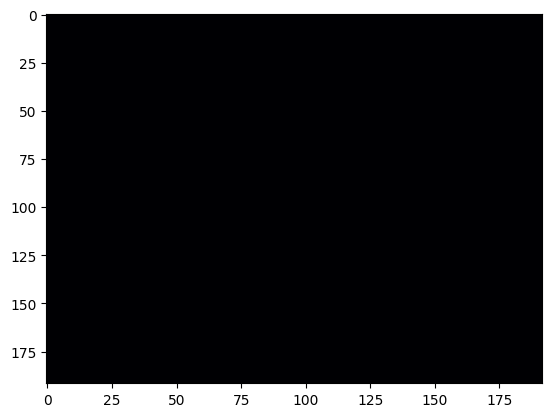

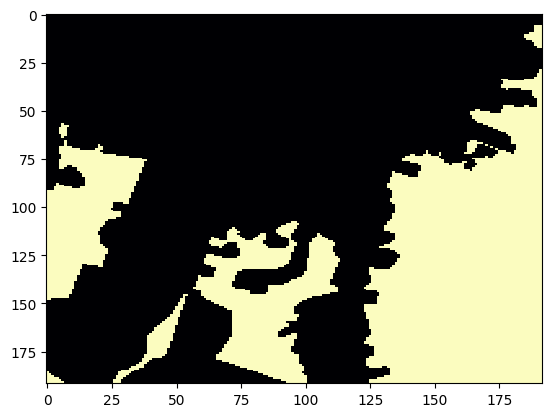

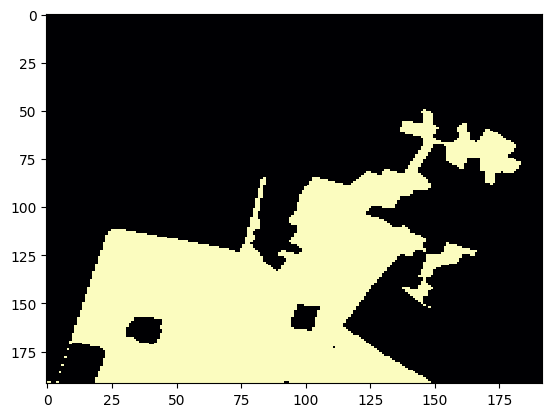

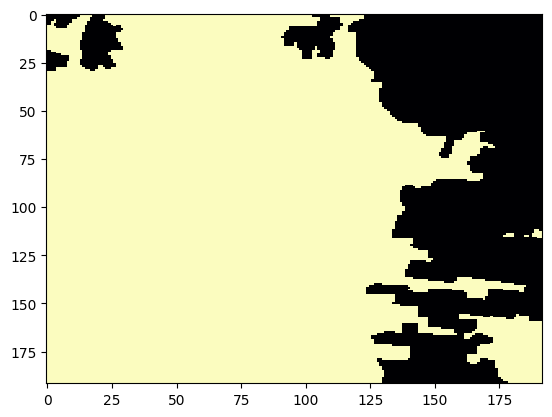

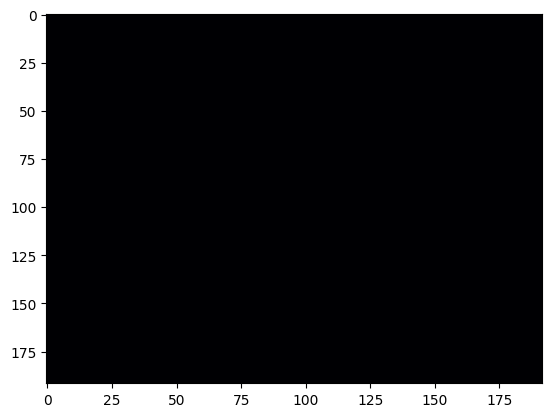

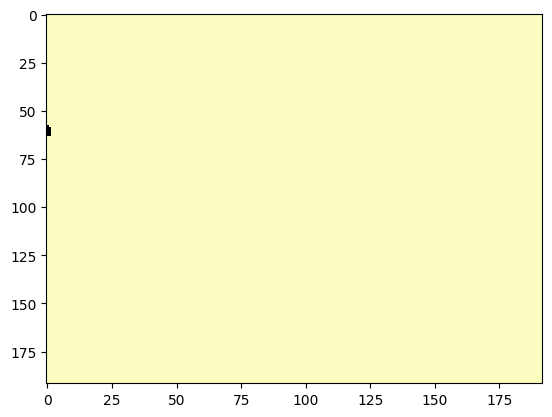

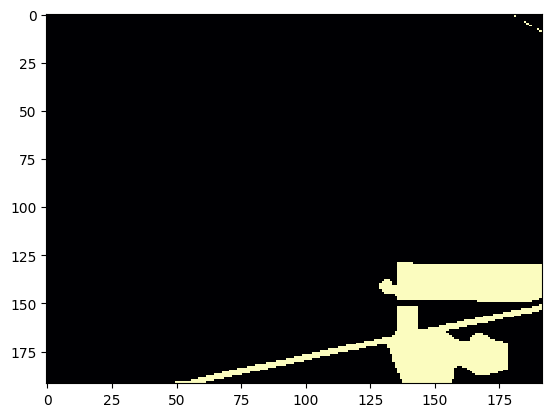

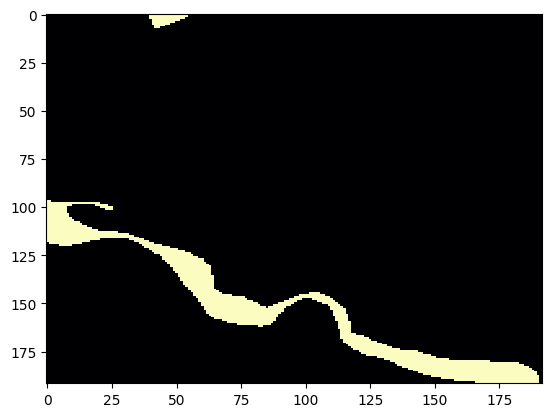

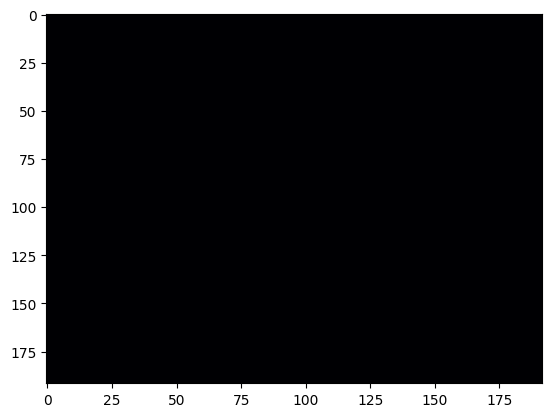

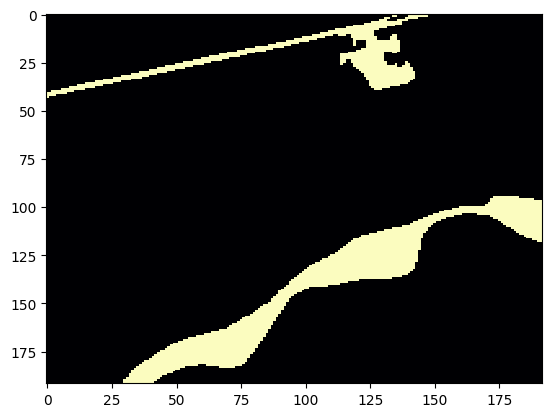

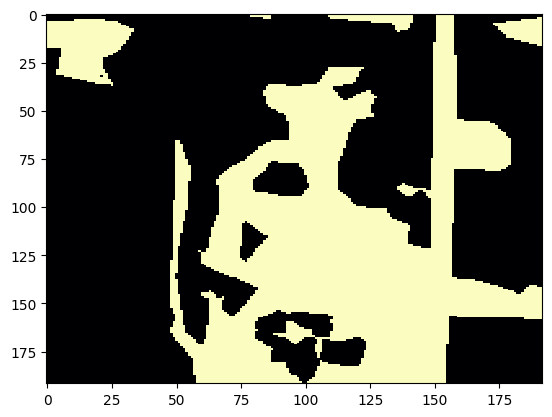

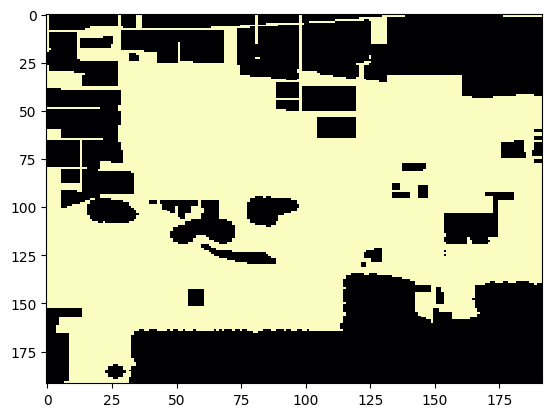

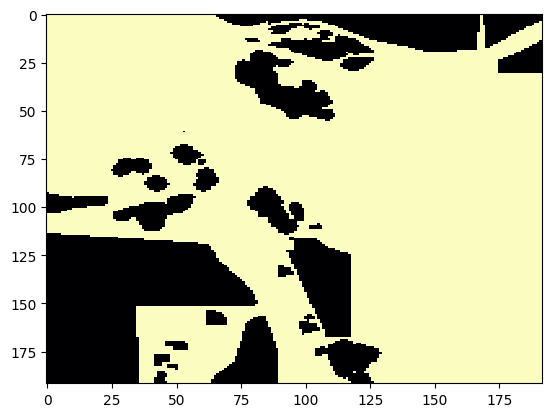

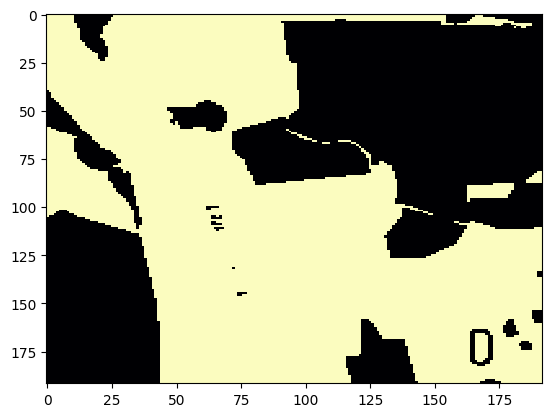

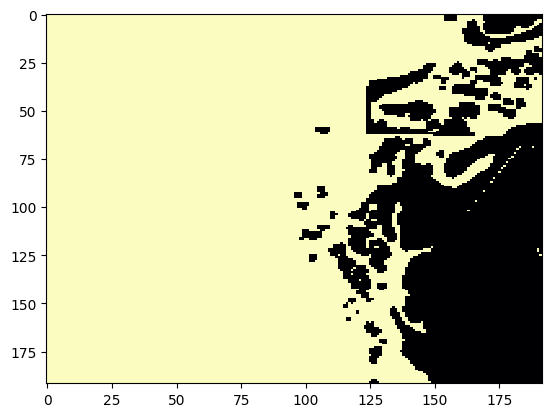

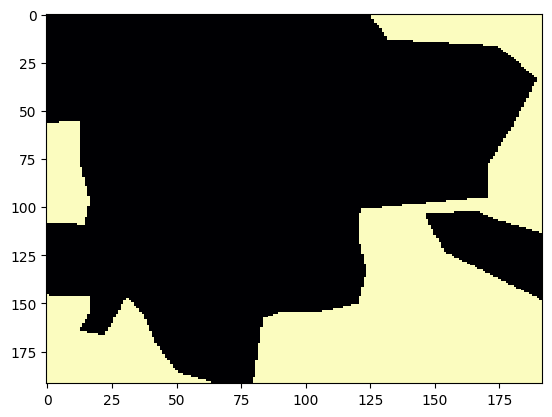

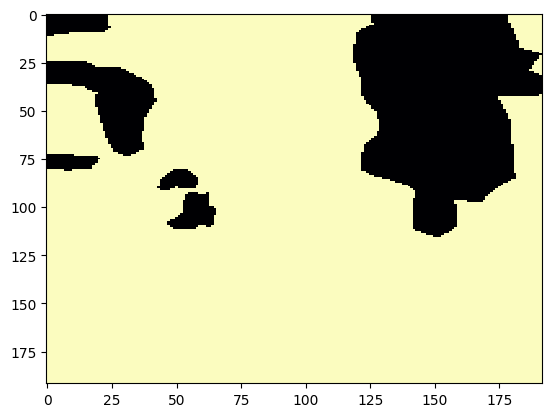

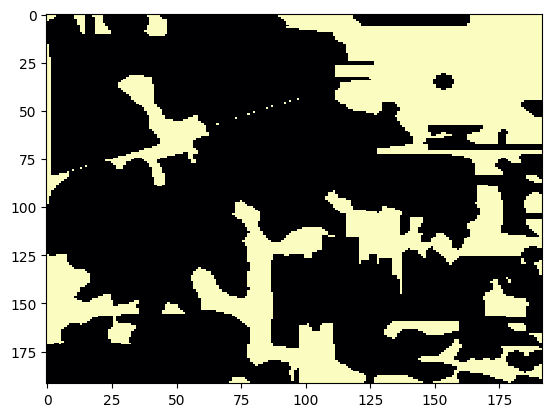

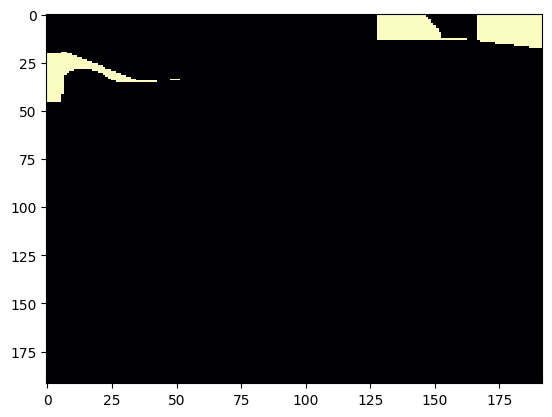

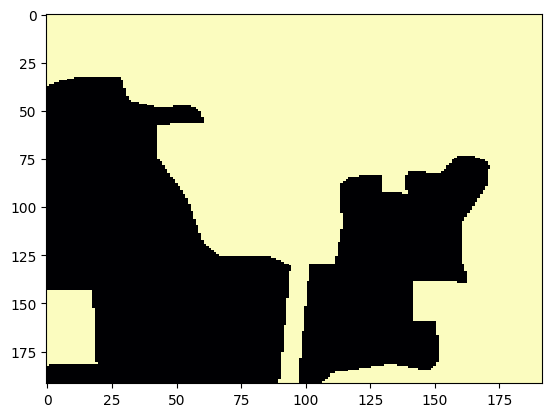

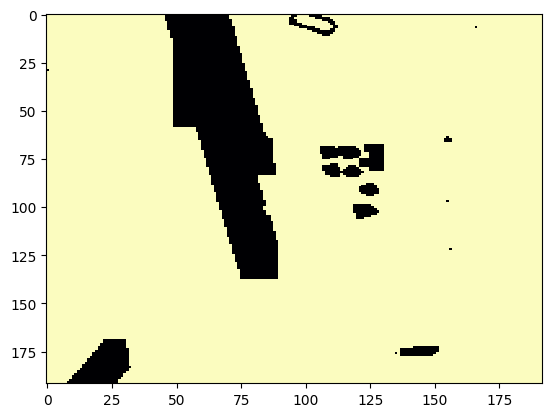

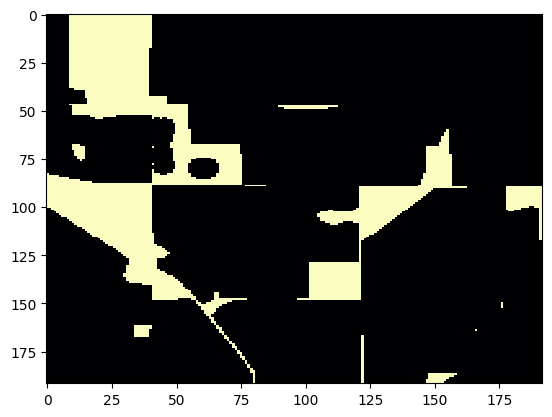

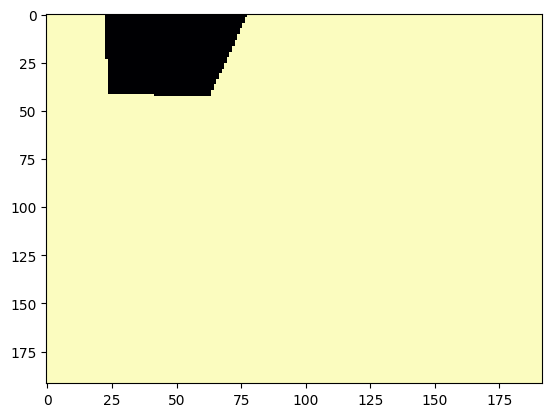

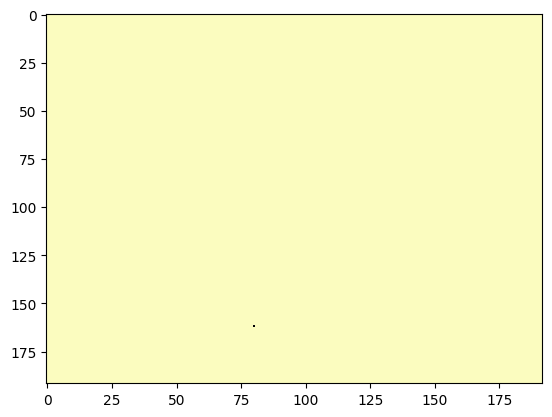

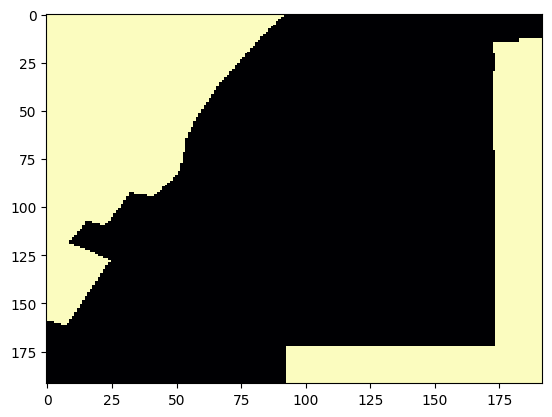

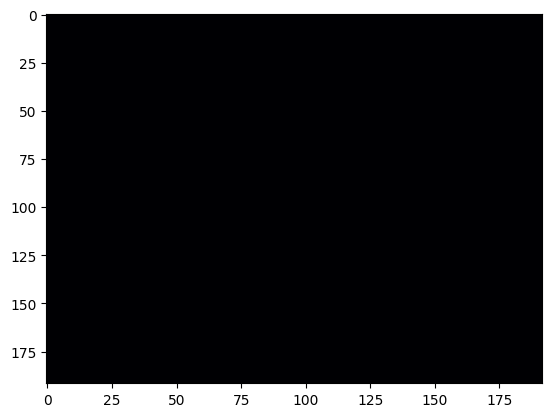

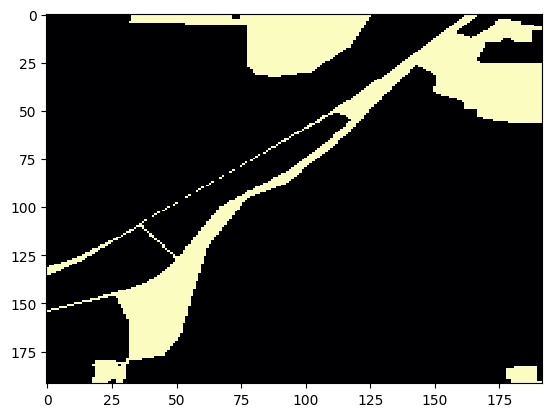

In [9]:
import glob
import os.path 
import imageio

png_path = 'OSM1/Labels/osm_label_images_v10/'
files = [f for f in glob.glob(png_path + '***/***.png', recursive = True)]
#png_path = '/data/OpenSentinelMap/osm_label_images/osm_label_images_v10/52UCG/119316571.png'
#119316572.png'

#cmap = plt.cm.jet
#colors = cmap(np.arange(cmap.N))
#plt.cm.get_cmap('Blues', 6)
for file in files: 

    im = imageio.imread(file)
    #imageio.imread(im[:,:,0])
    png_im = np.array(im)

    plt.imshow(im[:,:,0], cmap=plt.cm.get_cmap('magma', 10),  
                        aspect='auto', interpolation='none')
    #plt.clim(0, 10);
    plt.show()

# from PIL import Image
# import numpy as np

# im_frame = Image.open(png_path )
# np_frame = np.array(im_frame.getdata())


In [ ]:
import glob
import os.path 
import imageio

png_path = 'OSM1/Labels/osm_label_images_v10/'
#files = [f for f in glob.glob(png_path + '***/***.png', recursive = True)]
png_path = 'OSM1/Labels/osm_label_images_v10/01WDP/1257254.png'
#119316572.png'

cmap = plt.cm.jet
colors = cmap(np.arange(cmap.N))
plt.cm.get_cmap('Blues', 6)

/tmp/ipykernel_59929/4243751288.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(file_path)


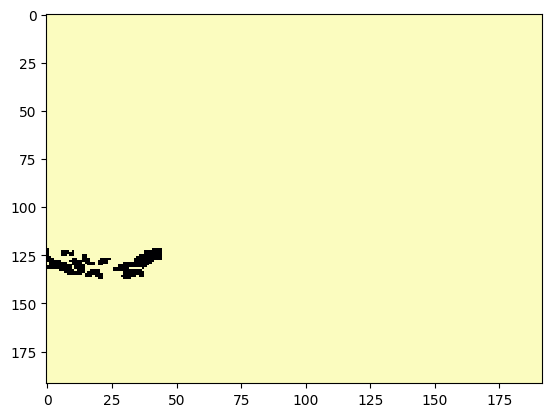

In [22]:
import imageio
import matplotlib.pyplot as plt

png_path = 'OSM1/Labels/osm_label_images_v10/'
file_path = os.path.join(png_path, '01WDP', '125734047.png')

im = imageio.imread(file_path)
plt.imshow(im[:, :, 0], cmap=plt.cm.get_cmap('magma', 10),
           aspect='auto', interpolation='none')
plt.show()


In [23]:
im.shape

(192, 192, 3)

In [24]:
etiquetas = im[:,:,0]

In [25]:
etiquetas.shape

(192, 192)

In [26]:
np.unique(etiquetas)

Array([ 11, 255], dtype=uint8)

In [19]:
type(im)

imageio.core.util.Array

In [2]:
import os
import numpy as np
from tqdm import tqdm

# Directorio raíz
root_dir = 'OSM1/'

# Obtener una lista de todos los archivos npz en el directorio raíz y subdirectorios
tng_files = []
num_pngs = []  # Lista para almacenar los nombres de las carpetas

for dirpath, dirnames, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.endswith('.npz'):
            tng_files.append(os.path.join(dirpath, filename))
            num_pngs.append(os.path.basename(os.path.dirname(os.path.join(dirpath, filename))))

# Lista para almacenar los datos b10m
b10m_data = []

for tng_file in tqdm(tng_files, desc='Procesando archivos tng'):
    data = np.load(tng_file)
    b10m = data.get('gsd_10')
    b10m = b10m[:,:,:3]  # Obtener solo las 3 primeras dimensiones
    
    # Agregar los datos b10m a la lista
    b10m_data.append(b10m)

# Convertir la lista a un tensor
b10m_tensor = np.stack(b10m_data)

# Verificar las dimensiones del tensor resultante
print(b10m_tensor.shape)

# Verificar los nombres de las carpetas
print(num_pngs)


Procesando archivos tng: 100%|██████████| 4839/4839 [00:14<00:00, 325.69it/s]


(4839, 192, 192, 3)
['123854025', '123854025', '123854025', '123854025', '123854025', '123854025', '123854025', '123854025', '125631607', '125631607', '125631607', '125631607', '125631607', '125631607', '125631607', '125631607', '121876477', '121876477', '121876477', '121876477', '121876477', '121876477', '121876477', '121876477', '41858164', '41858164', '41858164', '41858164', '41858164', '41858164', '41858164', '41858164', '125185007', '125185007', '125185007', '125185007', '125185007', '125185007', '125185007', '125185007', '125185004', '125185004', '125185004', '125185004', '125185004', '125185004', '125185004', '125185004', '104489492', '104489492', '104489492', '104489492', '104489492', '104489492', '104489492', '104489492', '104256574', '104256574', '104256574', '104256574', '104256574', '104256574', '104256574', '104256574', '104489499', '104489499', '104489499', '104489499', '104489499', '104489499', '104489499', '104489499', '104239899', '104239899', '104239899', '104239899',

In [15]:
from collections import defaultdict



# Crear un diccionario con valores por defecto de tipo int
diccionario = defaultdict(int)

# Contar la frecuencia de cada elemento en la lista
for elemento in num_pngs:
    diccionario[elemento] += 1

# Convertir el diccionario en un diccionario regular
diccionario = dict(diccionario)

# Imprimir el diccionario resultante
print(diccionario)


{'123854025': 8, '125631607': 8, '121876477': 8, '41858164': 8, '125185007': 8, '125185004': 8, '104489492': 8, '104256574': 8, '104489499': 8, '104239899': 8, '104472884': 8, '104472885': 8, '104389755': 8, '104373127': 8, '104423022': 8, '104223238': 8, '104472886': 8, '104522705': 8, '104522702': 4, '104671987': 8, '104622260': 8, '104605678': 8, '104406387': 8, '104189883': 8, '104239904': 8, '104472883': 8, '104206564': 8, '104223236': 8, '104223237': 8, '104688556': 8, '104489495': 8, '104389756': 8, '109953015': 2, '123520185': 8, '113900320': 8, '122576117': 8, '122565705': 8, '122208443': 8, '124686533': 8, '123989229': 8, '102092907': 8, '101869808': 8, '102281198': 8, '102229888': 8, '101904169': 8, '102246994': 8, '102075766': 8, '102144303': 8, '102058624': 8, '102110044': 8, '102178550': 8, '102264096': 8, '102161426': 8, '102110041': 8, '124398228': 8, '109063199': 4, '121021106': 8, '125527958': 8, '125536640': 8, '125962721': 6, '125929106': 6, '125725497': 6, '1257340

In [29]:
import os
import imageio
import numpy as np
from tqdm import tqdm

# Directorio raíz de las máscaras
root_dir = 'Labels/'

# Diccionario con el número de veces que se debe repetir cada máscara
mask_counts = diccionario

# Lista para almacenar las máscaras
mask_data = []

# Recorrer las carpetas en el directorio raíz con tqdm
for dirpath, dirnames, filenames in tqdm(os.walk(root_dir), desc='Procesando máscaras'):
    for filename in filenames:
        if filename.endswith('.png'):
            mask_path = os.path.join(dirpath, filename)
            mask = imageio.imread(mask_path)
            
            # Obtener el número de png sin la extensión
            mask_id = os.path.splitext(filename)[0]
            
            # Obtener el número de veces que se debe repetir esta máscara
            count = mask_counts.get(mask_id, 0)
            
            # Repetir la máscara según el valor asociado en el diccionario
            for _ in range(count):
                mask_data.append(mask[:,:,0])

# Convertir la lista en un tensor
mask_tensor = np.stack(mask_data)

# Verificar las dimensiones del tensor resultante
print(mask_tensor.shape)


Procesando máscaras: 0it [00:00, ?it/s]/tmp/ipykernel_184731/403019469.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(mask_path)
Procesando máscaras: 60it [00:00, 146.50it/s]

(4767, 192, 192)


636